# Assignment 2 - Image Captioning

This notebook contains the required task for the second assignment of the Deep Network Development course. Read the task description and fill in the empty code cells. Each section represents an implementation stage of image captioning : -from loading and inspecting the dataset; -to implementing, training and evaluating an Encoder-Decoder + Attention based architecture. The sections are there to guide you but you do not have to follow them strictly.

Copy this notebook to your drive (File -> Save a copy in Drive), edit it, and upload the final .ipynb file to [Canvas](https://canvas.elte.hu). If you are using this in Google Colab notebook, save it as .ipynb and upload it, or share the public link. If you have your own machine with Jupyter installed, you can work there as well, as long as you save and upload the .ipynb file.


## General Rules
Please check all the requirements listed on Canvas, but here are some general rules:
- From the provided Flickr8k dataset, split it into train, val and test sets;
- Use the train set to train an Image Captioning model, the val set for validation of the model and hyper-parameters, and the test set to evaluate the final trained model;
- For this assignment, we will give importance to the performance of your model, meaning that, we will evaluate if your model is overfitted or underfitted. For that, please include visualizations (print and plot) loss values for the split sets, as well as the metric results;
- For the metric, while we do not require high performance, we still expect better than random guessing results;
- For the comparison, you are free to choose any pre-trained model;
- Copying others' code will make you fail the assignment automatically, resulting in a 0;
- Not submitting anything results in a 0;
- Submitting something, as long as it is not an empty notebook, might result in a 1;
- **Deadline is November 29th 11:59 PM** (strict, no late submission);
- Feel free to add more code cells as needed. But don't put code into external Python files;
- Please add your name, **Neptun ID**, and task details below.

**Name:**  Marton Ligetfalvi
**Neptun ID:** GOEG01

## Task description

Your task is to train your own custom image captioning model and compare its performance with an existing (pre-trained) model. For that, first you need to load the provided Flickr8k dataset, split into train, val and test sets. Then, create your own architecture, which should follow an Encoder-Decoder + Attention sturcture. You can use pre-trained backbones (i.e. ResNet) for the encoder, but they have to be fine-tuned. We expect you to use an Attention layer, in order to visualize how the network learned (see more details on section 2 of the notebook).
There is no expected high performance, but **your metrics should show results better than random guessing and your loss has to decrease throughout the epochs. Please use BLEU score as the metric**. We expect you to **show visualizations (prints and plots)** of the **metrics, losses, and predictions**. Use techniques to avoid overfitting such as Early stopping, and more, and save the best model while training your architecture.

**In order to get your grade for the assignment, you must defend it by answering questions during the designated practice time.**

## Guidelines
Please carefully read each cell of the notebook, as they contain guidelines to help you complete the assignments. While you don't have to follow them strictly, we believe that they provide enough help.

# 0. Necessary Imports
Import all the necessary packages for this assignment. **ONLY PYTORCH MODELS ARE ACCEPTED!**

In [1]:
# Fix to work on colab
!pip install torch==2.2.0 torchvision==0.17.0 torchaudio==2.2.0 torchtext==0.17 --index-url https://download.pytorch.org/whl/cu121

^C


Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.5 GB 10.1 MB/s eta 0:04:04
     ---------------------------------------- 0.0/2.5 GB 11.9 MB/s eta 0:03:27
     ---------------------------------------- 0.0/2.5 GB 11.9 MB/s eta 0:03:26
     ---------------------------------------- 0.0/2.5 GB 12.6 MB/s eta 0:03:15
     ---------------------------------------- 0.0/2.5 GB 12.7 MB/s eta 0:03:13
     ---------------------------------------- 0.0/2.5 GB 12.5 MB/s eta 0:03:15
     ---------------------------------------- 0.0/2.5 GB 12.2 MB/s eta 0:03:20
     ---------------------------------------- 0.0/2.5 GB 12.1 MB/s eta 0:03:22
     ---------------------------------------- 0.0/2.5 GB 12.2 MB/s eta 0:03:20
     ---------------------------------------- 0.0/2.5 GB 12.1 MB/s eta 0:03:20
     ---------------------------------------- 0.0/2.5 GB 12.1 MB/s eta 0:03:21
 

ERROR: Could not find a version that satisfies the requirement torchtext==0.17 (from versions: 0.5.0, 0.6.0, 0.16.2+cpu)
ERROR: No matching distribution found for torchtext==0.17


In [2]:
# ADD YOUR CODE HERE
import torch

# 1. DATASET
For this assignment you will be using the [Flickr8k](https://www.kaggle.com/datasets/adityajn105/flickr8k) dataset, which contains captions/descriptions of different images.

### 1.1. Download dataset
The best way to download this dataset is through Kaggle.
First create a token, download it and upload it here. Follow these steps: https://www.kaggle.com/discussions/general/74235

In [3]:
!pip install -q kaggle


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from google.colab import files
files.upload()

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!kaggle datasets download -d adityajn105/flickr8k

Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k
License(s): CC0-1.0




  0%|          | 0.00/1.04G [00:00<?, ?B/s]
  0%|          | 1.00M/1.04G [00:00<11:50, 1.57MB/s]
  0%|          | 2.00M/1.04G [00:00<06:08, 3.02MB/s]
  0%|          | 3.00M/1.04G [00:00<04:08, 4.46MB/s]
  0%|          | 4.00M/1.04G [00:00<03:12, 5.77MB/s]
  1%|          | 6.00M/1.04G [00:01<02:22, 7.75MB/s]
  1%|          | 8.00M/1.04G [00:01<02:01, 9.11MB/s]
  1%|          | 10.0M/1.04G [00:01<01:48, 10.1MB/s]
  1%|          | 12.0M/1.04G [00:01<01:43, 10.7MB/s]
  1%|▏         | 14.0M/1.04G [00:01<01:40, 10.9MB/s]
  2%|▏         | 16.0M/1.04G [00:02<01:36, 11.4MB/s]
  2%|▏         | 18.0M/1.04G [00:02<01:39, 10.9MB/s]
  2%|▏         | 20.0M/1.04G [00:02<01:39, 11.0MB/s]
  2%|▏         | 22.0M/1.04G [00:02<01:37, 11.1MB/s]
  2%|▏         | 24.0M/1.04G [00:02<01:36, 11.3MB/s]
  2%|▏         | 26.0M/1.04G [00:03<01:36, 11.2MB/s]
  3%|▎         | 28.0M/1.04G [00:03<01:38, 11.0MB/s]
  3%|▎         | 30.0M/1.04G [00:03<01:34, 11.4MB/s]
  3%|▎         | 32.0M/1.04G [00:03<01:32, 11.6MB/s]
 

In [8]:
import zipfile

with zipfile.ZipFile("flickr8k.zip", 'r') as zip_ref:
    zip_ref.extractall("flickr8k")

### 1.2. Load dataset
In order to load the dataset, you need to create a pytorch Dataset class.
The class should return images and captions. Remember that the captions should be returned as tokens. Do not forget to include the SOS:start of sentence, EOS:end of sentence and UNK:unknown tokens. You may want to build a vocabulary class in order to save all the words in your dataset, because your model can only predict words in your vocabulary. You do not have to save every word in your vocabulary, it is common practice to save only those words that appear multiple times in your whole dataset. For example, save only words that appear at least 5 times in your whole dataset.

In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
from collections import Counter
import numpy as np

class Vocabulary:
    def __init__(self, freq_threshold):
        self.freq_threshold = freq_threshold
        self.itos = {0: "<PAD>", 1: "<SOS>", 2: "<EOS>", 3: "<UNK>"}
        self.stoi = {v: k for k, v in self.itos.items()}
    
    def __len__(self):
        return len(self.itos)

    def build_vocabulary(self, sentence_list):
        frequencies = Counter()
        idx = 4

        for sentence in sentence_list:
            for word in sentence.split(" "):
                frequencies[word] += 1
                if frequencies[word] == self.freq_threshold:
                    self.stoi[word] = idx
                    self.itos[idx] = word
                    idx += 1

    def numericalize(self, text):
        tokenized_text = []

        for word in text.split(" "):
            if word in self.stoi:
                tokenized_text.append(self.stoi[word])
            else:
                tokenized_text.append(self.stoi["<UNK>"])

        return tokenized_text

In [ ]:
# ADD YOUR CODE HERE
class FlickrDataset(Dataset):
    def __init__(self, root_dir, captions_file, transform=None, freq_threshold=5):
        self.root_dir = root_dir
        self.df = pd.read_csv(captions_file)
        self.transform = transform

        self.imgs = self.df["image"]
        self.captions = self.df["caption"]

        self.vocab = Vocabulary(freq_threshold)
        self.vocab.build_vocabulary(self.captions.tolist())

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        caption = self.captions[idx]
        img_id = self.imgs[idx]
        img_path = os.path.join(self.root_dir, img_id)
        
        image = Image.open(img_path).convert("RGB")
        if self.transform is not None:
            image = self.transform(image)

        caption_vec = [self.vocab.stoi["<SOS>"]]
        caption_vec += self.vocab.numericalize(caption)
        caption_vec.append(self.vocab.stoi["<EOS>"])

        return image, torch.tensor(caption_vec)

In [ ]:
root_dir = r"C:\Users\Marti\Desktop\MSC\DND\Assignment_2\flickr8k\Images"
captions_file = r"C:\Users\Marti\Desktop\MSC\DND\Assignment_2\flickr8k\captions.txt"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = FlickrDataset(root_dir=root_dir, captions_file=captions_file, transform=transform, freq_threshold=5)

Example output from dataset class

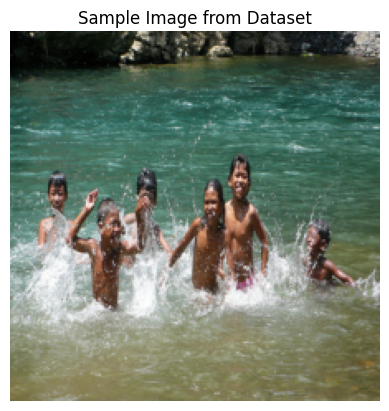

Tokenized Caption: tensor([  1, 715,  95,   9,  11,  46,   2])
Sentence:
<SOS> Kids play in the water <EOS>


In [ ]:
# ADD YOUR CODE HERE
import matplotlib.pyplot as plt
import random

def show_image(img, title="Image"):
    if isinstance(img, torch.Tensor):
        img = img.permute(1, 2, 0).numpy()
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

random_index = random.randint(0, len(dataset) - 1)
img, caps = dataset[random_index]
show_image(img, "Sample Image from Dataset")
print("Tokenized Caption:", caps)
print("Sentence:")
print(" ".join([dataset.vocab.itos[token] for token in caps.tolist()]))


Split your dataset into train, val and test sets

In [ ]:
import random
import json
import os
from torch.utils.data import Subset

train_indices_path = "train_indices.json"
val_indices_path = "val_indices.json"
test_indices_path = "test_indices.json"

train_size = 5000
val_size = 1000
test_size = 1000

if os.path.exists(train_indices_path) and os.path.exists(val_indices_path) and os.path.exists(test_indices_path):
    with open(train_indices_path, "r") as f:
        train_indices = json.load(f)
    with open(val_indices_path, "r") as f:
        val_indices = json.load(f)
    with open(test_indices_path, "r") as f:
        test_indices = json.load(f)
else:
    total_size = len(dataset)
    all_indices = list(range(total_size))

    train_indices = random.sample(all_indices, train_size)
    remaining_indices = list(set(all_indices) - set(train_indices))
    val_indices = random.sample(remaining_indices, val_size)
    test_indices = random.sample(list(set(remaining_indices) - set(val_indices)), test_size)

    with open(train_indices_path, "w") as f:
        json.dump(train_indices, f)
    with open(val_indices_path, "w") as f:
        json.dump(val_indices, f)
    with open(test_indices_path, "w") as f:
        json.dump(test_indices, f)

train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

print(f"Training Set Size: {len(train_dataset)}")
print(f"Validation Set Size: {len(val_dataset)}")
print(f"Test Set Size: {len(test_dataset)}")

Training Set Size: 5000
Validation Set Size: 1000
Test Set Size: 1000


Create a dataloader, in order to load the examples in batches. Remember that, a batch has different examples, and each example (caption) may have different sizes. Therefore, consider padding techniques for the captions. For the image, use transforms in the previous step, to ensure same format and size.  

In [ ]:
# ADD YOUR CODE HERE
# Example with batch=4
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

batch_size = 4

def collate_fn(batch):
    images = [item[0] for item in batch]
    captions = [item[1] for item in batch]

    images = torch.stack(images)

    captions = pad_sequence(captions, batch_first=True, padding_value=dataset.vocab.stoi["<PAD>"])

    return images, captions

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_fn)

Random Sample from Training Set:


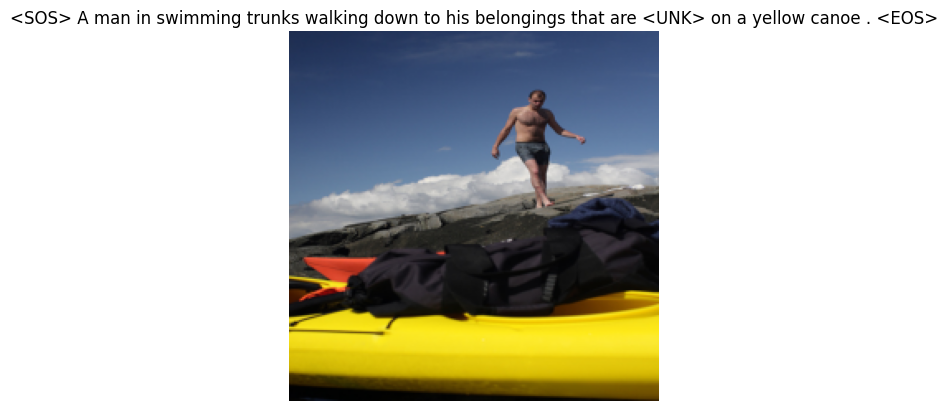

Random Sample from Validation Set:


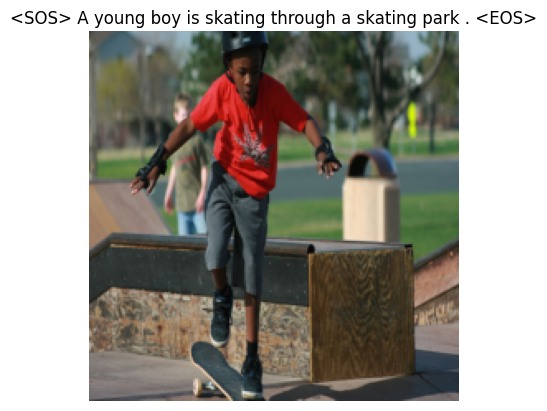

Random Sample from Test Set:


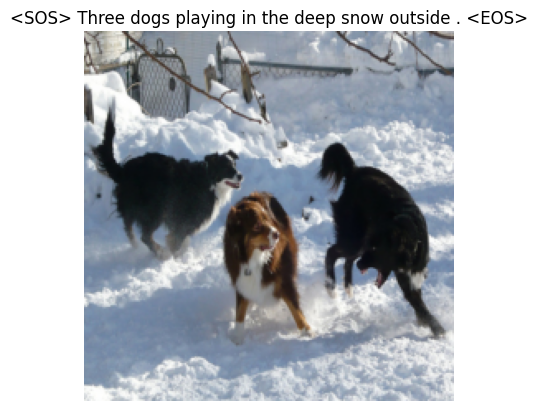

In [ ]:
import matplotlib.pyplot as plt
import random

def display_sample(dataset, title="Sample from Dataset"):
    random_index = random.randint(0, len(dataset) - 1)

    img, caption_tokens = dataset[random_index]

    caption = " ".join([dataset.dataset.vocab.itos[token] for token in caption_tokens.tolist()])

    plt.imshow(img.permute(1, 2, 0))
    plt.title(caption)
    plt.axis("off")
    plt.show()

print("Random Sample from Training Set:")
display_sample(train_dataset)

print("Random Sample from Validation Set:")
display_sample(val_dataset)

print("Random Sample from Test Set:")
display_sample(test_dataset)

## When Re-Opening: 1st, 2nd, Last

In [ ]:
import os
import json
import torch
from torch.utils.data import DataLoader, Subset
from torchvision import transforms

root_dir = r"C:\Users\Marti\Desktop\MSC\DND\Assignment_2\flickr8k\Images"
captions_file = r"C:\Users\Marti\Desktop\MSC\DND\Assignment_2\flickr8k\captions.txt"
train_indices_path = "train_indices.json"
val_indices_path = "val_indices.json"
test_indices_path = "test_indices.json"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = FlickrDataset(root_dir=root_dir, captions_file=captions_file, transform=transform, freq_threshold=5)

with open(train_indices_path, "r") as f:
    train_indices = json.load(f)
with open(val_indices_path, "r") as f:
    val_indices = json.load(f)
with open(test_indices_path, "r") as f:
    test_indices = json.load(f)

train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

def collate_fn(batch):
    images = [item[0] for item in batch]
    captions = [item[1] for item in batch]
    images = torch.stack(images)

    captions = torch.nn.utils.rnn.pad_sequence(captions, batch_first=True, padding_value=dataset.vocab.stoi["<PAD>"])

    return images, captions

batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_fn)

print("DataLoaders initialized:")
print(f"Training Set Size: {len(train_dataset)}")
print(f"Validation Set Size: {len(val_dataset)}")
print(f"Test Set Size: {len(test_dataset)}")

DataLoaders initialized:
Training Set Size: 5000
Validation Set Size: 1000
Test Set Size: 1000


# 2. MODEL
For this assignment, you are required to create your own custom image captioning model and compare its performance with an existing pre-trained model.

In [ ]:
#Make sure to use GPU - NO GPU available haha
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

### 2.1. Custom Image Captioning model

Create an Encoder-Attention-Decoder architecture with the following details:
- the encoder should process the images, thus you can create a Convolutional based architecture or use already pre-trained models like ResNet. However, you must fine-tune the pretrained model. The encoder is responisble for extracting image features;
- the attention layer should be between the encoder and decoder. It uses the image features from the encoder in order to provide context (attention scores) to the decoder hidden layers. For simplicity use Linear layers as the attention architecture;
- the decoder should be a sequence based model (i.e. LSTM) in order to process and generate captions.

Extra:
- Extra points (counting toward the final grade) will be given to any student who implements either a Vision-based Transformer architecture or a Transformer only decoder for the decoder part.

#### Reference
Here is an example of something similar to what we want to create:
<img src="https://drive.google.com/thumbnail?id=1wdddaLit7iEyCcVy5bS505NiYzL6c-4x&sz=w1000">


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

class Encoder(nn.Module):
    def __init__(self, encoded_image_size=14):
        super(Encoder, self).__init__()
        resnet = models.resnet50(pretrained=True) 
        modules = list(resnet.children())[:-2]
        self.resnet = nn.Sequential(*modules)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((encoded_image_size, encoded_image_size))

    def forward(self, images):
        features = self.resnet(images)
        features = self.adaptive_pool(features)
        features = features.permute(0, 2, 3, 1)
        return features

In [ ]:
class Attention(nn.Module):
    def __init__(self, encoder_dim, decoder_dim, attention_dim):
        super(Attention, self).__init__()
        self.encoder_att = nn.Linear(encoder_dim, attention_dim)  
        self.decoder_att = nn.Linear(decoder_dim, attention_dim) 
        self.full_att = nn.Linear(attention_dim, 1)  
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1) 

    def forward(self, features, hidden_state):
        encoder_att = self.encoder_att(features)

        decoder_att = self.decoder_att(hidden_state)

        decoder_att = decoder_att.unsqueeze(1)

        combined_att = self.relu(encoder_att + decoder_att)

        attention_scores = self.full_att(combined_att).squeeze(2) 
        attention_weights = self.softmax(attention_scores) 

        context = (features * attention_weights.unsqueeze(2)).sum(dim=1)

        return context, attention_weights

In [ ]:
class Decoder(nn.Module):
    def __init__(self, embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim, dropout=0.5):
        super(Decoder, self).__init__()
        self.encoder_dim = encoder_dim
        self.decoder_dim = decoder_dim
        self.attention_dim = attention_dim
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.attention = Attention(encoder_dim, decoder_dim, attention_dim)
        self.lstm = nn.LSTMCell(embed_size + encoder_dim, decoder_dim)
        self.fc = nn.Linear(decoder_dim, vocab_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, features, captions):
        batch_size = features.size(0)
        vocab_size = self.fc.out_features

        features = features.view(batch_size, -1, self.encoder_dim) 

        h, c = (
            torch.zeros(batch_size, self.decoder_dim).to(features.device),
            torch.zeros(batch_size, self.decoder_dim).to(features.device),
        )

        embeddings = self.embedding(captions)

        predictions = torch.zeros(batch_size, captions.size(1), vocab_size).to(features.device)
        for t in range(captions.size(1)):
            context, attention_weights = self.attention(features, h)
            
            if t >= embeddings.size(1):
                print("No embeddings left for this time step. Breaking loop.")
                break

            lstm_input = torch.cat([embeddings[:, t, :], context], dim=1)
            h, c = self.lstm(lstm_input, (h, c))
            output = self.fc(self.dropout(h))

            predictions[:, t, :] = output

        return predictions


Combine the encoder - attention - decoder

In [118]:
# ADD YOUR CODE HERE
class ImageCaptioningModel(nn.Module):
    def __init__(self, embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim):
        super(ImageCaptioningModel, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder(embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim)

    def forward(self, images, captions):
        features = self.encoder(images)
        outputs = self.decoder(features, captions)
        return outputs

Encoder Output Shape: torch.Size([4, 14, 14, 2048])
Context Shape: torch.Size([4, 2048])
Attention Weights Shape: torch.Size([4, 196])
Decoder Output Shape: torch.Size([4, 19, 3111])
Model Output Shape: torch.Size([4, 19, 3111])


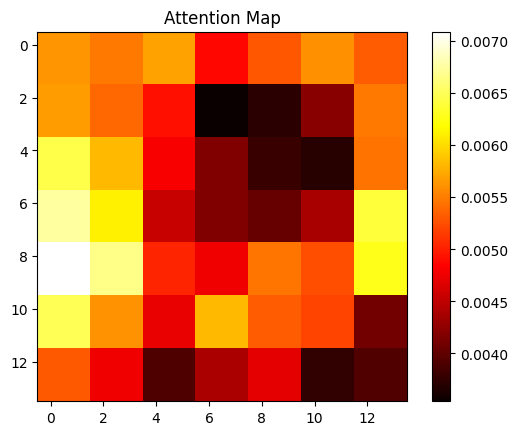

In [ ]:
import torch
import matplotlib.pyplot as plt

encoder = Encoder()
images, _ = next(iter(train_loader))
features = encoder(images)
print(f"Encoder Output Shape: {features.shape}")

attention_dim = 256
encoder_dim = features.shape[-1]
decoder_dim = 512
attention = Attention(encoder_dim, decoder_dim, attention_dim)
hidden_state = torch.randn(images.size(0), decoder_dim)
context, weights = attention(features.view(images.size(0), -1, encoder_dim), hidden_state)
print(f"Context Shape: {context.shape}")
print(f"Attention Weights Shape: {weights.shape}")

embed_size = 256
vocab_size = len(dataset.vocab)
decoder = Decoder(embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim)
dummy_captions = torch.randint(0, vocab_size, (images.size(0), 20)) 
predictions = decoder(features.view(images.size(0), -1, encoder_dim), dummy_captions)
print(f"Decoder Output Shape: {predictions.shape}")

model = ImageCaptioningModel(embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim)
outputs = model(images, dummy_captions)
print(f"Model Output Shape: {outputs.shape}") 

attention_map = weights[0].reshape(14, 14).detach().cpu().numpy()
plt.imshow(attention_map, cmap='hot', interpolation='nearest')
plt.title("Attention Map")
plt.colorbar()
plt.show()

### 2.2. Training custom model

### Important: we recommend saving the model during training, so that you can resume training later in case of any Google Colab issue or limitation

In [ ]:
# ADD YOUR CODE HERE
def save_model(model, num_epochs):
    model_state = {
        'embed_size': embed_size,
        'attention_dim': attention_dim,
        'encoder_dim': encoder_dim,
        'decoder_dim': decoder_dim,
        'state_dict': model.state_dict()
    }
    torch.save(model_state, f'image_captioning_epoch_{num_epochs}.pth')
    print(f"Model saved after {num_epochs} epochs.")

def load_model(filepath):
    checkpoint = torch.load(filepath)
    model = ImageCaptioningModel(
        embed_size=checkpoint['embed_size'],
        vocab_size=len(dataset.vocab),
        attention_dim=checkpoint['attention_dim'],
        encoder_dim=checkpoint['encoder_dim'],
        decoder_dim=checkpoint['decoder_dim']
    )
    model.load_state_dict(checkpoint['state_dict'])
    print("Model weights loaded.")
    return model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 10
learning_rate = 1e-4
embed_size = 256
attention_dim = 256
encoder_dim = 2048
decoder_dim = 512
vocab_size = len(dataset.vocab)
dropout = 0.5

model = ImageCaptioningModel(embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=dataset.vocab.stoi["<PAD>"])
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Pay attention to your choices. Define an optimizer, a loss function, the number of epochs and regularization techniques.
Be aware of overfitting and underfitting. Make sure the loss is decreasing over the epochs. Save the losses so that they can be visualized.

In [ ]:
# ADD YOUR CODE HERE

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, captions in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, captions = images.to(device), captions.to(device)

            optimizer.zero_grad()
            
            outputs = model(images, captions)
            outputs = outputs.view(-1, outputs.shape[-1])
            captions = captions[:, 1:].contiguous().view(-1) 

            loss = criterion(outputs, captions)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_train_loss:.4f}")

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, captions in val_loader:
                images, captions = images.to(device), captions.to(device)
                outputs = model(images, captions)
                outputs = outputs.view(-1, outputs.shape[-1])
                captions = captions[:, 1:].contiguous().view(-1)
                loss = criterion(outputs, captions)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}")

        save_model(model, epoch+1)

    return train_losses, val_losses

#train_losses, val_losses = train_model(...)
#plot_losses(train_losses, val_losses)
# DO NOT TRY TO REPLICATE... this is an example

In [17]:
#Quick Check before full Training
images, captions = next(iter(train_loader))
images, captions = images.to(device), captions.to(device)
outputs = model(images, captions)
outputs = outputs.view(-1, outputs.shape[-1])
captions = captions[:, 1:].contiguous().view(-1)
loss = criterion(outputs, captions)
print(f"Single Batch Loss: {loss.item()}")

Single Batch Loss: 8.075493812561035


Visualize the attention weigths in order to understand how your model learned (**Failure to do this, will result in losing points**).
For that, use the 'context' variable returned by the Attention class to overlay them on the image.

Epoch 1/10:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 1/10: 100%|██████████| 1250/1250 [49:27<00:00,  2.37s/it]


Epoch 1/10, Training Loss: 4.6253
Epoch 1/10, Validation Loss: 4.1030
Model saved after 1 epochs.


Epoch 2/10: 100%|██████████| 1250/1250 [48:20<00:00,  2.32s/it]


Epoch 2/10, Training Loss: 3.9362
Epoch 2/10, Validation Loss: 3.7911
Model saved after 2 epochs.


Epoch 3/10: 100%|██████████| 1250/1250 [48:26<00:00,  2.32s/it]


Epoch 3/10, Training Loss: 3.6609
Epoch 3/10, Validation Loss: 3.6258
Model saved after 3 epochs.


Epoch 4/10: 100%|██████████| 1250/1250 [48:23<00:00,  2.32s/it]


Epoch 4/10, Training Loss: 3.4619
Epoch 4/10, Validation Loss: 3.5069
Model saved after 4 epochs.


Epoch 5/10: 100%|██████████| 1250/1250 [48:31<00:00,  2.33s/it]


Epoch 5/10, Training Loss: 3.2934
Epoch 5/10, Validation Loss: 3.4050
Model saved after 5 epochs.


Epoch 6/10: 100%|██████████| 1250/1250 [48:18<00:00,  2.32s/it]


Epoch 6/10, Training Loss: 3.1460
Epoch 6/10, Validation Loss: 3.3528
Model saved after 6 epochs.


Epoch 7/10: 100%|██████████| 1250/1250 [48:06<00:00,  2.31s/it]


Epoch 7/10, Training Loss: 3.0121
Epoch 7/10, Validation Loss: 3.3009
Model saved after 7 epochs.


Epoch 8/10: 100%|██████████| 1250/1250 [48:11<00:00,  2.31s/it]


Epoch 8/10, Training Loss: 2.8774
Epoch 8/10, Validation Loss: 3.2720
Model saved after 8 epochs.


Epoch 9/10: 100%|██████████| 1250/1250 [48:00<00:00,  2.30s/it]


Epoch 9/10, Training Loss: 2.7504
Epoch 9/10, Validation Loss: 3.2638
Model saved after 9 epochs.


Epoch 10/10: 100%|██████████| 1250/1250 [48:27<00:00,  2.33s/it]


Epoch 10/10, Training Loss: 2.6291
Epoch 10/10, Validation Loss: 3.2603
Model saved after 10 epochs.


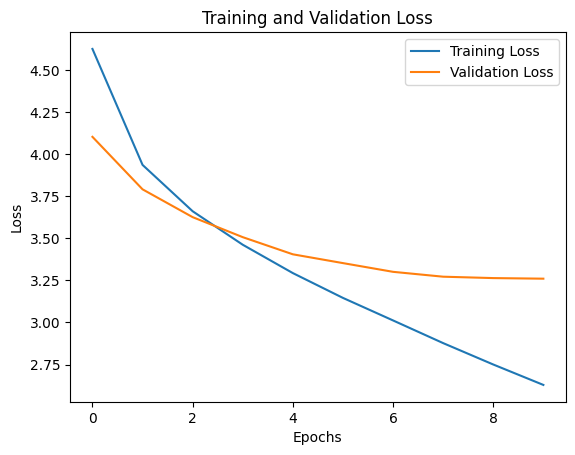

In [ ]:
# ADD YOUR CODE HERE
from tqdm import tqdm

def plot_losses(train_losses, val_losses):
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


def visualize_attention(image, attention_weights, vocab, caption_tokens):
    attention_weights = attention_weights.view(14, 14).detach().cpu().numpy()  
    image = image.permute(1, 2, 0).detach().cpu().numpy()  
    image = (image - image.min()) / (image.max() - image.min())  


    plt.imshow(image)
    plt.imshow(attention_weights, cmap='jet', alpha=0.6)
    plt.axis('off')
    plt.title(" ".join([vocab[token] for token in caption_tokens]))
    plt.show()

train_losses, val_losses = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs, device
)

plot_losses(train_losses, val_losses)

### 2.3. Evaluation on test set

Evaluate your trained model on the test set. Use the BLEU score as your metric: torchtext.data.metrics.bleu_score(...)

You may try **BLEU-1, 2** and **3**.

In [23]:
!pip show torch torchtext

Name: torch
Version: 2.4.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: C:\Users\Marti\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: torchaudio, torchmetrics, torchtext, torchvision, ultralytics, ultralytics-thop
---
Name: torchtext
Version: 0.18.0
Summary: Text utilities, models, transforms, and datasets for PyTorch.
Home-page: https://github.com/pytorch/text
Author: PyTorch Text Team
Author-email: packages@pytorch.org
License: BSD
Location: C:\Users\Marti\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: numpy, requests, torch, tqdm
Required-by: 


In [ ]:
!pip install nltk


In [ ]:
embed_size = 256
vocab_size = len(dataset.vocab)
attention_dim = 256
encoder_dim = 2048
decoder_dim = 512
custom_model = ImageCaptioningModel(embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim).to(device)


In [ ]:
from tqdm import tqdm
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def generate_caption_custom_model(model, image, vocab, max_len=20):
    model.eval()
    with torch.no_grad():
        features = model.encoder(image.unsqueeze(0).to(device)) 
        features = features.view(features.size(0), -1, features.size(-1))

        caption = [vocab.stoi["<SOS>"]]
        for _ in range(max_len):
            current_caption = torch.tensor(caption).unsqueeze(0).to(device)
            outputs = model.decoder(features, current_caption)
            next_word = outputs.argmax(2)[:, -1].item()
            caption.append(next_word)

            if next_word == vocab.stoi["<EOS>"]:
                break

        result = [
            vocab.itos[idx]
            for idx in caption
            if idx not in {vocab.stoi["<SOS>"], vocab.stoi["<EOS>"], vocab.stoi["<PAD>"]}
        ]
        return result

def evaluate_custom_model(model, test_loader, vocab):
    bleu1, bleu2, bleu3 = 0, 0, 0
    total_samples = 0
    smooth_fn = SmoothingFunction().method1

    for images, captions in tqdm(test_loader, desc="Evaluating Test Set"):
        for i in range(images.size(0)):
            image = images[i].to(device)
            reference = [
                vocab.itos[token]
                for token in captions[i].tolist()
                if token not in {vocab.stoi["<SOS>"], vocab.stoi["<EOS>"], vocab.stoi["<PAD>"]}
            ]

            generated_caption = generate_caption_custom_model(model, image, vocab)

            print(f"Generated Caption: {generated_caption}")
            print(f"Reference Caption: {reference}")

            if not generated_caption:
                continue

            bleu1 += sentence_bleu([reference], generated_caption, weights=(1, 0, 0, 0), smoothing_function=smooth_fn)
            bleu2 += sentence_bleu([reference], generated_caption, weights=(0.5, 0.5, 0, 0), smoothing_function=smooth_fn)
            bleu3 += sentence_bleu([reference], generated_caption, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smooth_fn)
            total_samples += 1

    if total_samples > 0:
        bleu1 /= total_samples
        bleu2 /= total_samples
        bleu3 /= total_samples

    print(f"BLEU-1: {bleu1:.4f}, BLEU-2: {bleu2:.4f}, BLEU-3: {bleu3:.4f}")

evaluate_custom_model(custom_model, test_loader, dataset.vocab)


Evaluating Test Set:   0%|          | 0/250 [00:00<?, ?it/s]

Generated Caption: ['multicolored', 'shines', 'shines', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'skier', 'in', 'colorful', 'clothes', 'midair', 'in', 'a', '<UNK>', 'scene', '.']
Generated Caption: ['in', 'German', 'pops', 'graffitied', 'pops', 'graffitied', 'underwear', 'cleaning', 'graffitied', 'underwear', 'graffitied', 'underwear', 'graffitied', 'underwear', 'graffitied', 'underwear', 'graffitied', 'underwear', 'graffitied', 'underwear']
Reference Caption: ['A', 'young', 'woman', 'with', 'a', 'knit', 'cap', 'stands', 'against', 'the', 'wall', 'of', 'a', 'Domino', "'s", 'Pizza', '.']
Generated Caption: ['becomes', 'surfing', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleanin

Evaluating Test Set:   0%|          | 1/250 [00:05<20:48,  5.02s/it]

Generated Caption: ['teens', 'teens', 'teens', 'teens', 'cape', 'stove', 'teens', 'gated', 'performers', 'gated', 'performers', 'gated', 'performers', 'gated', 'performers', 'gated', 'performers', 'gated', 'performers', 'gated']
Reference Caption: ['A', 'little', 'child', 'is', 'wearing', 'a', 'red', 'shirt', 'and', 'a', 'beanie', 'and', 'is', 'standing', 'on', 'some', 'jagged', 'rocks', '.']
Generated Caption: ['teens', 'teens', 'stove', 'costume', 'ski', 'ski', 'stove', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'headfirst', 'teens', 'stove', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'teens', 'stove']
Reference Caption: ['A', 'brown', '&', 'white', 'greyhound', 'dog', 'sniffs', 'the', 'snow', '.']
Generated Caption: ['leaving', 'German', 'partly', 'stadium', 'German', 'stadium', 'German', 'stadium', 'German', 'stadium', 'German', 'stadium', 'German', 'stadium', 'German', 'stadium', 'German', 'stadium', 'German', 'stadium']
Reference Caption: ['The', 'little', 'boy', 'with'

Evaluating Test Set:   1%|          | 2/250 [00:10<22:29,  5.44s/it]

Generated Caption: ['fellow', 'fellow', 'fellow', 'trotting', 'chairlift', 'sword', 'sat', 'chairlift', 'sword', 'sat', 'chairlift', 'sword', 'sat', 'chairlift', 'sword', 'chairlift', 'sat', 'fellow', 'sword', 'chairlift']
Reference Caption: ['A', 'dog', 'runs', 'uphill', 'towards', 'the', 'camera', 'in', 'near', 'a', 'fenced', 'area', '.']
Generated Caption: ['in', 'German', 'surrounded', 'lake', 'motorcyclist', 'Japanese', 'earphones', 'German', 'surrounded', 'sling', 'German', 'surrounded', 'sling', 'German', 'surrounded', 'sling', 'German', 'surrounded', 'sling', 'German']
Reference Caption: ['The', '<UNK>', 'crowd', 'is', 'waving', 'many', 'American', 'flags', '.']
Generated Caption: ['chickens', 'pasta', 'bath', 'bath', 'bath', 'bath', 'Boston', 'German', 'bath', 'bath', 'bath', 'bath', 'German', 'shines', 'German', 'shines', 'German', 'shines', 'German', 'shines']
Reference Caption: ['Two', 'dogs', 'in', 'a', 'family', 'room', 'are', 'playing', ',', 'one', 'is', 'catching', 'a',

Evaluating Test Set:   1%|          | 3/250 [00:17<24:16,  5.90s/it]

Generated Caption: ['leaving', 'muzzle', 'leaving', 'muzzle', 'leaving', 'muzzle', 'leaving', 'muzzle', 'leaving', 'muzzle', 'leaving', 'muzzle', 'leaving', 'muzzle', 'leaving', 'muzzle', 'leaving', 'muzzle', 'leaving', 'muzzle']
Reference Caption: ['Five', 'men', 'playing', 'a', 'sport', 'on', 'a', 'field', 'with', 'multicolored', 'shirts', 'on', '.']
Generated Caption: ['in', 'gated', 'German', 'cleaning', 'juggling', 'cleaning', 'in', 'gated', 'German', 'cleaning', 'cleaning', 'gated', 'smelling', 'windsurfs', 'smelling', 'windsurfs', 'smelling', 'windsurfs', 'smelling', 'windsurfs']
Reference Caption: ['A', 'child', 'in', 'a', 'blue', 'shirt', 'jumping', 'off', 'a', 'bench', '.']
Generated Caption: ['posters', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Woman', 'wearing', 'two', '

Evaluating Test Set:   2%|▏         | 4/250 [00:23<24:21,  5.94s/it]

Generated Caption: ['teens', 'cleaning', 'juggling', 'teens', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'pack', 'teens', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather']
Reference Caption: ['a', 'brown', 'dog', 'is', 'in', 'a', 'grassy', 'field', 'twisting', 'itself', 'around', 'to', 'see', 'underneath', 'itself', '.']
Generated Caption: ['watercraft', 'watercraft', 'German', 'standing', 'watercraft', 'German', 'standing', 'watercraft', 'German', 'standing', 'watercraft', 'German', 'standing', 'watercraft', 'German', 'standing', 'begins', 'begins', 'begins', 'begins']
Reference Caption: ['a', 'girl', 'wears', 'a', 'sign', 'that', 'says', '"', 'free', 'hugs', '"', '.']
Generated Caption: ['teens', 'war', 'juggling', 'German', 'teens', 'war', 'juggling', 'German', 'teens', 'war', 'juggling', 'teens', 'war', 'juggling', 'German', 'teens', 'war', 'juggling', 'teens', 'war']
Reference Caption: ['A', 'man', 'jumps', 'in', 'th

Evaluating Test Set:   2%|▏         | 5/250 [00:28<23:48,  5.83s/it]

Generated Caption: ['in', 'pack', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'leaf', 'collars', 'German', 'cleaning', 'cleaning', 'cleaning', 'leaf', 'collars', 'German', 'cleaning', 'cleaning', 'cleaning', 'leaf']
Reference Caption: ['A', 'man', 'in', 'a', 'black', 'jacket', 'with', 'a', 'black', 'beard', 'stares', '<UNK>', '.']
Generated Caption: ['rowing', 'chairlift', 'kicks', 'sling', 'posters', 'chairlift', 'kicks', 'sling', 'posters', 'chairlift', 'kicks', 'sling', 'posters', 'chairlift', 'kicks', 'sling', 'posters', 'chairlift', 'kicks', 'sling']
Reference Caption: ['A', 'yellow', 'Labrador', 'running', 'with', 'its', 'ears', '<UNK>', '.']
Generated Caption: ['unfinished', 'performers', 'performers', 'chairlift', 'squirting', 'Santa', 'chairlift', 'squirting', 'Santa', 'chairlift', 'squirting', 'surrounded', 'Frisbee', 'Frisbee', 'Frisbee', 'bends', 'Frisbee', 'Frisbee', 'pan', 'chairlift']
Reference Caption: ['Women', 'are', 'walking', 'through', 'the', 'street'

Evaluating Test Set:   2%|▏         | 6/250 [00:34<24:05,  5.92s/it]

Generated Caption: ['backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker']
Reference Caption: ['Three', 'children', 'are', 'laughing', 'and', 'playing', 'together']
Generated Caption: ['in', 'surrounded', 'German', 'surrounded', 'German', 'bridal', 'pitcher', 'begins', 'kitchen', 'surrounded', 'German', 'surrounded', 'German', 'bridal', 'surrounded', 'stadium', 'posters', 'from', 'bridal', 'surrounded']
Reference Caption: ['A', 'little', 'girl', 'in', 'a', 'red', 'shirt', 'holds', 'on', 'to', 'a', 'pole', 'near', 'a', 'street', '.']
Generated Caption: ['snowboards', 'crane', 'squirting', 'sat', 'partially', 'beers', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple']
Reference Caption: ['A', 

Evaluating Test Set:   3%|▎         | 7/250 [00:40<23:52,  5.89s/it]

Generated Caption: ['from', 'Jackson', 'chairlift', 'reflecting', 'pot', 'chairlift', 'reflecting', 'pot', 'storefront', 'chairlift', 'reflecting', 'pot', 'storefront', 'chairlift', 'reflecting', 'pot', 'storefront', 'chairlift', 'reflecting', 'pot']
Reference Caption: ['A', 'sumo', 'wrestler', 'in', 'black', 'begins', 'to', 'push', 'another', 'in', 'blue', 'out', 'of', 'the', 'ring', '.']
Generated Caption: ['teens', 'war', 'multicolored', 'multicolored', 'puck', 'Woman', 'German', 'bridal', 'teens', 'teens', 'war', 'multicolored', 'multicolored', 'puck', 'Woman', 'German', 'bridal', 'teens', 'teens', 'war']
Reference Caption: ['A', 'woman', 'and', 'child', 'walking', 'uphill']
Generated Caption: ['squirting', 'from', 'music', 'music', 'music', 'squirting', 'music', 'squirting', 'music', 'squirting', 'music', 'squirting', 'music', 'squirting', 'music', 'squirting', 'music', 'squirting', 'music', 'squirting']
Reference Caption: ['A', 'man', 'uses', 'ice', 'picks', 'and', '<UNK>', 'to',

Evaluating Test Set:   3%|▎         | 8/250 [00:46<23:58,  5.94s/it]

Generated Caption: ['in', 'teaches', 'pathway', 'bark', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'stadium', 'performers', 'hardhat', 'squirting', 'squirting', 'Boys', 'Boys']
Reference Caption: ['Little', 'boy', 'on', 'swing']
Generated Caption: ['pierced', 'pierced', 'falling', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced']
Reference Caption: ['A', 'man', 'tossing', 'a', 'Frisbee', 'to', 'his', 'dog', 'that', 'leaps', 'to', 'catch', 'it', '.']
Generated Caption: ['juggling', 'Frisbee', 'juggling', 'Frisbee', 'Frisbee', 'Man', 'juggling', 'Frisbee', 'juggling', 'Frisbee', 'war', 'juggling', 'Frisbee', 'Man', 'juggling', 'Frisbee', 'juggling', 'Frisbee', 'war', 'juggling']
Reference Caption: ['Two', 'girls', 'leap', 'through', 'the', 'air', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Fris

Evaluating Test Set:   4%|▎         | 9/250 [00:52<23:52,  5.95s/it]

Generated Caption: ['teens', 'multicolored', 'multicolored', 'multicolored', 'waterfall', 'across', 'German', 'pitcher', 'German', 'pitcher', 'German', 'pitcher', 'German', 'pitcher', 'German', 'pitcher', 'German', 'pitcher', 'German', 'pitcher']
Reference Caption: ['A', 'person', 'wearing', 'a', '<UNK>', 'is', 'in', 'the', 'air', 'above', 'water', '.']
Generated Caption: ['rail', 'rail', 'book', 'kangaroo', 'bottles', 'Boston', 'mist', 'shades', 'sponsored', 'bottles', 'slightly', 'slightly', 'slightly', 'slightly', 'stops', 'Frisbee', 'kangaroo', 'Frisbee', 'spread', 'bottles']
Reference Caption: ['a', 'tan', 'dog', 'is', 'sitting', 'in', 'some', 'snow']
Generated Caption: ['tongue', 'tongue', 'tongue', 'dry', 'Santa', 'shines', 'chairlift', 'chairlift', 'travels', 'Frisbee', 'Frisbee', 'Frisbee', 'dusk', 'chairlift', 'chairlift', 'chairlift', 'costume', 'Frisbee', 'Frisbee', 'dusk']
Reference Caption: ['Two', 'boys', 'wrestle', 'together', 'in', 'the', 'sand', '.']
Generated Caption

Evaluating Test Set:   4%|▍         | 10/250 [00:58<23:39,  5.92s/it]

Generated Caption: ['backpacker', 'airport', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker']
Reference Caption: ['These', 'two', 'dogs', 'are', 'walking', 'in', 'a', 'forest', '.']
Generated Caption: ['mist', 'squirting', 'duck', 'duck', 'duck', 'handles', 'climb', 'duck', 'duck', 'duck', 'shines', 'shines', 'duck', 'shines', 'duck', 'shines', 'shines', 'duck', 'duck', 'shines']
Reference Caption: ['Two', 'kids', 'are', 'wrestling', 'on', 'a', 'white', 'sofa', '.']
Generated Caption: ['skateboarding', 'beers', 'skateboarding', 'silver', 'beers', 'framed', 'beers', 'storm', 'beers', 'performers', 'boogie', 'storm', 'beers', 'storm', 'beers', 'performers', 'boogie', 'storm', 'beers', 'storm']
Reference Caption: ['<UNK>', 'with', 'jockeys', 'participate', 'in', 'a', 'race', '.']
Generated

Evaluating Test Set:   4%|▍         | 11/250 [01:04<23:45,  5.96s/it]

Generated Caption: ['chairlift', 'Blonde', 'sat', 'juggling', 'chairlift', 'Blonde', 'sat', 'grocery', 'chairlift', 'Blonde', 'sat', 'juggling', 'chairlift', 'Blonde', 'sat', 'juggling', 'chairlift', 'Blonde', 'sat', 'grocery']
Reference Caption: ['A', 'white', 'dog', 'catches', 'a', 'red', 'disc', 'in', 'his', 'mouth', '.']
Generated Caption: ['lake', 'juggling', 'standing', 'standing', 'Dirt', 'standing', 'standing', 'sat', 'juggling', 'standing', 'standing', 'standing', 'sat', 'juggling', 'standing', 'standing', 'standing', 'sat', 'Small', 'standing']
Reference Caption: ['an', '<UNK>', 'city', 'with', 'people', 'walking', 'the', 'streets', '.']
Generated Caption: ['in', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Two', 'woman', 'stand', 'together', 'and', 'one', 'holds', 'a', 'purple

Evaluating Test Set:   5%|▍         | 12/250 [01:10<23:19,  5.88s/it]

Generated Caption: ['teens', 'graffitied', 'graffitied', 'graffitied', 'graffitied', 'turned', 'teens', 'graffitied', 'graffitied', 'turned', 'teens', 'graffitied', 'graffitied', 'turned', 'teens', 'graffitied', 'graffitied', 'turned', 'teens', 'graffitied']
Reference Caption: ['A', 'group', 'of', 'climbers', 'in', 'silhouette', 'stare', 'towards', 'the', 'sun', 'over', 'the', '<UNK>', '.']
Generated Caption: ['rowing', 'posters', 'shades', 'shades', 'cameraman', 'shades', 'spread', 'polo', 'shades', 'shades', 'cameraman', 'shades', 'spread', 'polo', 'shades', 'line', 'shades', 'cameraman', 'shades', 'spread']
Reference Caption: ['The', 'brown', 'dog', 'runs', 'on', 'the', 'snow', 'with', 'a', 'white', 'ball', 'in', 'his', 'mouth', '.']
Generated Caption: ['muzzle', 'duck', 'ride', 'duck', 'ride', 'pitcher', 'ride', 'duck', 'squirting', 'squirting', 'from', 'squirting', 'squirting', 'from', 'squirting', 'from', 'squirting', 'from', 'squirting', 'from']
Reference Caption: ['Two', 'men',

Evaluating Test Set:   5%|▌         | 13/250 [01:16<23:12,  5.87s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['a', 'child', 'is', 'playing', 'with', 'a', 'green', ',', 'white', 'and', 'red', 'spinning', 'toy', 'that', 'turning', 'on', 'the', 'ground', '.']
Generated Caption: ['saying', 'saying', 'arm', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'dusk', 'sailor', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'dusk']
Reference Caption: ['A', 'teenage', 'boy', 'grinds', 'his', 'skateboard', 'over', 'a', 'red', 'rail', '.']
Generated Caption: ['in', 'German', 'from', 'from', 'storm', 'from', 'from', 'storm', 'from', 'from', 'storm', 'from', 'from', 'storm', 'from', 'from', 'storm', 'from', 'from', 'storm']
Reference Caption: ['A', 'man', 'on', 'a', 'snowboard', 'is', 'grinding',

Evaluating Test Set:   6%|▌         | 14/250 [01:21<22:07,  5.63s/it]

Generated Caption: ['plastic', 'advertisement', 'puppies', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying']
Reference Caption: ['A', 'woman', 'in', 'white', 'and', 'woman', 'in', 'black', 'are', 'standing', 'by', 'each', 'other', 'talking', 'on', 'cellphones', '.']
Generated Caption: ['squirting', 'leaving', 'Hockey', 'Hockey', 'Hockey', 'bedroom', 'bedroom', 'interested', 'storefront', 'aiming', 'cowboys', 'interested', 'aiming', 'cowboys', 'interested', 'aiming', 'cowboys', 'leaving', 'aiming', 'cowboys']
Reference Caption: ['The', 'skateboarder', 'is', 'leaping', 'in', 'the', 'air', 'in', 'front', 'of', 'the', '<UNK>', 'pole', '.']
Generated Caption: ['war', 'chairlift', 'skateboarder', 'the', 'chairlift', 'chairlift', 'skateboarder', 'the', 'chairlift', 'chairlift', 'far', 'surrounded', 'chairlift', 'far', 'surrounded', 'chairlift', 'far', 'chairlift', 'far', 'su

Evaluating Test Set:   6%|▌         | 15/250 [01:27<22:27,  5.73s/it]

Generated Caption: ['candy', 'Dirt', 'body', 'rowing', 'Tennis', 'Tennis', 'Tennis', 'African', 'kitchen', 'Tennis', 'Tennis', 'Tennis', 'African', 'kitchen', 'Tennis', 'Tennis', 'Tennis', 'African', 'kitchen', 'Tennis']
Reference Caption: ['A', 'small', 'white', 'and', 'tan', 'dog', 'licking', 'up', 'peanut', 'butter', '.']
Generated Caption: ['patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch', 'patch']
Reference Caption: ['A', 'girl', 'in', 'a', 'pink', 'sundress', 'rides', 'a', 'bike', 'next', 'to', 'a', 'white', '<UNK>', 'fence', '.']
Generated Caption: ['groomsmen', 'surrounded', 'equipment', 'third', 'Tennis', 'Tennis', 'equipment', 'Tennis', 'Tennis', 'equipment', 'Tennis', 'sweater', 'beers', 'bounding', 'mid', 'Tennis', 'equipment', 'Tennis', 'equipment', 'Tennis']
Reference Caption: ['A', 'black', 'and', 'white', 'dog', 'with', 'a', 'stick', 'in', 'its', 'mou

Evaluating Test Set:   6%|▋         | 16/250 [01:33<22:37,  5.80s/it]

Generated Caption: ['move', 'surrounded', 'polo', 'surrounded', 'racket', 'third', 'chairlift', 'racket', 'surrounded', 'racket', 'third', 'resting', 'powder', 'racket', 'powder', 'reflecting', 'boulder', 'racket', 'racket', 'resting']
Reference Caption: ['People', 'dressed', 'in', 'bright', 'costumes', 'of', 'white', 'and', 'yellow', 'feathers']
Generated Caption: ['squirting', 'These', 'arm', 'storm', 'chairlift', 'standing', 'plastic', 'arm', 'storm', 'chairlift', 'standing', 'plastic', 'arm', 'storm', 'chairlift', 'standing', 'plastic', 'arm', 'storm', 'chairlift']
Reference Caption: ['Two', 'men', 'sit', 'together', 'on', 'a', 'set', 'of', 'steps', 'outside', 'near', 'a', 'street', ',']
Generated Caption: ['cones', 'groomsmen', 'chairlift', 'lead', 'groomsmen', 'chairlift', 'lead', 'sat', 'juggling', 'graffitied', 'Dirt', 'Dirt', 'Dirt', 'Dirt', 'Dirt', 'Dirt', 'Dirt', 'Boston', 'waterway', 'Boston']
Reference Caption: ['A', 'white', 'dog', 'catches', 'a', 'Frisbee', 'in', 'a', 'j

Evaluating Test Set:   7%|▋         | 17/250 [01:39<23:19,  6.01s/it]

Generated Caption: ['merry-go-round', 'stopped', 'stopped', 'owner', 'surrounded', 'German', 'teens', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'boy', 'raises', 'his', 'arms', 'amongst', 'a', 'crowd', 'of', 'people', 'who', 'are', 'not', 'in', 'focus', '.']
Generated Caption: ['in', 'motorcycle', 'motorcycle', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels']
Reference Caption: ['The', 'child', 'in', 'the', 'green', 'shirt', 'is', 'on', 'a', 'machine', 'with', 'wheels', '.']
Generated Caption: ['juggling', 'cleaning', 'fellow', 'cleaning', 'fellow', 'juggling', 'cleaning', 'fellow', 'cleaning', 'fellow', 'juggling', 'cleaning', 'fellow', 'cleaning', 'great', 'fellow', 'fellow', 'juggling', 'cleaning', 'fellow']
Ref

Evaluating Test Set:   7%|▋         | 18/250 [01:45<23:09,  5.99s/it]

Generated Caption: ['from', 'shines', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'shines', 'shines', 'shines', 'cleaning', 'German', 'cleaning', 'cleaning', 'cleaning', 'shines', 'shines', 'shines', 'cleaning']
Reference Caption: ['The', 'little', 'girl', 'sits', 'on', 'top', 'of', 'a', 'rock', '.']
Generated Caption: ['surrounded', 'Frisbee', 'Indian', 'four-wheeler', 'Indian', 'Frisbee', 'music', 'Indian', 'coats', 'girl', 'held', 'African', 'Frisbee', 'Frisbee', 'music', 'Indian', 'Frisbee', 'music', 'Indian', 'coats']
Reference Caption: ['<UNK>', 'making', 'high', 'jump', 'on', 'motorcycle', '.']
Generated Caption: ['athletes', 'juggling', 'teens', 'athletes', 'juggling', 'athletes', 'juggling', 'athletes', 'juggling', 'athletes', 'juggling', 'athletes', 'juggling', 'athletes', 'juggling', 'athletes', 'athletes', 'juggling', 'athletes', 'juggling']
Reference Caption: ['Two', 'dogs', 'play', 'with', 'each', 'other', 'on', 'a', 'wood', 'floor', '.']
Generat

Evaluating Test Set:   8%|▊         | 19/250 [01:51<23:16,  6.04s/it]

Generated Caption: ['adults', 'chairlift', 'reflecting', 'chairlift', 'reflecting', 'earphones', 'chairlift', 'reflecting', 'earphones', 'chairlift', 'reflecting', 'earphones', 'chairlift', 'reflecting', 'earphones', 'chairlift', 'reflecting', 'earphones', 'chairlift', 'reflecting']
Reference Caption: ['A', 'woman', 'read', 'the', 'paper', 'and', 'drinks', 'from', 'a', 'coffee', 'cup', 'in', 'front', 'of', 'an', 'art', 'gallery', 'poster', '.']
Generated Caption: ['in', 'squirting', 'bends', 'pulls', 'squirting', 'squirting', 'bends', 'pulls', 'squirting', 'squirting', 'bends', 'pulls', 'squirting', 'squirting', 'bends', 'pulls', 'squirting', 'squirting', 'bends', 'pulls']
Reference Caption: ['A', '<UNK>', 'dog', 'walking', 'across', 'snow', 'with', 'something', 'in', 'its', 'mouth', '.']
Generated Caption: ['held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held']
Reference Caption: [

Evaluating Test Set:   8%|▊         | 20/250 [01:57<22:50,  5.96s/it]

Generated Caption: ['Frisbee', 'plastic', 'juggling', 'crane', 'crane', 'bedroom', 'saying', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey']
Reference Caption: ['a', 'woman', 'wearing', 'a', 'black', 'helmet', 'riding', 'on', 'a', 'bike']
Generated Caption: ['in', 'gated', 'German', 'homemade', 'chairlift', 'juggling', 'Frisbee', 'Frisbee', 'Frisbee', 'striking', 'homemade', 'chairlift', 'juggling', 'Frisbee', 'Frisbee', 'Frisbee', 'motorcycle', 'chairlift', 'chairlift', 'juggling']
Reference Caption: ['a', 'woman', 'wearing', 'a', 'pink', 'tank', 'top', 'holding', 'a', 'mug', 'of', 'liquid']
Generated Caption: ['in', 'squirting', 'Hockey', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'group', 'of', 'students', 'walk', 'toge

Evaluating Test Set:   8%|▊         | 21/250 [02:03<22:59,  6.03s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['five', 'teenagers', 'cheering', 'in', 'a', 'living', 'room']
Generated Caption: ['Frisbee', 'sneakers', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'says', 'built', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'says', 'built', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'says', 'built']
Reference Caption: ['The', 'man', 'is', 'outdoors', ',', 'holding', 'a', 'camera', '.']
Generated Caption: ['backpacker', 'lake', 'sailor', 'candy', 'Dirt', 'cones', 'duck', 'groomsmen', 'groomsmen', 'duck', 'duck', 'groomsmen', 'groomsmen', 'duck', 'duck', 'groomsmen', 'groomsmen', 'duck', 'duck', 'groomsmen']
Reference Caption: ['A', 'brown', 'dog', 'next', 'to', 'a', 'stone', 'bench', '.']
Generated Captio

Evaluating Test Set:   9%|▉         | 22/250 [02:08<21:41,  5.71s/it]

Generated Caption: ['hardhat', 'pitch', 'cleaning', 'audience', 'audience', 'showing', 'performers', 'shades', 'juggling', 'showing', 'performers', 'cleaning', 'cleaning', 'audience', 'juggling', 'showing', 'performers', 'performers', 'cleaning', 'juggling']
Reference Caption: ['A', 'man', 'is', 'interacting', 'with', 'a', 'dog', 'that', 'is', 'running', 'past', 'him', '.']
Generated Caption: ['from', 'teaches', 'teaches', 'posters', 'from', 'teaches', 'posters', 'from', 'teaches', 'teaches', 'posters', 'from', 'teaches', 'posters', 'from', 'teaches', 'posters', 'from', 'teaches', 'posters']
Reference Caption: ['A', 'young', 'woman', 'watches', 'as', 'a', 'young', 'blond', 'boy', 'swings', 'in', 'a', 'chair', 'swing', 'with', 'buildings', 'visible', 'in', 'the', 'background', '.']
Generated Caption: ['fellow', 'juggling', 'the', 'fellow', 'fellow', 'windsurfs', 'candy', 'sling', 'sling', 'sling', 'sling', 'sling', 'sling', 'sling', 'sling', 'sling', 'sling', 'sling', 'sling', 'sling']


Evaluating Test Set:   9%|▉         | 23/250 [02:13<20:51,  5.51s/it]

Generated Caption: ['merry-go-round', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'young', 'boy', 'is', 'holding', 'a', 'book', '.']
Generated Caption: ['move', 'sailor', 'partially', 'squirting', 'bends', 'motorcyclists', 'German', 'wet', 'saying', 'German', 'saying', 'saying', 'German', 'saying', 'saying', 'German', 'skateboarding', 'saying', 'saying', 'saying']
Reference Caption: ['Two', 'children', 'throw', 'dead', 'leaves', 'into', 'the', 'air', 'around', 'them', '.']
Generated Caption: ['bus', 'bus', 'bus', 'skateboarder', 'skateboarder', 'skateboarding', 'bus', 'explosion', 'skateboarder', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather']
Reference Caption: ['Four', 'girls', 'are', 'sitting', 'on', 'a', 'blue', 'ATV', 'in'

Evaluating Test Set:  10%|▉         | 24/250 [02:19<20:33,  5.46s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'brown', 'dog', 'is', 'jumping', 'after', 'a', 'tennis', 'ball', '.']
Generated Caption: ['lake', 'lake', 'gated', 'gated', 'pitcher', 'who', 'chin', 'with', 'lake', 'chin', 'lake', 'gated', 'gated', 'pitcher', 'who', 'chin', 'lake', 'gated', 'gated', 'pitcher']
Reference Caption: ['<UNK>', 'are', '<UNK>', 'around', 'the', 'goal', 'as', 'the', 'goal', '<UNK>', 'reaches', 'for', 'the', 'ball', '.']
Generated Caption: ['in', 'juggling', 'striped', 'shades', 'Football', 'shades', 'kicking', 'teens', 'striped', 'shades', 'Football', 'shades', 'Football', 'chairlift', 'shades', 'kicking', 'travels', 'travels', 'ride', 'book']
Reference Caption: ['Black', 'dog', 'running', 'across', 'sand', '.']
Generated Caption: ['evening', 'Germ

Evaluating Test Set:  10%|█         | 25/250 [02:25<20:56,  5.58s/it]

Generated Caption: ['in', 'celebrate', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'bends', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Young', 'boy', 'running', '<UNK>', 'blue', 'jacket', 'and', 'blue', 'jeans', ',', 'flower', '<UNK>', 'are', 'in', 'the', 'background', 'on', 'a', 'cement', 'walkway', '.']
Generated Caption: ['squirting', 'squirting', 'underwear', 'underwear', 'mobile', 'squirting', 'underwear', 'underwear', 'mobile', 'squirting', 'underwear', 'underwear', 'mobile', 'squirting', 'underwear', 'underwear', 'mobile', 'squirting', 'underwear', 'underwear']
Reference Caption: ['a', 'lone', 'man', 'climbing', 'the', 'side', 'of', 'a', 'large', 'rock', 'wall', '.']
Generated Caption: ['juggling', 'equipment', 'airport', 'airport', 'fetching', 'airport', 'airport', 'airport', 'fetching', 'airport', 'airport', 'airport', 'fetching', 'airport', 'airport'

Evaluating Test Set:  10%|█         | 26/250 [02:31<21:24,  5.74s/it]

Generated Caption: ['indian', 'indian', 'indian', 'indian', 'indian', 'paddles', 'Blonde', 'grocery', 'storm', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'boy', '<UNK>', 'with', 'a', '<UNK>', 'racket', 'in', 'his', 'backyard', '.']
Generated Caption: ['teens', 'have', 'teens', 'teens', 'rail', 'rail', 'rail', 'rail', 'rail', 'rail', 'rail', 'rail', 'rail', 'rail', 'rail', 'rail', 'rail', 'rail', 'rail', 'rail']
Reference Caption: ['A', 'little', 'kid', 'wearing', 'a', 'hat', 'is', 'walking', 'in', 'the', 'wet', 'sand', '.']
Generated Caption: ['in', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'graffitied', 'graffitied', 'smelling', 'keep', 'cleaning', 'graffitied', 'smelling', 'rowing', 'German', 'bridal', 'lake', 'sailor', 'bus', 'graffitied']
Reference Caption: ['A', 'motorcycle', 'racer', 'speeds', 'down', 'a', 'track', '.']
Generated Caption: ['cones', 'fo

Evaluating Test Set:  11%|█         | 27/250 [02:36<21:08,  5.69s/it]

Generated Caption: ['rowing', 'juggling', 'equipment', 'juggling', 'stretched', 'wheelie', 'stretched', 'juggling', 'sneakers', 'chews', 'stretched', 'juggling', 'stretched', 'redheaded', 'spread', 'stretched', 'juggling', 'stretched', 'redheaded', 'spread']
Reference Caption: ['a', 'dog', 'runs', 'across', 'the', 'land', '.']
Generated Caption: ['in', 'celebrate', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly', 'slightly']
Reference Caption: ['A', 'black', 'dog', 'at', 'the', 'top', 'of', 'a', 'red', 'incline', '.']
Generated Caption: ['in', 'squirting', 'Jackson', 'alleyway', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['Two', 'Asian', 'girls', 'are',

Evaluating Test Set:  11%|█         | 28/250 [02:43<22:28,  6.08s/it]

Generated Caption: ['squirting', 'storm', 'squirting', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'gas', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['Five', 'Asian', 'girls', 'playing', 'in', 'a', 'fountain', '.']
Generated Caption: ['squirting', 'wet', 'standing', 'Boston', 'skateboarding', 'standing', 'partially', 'stadium', 'alleyway', 'stadium', 'stadium', 'alleyway', 'stadium', 'stadium', 'rapids', 'subway', 'partially', 'pan', 'with', 'cleaning']
Reference Caption: ['Person', 'with', 'black', 'hat', 'and', 'black', 'coat', 'near', 'buildings', 'with', 'signs', '.']
Generated Caption: ['Frisbee', 'surrounded', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'man', 'repels', 'down', 'a'

Evaluating Test Set:  12%|█▏        | 29/250 [02:49<22:35,  6.14s/it]

Generated Caption: ['in', 'celebrate', 'stadium', 'chairlift', 'sat', 'Tennis', 'stadium', 'Tennis', 'Tennis', 'stadium', 'Tennis', 'Tennis', 'play', 'Tennis', 'stadium', 'Tennis', 'Tennis', 'play', 'Tennis', 'stadium']
Reference Caption: ['A', 'man', 'dressed', 'as', 'Santa', 'rides', 'in', 'a', 'parade', '.']
Generated Caption: ['leaving', 'juggling', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'young', 'girl', 'jumps', 'off', 'her', 'swing', 'in', 'front', 'of', 'building', '.']
Generated Caption: ['surrounded', 'Jackson', 'surrounded', 'Jackson', 'Jackson', 'surrounded', 'Jackson', 'Jackson', 'surrounded', 'Jackson', 'Jackson', 'surrounded', 'Jackson', 'Jackson', 'surrounded', 'Jackson', 'Jackson', 'surrounded', 'Jackson', 'Jackson']
Reference Caption: ['Two', 'athletes', 'playing', 'in',

Evaluating Test Set:  12%|█▏        | 30/250 [02:55<22:23,  6.11s/it]

Generated Caption: ['mobile', 'squirting', 'mobile', 'squirting', 'blowing', 'squirting', 'mobile', 'sparklers', 'blowing', 'squirting', 'mobile', 'sparklers', 'blowing', 'squirting', 'blowing', 'squirting', 'mobile', 'sparklers', 'blowing', 'squirting']
Reference Caption: ['a', '<UNK>', 'haired', 'woman', 'wearing', 'a', 'black', 'coat', 'with', 'coffee', 'in', 'her', 'hand']
Generated Caption: ['bark', 'teens', 'posters', 'plastic', 'aiming', 'autumn', 'teens', 'duck', 'belly', 'chairlift', 'teens', 'teens', 'posters', 'squirting', 'Boys', 'Frisbee', 'Frisbee', 'Frisbee', 'teens', 'duck']
Reference Caption: ['A', 'black', 'dog', 'jumps', 'into', 'the', 'air', 'to', 'get', 'a', 'treat', 'from', 'its', 'owner', '.']
Generated Caption: ['backpacker', 'tongue', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm']
Reference Caption: ['A', 'man', 'with', 'a', 'backpack', 'climbs', 'over', 'many', 'rocks', '.']
Generat

Evaluating Test Set:  12%|█▏        | 31/250 [03:02<22:31,  6.17s/it]

Generated Caption: ['was', 'was', 'was', 'was', 'was', 'travel', 'acting', 'fellow', 'juggling', 'posters', 'fellow', 'pasture', 'fellow', 'motocross', 'was', 'was', 'was', 'was', 'travel', 'acting']
Reference Caption: ['A', 'tiger', 'striped', 'dog', 'plays', 'with', 'a', 'tire', '.']
Generated Caption: ['indian', 'holding', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'man', 'wearing', 'a', 'martial', 'arts', 'uniform', 'is', 'jumping', 'through', 'the', 'air', '.']
Generated Caption: ['in', 'aiming', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue']
Reference Caption: ['Two', 'little', 'girls', 'in', 'front', 'of', 'the', '<UNK>', 'a', '<UNK>', '<UNK>', '.']
Generated Caption: ['p

Evaluating Test Set:  13%|█▎        | 32/250 [03:08<22:51,  6.29s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', '<UNK>', 'is', 'carring', 'a', 'man', 'in', 'a', 'cart', 'next', 'to', 'some', 'palm', 'trees', '.']
Generated Caption: ['cones', 'duck', 'duck', 'was', 'chairlift', 'lead', 'duck', 'duck', 'was', 'chairlift', 'duck', 'duck', 'was', 'chairlift', 'lead', 'duck', 'duck', 'was', 'chairlift', 'duck']
Reference Caption: ['a', 'group', 'of', 'people', 'holding', 'signs', 'and', 'marching', 'through', 'the', 'streets', '.']
Generated Caption: ['surrounded', 'German', 'teens', 'surrounded', 'German', 'teens', 'surrounded', 'German', 'teens', 'surrounded', 'German', 'teens', 'surrounded', 'German', 'teens', 'surrounded', 'German', 'teens', 'surrounded', 'German']
Reference Caption: ['A', 'person', 'takes', 'a', 'drink', 'of', 'water',

Evaluating Test Set:  13%|█▎        | 33/250 [03:15<23:06,  6.39s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['A', 'group', 'of', 'people', 'pose', 'for', 'a', 'picture', '.']
Generated Caption: ['Frisbee', 'evening', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['a', 'young', 'redheaded', 'boy', 'walking', 'in', 'the', 'grass', '.']
Generated Caption: ['airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport']
Reference Caption: ['The', 'dog', 'runs', 'through', 'the', 'w

Evaluating Test Set:  14%|█▎        | 34/250 [03:20<21:32,  5.99s/it]

Generated Caption: ['arm', 'surrounded', 'arm', 'pops', 'surrounded', 'arm', 'pops', 'surrounded', 'equipment', 'arm', 'surrounded', 'arm', 'surrounded', 'arm', 'pops', 'surrounded', 'equipment', 'arm', 'surrounded', 'arm']
Reference Caption: ['Three', 'colorful', 'clowns', 'with', '<UNK>', 'posing', 'next', 'to', 'another', 'plastic', 'clown', '.']
Generated Caption: ['in', 'leather', 'leather', 'leather', 'celebrate', 'leather', 'leather', 'celebrate', 'leather', 'leather', 'man', 'leather', 'leather', 'man', 'leather', 'leather', 'man', 'leather', 'leather', 'man']
Reference Caption: ['a', 'brown', 'puppy', 'is', 'gnawing', 'in', 'a', '<UNK>', 'post', 'that', 'is', 'stuck', 'into', 'the', 'ground', '.']
Generated Caption: ['groomsmen', 'groomsmen', 'blurry', 'blurry', 'blurry', 'blurry', 'blurry', 'blurry', 'graffitied', 'blurry', 'blurry', 'blurry', 'graffitied', 'blurry', 'blurry', 'blurry', 'graffitied', 'blurry', 'blurry', 'blurry']
Reference Caption: ['The', 'boy', 'wearing', '

Evaluating Test Set:  14%|█▍        | 35/250 [03:25<20:28,  5.72s/it]

Generated Caption: ['shines', 'aiming', 'arm', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines']
Reference Caption: ['A', 'girl', 'running', 'through', '<UNK>', 'sand', 'with', 'some', '<UNK>', 'grass', '.']
Generated Caption: ['candy', 'Dirt', 'smoking', 'across', 'candy', 'smoking', 'across', 'candy', 'smoking', 'across', 'candy', 'smoking', 'across', 'candy', 'across', 'candy', 'teens', 'across', 'candy', 'teens']
Reference Caption: ['A', 'dog', 'walks', 'on', 'the', 'sand', 'along', 'the', 'water', '.']
Generated Caption: ['candy', 'ear', 'leaf', 'travels', 'chairlift', 'pierced', 'chairlift', 'pathway', 'chairlift', 'partially', 'chairlift', 'pathway', 'partially', 'chairlift', 'pathway', 'chairlift', 'partially', 'keep', 'chairlift', 'pathway']
Reference Caption: ['A', 'black', 'dog', 'and', 'a', 'tan', 'dog', 'fighting', '.']
Generated Caption: ['squirting', 'H

Evaluating Test Set:  14%|█▍        | 36/250 [03:30<19:28,  5.46s/it]

Generated Caption: ['rowing', 'fisherman', 'Santa', 'squirting', 'Santa', 'Santa', 'squirting', 'Santa', 'squirting', 'Santa', 'squirting', 'Santa', 'squirting', 'Santa', 'squirting', 'Santa', 'squirting', 'Santa', 'squirting', 'Santa']
Reference Caption: ['A', 'man', 'is', 'handing', 'a', 'box', 'to', 'another', 'man', 'in', 'a', 'group', '.']
Generated Caption: ['in', 'sit', 'Group', 'duck', 'Tennis', 'Japanese', 'Tennis', 'Japanese', 'Japanese', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'rival', 'Frisbee', 'Frisbee', 'rival', 'Frisbee', 'Frisbee', 'rival']
Reference Caption: ['woman', 'and', 'little', 'girl', 'wearing', 'red', 'in', 'Asian', 'area']
Generated Caption: ['in', 'tattoo', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'tall', 'Frisbee', 'Frisbee', 'Frisbee', 'tall', 'Frisbee', 'Frisbee', 'Frisbee', 'tall', 'Frisbee', 'chairlift']
Reference Caption: ['Three', 'dogs', 'stare', '<UNK>', 'at', 'a', '<UNK>', 'up', 'toy']
Generated Caption: ['B

Evaluating Test Set:  15%|█▍        | 37/250 [03:35<18:41,  5.26s/it]

Generated Caption: ['cones', 'Hockey', 'mountainous', 'resting', 'mountainous', 'resting', 'mountainous', 'resting', 'mountainous', 'arm', 'Hockey', 'Hockey', 'mountainous', 'resting', 'girl', 'Hockey', 'mountainous', 'resting', 'mountainous', 'resting']
Reference Caption: ['A', 'woman', 'and', 'children', '<UNK>', 'the', 'balcony', 'of', 'an', 'amusement', 'ride', '.']
Generated Caption: ['shines', 'shines', 'shines', 'shines', 'bus', 'juggling', 'German', 'shines', 'shines', 'shines', 'bus', 'juggling', 'German', 'shines', 'shines', 'shines', 'bus', 'juggling', 'German', 'shines']
Reference Caption: ['The', 'boy', 'and', 'a', 'brown', 'dog', 'are', 'standing', 'in', 'the', 'snow', '.']
Generated Caption: ['Frisbee', 'plastic', 'juggling', 'plastic', 'Number', 'windsurfs', 'windsurfs', 'chairlift', 'windsurfs', 'windsurfs', 'chairlift', 'windsurfs', 'body', 'pasture', 'pasture', 'fellow', 'motocross', 'box', 'pasture', 'chainsaw']
Reference Caption: ['Two', 'dogs', 'are', 'playing', '

Evaluating Test Set:  15%|█▌        | 38/250 [03:40<18:18,  5.18s/it]

Generated Caption: ['trunks', 'kick', 'chair', 'African', 'chair', 'chair', 'African', 'chair', 'chair', 'African', 'chair', 'chair', 'African', 'chair', 'chair', 'African', 'chair', 'chair', 'African', 'chair']
Reference Caption: ['A', 'dog', 'is', 'running', '.']
Generated Caption: ['tank', 'polo', 'standing', 'German', 'standing', 'top', 'Frisbee', 'German', 'standing', 'top', 'Frisbee', 'German', 'standing', 'standing', 'top', 'Frisbee', 'German', 'standing', 'standing', 'top']
Reference Caption: ['<UNK>', 'of', 'cheerleaders', 'wearing', 'black', ',', 'pink', 'and', 'white', 'uniforms', '.']
Generated Caption: ['teens', 'multicolored', 'multicolored', 'puck', 'multicolored', 'puck', 'multicolored', 'puck', 'teens', 'multicolored', 'multicolored', 'multicolored', 'puck', 'multicolored', 'multicolored', 'puck', 'multicolored', 'puck', 'teens', 'multicolored']
Reference Caption: ['a', 'dog', 'jumping', 'over', 'a', 'small', 'wall', 'at', 'a', 'beach', 'near', 'the', 'water', '.']
Gen

Evaluating Test Set:  16%|█▌        | 39/250 [03:45<18:03,  5.14s/it]

Generated Caption: ['teens', 'surrounded', 'Frisbee', 'teens', 'surrounded', 'Frisbee', 'teens', 'chairlift', 'teens', 'surrounded', 'Frisbee', 'teens', 'chairlift', 'teens', 'surrounded', 'Frisbee', 'teens', 'chairlift', 'teens', 'surrounded']
Reference Caption: ['There', 'are', 'two', 'greyhounds', 'racing', 'around', 'a', 'dirt', 'track', '.']
Generated Caption: ['drain', 'costume', 'polo', 'Boston', 'surrounded', 'costume', 'polo', 'Boston', 'surrounded', 'costume', 'polo', 'Boston', 'surrounded', 'polo', 'resort', 'tall', 'resort', 'tall', 'resort', 'tall']
Reference Caption: ['Two', 'large', 'black', 'dogs', 'are', 'snarling', 'at', 'each', 'other', '.']
Generated Caption: ['backpacker', 'backpacker', 'backpacker', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'sunset', 'shooting', 'it', 'shooting', 'shooting', 'shooting', 'shooting', 'fuzzy', 'shooting', 'chased', 'twirling', 'shooting', 'shooting']
Reference Caption: ['A', 'person', '<UNK>', 'down', 'a', 'steep', 'incline', '.']
Gene

Evaluating Test Set:  16%|█▌        | 40/250 [03:50<17:45,  5.07s/it]

Generated Caption: ['fellow', 'mountainous', 'adults', 'mountainous', 'saying', 'spins', 'girl', 'crashing', 'girl', 'crashing', 'girl', 'crashing', 'girl', 'crashing', 'girl', 'crashing', 'girl', 'crashing', 'girl', 'crashing']
Reference Caption: ['A', 'black', 'dog', 'walking', 'along', 'a', 'rocky', 'terrain', '.']
Generated Caption: ['items', 'spread', 'Hockey', 'items', 'items', 'spread', 'Hockey', 'items', 'items', 'spread', 'Hockey', 'items', 'items', 'spread', 'juggling', 'duck', 'duck', 'duck', 'juggling', 'duck']
Reference Caption: ['two', 'brown', 'dogs', 'running', 'through', 'the', 'snow', '.']
Generated Caption: ['teens', 'teens', 'multicolored', 'multicolored', 'multicolored', 'shines', 'shines', 'shines', 'shines', 'shines', 'rail', 'rail', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens']
Reference Caption: ['a', 'skateboarder', 'is', 'airborne', 'in', 'front', 'of', 'some', 'low', 'brick', 'buildings', '.']
Generated Caption: ['Men', 'pail', 'duc

Evaluating Test Set:  16%|█▋        | 41/250 [03:55<17:29,  5.02s/it]

Generated Caption: ['celebrate', 'squirting', 'squirting', 'sat', 'beers', 'celebrate', 'squirting', 'squirting', 'sat', 'beers', 'celebrate', 'squirting', 'squirting', 'sat', 'beers', 'celebrate', 'squirting', 'squirting', 'sat', 'beers']
Reference Caption: ['Two', 'children', 'walking', 'down', 'a', 'forest', 'path', '.']
Generated Caption: ['backpacker', 'backpacker', 'spins', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'chairlift', 'blanket', 'sat', 'cleaning', 'juggling', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'man', 'riding', 'a', 'bicycle', 'down', 'a', 'ramp', 'towards', 'a', 'dirt', 'bike', 'course', '.']
Generated Caption: ['in', 'leather', 'leather', 'celebrate', 'celebrate', 'puppies', 'wide', 'audience', 'bus', 'wide', 'sling', 'bus', 'bus', 'bus', 'bus', 'wide', 'sling', 'bus', 'bus', 'bus']
Reference Caption: ['A', 'brown', 'dog', 'has', 'a', 'white', 'toy', 'in', 'its', 'mouth', '.']
Generated Caption: ['m

Evaluating Test Set:  17%|█▋        | 42/250 [03:59<17:13,  4.97s/it]

Generated Caption: ['performers', 'flock', 'squirting', 'bottles', 'performers', 'shades', 'performers', 'shades', 'performers', 'shades', 'performers', 'shades', 'performers', 'shades', 'pathway', 'performers', 'shades', 'performers', 'shades', 'performers']
Reference Caption: ['A', 'puppy', 'playing', 'with', 'a', 'ball', '.']
Generated Caption: ['indian', 'indian', 'indian', 'stove', 'the', 'duck', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini']
Reference Caption: ['The', 'girl', 'with', 'a', 'red', 'coat', 'is', 'walking', 'across', 'the', 'grass', '.']
Generated Caption: ['teens', 'have', 'teens', 'bus', 'have', 'travels', 'travels', 'travels', 'travels', 'travels', 'fuzzy', 'girl', 'German', 'travels', 'travels', 'travels', 'travels', 'fuzzy', 'German', 'travels']
Reference Caption: ['A', 'tan', 'dog', 'dragging', 'a', 'deflated', 'innertube', 'down', 'the', 'beach', '.']
Generated Caption: ['lake', 'lake', 'sailor',

Evaluating Test Set:  17%|█▋        | 43/250 [04:04<16:57,  4.92s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['A', 'rowing', 'team', 'races', 'forward', 'in', 'competition', 'with', 'the', '<UNK>', 'of', 'their', '<UNK>', 'in', 'front', 'of', 'the', 'boat', '.']
Generated Caption: ['teens', 'fake', 'juggling', 'teens', 'fake', 'juggling', 'teens', 'bus', 'juggling', 'teens', 'bus', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['The', 'number', '2', 'dog', 'in', 'the', 'blue', 'vest', 'is', 'in', 'the', 'lead', 'at', 'the', 'dog', 'races', '.']
Generated Caption: ['snowmobile', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'written', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'written', 'clea

Evaluating Test Set:  18%|█▊        | 44/250 [04:09<16:59,  4.95s/it]

Generated Caption: ['in', 'pack', 'mist', 'mist', 'skateboarding', 'wet', 'mist', 'skateboarding', 'wet', 'pole', 'cover', 'mist', 'skateboarding', 'wet', 'pole', 'cover', 'mist', 'cameraman', 'cover', 'cover']
Reference Caption: ['Dark', 'colored', '<UNK>', 'car', 'parked', 'in', 'front', 'of', '<UNK>', '<UNK>', '.']
Generated Caption: ['gated', 'German', 'travels', 'travels', 'German', 'travels', 'travels', 'German', 'travels', 'travels', 'German', 'travels', 'travels', 'German', 'travels', 'travels', 'German', 'travels', 'travels', 'German']
Reference Caption: ['A', 'man', 'stands', 'by', 'a', 'boulder', 'near', 'an', 'ocean', '.']
Generated Caption: ['from', 'teaches', 'teaches', 'posters', 'from', 'teaches', 'posters', 'from', 'teaches', 'teaches', 'posters', 'from', 'teaches', 'posters', 'from', 'teaches', 'posters', 'from', 'teaches', 'posters']
Reference Caption: ['Woman', 'standing', ',', 'with', 'a', 'child', 'on', 'a', 'swing', '.']
Generated Caption: ['in', 'the', 'acting',

Evaluating Test Set:  18%|█▊        | 45/250 [04:14<16:51,  4.93s/it]

Generated Caption: ['in', 'sails', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'Blonde', 'mini', 'performers', 'performers', 'hardhat', 'squirting', 'from', 'from', 'from', 'from', 'from', 'teaches', 'kicking']
Reference Caption: ['A', 'man', 'holding', 'onto', 'ropes', 'while', 'boogie', 'boarding', '.']
Generated Caption: ['groomsmen', 'groomsmen', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'woman', 'in', 'mask', 'sits', 'next', 'to', 'a', 'man', 'wearing', 'a', 'Santa', 'suit', 'and', 'also', 'in', 'mask', 'as', 'they', 'hold', 'wine', 'glasses', 'next', 'to', 'a', 'Christmas', 'tree', '.']
Generated Caption: ['juggling', 'leaf', 'leaf', 'leaf', 'juggling', 'leaf', 'leaf', 'leaf', 'juggling', 'leaf', 'leaf', 'leaf', 'juggling', 'leaf', 'leaf', 'leaf', 'ju

Evaluating Test Set:  18%|█▊        | 46/250 [04:19<16:53,  4.97s/it]

Generated Caption: ['rowing', 'chairlift', 'duck', 'the', 'duck', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Two', '<UNK>', 'fighting', ',', 'one', 'standing', 'on', 'top', 'of', 'a', 'fence', '.']
Generated Caption: ['surrounded', 'surrounded', 'stadium', 'surrounded', 'stadium', 'surrounded', 'stadium', 'surrounded', 'stadium', 'surrounded', 'bus', 'have', 'surrounded', 'stadium', 'bus', 'have', 'surrounded', 'stadium', 'bus', 'have']
Reference Caption: ['Two', 'motocross', 'bikers', 'are', 'throwing', 'up', 'dirt', 'as', 'they', 'ride', 'around', 'a', 'circuit', '.']
Generated Caption: ['snowboards', 'juggling', 'sat', 'footballer', 'pitcher', 'footballer', 'sat', 'footballer', 'pitcher', 'footballer', 'sat', 'footballer', 'pitcher', 'footballer', 'sat', 'footballer', 'pitcher', 'footballer', 'parking', 'sat']
Reference Caption

Evaluating Test Set:  19%|█▉        | 47/250 [04:24<16:46,  4.96s/it]

Generated Caption: ['in', 'held', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys', 'cowboys']
Reference Caption: ['A', 'person', 'is', 'doing', 'tricks', 'on', 'a', 'bicycle', 'in', 'a', 'city', '.']
Generated Caption: ['walks', 'dollar', 'pan', 'barn', 'leather', 'Blonde', 'Blonde', 'pan', 'bark', 'Blonde', 'lips', 'pan', 'bark', 'pan', 'bark', 'pan', 'bark', 'Man', 'pan', 'bark']
Reference Caption: ['A', 'brown', 'dog', 'running', 'with', 'a', 'long', 'stick', 'in', 'his', 'mouth', '.']
Generated Caption: ['teens', 'teens', 'duck', 'German', 'standing', 'German', 'teens', 'teens', 'duck', 'German', 'standing', 'German', 'collared', 'teens', 'teens', 'duck', 'German', 'standing', 'German', 'collared']
Reference Caption: ['A', 'yellow', 'car', 'is', 'creating', 'smoke', 'by', 'spinning', 'its', 'tires', '.']
Generated Caption: ['in', 'celebrate', 'ke

Evaluating Test Set:  19%|█▉        | 48/250 [04:29<16:42,  4.96s/it]

Generated Caption: ['lake', 'messy', 'lake', 'messy', 'teens', 'lake', 'messy', 'lake', 'messy', 'lake', 'messy', 'lake', 'messy', 'lake', 'messy', 'lake', 'messy', 'Dirt', 'sat', 'Dirt']
Reference Caption: ['Woman', 'standing', 'in', 'a', 'field', 'of', 'tulips']
Generated Caption: ['kayak', 'storm', 'smaller', 'stove', 'brown', 'earphones', 'stove', 'brown', 'earphones', 'stove', 'African', 'brown', 'earphones', 'stove', 'brown', 'earphones', 'stove', 'African', 'brown', 'earphones']
Reference Caption: ['A', 'man', 'standing', 'in', 'the', 'water', 'at', 'the', 'base', 'of', 'a', 'waterfall', '.']
Generated Caption: ['backpacker', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen']
Reference Caption: ['A', 'large', 'crowd', 'in', 'heavy', 'clothing', 'is', 'posing', 'for', 'a', 'camera', '.']

Evaluating Test Set:  20%|█▉        | 49/250 [04:34<16:43,  4.99s/it]

Generated Caption: ['watermelon', 'pierced', 'pierced', 'pierced', 'pierced', 'Hockey', 'box', 'Hockey', 'box', 'pasture', 'great', 'items', 'player', 'player', 'player', 'apple', 'chair', 'African', 'chair', 'African']
Reference Caption: ['A', 'grey', 'dog', 'with', 'a', 'muzzle', 'running', '.']
Generated Caption: ['Frisbee', 'teens', 'bus', 'bus', 'graffitied', 'surrounded', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'graffitied', 'bus', 'bus', 'bus', 'graffitied']
Reference Caption: ['A', 'child', 'is', 'riding', 'a', 'plastic', 'horse', 'at', 'an', 'amusement', 'park', '.']
Generated Caption: ['teens', 'duck', 'cover', 'teens', 'duck', 'duck', 'cover', 'teens', 'duck', 'cover', 'teens', 'duck', 'cover', 'teens', 'duck', 'cover', 'teens', 'duck', 'cover', 'teens']
Reference Caption: ['A', 'little', 'girl', 'is', 'looking', 'at', 'the', 'two', 'horses', 'on', 'the', 'other', 'side', 'of', 'the', 'fence', '.']
Generated Caption: ['falling', 'juggling', 'alleyway',

Evaluating Test Set:  20%|██        | 50/250 [04:39<16:30,  4.95s/it]

Generated Caption: ['saying', 'German', 'track', 'German', 'bridal', 'German', 'track', 'German', 'bridal', 'German', 'track', 'German', 'bridal', 'German', 'track', 'German', 'bridal', 'German', 'track', 'German']
Reference Caption: ['A', 'group', 'of', 'girls', 'and', 'guys', 'hang', 'out', ',', 'one', 'is', 'making', 'a', 'sad', 'face', '.']
Generated Caption: ['from', 'was', 'was', 'was', 'blurry', 'blurry', 'blurry', 'blurry', 'was', 'blurry', 'blurry', 'blurry', 'was', 'blurry', 'blurry', 'blurry', 'was', 'blurry', 'blurry', 'blurry']
Reference Caption: ['A', 'couple', 'standing', 'under', 'a', 'sign', '.']
Generated Caption: ['in', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'polka', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'young', 'boy', 'is', 'practicing', 'his', 'karate', 'in', 'a', 'gym', '.']
Gen

Evaluating Test Set:  20%|██        | 51/250 [04:44<16:23,  4.94s/it]

Generated Caption: ['leaving', 'squirting', 'squirting', 'squirting', 'igloo', 'squirting', 'squirting', 'igloo', 'squirting', 'squirting', 'igloo', 'squirting', 'squirting', 'igloo', 'squirting', 'squirting', 'igloo', 'squirting', 'squirting', 'igloo']
Reference Caption: ['An', 'old', 'man', 'in', 'a', 'straw', 'hat', 'sits', 'on', 'a', 'park', 'bench', '.']
Generated Caption: ['firetruck', 'firetruck', 'underwear', 'firetruck', 'squirting', 'German', 'teens', 'teens', 'over', 'beers', 'over', 'beers', 'beers', 'over', 'beers', 'beers', 'over', 'beers', 'move', 'standing']
Reference Caption: ['Four', 'children', 'in', 'colorful', 'Indian', 'clothes', 'are', 'looking', 'through', 'red', '<UNK>', 'on', 'a', 'blue', 'building', '.']
Generated Caption: ['groomsmen', 'surrounded', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Capt

Evaluating Test Set:  21%|██        | 52/250 [04:49<16:15,  4.92s/it]

Generated Caption: ['in', 'resting', 'shines', 'resting', 'shines', 'resting', 'shines', 'resting', 'shines', 'resting', 'shines', 'resting', 'shines', 'resting', 'shines', 'resting', 'shines', 'resting', 'shines', 'resting']
Reference Caption: ['A', 'group', 'of', 'people', 'carry', 'pink', 'letters', 'that', '<UNK>', '"', '<UNK>', '"', '.']
Generated Caption: ['Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston', 'Boston']
Reference Caption: ['Two', 'people', 'wearing', 'white', 'and', 'pink', 'plastic', 'gesture', 'at', 'a', 'mountain', 'in', 'the', 'distance', '.']
Generated Caption: ['groomsmen', 'groomsmen', 'groomsmen', 'sat', 'juggling', 'sat', 'juggling', 'sat', 'juggling', 'sat', 'juggling', 'sat', 'juggling', 'sat', 'juggling', 'sat', 'juggling', 'sat', 'juggling', 'sat']
Reference Caption: ['One', 'brown', 'and', 'white', 'dog', 'with', 'a'

Evaluating Test Set:  21%|██        | 53/250 [04:54<16:12,  4.94s/it]

Generated Caption: ['indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian']
Reference Caption: ['A', 'man', 'in', 'a', 'green', 'shirt', 'climbing', 'on', 'rocks', 'while', 'water', '<UNK>', 'over', 'them', 'at', 'night', '.']
Generated Caption: ['homemade', 'resting', 'African', 'apple', 'chairlift', 'resting', 'overlook', 'Tennis', 'arm', 'apple', 'apple', 'arm', 'apple', 'arm', 'apple', 'arm', 'apple', 'apple', 'arm', 'apple']
Reference Caption: ['A', 'dog', 'running', '.']
Generated Caption: ['Frisbee', 'war', 'skateboarder', 'the', 'the', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from']
Reference Caption: ['A', 'surfer', 'on', 'a', 'blue', 'surfboard', 'is', 'falling', 'off', 'of', 'it', 'as', 'he', 'hits', 'a', 'wave', '.']
Generated Caption: ['Frisbee', 'German', 'Fri

Evaluating Test Set:  22%|██▏       | 54/250 [04:59<16:12,  4.96s/it]

Generated Caption: ['in', 'acting', 'travels', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'dusk', 'Frisbee', 'Frisbee', 'music', 'Frisbee', 'cleaning', 'feathered', 'in', 'sailor', 'Frisbee']
Reference Caption: ['A', 'man', 'kicks', 'a', 'soccer', 'ball', 'on', 'a', 'field', '.']
Generated Caption: ['teens', 'war', 'glides', 'bridal', 'underwear', 'alleyway', 'performers', 'performers', 'bridal', 'underwear', 'alleyway', 'alleyway', 'performers', 'bridal', 'underwear', 'alleyway', 'performers', 'bridal', 'underwear', 'alleyway']
Reference Caption: ['Three', 'are', 'standing', 'on', 'a', 'mountain', '.']
Generated Caption: ['alleyway', 'advertisement', 'squirting', 'underwear', 'alleyway', 'arena', 'underwear', 'alleyway', 'arena', 'underwear', 'alleyway', 'arena', 'underwear', 'alleyway', 'arena', 'underwear', 'alleyway', 'arena', 'squirting', 'silver']
Reference Caption: ['A', 'group', 'of', 'walking', 'men', '.']
Generated Caption: ['man', 'pail', 'd

Evaluating Test Set:  22%|██▏       | 55/250 [05:04<16:13,  4.99s/it]

Generated Caption: ['collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars', 'collars']
Reference Caption: ['A', 'child', 'in', 'gray', 'clothes', 'is', 'sleeping', 'on', 'a', 'red', 'cushion', '.']
Generated Caption: ['in', 'bends', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'in', 'bends', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'blonde', 'haired', 'man', 'is', 'doing', 'a', '<UNK>', 'in', 'front', 'of', 'a', 'small', 'crowd', 'of', 'people', '.']
Generated Caption: ['in', 'celebrate', 'celebrate', 'resting', 'celebrate', 'resting', 'Boys', 'resting', 'celebrate', 'resting', 'Boys', 'resting', 'celebrate', 'resting', 'Boys', 'resting', 'celebrate', 'resting', 'Boys', 'resting']
Reference Caption: ['A', '

Evaluating Test Set:  22%|██▏       | 56/250 [05:09<16:10,  5.00s/it]

Generated Caption: ['backpacker', 'belongings', 'Jackson', 'beers', 'asking', 'asking', 'partly', 'duck', 'beers', 'asking', 'asking', 'partly', 'duck', 'beers', 'asking', 'asking', 'partly', 'duck', 'beers', 'asking']
Reference Caption: ['Three', 'boys', 'grab', 'onto', 'an', 'inflatable', '<UNK>', 'in', 'the', 'water', '.']
Generated Caption: ['in', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Two', 'men', ',', 'one', 'wearing', 'a', 'black', 'hat', 'while', 'the', 'one', 'in', 'front', 'points', ',', 'standing', 'in', 'a', 'hallway', '.']
Generated Caption: ['in', 'celebrate', 'celebrate', 'animals', 'cleaning', 'cleaning', 'polo', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'polo', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'polo', 'cleaning']
Refer

Evaluating Test Set:  23%|██▎       | 57/250 [05:14<16:20,  5.08s/it]

Generated Caption: ['candy', 'ear', 'leaf', 'travels', 'chairlift', 'pierced', 'chairlift', 'pathway', 'chairlift', 'partially', 'chairlift', 'pathway', 'partially', 'chairlift', 'pathway', 'chairlift', 'partially', 'keep', 'chairlift', 'pathway']
Reference Caption: ['A', 'black', 'dog', 'and', 'a', 'white', 'dog', 'are', 'wrestling', 'on', 'the', 'ground', '.']
Generated Caption: ['in', 'the', 'chairlift', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'Hockey', 'Hockey', 'Hockey', 'smelling', 'Hockey', 'Hockey', 'smelling']
Reference Caption: ['A', 'boy', 'is', 'doing', 'a', 'skateboarding', 'trick', 'in', 'the', 'air', '.']
Generated Caption: ['squirting', 'beers', 'arm', 'teens', 'teens', 'kitchen', 'performers', 'arm', 'performers', 'arm', 'performers', 'arm', 'squirting', 'beers', 'arm', 'teens', 'teens', 'teens', 'pelican', 'beers']
Reference Caption: ['A', 'skier', 'is', 'by', 'himself', 'in', 't

Evaluating Test Set:  23%|██▎       | 58/250 [05:19<16:09,  5.05s/it]

Generated Caption: ['gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated', 'gated']
Reference Caption: ['A', 'black', 'dog', 'walking', 'through', 'water', '.']
Generated Caption: ['teens', 'kicks', 'slightly', 'chairlift', 'teens', 'mother', 'sat', 'sat', 'teens', 'mother', 'sat', 'sat', 'teens', 'mother', 'sat', 'sat', 'teens', 'mother', 'sat', 'sat']
Reference Caption: ['A', '<UNK>', 'large', 'blonde', 'dog', 'with', 'a', 'black', 'collar', 'chases', 'a', 'blue', 'and', 'yellow', 'toy', '.']
Generated Caption: ['German', 'windsurfs', 'German', 'windsurfs', 'German', 'windsurfs', 'German', 'windsurfs', 'German', 'windsurfs', 'German', 'windsurfs', 'German', 'windsurfs', 'German', 'windsurfs', 'German', 'windsurfs', 'German', 'windsurfs']
Reference Caption: ['Two', 'dogs', 'meeting', 'near', 'the', 'water', "'s", 'edge']
Generated Caption: ['juggling', 'bandanna', 'bird'

Evaluating Test Set:  24%|██▎       | 59/250 [05:24<16:04,  5.05s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['Four', 'small', 'dogs', 'on', 'leashes', 'walking', 'in', 'a', 'park', '.']
Generated Caption: ['in', 'aiming', 'celebrate', 'aiming', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'dusk', 'Frisbee', 'Frisbee', 'Frisbee', 'dusk', 'Frisbee', 'Frisbee', 'Frisbee', 'dusk', 'bath', 'aiming']
Reference Caption: ['A', 'man', 'wearing', 'glasses', 'and', 'his', 'black', 'and', 'white', 'dog', 'wearing', 'a', 'black', 'collar', 'are', 'playing', 'with', 'a', 'tennis', 'ball', '.']
Generated Caption: ['celebrate', 'celebrate', 'Hockey', 'Hockey', 'Hockey', 'celebrate', 'Hockey', 'celebrate', 'Hockey', 'celebrate', 'Hockey', 'celebrate', 'Hockey', 'celebrate', 'Hockey', 'celebrate', 'Hockey'

Evaluating Test Set:  24%|██▍       | 60/250 [05:29<15:57,  5.04s/it]

Generated Caption: ['standing', 'plastic', 'German', 'Where', 'begins', 'German', 'Where', 'begins', 'begins', 'begins', 'begins', 'gas', 'German', 'Where', 'begins', 'begins', 'begins', 'begins', 'infant', 'Frisbee']
Reference Caption: ['A', 'boy', 'in', 'a', 'striped', 'shirt', '<UNK>', 'the', 'sides', 'of', 'a', 'playground', 'bridge', '.']
Generated Caption: ['rowing', 'chairlift', 'rowing', 'chairlift', 'pierced', 'rowing', 'rowing', 'chairlift', 'rowing', 'rowing', 'chairlift', 'rowing', 'travels', 'rowing', 'chairlift', 'rowing', 'rowing', 'chairlift', 'rowing', 'rowing']
Reference Caption: ['The', 'woman', 'is', 'standing', 'in', 'the', 'garden', 'with', 'a', 'young', 'girl', '.']
Generated Caption: ['silhouetted', 'adults', 'multicolored', 'tongue', 'German', 'ship', 'adults', 'standing', 'German', 'box', 'German', 'box', 'German', 'box', 'German', 'box', 'German', 'box', 'German', 'box']
Reference Caption: ['Young', 'girl', 'in', 'tunnel', 'slide']
Generated Caption: ['teens'

Evaluating Test Set:  24%|██▍       | 61/250 [05:34<15:48,  5.02s/it]

Generated Caption: ['cover', 'Boys', 'Boys', 'resting', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'man', 'walks', 'under', 'a', 'sign', 'advertising', 'a', '<UNK>', 'parlor', '<UNK>', 'to', 'a', '<UNK>', 'building', '.']
Generated Caption: ['in', 'German', 'standing', 'top', 'lake', 'lake', 'lake', 'juggling', 'standing', 'waterfall', 'performers', 'duck', 'standing', 'performers', 'lake', 'lake', 'lake', 'standing', 'waterfall', 'performers']
Reference Caption: ['A', 'young', 'boy', 'is', 'standing', 'near', 'another', 'doing', 'a', 'back', 'flip', '.']
Generated Caption: ['Boys', 'celebrate', 'Boys', 'standing', 'These', 'These', 'standing', 'These', 'standing', 'These', 'standing', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'standing', 'These', 'These', 'These', 'standing']
Reference Caption: ['A', 'sign', 'asking

Evaluating Test Set:  25%|██▍       | 62/250 [05:39<15:48,  5.04s/it]

Generated Caption: ['German', 'storm', 'German', 'storm', 'German', 'storm', 'German', 'storm', 'German', 'storm', 'German', 'storm', 'German', 'storm', 'German', 'storm', 'German', 'storm', 'German', 'storm']
Reference Caption: ['a', 'lone', 'woman', 'wearing', 'a', 'bikini', 'on', 'a', 'beach', 'walking', 'a', 'dog', 'on', 'a', 'leash']
Generated Caption: ['mist', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple']
Reference Caption: ['A', 'middle', 'aged', 'man', 'and', 'woman', 'ride', 'bikes', 'down', 'a', 'road', 'beside', 'the', 'water', '.']
Generated Caption: ['in', 'These', 'motorcyclist', "'s", 'skateboarder', 'strip', 'wet', 'standing', 'resting', 'skateboarder', 'stick', 'travels', 'earphones', 'earphones', 'striking', 'resting', 'hugging', 'powder', 'powder', 'powder']
Reference Caption: ['A', 'couple', 'sits', 'on', 'a', '<UNK>', 'bench', 'with', 'a', 'v

Evaluating Test Set:  25%|██▌       | 63/250 [05:44<15:43,  5.04s/it]

Generated Caption: ['squirting', 'duck', 'duck', 'duck', 'aiming', 'duck', 'beers', 'duck', 'beers', 'juggling', 'Frisbee', 'duck', 'duck', 'duck', 'aiming', 'great', 'great', 'begins', 'duck', 'duck']
Reference Caption: ['Four', 'children', ',', 'out', 'in', 'a', 'yard', ',', 'leap', 'into', 'the', 'air', '.']
Generated Caption: ['storm', 'cleaning', 'cleaning', 'cleaning', 'slightly', 'chairlift', 'the', 'storm', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'audience', 'wet', 'cleaning', 'slightly', 'chairlift', 'storm', 'cleaning']
Reference Caption: ['A', 'woman', 'with', 'blonde', 'hair', 'wearing', 'a', 'blue', 'tube', 'top', 'is', 'waving', 'on', 'the', 'side', 'of', 'the', 'street', '.']
Generated Caption: ['groomsmen', 'surrounded', 'groomsmen', 'Jackson', 'surrounded', 'German', 'Jackson', 'surrounded', 'German', 'the', 'bath', 'the', 'bath', 'the', 'cover', 'Jackson', 'Jackson', 'surrounded', 'German', 'the']
Reference Caption: ['Two', 'girls', 'in', 'evening'

Evaluating Test Set:  26%|██▌       | 64/250 [05:49<15:40,  5.06s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['Four', 'little', 'dogs', 'on', 'leashes', 'take', 'a', 'walk', 'on', 'a', 'wide', 'path', '.']
Generated Caption: ['groomsmen', 'groomsmen', 'chairlift', 'chairlift', 'posters', 'graffitied', 'German', 'bridal', 'Frisbee', 'German', 'bridal', 'Frisbee', 'German', 'bridal', 'Frisbee', 'German', 'bridal', 'Frisbee', 'German', 'bridal']
Reference Caption: ['a', 'family', '<UNK>', 'what', 'to', 'other', 'at', 'a', 'restaurant']
Generated Caption: ['striking', 'German', 'bridal', 'shades', 'Jackson', 'shades', 'bars', 'German', 'bridal', 'shades', 'Jackson', 'shades', 'bars', 'German', 'bridal', 'shades', 'Jackson', 'shades', 'bars', 'German']
Reference Caption: ['Two', 'small', 'puppies', 'run'

Evaluating Test Set:  26%|██▌       | 65/250 [05:55<15:40,  5.08s/it]

Generated Caption: ['war', 'juggling', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'seeds', 'chairlift', 'seeds', 'arm', 'arm', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'seeds', 'chairlift', 'seeds']
Reference Caption: ['The', 'person', 'is', 'doing', 'a', 'handstand', 'on', 'the', 'beach', '.']
Generated Caption: ['apple', 'fisherman', 'arm', 'apple', 'fisherman', 'arm', 'apple', 'fisherman', 'apple', 'fisherman', 'arm', 'apple', 'fisherman', 'apple', 'posters', 'performers', 'posters', 'performers', 'posters', 'chairlift']
Reference Caption: ['Man', 'with', 'older', 'woman', ',', 'seated', 'at', 'table', 'in', 'sunny', ',', 'crowded', 'area', '.']
Generated Caption: ['groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen']
Reference Caption: ['A', 'band', 'per

Evaluating Test Set:  26%|██▋       | 66/250 [06:00<15:37,  5.09s/it]

Generated Caption: ['teens', 'teens', 'teens', 'trick', 'teens', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Two', 'girls', 'are', 'walking', 'by', 'a', 'tree', 'in', 'front', 'of', 'a', 'brick', 'building', '.']
Generated Caption: ['in', 'by', 'cleaning', 'cleaning', 'cleaning', 'leaf', 'by', 'cleaning', 'cleaning', 'leaf', 'by', 'cleaning', 'cleaning', 'leaf', 'by', 'cleaning', 'cleaning', 'leaf', 'by', 'cleaning']
Reference Caption: ['Two', 'black', 'dogs', 'are', 'running', 'in', 'the', 'grass', ',', 'one', 'has', 'a', 'green', 'ball', 'in', 'his', 'mouth', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Man', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Man', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Man']
Reference Caption: ['Children', 'playing',

Evaluating Test Set:  27%|██▋       | 67/250 [06:05<15:32,  5.10s/it]

Generated Caption: ['candy', 'duck', 'duck', 'duck', 'the', 'duck', 'duck', 'the', 'duck', 'duck', 'the', 'duck', 'duck', 'the', 'duck', 'duck', 'the', 'duck', 'duck', 'the']
Reference Caption: ['Two', 'pale', 'dogs', 'run', 'in', 'grass', '.']
Generated Caption: ['muzzle', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck']
Reference Caption: ['A', 'group', 'of', 'children', 'play', 'in', 'the', 'grass', 'at', 'a', 'park', '.']
Generated Caption: ['in', 'in', 'in', 'German', 'in', 'microphone', 'microphone', 'microphone', 'Where', 'microphone', 'Where', 'microphone', 'Where', 'microphone', 'bridal', 'apple', 'graffitied', 'graffitied', 'graffitied', 'apple']
Reference Caption: ['A', 'woman', 'with', 'red', 'hair', 'holds', 'her', 'hand', 'to', 'her', 'mouth', 'and', 'looks', '<UNK>', '.']
Generated Caption: ['squirting', 'squirting', 'plastic', 'squirting', 'squirting', 'squirting', 'sq

Evaluating Test Set:  27%|██▋       | 68/250 [06:10<15:16,  5.03s/it]

Generated Caption: ['participating', 'pitcher', 'smoking', 'pitcher', 'oar', 'sat', 'pitcher', 'pitcher', 'oar', 'sat', 'pitcher', 'pitcher', 'oar', 'sat', 'pitcher', 'pitcher', 'oar', 'sat', 'pitcher', 'pitcher']
Reference Caption: ['Two', 'seagulls', 'on', 'water', ',', 'foreground', 'bird', 'has', 'object', 'held', 'in', 'beak', '.']
Generated Caption: ['squirting', 'duck', 'standing', 'bath', 'held', 'bath', 'stadium', 'performers', 'arm', 'arm', 'shines', 'squirting', 'bath', 'stadium', 'performers', 'rowing', 'pitcher', 'arm', 'arm', 'shines']
Reference Caption: ['four', 'children', 'are', 'playing', 'on', 'a', 'trampoline', '.']
Generated Caption: ['teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens']
Reference Caption: ['There', 'is', 'a', 'brown', 'dog', 'leaping', 'on', 'the', 'beach', '.']
Generated Caption: ['in', 'cleaning', 'cleaning', 'cleaning', 

Evaluating Test Set:  28%|██▊       | 69/250 [06:15<15:20,  5.09s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['People', 'are', 'pulling', 'something', 'out', 'of', 'a', 'second', '<UNK>', 'window']
Generated Caption: ['cross', 'cross', 'lead', 'player', 'BMX', 'Frisbee', 'cross', 'waterfall', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'performers', 'flock', 'spread']
Reference Caption: ['A', 'brown', 'dog', 'leaps', 'into', 'the', 'water', '.']
Generated Caption: ['multicolored', 'multicolored', 'juggling', 'surfing', 'German', 'surrounded', 'multicolored', 'German', 'surrounded', 'multicolored', 'German', 'surrounded', 'multicolored', 'German', 'surrounded', 'multicolored', 'German', 'surrounded', 'multicolored', 'German']
Reference C

Evaluating Test Set:  28%|██▊       | 70/250 [06:20<15:17,  5.10s/it]

Generated Caption: ['surrounded', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'tongue', 'tongue', 'tongue', 'move', 'surrounded', 'multicolored', 'multicolored', 'multicolored', 'tongue', 'tongue', 'tongue', 'thrown', 'made', 'thrown', 'made']
Reference Caption: ['A', 'person', 'in', 'a', 'red', ',', 'white', 'and', 'blue', 'jumpsuit', 'flying', 'through', 'the', 'air', 'on', 'a', 'yellow', 'motorcycle', '.']
Generated Caption: ['backpacker', 'chairlift', 'lead', 'Boys', 'sing', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'wide', 'Frisbee', 'boarder', 'clinging', 'sailor', 'chairlift', 'sing', 'Frisbee', 'Frisbee', 'wide']
Reference Caption: ['A', 'man', 'sitting', 'up', 'taking', 'a', 'nap', 'on', 'a', 'park', 'bench', 'with', 'an', 'open', 'umbrella', '<UNK>', 'him', 'from', 'the', 'sun', '.']
Generated Caption: ['candy', 'pierced', 'items', 'items', 'items', 'items', 'items', 'items', 'items', 'items', 'items', 'items', 'items', 'items', 'items', 'item

Evaluating Test Set:  28%|██▊       | 71/250 [06:25<15:20,  5.14s/it]

Generated Caption: ['squirting', 'Frisbee', 'Frisbee', 'bath', 'kitchen', 'partially', 'brown', 'arm', 'bouquet', 'arm', 'bouquet', 'eyebrows', 'squirting', 'Frisbee', 'Frisbee', 'Frisbee', 'bath', 'kitchen', 'arm', 'arm']
Reference Caption: ['A', 'boy', 'surfs', 'on', 'a', 'yellow', 'board', 'across', 'the', 'bright', 'blue', 'wave', '.']
Generated Caption: ['mountainous', 'Boston', 'striking', 'surfing', 'mountainous', 'striking', 'striking', 'surfing', 'striking', 'surfing', 'mother', 'mountainous', 'striking', 'striking', 'surfing', 'striking', 'surfing', 'mother', 'mountainous', 'striking']
Reference Caption: ['A', 'tan', 'dog', 'runs', 'down', 'a', 'wooden', 'staircase', 'to', 'the', 'green', 'grass', '.']
Generated Caption: ['pan', 'pan', 'pan', 'pan', 'pan', 'grassy', 'pan', 'pan', 'grassy', 'pan', 'pan', 'grassy', 'pan', 'pan', 'grassy', 'pan', 'pan', 'grassy', 'pan', 'pan']
Reference Caption: ['A', 'dog', 'with', 'his', 'front', 'paws', 'off', 'the', 'ground', 'holds', 'a', '

Evaluating Test Set:  29%|██▉       | 72/250 [06:31<15:18,  5.16s/it]

Generated Caption: ['lake', 'microphone', 'storm', 'chased', 'chased', 'chased', 'chased', 'chased', 'chased', 'chased', 'chased', 'chased', 'chased', 'chased', 'chased', 'chased', 'chased', 'chased', 'chased', 'chased']
Reference Caption: ['The', 'little', 'girl', 'is', 'playing', 'with', 'a', 'toy', 'in', 'a', 'public', 'fountain', '.']
Generated Caption: ['German', 'German', 'German', 'German', 'German', 'German', 'German', 'German', 'German', 'German', 'German', 'German', 'German', 'German', 'German', 'German', 'German', 'German', 'German', 'German']
Reference Caption: ['A', 'kid', 'is', 'going', 'down', 'a', 'big', 'water', 'slide', '.']
Generated Caption: ['backpacker', 'shines', 'teaches', 'teaches', 'ride', 'shines', 'teaches', 'ride', 'shines', 'teaches', 'ride', 'shines', 'teaches', 'ride', 'shines', 'teaches', 'ride', 'shines', 'teaches', 'ride']
Reference Caption: ['A', 'photographer', 'looks', 'over', 'the', 'hills', '.']
Generated Caption: ['squirting', 'plastic', 'Jackso

Evaluating Test Set:  29%|██▉       | 73/250 [06:36<15:17,  5.18s/it]

Generated Caption: ['rowing', 'chairlift', 'juggling', 'teens', 'chairlift', 'juggling', 'teens', 'chairlift', 'juggling', 'teens', 'chairlift', 'juggling', 'teens', 'chairlift', 'juggling', 'teens', 'chairlift', 'cast', 'juggling', 'athletes']
Reference Caption: ['A', 'black', 'and', 'white', 'dog', 'in', 'a', '<UNK>', 'carrying', 'a', 'long', 'piece', 'of', 'wood', '.']
Generated Caption: ['in', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'woman', 'wearing', 'a', 'pink', 'boa', 'rides', 'a', 'bicycle', 'down', 'a', 'pedestrian', 'bridge', '.']
Generated Caption: ['teens', 'teens', 'ride', 'from', 'from', 'from', 'from', 'teens', 'teens', 'teens', 'German', 'from', 'from', 'from', 'from', 'from', 'teens', 'teens', 'teens', 'kicks']
Reference Caption: ['A', 'boy', 'is', 'standing', 'stretching', 'hi

Evaluating Test Set:  30%|██▉       | 74/250 [06:41<15:12,  5.19s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['Two', 'boys', 'in', 'a', 'swimming', 'pool']
Generated Caption: ['Orange', 'pail', 'hats', 'pitcher', 'pail', 'hats', 'pail', 'hats', 'apple', 'girl', 'pail', 'hats', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple']
Reference Caption: ['A', 'brown', 'and', 'white', 'dog', 'is', 'standing', 'in', 'shallow', 'water', 'on', 'a', 'beach', 'near', 'a', 'large', 'rock', '<UNK>', '.']
Generated Caption: ['in', 'asleep', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'smiling', 'woman', 'embracing', 'a', 'young', 'girl', 'in

Evaluating Test Set:  30%|███       | 75/250 [06:46<15:23,  5.28s/it]

Generated Caption: ['travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels']
Reference Caption: ['Boy', 'in', 'red', 'jumping', 'forward', 'on', 'sand', ',', 'hill', 'in', 'background', '.']
Generated Caption: ['crashing', 'surrounded', 'stadium', 'performers', 'have', 'sewing', 'stove', 'crashing', 'chairlift', 'sewing', 'stove', 'parking', 'crashing', 'African', 'stove', 'crashing', 'chairlift', 'stove', 'crashing', 'chairlift']
Reference Caption: ['A', 'bike', 'rider', 'jumping', 'the', 'hill', 'on', 'his', 'bicycle', '.']
Generated Caption: ['rail', 'rail', 'book', 'kangaroo', 'bottles', 'Boston', 'mist', 'shades', 'sponsored', 'bottles', 'slightly', 'slightly', 'slightly', 'slightly', 'stops', 'Frisbee', 'kangaroo', 'Frisbee', 'spread', 'bottles']
Reference Caption: ['A', 'brown', 'dog', 'is', 'laying', 'in', 'the', 'sno

Evaluating Test Set:  30%|███       | 76/250 [06:52<15:14,  5.26s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['Two', 'women', 'with', 'black', 'hair', 'stand', 'in', 'front', 'of', '<UNK>', '.']
Generated Caption: ['fake', 'fake', 'falling', 'tall', 'tall', 'tall', 'tall', 'tall', 'tall', 'tall', 'tall', 'tall', 'tall', 'tall', 'tall', 'tall', 'tall', 'tall', 'tall', 'tall']
Reference Caption: ['A', 'black', 'and', 'white', 'dog', 'plays', 'with', 'a', '<UNK>', 'volleyball', 'in', 'a', 'brown', 'field', '.']
Generated Caption: ['backpacker', 'tongue', 'German', 'skateboarding', 'German', 'bridal', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear']
Reference Caption: ['A', 'person', 'standing', 'on', 'the', 'si

Evaluating Test Set:  31%|███       | 77/250 [06:57<15:09,  5.26s/it]

Generated Caption: ['Boston', 'watercraft', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'watercraft', 'watercraft', 'watercraft', 'third', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'watercraft', 'watercraft', 'watercraft', 'German']
Reference Caption: ['A', 'man', 'and', 'a', 'boy', 'play', 'music', 'as', 'little', 'girls', 'watch', '.']
Generated Caption: ['in', 'in', 'aiming', 'Frisbee', 'Frisbee', 'Frisbee', 'bends', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'boy', 'bouncing', 'on', 'a', 'trampoline', '.']
Generated Caption: ['drain', 'juggling', 'showing', 'blurry', 'its', 'showing', 'blurry', 'its', 'stove', 'screams', 'showing', 'blurry', 'its', 'showing', 'blurry', 'its', 'showing', 'blurry', 'its', 'showing']
Reference Caption: ['A', 'light-colored', 'dog', 'wearing', 'orange', 'plays', 'in', 'the', 'grass', '.']
Gene

Evaluating Test Set:  31%|███       | 78/250 [07:02<15:02,  5.25s/it]

Generated Caption: ['multicolored', 'multicolored', 'surrounded', 'multicolored', 'multicolored', 'parking', 'oar', 'show', 'posters', 'standing', 'upraised', 'show', 'posters', 'backpacker', 'bows', 'surrounded', 'saying', 'stand', 'pitcher', 'Dirt']
Reference Caption: ['A', 'woman', 'in', 'red', 'wears', 'glasses', 'and', 'long', 'earrings', '.']
Generated Caption: ['helmet', 'chairlift', 'chairlift', 'partially', 'juggling', 'cowboys', 'chairlift', 'wheeled', 'juggling', 'cowboys', 'chairlift', 'wheeled', 'juggling', 'cowboys', 'chairlift', 'wheeled', 'juggling', 'cowboys', 'chairlift', 'wheeled']
Reference Caption: ['A', 'girl', 'goes', 'down', 'a', 'blue', 'and', 'yellow', 'slide', 'at', 'a', 'park', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['Two', 'women', ',',

Evaluating Test Set:  32%|███▏      | 79/250 [07:08<15:14,  5.35s/it]

Generated Caption: ['drain', 'teens', 'Hockey', 'cover', 'Hockey', 'cover', 'Hockey', 'cover', 'Hockey', 'cover', 'Hockey', 'cover', 'Hockey', 'cover', 'Hockey', 'cover', 'Hockey', 'cover', 'Hockey', 'cover']
Reference Caption: ['<UNK>', '<UNK>', 'of', 'women', 'dressed', 'in', 'red', '.']
Generated Caption: ['war', 'skateboarder', 'skateboarder', 'skateboarder', 'policemen', 'candles', 'German', 'skateboarder', 'policemen', 'candles', 'German', 'skateboarder', 'policemen', 'candles', 'German', 'skateboarder', 'policemen', 'candles', 'German', 'skateboarder']
Reference Caption: ['A', 'man', 'stands', '<UNK>', 'a', 'bike', 'on', 'a', 'rocky', 'trail', 'by', 'a', 'lake', '.']
Generated Caption: ['from', 'from', 'from', 'mountainous', 'adults', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'audience', 'brown', 'cover', 'cleaning', 'cleaning']
Reference Caption: ['A', 'man', 'standing', 'between', 'waterfalls', '.']


Evaluating Test Set:  32%|███▏      | 80/250 [07:13<15:15,  5.38s/it]

Generated Caption: ['sit', 'German', 'cleaning', 'cleaning', 'cleaning', 'skateboarding', 'German', 'skateboarding', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'skateboarding', 'German', 'skateboarding', 'German', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'boy', 'on', 'a', 'skateboard', 'is', 'at', 'the', 'top', 'of', 'a', 'ramp', '.']
Generated Caption: ['saying', 'stand', 'Boys', 'Boys', 'basketball', 'surrounded', 'brown', 'saying', 'stand', 'Boys', 'surrounded', 'brown', 'bus', 'bus', 'Tennis', 'bath', 'stand', 'Boys', 'Tennis', 'bath']
Reference Caption: ['A', 'group', 'of', 'boys', 'are', 'playing', 'basketball', 'and', 'a', 'boy', 'in', 'a', 'brown', 'shirt', 'is', 'throwing', 'a', 'basketball', 'into', 'the', 'basket', '.']
Generated Caption: ['backpacker', 'blowing', 'squirting', 'blowing', 'squirting', 'blowing', 'squirting', 'blowing', 'squirting', 'squirting', 'blowing', 'squirting', 'squirting', 'blowing', 'squirting', 'squirting', 'squirt

Evaluating Test Set:  32%|███▏      | 81/250 [07:18<15:05,  5.36s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'boy', 'is', 'walking', 'through', 'a', 'parking', 'lot', 'filled', 'with', 'cars', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['There', 'is', 'a', 'kid', 'jumping', 'off', 'a', 'blue', 'slide', '.']
Generated Caption: ['juggling', 'teens', 'teens', 'posters', 'falling', 'pitcher', 'waterfall', 'Man', 'pitcher', 'waterfall', 'chainsaw', 'chainsaw', 'teens', 'juggling', 'teens', 'posters', 'Man', 'pitcher', 'waterfall', 'Man']
Reference Caption: ['A', 'dog', 'is', 'jumping', 'into', 'the', 'water', '.']
Genera

Evaluating Test Set:  33%|███▎      | 82/250 [07:24<14:54,  5.33s/it]

Generated Caption: ['teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens']
Reference Caption: ['The', 'camera', '<UNK>', 'on', 'two', 'people', "'s", 'legs', '.']
Generated Caption: ['bowling', 'bowling', 'chairlift', 'fellow', 'chairlift', 'fellow', 'chairlift', 'fellow', 'fellow', 'chairlift', 'fellow', 'fellow', 'bowling', 'bowling', 'chairlift', 'fellow', 'chairlift', 'fellow', 'chairlift', 'fellow']
Reference Caption: ['Two', 'dogs', 'play', 'together', 'splashing', 'in', 'a', 'lake']
Generated Caption: ['vehicle', 'African', 'great', 'African', 'pierced', 'African', 'great', 'African', 'playfully', 'African', 'game', 'African', 'great', 'playfully', 'pierced', 'pierced', 'African', 'playfully', 'pierced', 'African']
Reference Caption: ['A', 'dog', 'with', 'floppy', 'ears', 'runs', 'in', 'a', 'forest', 'in', 'the', 'fall', '.']
Generated Caption: ['Frisbee',

Evaluating Test Set:  33%|███▎      | 83/250 [07:29<14:54,  5.35s/it]

Generated Caption: ['distance', 'Mexican', 'standing', 'acting', 'acting', 'standing', 'acting', 'standing', 'acting', 'acting', 'standing', 'acting', 'standing', 'acting', 'acting', 'standing', 'acting', 'standing', 'acting', 'acting']
Reference Caption: ['A', 'boy', 'wearing', 'winter', 'clothing', 'in', 'an', 'igloo']
Generated Caption: ['ride', 'trains', 'storm', 'multicolored', 'ride', 'trains', 'trains', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey']
Reference Caption: ['Many', 'people', 'are', 'walking', 'around', 'outside', '.']
Generated Caption: ['Frisbee', 'sand', 'fellow', 'travels', 'German', 'travels', 'skateboarder', 'shines', 'German', 'shines', 'German', 'shines', 'German', 'shines', 'German', 'shines', 'German', 'shines', 'German', 'shines']
Reference Caption: ['Two', 'people', '<UNK>', 'beside', 'water', '.']
Generated Caption: ['candy', 'teens', 'onstage', 'pitch', 'candy', 'chased', 

Evaluating Test Set:  34%|███▎      | 84/250 [07:34<14:47,  5.34s/it]

Generated Caption: ['rowing', 'ribbons', 'German', 'shines', 'windsurfs', 'German', 'shines', 'shines', 'windsurfs', 'German', 'shines', 'shines', 'windsurfs', 'German', 'shines', 'shines', 'windsurfs', 'German', 'shines', 'shines']
Reference Caption: ['A', 'man', 'wearing', 'black', 'dances', 'with', 'a', 'young', 'girl', 'wearing', 'a', 'pink', 'shirt', '.']
Generated Caption: ['overlooking', 'African', 'carring', 'earphones', 'carring', 'windows', 'youth', 'carring', 'windows', 'youth', 'brown', 'standing', 'top', 'German', 'travels', 'carring', 'earphones', 'earphones', 'African', 'carring']
Reference Caption: ['A', 'group', 'of', 'people', 'stand', 'at', 'a', '<UNK>', 'market', 'on', 'a', '<UNK>', 'day', '.']
Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'motorcyclist', 'zoo', 'teens', 'infant', 'squirting', 'squirting', 'squirting']
Refere

Evaluating Test Set:  34%|███▍      | 85/250 [07:40<14:40,  5.34s/it]

Generated Caption: ['watermelon', 'eastern', 'adult', 'resting', 'teens', 'chairlift', 'mother', 'resting', 'teens', 'front', 'skeleton', 'fake', 'juggling', 'cowboys', 'surfing', 'cowboys', 'surfing', 'cowboys', 'surfing', 'cowboys']
Reference Caption: ['The', 'white', 'dog', 'emerges', 'from', 'the', 'tunnel', 'on', 'the', 'course', '.']
Generated Caption: ['pack', 'indian', 'pack', 'indian', 'chairlift', 'pack', 'indian', 'chairlift', 'bus', 'chairlift', 'pack', 'indian', 'chairlift', 'bus', 'chairlift', 'indian', 'chairlift', 'bus', 'chairlift', 'pack']
Reference Caption: ['A', 'young', 'child', 'runs', 'down', 'a', 'gravel', 'road', 'covered', 'with', 'dead', 'leaves', '.']
Generated Caption: ['gated', 'German', 'skateboarding', 'shines', 'German', 'bridal', 'cross', 'German', 'skateboarding', 'shines', 'brown', 'cover', 'dunking', 'sailor', 'dunking', 'the', 'the', 'tag', 'Jackson', 'juggling']
Reference Caption: ['Two', 'dogs', 'playfully', 'fight', 'over', 'a', 'ball', 'outside

Evaluating Test Set:  34%|███▍      | 86/250 [07:45<14:37,  5.35s/it]

Generated Caption: ['Boston', 'pole', 'pole', 'pasta', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'man', 'and', 'woman', 'have', 'their', 'arms', 'around', 'each', 'other', 'while', 'an', 'older', 'woman', 'in', 'orange', 'sits', 'next', 'to', 'them', '.']
Generated Caption: ['teens', 'glides', 'glides', 'airport', 'airport', 'airport', 'airport', 'airport', 'celebrate', 'celebrate', 'pasta', 'arm', 'teens', 'glides', 'glides', 'glides', 'German', 'bridal', 'teens', 'glides']
Reference Caption: ['Black', 'dog', 'jumping', 'over', 'a', 'white', 'dog', 'in', 'a', 'snowy', 'path', '.']
Generated Caption: ['teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens']
Reference Caption: ['A', 'grey', '<U

Evaluating Test Set:  35%|███▍      | 87/250 [07:51<14:38,  5.39s/it]

Generated Caption: ['skateboarding', 'teens', 'teens', 'teens', 'dimly', 'carring', 'pail', 'juggling', 'carring', 'pail', 'juggling', 'carring', 'grocery', 'carring', 'pail', 'juggling', 'carring', 'York', 'tall', 'carring']
Reference Caption: ['Four', 'multicolored', 'dog', 'like', 'animals', 'in', 'a', '<UNK>', 'grass', 'field', '.']
Generated Caption: ['silhouetted', 'silhouetted', 'silhouetted', 'silhouetted', 'silhouetted', 'silhouetted', 'girl', 'sit', 'wide', 'wide', 'sit', 'wide', 'wide', 'sit', 'wide', 'wide', 'sit', 'wide', 'wide', 'sit']
Reference Caption: ['Two', 'people', 'on', 'an', 'amusement', 'park', 'ride', '.']
Generated Caption: ['groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen']
Reference Caption: ['The', 'man', 'wearing', 'a', 'hat', 'and', 'headset', 'is', 

Evaluating Test Set:  35%|███▌      | 88/250 [07:56<14:31,  5.38s/it]

Generated Caption: ['hardhat', 'lake', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'drain', 'waterfall', 'crane', 'squirting', 'squirting', 'squirting', 'drain', 'waterfall', 'crane', 'squirting', 'squirting', 'squirting']
Reference Caption: ['Men', 'play', 'some', 'type', 'of', 'sport', 'on', 'the', 'field', 'with', 'what', 'looks', 'like', 'hockey', 'sticks', '.']
Generated Caption: ['bends', 'posters', 'Jackson', 'chairlift', 'posters', 'courtyard', 'advertisement', 'posters', 'carring', 'courtyard', 'posters', 'carring', 'windows', 'carring', 'windows', 'arm', 'carring', 'windows', 'arm', 'carring']
Reference Caption: ['a', 'woman', 'is', 'being', '<UNK>', 'whilst', 'giving', 'a', 'presentation', 'to', 'a', 'group', 'of', 'people', '.']
Generated Caption: ['teens', 'surrounded', 'teens', 'teens', 'surrounded', 'teens', 'teens', 'surrounded', 'German', 'teens', 'teens', 'surrounded', 'German', 'teens', 'teens', 'surrounded', 'teens', 'teens', 'surro

Evaluating Test Set:  36%|███▌      | 89/250 [08:02<14:41,  5.48s/it]

Generated Caption: ['in', 'in', 'Jackson', 'chairlift', 'Jackson', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus']
Reference Caption: ['A', 'young', 'boy', 'jumps', 'on', 'the', 'brown', 'couch', 'in', 'his', 'gray', 'and', 'blue', 'Spiderman', 'outfit', '.']
Generated Caption: ['in', 'music', 'squirting', 'music', 'music', 'squirting', 'shines', 'music', 'squirting', 'built', 'music', 'squirting', 'built', 'music', 'squirting', 'built', 'music', 'squirting', 'shines', 'music']
Reference Caption: ['A', 'man', 'is', 'throwing', 'a', 'log', 'into', 'a', 'waterway', 'while', 'two', 'dogs', 'watch', '.']
Generated Caption: ['teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens']
Reference Caption: ['A', 'man', 'is', 'spraying', 'a', '<UNK>', 'from', 'a', 'long', 'hose', 'at', 'the', 'beach', '.']
Generated Capti

Evaluating Test Set:  36%|███▌      | 90/250 [08:07<14:18,  5.37s/it]

Generated Caption: ['rail', 'rail', 'rail', 'rail', 'rail', 'selling', 'travels', 'hugs', 'shoe', 'celebrate', 'maneuvers', 'duck', 'clad', 'celebrate', 'beers', 'wetsuit', 'teens', 'teens', 'duck', 'beers']
Reference Caption: ['The', 'dog', 'is', 'playing', 'in', 'the', 'water', '.']
Generated Caption: ['candy', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers']
Reference Caption: ['A', 'white', 'and', 'tan', 'dog', 'is', 'running', 'on', 'a', 'beach', '.']
Generated Caption: ['war', 'arm', 'surrounded', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm']
Reference Caption: ['With', 'a', 'pack', 'and', 'ski', 'pole', 'on', 'the', 'ground', ',', 'a', 'man', 'wearing', 'a', 'winter', 'coat', 'is', 'holding', 'a', 'tent', 'while', 'other', 'tents', 'are', '<UNK>', 'set', 'up', '.']
Generated Caption: ['c

Evaluating Test Set:  36%|███▋      | 91/250 [08:12<14:12,  5.36s/it]

Generated Caption: ['teens', 'fans', 'teens', 'teens', 'Tennis', 'sewing', 'German', 'shines', 'German', 'shines', 'German', 'shines', 'German', 'windsurfs', 'strip', 'teens', 'teens', 'Tennis', 'strip', 'German']
Reference Caption: ['A', 'dog', 'rolls', 'on', 'his', 'back', 'in', 'the', 'grass', '.']
Generated Caption: ['rowing', 'ribbons', 'German', 'shines', 'windsurfs', 'German', 'shines', 'shines', 'windsurfs', 'German', 'shines', 'shines', 'windsurfs', 'German', 'shines', 'shines', 'windsurfs', 'German', 'shines', 'shines']
Reference Caption: ['A', 'man', 'and', 'a', 'girl', 'stand', 'in', 'front', 'of', 'a', 'large', 'crowd', '.']
Generated Caption: ['Dirt', 'posters', 'tongue', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini']
Reference Caption: ['A', 'little', 'boy', 'stands', 'at', 'a', 'football', 'field', 'and', 'prepares', 'to', 'kick', 'a', 'child', "'s", 'play', 'ball', '.']
Generated C

Evaluating Test Set:  37%|███▋      | 92/250 [08:17<14:02,  5.33s/it]

Generated Caption: ['in', 'leaving', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'young', 'boy', 'pushes', 'a', 'large', 'man', 'in', 'a', 'wheelchair', '.']
Generated Caption: ['purple', 'bus', 'bus', 'bus', 'bus', 'candy', 'play', 'play', 'acting', 'policemen', 'surrounded', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'sit', 'sit', 'great', 'canal', 'bridal']
Reference Caption: ['A', 'motorcyclist', 'doing', 'a', 'trick', 'while', 'in', 'the', 'air', '.']
Generated Caption: ['groomsmen', 'bends', 'Jackson', 'chairlift', 'duck', 'duck', 'duck', 'duck', 'duck', 'brown', 'bends', 'brown', 'mist', 'skateboarding', 'bends', 'brown', 'duck', 'duck', 'duck', 'duck']
Reference Caption: ['Two', 'motorcycles', 'with', 'two', 'riders', 'each', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbe

Evaluating Test Set:  37%|███▋      | 93/250 [08:23<13:57,  5.34s/it]

Generated Caption: ['teens', 'goggles', 'These', 'bouquet', 'These', 'bouquet', 'indian', 'indian', 'wind', 'wind', 'bouquet', 'bouquet', 'show', 'leads', 'performers', 'upraised', 'squirting', 'indian', 'indian', 'indian']
Reference Caption: ['Two', 'people', 'are', 'in', 'the', 'water', 'and', 'splashing', '.']
Generated Caption: ['arm', 'pops', 'pops', 'pops', 'pops', 'pops', 'pops', 'shines', 'shines', 'shines', 'devil', 'arm', 'pops', 'pops', 'pops', 'pops', 'pops', 'shines', 'shines', 'shines']
Reference Caption: ['Young', 'man', 'on', 'a', 'trick', 'bicycle', 'jumps', 'at', 'the', 'top', 'of', 'a', 'graffiti', 'covered', 'ramp', '.']
Generated Caption: ['Boys', 'Boys', 'Boys', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'Boys', 'Boys', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'Boys', 'Boys', 'cleaning', 'cleaning']
Reference Caption: ['A', 'boy', 'goes', 'down', 'a', 'blue', 'slide', 'with', 'his', 'eyes', 'closed', '.']
Generated C

Evaluating Test Set:  38%|███▊      | 94/250 [08:29<14:11,  5.46s/it]

Generated Caption: ['backpacker', 'backpacker', 'leafy', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'smiling', 'child', 'wearing', 'a', 'hat', 'and', 'sunglasses', 'sits', 'in', 'a', 'car', '.']
Generated Caption: ['in', 'juggling', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'young', 'girl', 'jumping', 'with', 'her', 'mouth', 'open', '.']
Generated Caption: ['in', 'the', 'the', 'top', 'chairlift', 'bus', 'bus', 'graffitied', 'skateboarder', 'mother', 'sat', 'posters', 'graffitied', 'surrounded', "'s", 'bus', 'bus', 'graffitied', 'skateboarder', 'mist']
Reference Caption: ['Two', 'people', 'are', 'walking', 'towards', 'a', 'lay

Evaluating Test Set:  38%|███▊      | 95/250 [08:34<13:52,  5.37s/it]

Generated Caption: ['Frisbee', 'items', 'Frisbee', 'items', 'Frisbee', 'items', 'Frisbee', 'items', 'Frisbee', 'items', 'Frisbee', 'Man', 'items', 'chinese', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'Frisbee', 'Frisbee']
Reference Caption: ['The', 'infant', 'is', 'laying', 'on', 'its', 'stomach', ',', 'in', 'a', '<UNK>', ',', 'looking', 'up', 'at', 'the', 'camera', '.']
Generated Caption: ['Baseball', 'song', 'pitcher', 'arm', 'beers', 'racket', 'beers', 'racket', 'beers', 'racket', 'beers', 'racket', 'beers', 'racket', 'beers', 'racket', 'beers', 'racket', 'beers', 'racket']
Reference Caption: ['A', 'large', 'white', 'dog', 'is', 'bounding', 'through', 'a', 'snowy', 'field', '.']
Generated Caption: ['German', 'Frisbee', 'German', 'German', 'bridal', 'German', 'German', 'German', 'German', 'German', 'bridal', 'German', 'German', 'German', 'German', 'bridal', 'German', 'German', 'German', 'German']
Reference Caption: ['A', 'young', 'girl', 'reaches', 'the', 'bottom', 'of', 'a', '

Evaluating Test Set:  38%|███▊      | 96/250 [08:39<13:34,  5.29s/it]

Generated Caption: ['hardhat', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded']
Reference Caption: ['Two', 'people', 'playing', 'ball', 'on', 'a', 'field', '.']
Generated Caption: ['in', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'man', 'teaches', '<UNK>', 'to', 'a', 'young', 'girl', 'in', 'a', 'rural', 'African', 'village', '.']
Generated Caption: ['in', 'juggling', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'man', 'with', 'a', 'black', 'shirt', 'jumps

Evaluating Test Set:  39%|███▉      | 97/250 [08:44<13:31,  5.30s/it]

Generated Caption: ['saying', 'saying', 'saying', 'saying', 'saying', 'German', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['A', 'shirtless', 'child', 'in', 'blue', 'shorts', 'holding', 'up', 'a', 'window', 'screen', 'that', 'has', 'fallen', 'out', '.']
Generated Caption: ['ride', 'juggling', 'Jackson', 'Jackson', 'Blonde', 'Blonde', 'Blonde', 'Blonde', 'Blonde', 'Blonde', 'Blonde', 'Blonde', 'Blonde', 'Blonde', 'Blonde', 'Blonde', 'Blonde', 'Blonde', 'Blonde', 'Blonde']
Reference Caption: ['A', 'man', 'in', 'a', 'red', 'shirt', 'plays', 'guitar', 'in', 'a', 'park', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['Old

Evaluating Test Set:  39%|███▉      | 98/250 [08:49<13:26,  5.31s/it]

Generated Caption: ['indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian']
Reference Caption: ['A', 'white', 'and', 'brown', 'cat', '<UNK>', 'at', 'a', '<UNK>', 'string', 'dangling', 'in', 'front', 'of', 'him']
Generated Caption: ['teens', 'graffitied', 'German', 'glides', 'German', 'glides', 'German', 'bridal', 'lake', 'teens', 'graffitied', 'German', 'glides', 'German', 'bridal', 'lake', 'teens', 'graffitied', 'German', 'glides']
Reference Caption: ['A', 'man', 'is', 'rock', 'climbing', 'at', 'sunset', '.']
Generated Caption: ['surrounded', 'multicolored', 'bowls', 'shines', 'shines', 'geyser', 'stove', 'geyser', 'performers', 'two', 'stove', 'geyser', 'performers', 'two', 'stove', 'geyser', 'performers', 'two', 'stove', 'geyser']
Reference Caption: ['Two', 'small', 'boys', 'are', 'wearing', 'red', 'shorts', 'and', 'yellow', 'sleeveless', 's

Evaluating Test Set:  40%|███▉      | 99/250 [08:55<13:22,  5.31s/it]

Generated Caption: ['hardhat', 'lake', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'beers', 'fake', 'sleeve', 'beers', 'beers', 'beers', 'beers', 'fake', 'sleeve', 'beers', 'beers', 'beers']
Reference Caption: ['An', 'eagle', 'standing', 'in', 'water', '.']
Generated Caption: ['shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'takes', 'takes', 'blurry', 'blurry', 'blurry', 'blurry']
Reference Caption: ['A', 'grey', 'dog', 'with', 'a', 'matching', 'collar', 'standing', 'beside', 'a', 'tractor', '.']
Generated Caption: ['cones', 'sing', 'chairlift', 'lead', 'surrounded', 'Frisbee', 'wide', 'surrounded', 'arm', 'beers', 'storm', 'multicolored', 'performers', 'snowboards', 'shines', 'snowboards', 'Santa', 'chin', 'shines', 'shines']
Reference Caption: ['A', 'man', 'falls', 'off', 'a', 'bull', 'at', 'a', 'rodeo', 'show', '.']
Generated Caption: ['performers', 'canal', 'standing', 'performers'

Evaluating Test Set:  40%|████      | 100/250 [09:00<13:24,  5.36s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'man', 'wearing', 'a', 'white', 'shirt', 'and', 'jeans', 'attempts', 'to', 'climb', 'a', 'rock', '.']
Generated Caption: ['kayak', 'storm', 'sand', 'duck', 'teens', 'duck', 'dandelion', 'glides', 'shines', 'duck', 'watches', 'windsurfs', 'strip', 'athletes', 'gated', 'grocery', 'strip', 'athletes', 'gated', 'grocery']
Reference Caption: ['A', 'child', 'in', 'a', 'white', 'shirt', 'and', 'brown', 'pants', 'is', 'walking', 'through', 'an', 'uncut', 'field', '.']
Generated Caption: ['ride', 'line', 'goggles', 'chairlift', 'goggles', 'chairlift', 'goggles', 'partially', 'goggles', 'chairlift', 'goggles', 'partially', 'goggles', 'chairlift', 'goggles', 'partially', 'goggles', 'chairlift', 'goggles', 'partially']
Reference Caption:

Evaluating Test Set:  40%|████      | 101/250 [09:06<13:15,  5.34s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['Two', '<UNK>', 'are', 'running', 'down', 'a', 'track', '.']
Generated Caption: ['in', 'the', 'cleaning', 'cleaning', 'cleaning', 'dusk', 'Frisbee', 'Frisbee', 'Frisbee', 'dusk', 'Frisbee', 'Frisbee', 'Frisbee', 'dusk', 'Frisbee', 'Frisbee', 'dusk', 'Frisbee', 'Frisbee', 'dusk']
Reference Caption: ['Three', 'women', 'in', 'dress', 'suits', 'walk', 'by', 'a', 'building', '.']
Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['A', 'group', 'of', 'p

Evaluating Test Set:  41%|████      | 102/250 [09:11<13:06,  5.31s/it]

Generated Caption: ['arm', 'arm', 'arm', 'arm', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'little', 'girl', 'in', 'a', 'purple', 'plaid', 'dress', 'is', 'lying', 'on', 'the', 'floor', 'crying', '.']
Generated Caption: ['in', 'juggling', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['A', 'teenager', 'boy', 'does', 'a', 'trick', 'with', 'his', 'skateboard', 'against', 'a', 'wall', '.']
Generated Caption: ['multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'm

Evaluating Test Set:  41%|████      | 103/250 [09:16<13:05,  5.34s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['Little', 'girl', 'in', 'pink', 'skateboard', '.']
Generated Caption: ['squirting', 'alleyway', 'stadium', 'alleyway', 'stadium', 'alleyway', 'stadium', 'alleyway', 'stadium', 'alleyway', 'stadium', 'alleyway', 'stadium', 'alleyway', 'stadium', 'alleyway', 'stadium', 'alleyway', 'stadium', 'alleyway']
Reference Caption: ['A', 'family', 'standing', 'in', 'the', 'snow', 'on', 'a', 'sledding', 'trip', '.']
Generated Caption: ['squirting', 'from', 'from', 'athletes', 'from', 'from', 'athletes', 'from', 'from', 'athletes', 'from', 'from', 'athletes', 'from', 'from', 'athletes', 'from', 'from', 'athletes', 'from']
Reference Caption: ['A', 'man', 'Rollerblades', 'on', 'a', 'skate', 'course', '.']
Generated Caption: ['in', 'bends', 'micro

Evaluating Test Set:  42%|████▏     | 104/250 [09:21<12:52,  5.29s/it]

Generated Caption: ['kids', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'child', 'looks', 'into', 'a', 'giant', 'bubble', '.']
Generated Caption: ['mist', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple']
Reference Caption: ['A', 'couple', 'ride', 'bikes', 'next', 'to', 'an', 'orange', 'fence', 'by', 'the', 'ocean', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'pushed', 'oar', 'Frisbee', 'aiming', 'oar', 'Frisbee', 'aiming', 'oar', 'Frisbee', 'aiming', 'oar', 'Frisbee', 'aiming', 'oar', 'Frisbee']
Reference Caption: ['A', 'young', 'girl', 'wearing', 'a', 'pink', 'tutu', '.']
Generated Caption: ['shines', 'falling', 'advertisement', 'chainsaw', 's

Evaluating Test Set:  42%|████▏     | 105/250 [09:27<12:58,  5.37s/it]

Generated Caption: ['juggling', 'athletes', 'shines', 'athletes', 'shines', 'juggling', 'athletes', 'shines', 'athletes', 'shines', 'juggling', 'athletes', 'shines', 'juggling', 'athletes', 'shines', 'athletes', 'shines', 'juggling', 'athletes']
Reference Caption: ['a', 'black', 'and', 'white', '<UNK>', 'terrier', 'has', 'his', 'paw', 'on', 'large', 'branch']
Generated Caption: ['squirting', 'multicolored', 'multicolored', 'puck', 'skateboarder', 'fair', 'fair', 'fair', 'fair', 'fair', 'fair', 'fair', 'fair', 'fair', 'fair', 'fair', 'fair', 'fair', 'fair', 'fair']
Reference Caption: ['a', 'surfer', 'on', 'a', 'white', 'surfboard', 'wearing', 'a', 'yellow', 'shirt', 'with', 'one', 'arm', 'in', 'the', 'air', '.']
Generated Caption: ['teens', 'posters', 'footballer', 'German', 'juggling', 'teens', 'posters', 'footballer', 'German', 'juggling', 'teens', 'posters', 'footballer', 'German', 'juggling', 'teens', 'posters', 'footballer', 'German', 'juggling']
Reference Caption: ['The', 'woman',

Evaluating Test Set:  42%|████▏     | 106/250 [09:32<12:52,  5.37s/it]

Generated Caption: ['ride', 'juggling', 'showing', 'Man', 'showing', 'Man', 'showing', 'showing', 'Man', 'sling', 'showing', 'Man', 'sling', 'showing', 'Man', 'sling', 'showing', 'Man', 'sling', 'showing']
Reference Caption: ['The', '<UNK>', 'dog', 'runs', 'through', 'the', 'marsh', '.']
Generated Caption: ['windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs', 'windsurfs']
Reference Caption: ['The', 'young', '<UNK>', 'baseball', 'player', '<UNK>', 'his', 'pitch', '.']
Generated Caption: ['sit', 'chairlift', 'bucket', 'top', 'top', 'resort', 'chairlift', 'chairlift', 'top', 'top', 'arm', 'top', 'arm', 'top', 'arm', 'top', 'arm', 'top', 'arm', 'top']
Reference Caption: ['<UNK>', 'dressed', 'people', 'walk', 'down', 'the', 'center', 'of', 'the', 'road', ',', 'with', 'onlookers', 'behind', 'a', '<UNK

Evaluating Test Set:  43%|████▎     | 107/250 [09:38<12:43,  5.34s/it]

Generated Caption: ['lake', 'sailor', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck', 'duck']
Reference Caption: ['a', 'young', 'boy', 'and', 'a', 'man', 'stand', 'in', 'front', 'of', 'a', 'bench', '.']
Generated Caption: ['rail', 'grocery', 'juggling', 'teens', 'duck', 'slightly', 'grocery', 'beers', 'juggling', 'plastic', 'pitcher', 'juggling', 'plastic', 'pitcher', 'juggling', 'plastic', 'pitcher', 'juggling', 'plastic', 'pitcher']
Reference Caption: ['A', 'man', 'in', 'blue', 'pants', 'repels', 'off', 'a', 'cliff', 'over', 'water', '.']
Generated Caption: ['Dirt', 'Dirt', 'Dirt', 'Dirt', 'Dirt', 'multicolored', 'Dirt', 'Dirt', 'Dirt', 'multicolored', 'multicolored', 'skeleton', 'Dirt', 'Dirt', 'Dirt', 'Dirt', 'multicolored', 'multicolored', 'skeleton', 'Dirt']
Reference Caption: ['The', 'little', 'girl', 'is', 'holding', 'up', 'a', 'stick', '.']
Generated Caption: ['saying', 'teens', 'hold', 'un

Evaluating Test Set:  43%|████▎     | 108/250 [09:43<12:33,  5.30s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['Person', 'sitting', 'in', 'snow', 'on', 'a', 'sidewalk', 'holding', 'small', 'black', 'dog', 'and', 'a', 'husky', 'laying', 'beside', 'him', '.']
Generated Caption: ['in', 'pack', 'horns', 'Boys', 'Frisbee', 'Frisbee', 'pushed', 'boarder', 'chairlift', 'stadium', 'chairlift', 'bird', 'appear', 'Frisbee', 'Frisbee', 'Frisbee', 'pushed', 'boarder', 'appear', 'chairlift']
Reference Caption: ['Street', 'performer', 'in', 'colorful', 'shirt', 'performing', 'with', 'small', 'guitar', '.']
Generated Caption: ['squirting', 'dollar', 'squirting', 'teens', 'standing', 'standing', 'showing', 'Blonde', 'Blonde', 'teens', 'Blonde', 'mini', 'juggling', 'Blonde', 'shines', 'showing', 'Blonde', 'Blonde', '

Evaluating Test Set:  44%|████▎     | 109/250 [09:48<12:33,  5.35s/it]

Generated Caption: ['juggling', 'German', 'fellow', 'windsurfs', 'chairlift', 'its', 'fellow', 'windsurfs', 'chairlift', 'its', 'fellow', 'windsurfs', 'chairlift', 'its', 'fellow', 'windsurfs', 'chairlift', 'its', 'fellow', 'windsurfs']
Reference Caption: ['A', 'dog', 'biting', 'the', 'tail', 'of', 'a', 'cow', '.']
Generated Caption: ['celebrate', 'beers', 'celebrate', 'beers', 'celebrate', 'beers', 'celebrate', 'beers', 'celebrate', 'beers', 'celebrate', 'beers', 'celebrate', 'beers', 'celebrate', 'beers', 'celebrate', 'beers', 'celebrate', 'beers']
Reference Caption: ['A', 'person', 'climbing', 'a', 'stone', '<UNK>', '.']
Generated Caption: ['teens', 'juggling', 'Frisbee', 'Frisbee', 'Frisbee', 'moves', 'Frisbee', 'moves', 'Frisbee', 'moves', 'Frisbee', 'moves', 'Frisbee', 'moves', 'Frisbee', 'moves', 'Frisbee', 'moves', 'Frisbee', 'moves']
Reference Caption: ['A', 'man', 'performing', 'a', 'skateboard', 'trick', 'on', 'a', 'skateboard', 'ramp', '.']
Generated Caption: ['items', 'she

Evaluating Test Set:  44%|████▍     | 110/250 [09:53<12:20,  5.29s/it]

Generated Caption: ['rowing', 'chickens', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm']
Reference Caption: ['A', 'dog', 'begins', 'to', 'climb', 'a', 'brick', 'staircase', 'near', 'plants', '.']
Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['The', 'woman', 'is', 'ice', 'skating', 'and', 'pulling', 'the', 'little', 'girl', 'in', 'the', 'cart', 'across', 'the', 'ice', '.']
Generated Caption: ['lake', 'beers', 'beers', 'dry', 'beers', 'dry', 'beers', 'dry', 'beers', 'dry', 'beers', 'dry', 'beers', 'dry', 'beers', 'dry', 'beers', 'dry', 'beers', 'dry']
Reference Caption: ['A', 'man', 'is', 'playing', 'with', 'fire', 'in', 'front', 'of', 'a', 'group', 'of', 'peop

Evaluating Test Set:  44%|████▍     | 111/250 [09:59<12:13,  5.28s/it]

Generated Caption: ['in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'the', 'in', 'in', 'in', 'in', 'in', 'in', 'the', 'in', 'in', 'in']
Reference Caption: ['People', '<UNK>', 'at', 'colorful', 'fair', '.']
Generated Caption: ['indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian']
Reference Caption: ['Children', 'are', 'playing', 'soccer', ',', 'while', 'an', 'adult', 'looks', 'on', '.']
Generated Caption: ['in', 'in', 'was', 'mother', 'in', 'was', 'mist', 'rope', 'polo', 'mist', 'slip', 'carring', 'advertisement', 'carring', 'advertisement', 'carring', 'advertisement', 'carring', 'advertisement', 'carring']
Reference Caption: ['A', 'person', 'in', 'brown', 'and', 'two', 'older', 'cars', 'in', 'front', 'of', 'a', 'white', 'building', '.']
Generated Caption: ['tank', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbe

Evaluating Test Set:  45%|████▍     | 112/250 [10:04<12:05,  5.26s/it]

Generated Caption: ['in', 'celebrate', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'woman', 'crosses', 'the', 'street', 'near', 'a', 'man', ',', 'who', 'is', 'on', 'his', 'cellphone', '.']
Generated Caption: ['counter', 'counter', 'beers', 'beers', 'beers', 'football', 'beers', 'football', 'beers', 'football', 'beers', 'football', 'beers', 'football', 'beers', 'football', 'beers', 'football', 'beers', 'football']
Reference Caption: ['A', 'bird', 'with', 'a', 'bug', 'in', 'its', 'mouth', '.']
Generated Caption: ['multicolored', 'tongue', 'German', 'skateboarding', 'German', 'skateboarding', 'German', 'skateboarding', 'German', 'skateboarding', 'German', 'skateboarding', 'German', 'skateboarding', 'German', 'skateboarding', 'German', 'skateboarding', 'German', 'skateboarding']
Reference Caption: 

Evaluating Test Set:  45%|████▌     | 113/250 [10:09<12:05,  5.30s/it]

Generated Caption: ['skateboarding', 'stools', 'stools', 'style', 'storm', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'Boys', 'cross', 'cross', 'mini', 'cross', 'mini', 'mini', 'mini', 'mini', 'mini', 'mini']
Reference Caption: ['People', 'sit', 'on', 'a', 'park', 'bench', 'while', 'others', 'jog', 'on', 'a', 'path', '.']
Generated Caption: ['in', 'the', 'standing', 'plastic', 'pitcher', 'German', 'cleaning', 'cleaning', 'upraised', 'cleaning', 'cleaning', 'upraised', 'cleaning', 'German', 'cleaning', 'cleaning', 'upraised', 'cleaning', 'upraised', 'cleaning']
Reference Caption: ['a', 'elderly', 'woman', 'in', 'a', 'tan', 'jacket', 'is', 'standing', 'by', 'the', 'door', 'of', 'a', 'wooden', 'house', 'carrying', 'a', 'green', 'and', 'beige', 'bag', '.']
Generated Caption: ['from', 'sailor', 'leaving', 'sat', 'stove', 'cleaning', 'cleaning', 'cleaning', 'boarder', 'stove', 'cleaning', 'cleaning', 'boarder', 'stove', 'cleaning', 'pushed', 'boarder', 'stove', 'cleaning', 'cleaning']
R

Evaluating Test Set:  46%|████▌     | 114/250 [10:15<12:00,  5.30s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['Four', 'women', 'in', 'bikinis', 'are', 'playing', 'volleyball', 'on', 'the', 'beach', '.']
Generated Caption: ['gated', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'sling', 'gated', 'teaches', 'teaches', 'teaches', 'teaches', 'sling', 'gated', 'teaches', 'teaches', 'teaches', 'sling', 'gated', 'teaches']
Reference Caption: ['Three', 'black', 'dogs', 'running', 'after', 'an', 'orange', 'ball', '.']
Generated Caption: ['bends', 'cleaning', 'bends', 'cleaning', 'boarder', 'performers', 'boarder', 'performers', 'arm', 'castle', 'resting', 'arm', 'resting', 'Blonde', 'Blonde', 'Blonde', 'Blonde', 'German', 'pack', 'shines']
Reference Caption: ['A', 'young', 'child', 'in', 'a', 'polka

Evaluating Test Set:  46%|████▌     | 115/250 [10:20<11:54,  5.29s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['The', 'bride', 'and', 'groom', 'are', 'getting', '<UNK>', 'a', 'drink', 'at', 'their', 'wedding', 'reception', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'group', 'of', 'people', 'dressed', 'as', '<UNK>', '.']
Generated Caption: ['teens', 'ride', 'kitchen', 'bus', 'juggling', 'duck', 'ride', 'German', 'squirting', 'from', 'saying', 'saying', 'skateboarder', 'skateboarder', 'purse', 'sat', 'juggling', 'teens', 'ride', 'kitchen']
Reference Caption: ['Two', 'adults', 'and', 'two', 'children', 'pose', 'on', 'a'

Evaluating Test Set:  46%|████▋     | 116/250 [10:25<11:50,  5.31s/it]

Generated Caption: ['in', 'German', 'German', 'German', 'German', 'German', 'tracksuit', 'tracksuit', 'tracksuit', 'tracksuit', 'tracksuit', 'tracksuit', 'tracksuit', 'tracksuit', 'tracksuit', 'tracksuit', 'tracksuit', 'tracksuit', 'tracksuit', 'tracksuit']
Reference Caption: ['A', 'young', 'girl', 'is', 'carrying', 'two', 'large', 'black', 'shopping', 'bags', '.']
Generated Caption: ['lake', 'lake', 'lake', 'costume', 'skateboarder', 'visible', 'skateboarder', 'visible', 'wide', 'skateboarder', 'visible', 'skateboarder', 'visible', 'skateboarder', 'visible', 'wide', 'skateboarder', 'visible', 'skateboarder', 'visible']
Reference Caption: ['<UNK>', 'uses', 'water', 'to', '<UNK>', 'a', 'car', 'that', 'was', 'on', 'fire', '.']
Generated Caption: ['shines', 'falling', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'shines', 'shines', 'shines', 'shines', 'shines', 'falling', 'storm', 'shines', 'shines', 'storm', 'cleaning']
Reference Caption: ['A', 'sma

Evaluating Test Set:  47%|████▋     | 117/250 [10:30<11:46,  5.31s/it]

Generated Caption: ['pink', 'footballer', 'duck', 'slightly', 'backpacker', 'duck', 'slightly', 'the', 'duck', 'slightly', 'the', 'duck', 'slightly', 'the', 'duck', 'slightly', 'the', 'duck', 'slightly', 'the']
Reference Caption: ['Some', 'children', 'watching', 'fish', 'in', 'a', 'pool', '.']
Generated Caption: ['teens', 'posters', 'backpacker', 'courtyard', 'posters', 'backpacker', 'courtyard', 'backpacker', 'stopped', 'storm', 'standing', 'plastic', 'German', 'bridal', 'teens', 'posters', 'backpacker', 'courtyard', 'posters', 'backpacker']
Reference Caption: ['A', 'man', 'and', 'woman', 'wearing', 'Mickey', 'Mouse', 'ears', 'stand', 'in', 'a', 'crowd', '.']
Generated Caption: ['pack', 'pack', 'trampoline', 'trampoline', 'trampoline', 'striking', 'geyser', 'German', 'lead', 'Boys', 'Boys', 'Frisbee', 'spread', 'pack', 'German', 'Boys', 'Boys', 'German', 'Boys', 'Frisbee']
Reference Caption: ['Two', 'guys', 'getting', 'a', 'drink', 'at', 'a', 'store', 'counter', '.']
Generated Caption

Evaluating Test Set:  47%|████▋     | 118/250 [10:36<11:40,  5.31s/it]

Generated Caption: ['celebrate', 'squirting', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'equipment', 'sailor', 'stadium', 'indian', 'cleaning', 'performers', 'gated', 'sailor', 'war', 'sailor', 'stadium']
Reference Caption: ['A', 'woman', 'pushing', 'two', 'children', 'on', 'swings', '.']
Generated Caption: ['tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue']
Reference Caption: ['A', 'man', 'with', 'a', 'backpack', 'sits', 'on', 'a', 'fallen', 'log', 'by', 'the', 'river', '.']
Generated Caption: ['backpacker', 'German', 'adults', 'German', 'shines', 'German', 'shines', 'German', 'shines', 'German', 'adults', 'German', 'shines', 'German', 'shines', 'German', 'adults', 'German', 'shines', 'German']
Reference Caption: ['A', 'woman', 'in', 'a', 'black', 'cap', 'and', 'outfit', 'sits', 'in', 'the', 'sand', '.']
Genera

Evaluating Test Set:  48%|████▊     | 119/250 [10:41<11:39,  5.34s/it]

Generated Caption: ['teens', 'teens', 'pelican', 'equipment', 'beers', 'wetsuit', 'equipment', 'city', 'beers', 'wetsuit', 'beers', 'wetsuit', 'equipment', 'African', 'beers', 'wetsuit', 'beers', 'wetsuit', 'equipment', 'African']
Reference Caption: ['many', 'children', 'play', 'in', 'the', 'water', '.']
Generated Caption: ['lake', 'teens', 'dimly', 'cleaning', 'skateboarder', 'cleaning', 'skateboarder', 'cleaning', 'skateboarder', 'skateboarder', 'the', 'teens', 'cleaning', 'skateboarder', 'skateboarder', 'the', 'teens', 'cleaning', 'skateboarder', 'cleaning']
Reference Caption: ['A', 'man', 'in', 'red', 'takes', 'cellphone', 'pictures', 'at', 'a', 'football', 'game', '.']
Generated Caption: ['teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'kicks', 'teens', 'teens']
Reference Caption: ['Two', 'dogs', 'wearing', 'racing', 'equipment', 'are', 'running', 'on', 'muddy', 'ground', '.']


Evaluating Test Set:  48%|████▊     | 120/250 [10:47<11:36,  5.36s/it]

Generated Caption: ['teens', 'war', 'stadium', 'surrounded', 'stadium', 'performers', 'pitcher', 'German', 'squirting', 'from', 'shines', 'pitcher', 'German', 'squirting', 'from', 'shines', 'German', 'stadium', 'pitcher', 'German']
Reference Caption: ['Four', 'snowsuit', 'clad', 'children', 'climb', 'up', 'a', 'snowy', 'hillside', '.']
Generated Caption: ['mountainous', 'mountainous', 'bus', 'mountainous', 'mountainous', 'bus', 'mountainous', 'mountainous', 'mountainous', 'bus', 'mountainous', 'mountainous', 'mountainous', 'bus', 'mountainous', 'mountainous', 'mountainous', 'mountainous', 'bus', 'mountainous']
Reference Caption: ['A', 'black', 'dog', 'is', 'playing', 'with', 'a', 'green', 'toy', 'in', 'yellow', 'grass', '.']
Generated Caption: ['travels', 'cross', 'travels', 'cross', 'juggling', 'cleaning', 'cleaning', 'cleaning', 'travels', 'candles', 'shadows', 'by', 'shadows', 'surrounded', 'surrounded', 'cross', 'teens', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Two'

Evaluating Test Set:  48%|████▊     | 121/250 [10:52<11:36,  5.40s/it]

Generated Caption: ['merry-go-round', 'German', 'stadium', 'chairlift', 'German', 'bridal', 'German', 'stadium', 'German', 'bridal', 'German', 'stadium', 'German', 'bridal', 'German', 'stadium', 'German', 'bridal', 'German', 'stadium']
Reference Caption: ['Man', 'walking', 'down', 'a', 'dirt', 'road', 'with', 'stores', 'on', 'the', 'side', '.']
Generated Caption: ['squirting', 'duck', 'standing', 'bath', 'held', 'bath', 'stadium', 'performers', 'arm', 'arm', 'shines', 'squirting', 'bath', 'stadium', 'performers', 'rowing', 'pitcher', 'arm', 'arm', 'shines']
Reference Caption: ['Four', 'kids', 'are', 'jumping', 'on', 'a', 'trampoline', '.']
Generated Caption: ['pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'chairlift', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'chairlift', 'pierced', 'pierced', 'pierced', 'pierced']
Reference Caption: ['Two', 'dogs', 'fetching', 'an', 'object', 'in', 'a', 'field', '.']
Generated Caption: [

Evaluating Test Set:  49%|████▉     | 122/250 [10:57<11:23,  5.34s/it]

Generated Caption: ['rowing', 'German', 'skateboarding', 'German', 'skateboarding', 'teens', 'style', 'rowing', 'chairlift', 'rowing', 'rowing', 'chairlift', 'rowing', 'rowing', 'chairlift', 'rowing', 'rowing', 'chairlift', 'rowing', 'rowing']
Reference Caption: ['A', 'dog', '<UNK>', 'a', 'small', 'creature', 'in', 'a', 'barren', ',', 'snowy', 'field', '.']
Generated Caption: ['squirting', 'from', 'from', 'from', 'sat', 'juggling', 'from', 'from', 'sat', 'juggling', 'from', 'from', 'sat', 'sat', 'juggling', 'cleaning', 'German', 'travels', 'travels', 'ride']
Reference Caption: ['Two', 'girls', 'in', 'winter', 'jackets', ',', 'knit', 'hats', ',', 'and', '<UNK>', 'are', 'outside', 'in', 'the', 'snow', '.']
Generated Caption: ['juggling', 'teens', 'teens', 'chairlift', 'teens', 'chairlift', 'juggling', 'teens', 'teens', 'chairlift', 'teens', 'chairlift', 'juggling', 'teens', 'teens', 'chairlift', 'teens', 'chairlift', 'juggling', 'teens']
Reference Caption: ['Two', 'brown', 'dogs', 'playi

Evaluating Test Set:  49%|████▉     | 123/250 [11:03<11:18,  5.34s/it]

Generated Caption: ['bottles', 'by', 'by', 'cleaning', 'about', 'by', 'cleaning', 'about', 'by', 'slightly', 'bus', 'by', 'by', 'cleaning', 'about', 'by', 'slightly', 'slightly', 'slightly', 'groomsmen']
Reference Caption: ['This', 'tiny', 'dog', 'is', 'about', 'to', 'jump', 'in', 'the', 'air', 'to', 'catch', 'a', 'red', 'ball', '.']
Generated Caption: ['spread', 'chairlift', 'chairlift', 'sat', 'chairlift', 'sat', 'cleaning', 'chairlift', 'sat', 'Frisbee', 'Frisbee', 'spread', 'chairlift', 'chairlift', 'sat', 'Frisbee', 'Frisbee', 'Frisbee', 'spread', 'chairlift']
Reference Caption: ['Man', 'in', 'white', 'shirt', 'and', 'black', 'cap', 'hands', 'out', 'food', 'tray', '.']
Generated Caption: ['candy', 'German', 'bridal', 'shades', 'pasta', 'fuzzy', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian']
Reference Caption: ['A', 'dog', 'swims', 'in', 'a', 'pool', 'near', 'a', 'person', '.']
Generated Ca

Evaluating Test Set:  50%|████▉     | 124/250 [11:08<11:09,  5.31s/it]

Generated Caption: ['squirting', 'belly', 'beers', 'juggling', 'carring', 'squirting', 'belly', 'juggling', 'carring', 'carring', 'upraised', 'carring', 'great', 'squirting', 'squirting', 'belly', 'sat', 'juggling', 'carring', 'beers']
Reference Caption: ['Three', 'dogs', 'run', 'through', 'a', '<UNK>', 'field', '.']
Generated Caption: ['teens', 'war', 'Boys', 'storm', 'pasta', 'storm', 'pasta', 'storm', 'pasta', 'teens', 'pasta', 'teens', 'pasta', 'teens', 'pasta', 'teens', 'teens', 'war', 'This', 'storm']
Reference Caption: ['A', 'man', 'plays', 'a', 'guitar', 'while', 'sitting', 'on', 'bleachers', 'in', 'front', 'of', 'a', 'lake', '.']
Generated Caption: ['performers', 'falling', 'squirting', 'squirting', 'squirting', 'plastic', 'spread', 'Number', 'spread', 'spread', 'Number', 'book', 'performers', 'falling', 'juggling', 'sat', 'spread', 'spread', 'spread', 'spread']
Reference Caption: ['A', 'white', 'dog', 'is', 'running', 'down', 'a', 'path', 'between', 'bushes', '.']
Generated C

Evaluating Test Set:  50%|█████     | 125/250 [11:13<11:07,  5.34s/it]

Generated Caption: ['squirting', 'bends', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'audience', 'bus', 'bus', 'bus', 'bus', 'Tennis', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['A', 'little', 'boy', 'is', 'going', 'down', 'a', 'blue', 'and', 'red', 'slip', 'and', 'slide', '.']
Generated Caption: ['dollar', 'teens', 'dollar', 'homemade', 'dollar', 'pasta', 'pitcher', 'pasta', 'arm', 'teens', 'dollar', 'multicolored', 'palm', 'teens', 'dollar', 'multicolored', 'palm', 'teens', 'dollar', 'homemade']
Reference Caption: ['A', 'brown', 'dog', 'plays', 'in', 'the', 'sand', 'near', 'a', 'man', 'in', 'a', 'green', 'cap', '.']
Generated Caption: ['rowing', 'carring', 'backpacker', 'leafy', 'backpacker', 'leafy', 'backpacker', 'leafy', 'backpacker', 'leafy', 'backpacker', 'leafy', 'backpacker', 'leafy', 'backpacker', 'leafy', 'backpacker', 'leafy', 'backpacker', 'leafy']
Reference Caption: ['A', 'dog', 'jumping

Evaluating Test Set:  50%|█████     | 126/250 [11:18<10:57,  5.30s/it]

Generated Caption: ['lake', 'lake', 'trees', 'pail', 'carring', 'onstage', 'tall', 'carring', 'onstage', 'tall', 'carring', 'onstage', 'tall', 'carring', 'onstage', 'tall', 'carring', 'onstage', 'tall', 'carring']
Reference Caption: ['A', 'black', 'and', 'white', 'dog', 'is', 'watching', 'over', 'a', 'flock', 'of', 'white', 'sheep', '.']
Generated Caption: ['Frisbee', 'bends', 'Jackson', 'Jackson', 'Jackson', 'African', 'partially', 'Blonde', 'stepping', 'sailor', 'partially', 'Blonde', 'stepping', 'partially', 'sailor', 'chin', 'Frisbee', 'cross', 'bends', 'cleaning']
Reference Caption: ['A', 'soccer', 'player', 'just', 'caught', 'the', 'ball', 'in', 'front', 'of', 'the', 'goal']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['Girl', 'on', 'pink', 'skateboard', 'wearing', 'bl

Evaluating Test Set:  51%|█████     | 127/250 [11:24<10:59,  5.36s/it]

Generated Caption: ['twirling', 'mist', 'tongue', 'mist', 'beige', 'leather', 'leather', 'leather', 'rowing', 'dusty', 'Jackson', 'dusty', 'Jackson', 'dusty', 'dusty', 'Frisbee', 'Frisbee', 'Frisbee', 'pole', 'duck']
Reference Caption: ['A', 'bunch', 'of', '<UNK>', 'cars', 'are', 'parked', 'in', 'a', 'lot', '.']
Generated Caption: ['skateboarding', 'teens', 'chairlift', 'chairlift', 'squirting', 'chairlift', 'chairlift', 'rowing', 'chairlift', 'chairlift', 'rowing', 'chairlift', 'chairlift', 'rowing', 'chairlift', 'chairlift', 'rowing', 'chairlift', 'chairlift', 'rowing']
Reference Caption: ['A', 'man', 'in', 'a', 'military', 'uniform', 'is', 'walking', 'away', 'from', 'a', 'line', 'of', 'military', 'vehicles', '.']
Generated Caption: ['in', 'squirting', 'bends', 'pulls', 'squirting', 'squirting', 'bends', 'pulls', 'squirting', 'squirting', 'bends', 'pulls', 'squirting', 'squirting', 'bends', 'pulls', 'squirting', 'squirting', 'bends', 'pulls']
Reference Caption: ['A', 'dog', 'carries'

Evaluating Test Set:  51%|█████     | 128/250 [11:29<10:46,  5.30s/it]

Generated Caption: ['backpacker', 'German', 'lake', 'lake', 'beers', 'dry', 'Men', 'pasta', 'German', 'lake', 'beers', 'dry', 'storm', 'German', 'teens', 'beers', 'German', 'German', 'teens', 'surrounded']
Reference Caption: ['<UNK>', 'equipment', 'sits', 'alone', 'on', 'a', 'snowy', 'mountain']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'person', 'wearing', 'a', 'black', 'shirt', 'is', 'getting', 'a', '<UNK>', 'ride', 'from', 'a', 'person', 'wearing', 'a', 'black', 't-shirt', '<UNK>', 'on', 'a', 'paved', 'path', 'in', 'the', 'woods', '.']
Generated Caption: ['lake', 'sailor', 'lays', 'airport', 'airport', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsaw', 'chainsa

Evaluating Test Set:  52%|█████▏    | 129/250 [11:35<10:46,  5.34s/it]

Generated Caption: ['multicolored', 'puck', 'falling', 'puck', 'celebrate', 'slightly', 'slightly', 'slightly', 'stops', 'candles', 'puck', 'celebrate', 'slightly', 'slightly', 'stops', 'candles', 'puck', 'celebrate', 'slightly', 'slightly']
Reference Caption: ['A', 'child', 'floating', 'on', 'a', 'blue', 'raft', 'while', 'a', 'woman', 'holds', 'on', 'to', 'him', 'while', 'a', 'black', 'dog', 'swims', 'nearby', '.']
Generated Caption: ['squirting', 'Boys', 'Boys', 'squirting', 'Boys', 'Boys', 'Boys', 'Boys', 'the', 'the', 'the', 'Boys', 'Boys', 'Boys', 'Boys', 'Boys', 'Boys', 'Boys', 'the', 'the']
Reference Caption: ['Man', 'in', 'white', 'shirt', 'flipping', 'young', 'boy', 'in', 'the', 'water', 'with', 'four', 'other', 'boys', 'surrounding', 'them', '.']
Generated Caption: ['teens', 'squats', 'celebrate', 'juggling', 'teens', 'teens', 'teens', 'posters', 'squats', 'celebrate', 'hardhat', 'lake', 'fallen', 'beers', 'showing', 'spoon', 'fallen', 'beers', 'showing', 'spoon']
Reference C

Evaluating Test Set:  52%|█████▏    | 130/250 [11:40<10:42,  5.35s/it]

Generated Caption: ['posters', 'items', 'bus', 'Small', 'bus', 'Small', 'kicks', 'duck', 'posters', 'cameraman', 'posters', 'walks', 'bus', 'Small', 'bus', 'Small', 'kicks', 'duck', 'posters', 'sat']
Reference Caption: ['A', 'child', 'throws', 'something', 'for', 'a', 'white', 'dog', 'to', 'catch', '.']
Generated Caption: ['pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced', 'pierced']
Reference Caption: ['Two', 'little', 'boys', 'play', 'football', 'on', 'green', 'grass', '.']
Generated Caption: ['squirting', 'squirting', 'squirting', 'Jackson', 'squirting', 'Jackson', 'squirting', 'Jackson', 'squirting', 'Jackson', 'squirting', 'Jackson', 'squirting', 'Jackson', 'squirting', 'Jackson', 'squirting', 'Jackson', 'squirting', 'Jackson']
Reference Caption: ['Person', 'listening', 'to', '<UNK>', 'player', 'sitting', 'on', 'curb', '.']
G

Evaluating Test Set:  52%|█████▏    | 131/250 [11:45<10:36,  5.35s/it]

Generated Caption: ['ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten', 'ten']
Reference Caption: ['The', 'white', 'dog', 'looks', 'happy', 'running', '.']
Generated Caption: ['leaving', 'travels', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Two', 'people', 'wearing', 'blue', 'are', 'jogging', 'on', 'a', 'sidewalk', 'in', 'front', 'of', 'a', 'lake', 'with', 'mountains', 'in', 'the', '<UNK>', '.']
Generated Caption: ['teens', 'owner', 'beers', 'beers', 'wetsuit', 'beers', 'beers', 'wetsuit', 'beers', 'beers', 'wetsuit', 'beers', 'beers', 'wetsuit', 'beers', 'beers', 'wetsuit', 'beers', 'beers', 'wetsuit']
Reference Caption: ['a', 'surfer', 'surfs', 'across', 'the', 'large', 'wave', '.']
Generated Caption: ['Frisbee', 

Evaluating Test Set:  53%|█████▎    | 132/250 [11:51<10:26,  5.31s/it]

Generated Caption: ['in', 'the', 'brown', 'war', 'mother', 'surrounded', 'brown', 'stadium', 'stand', 'brown', 'stadium', 'stand', 'brown', 'stadium', 'stand', 'brown', 'stadium', 'stand', 'brown', 'stadium']
Reference Caption: ['The', 'girl', 'is', 'wearing', 'headphones', 'and', 'holding', 'a', 'Michael', 'Jackson', '<UNK>', '.']
Generated Caption: ['rowing', 'saying', 'rowing', 'Jackson', 'Jackson', 'surrounded', 'rowing', 'Jackson', 'Jackson', 'Jackson', 'surrounded', 'rowing', 'Jackson', 'Jackson', 'surrounded', 'rowing', 'Jackson', 'Jackson', 'Jackson', 'surrounded']
Reference Caption: ['Man', 'riding', 'a', 'bicycle', 'with', 'the', 'number', 'five', '<UNK>', 'six', '<UNK>', '<UNK>', 'three', 'on', 'the', 'handlebars', 'he', 'has', 'on', 'a', 'black', 'helmet', '.']
Generated Caption: ['in', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'polka', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', '

Evaluating Test Set:  53%|█████▎    | 133/250 [11:56<10:21,  5.31s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'duck', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['a', 'young', 'couple', 'walking', 'on', 'the', 'sidewalk', 'away', 'from', 'the', 'beach', '.']
Generated Caption: ['saying', 'German', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole']
Reference Caption: ['The', 'light', 'brown', 'dog', 'with', 'white', 'spots', 'is', '<UNK>', 'on', 'the', 'girls', 'hand', '.']
Generated Caption: ['teens', 'chairlift', 'squirting', 'squirting', 'chairlift', 'squirting', 'squirting', 'chairlift', 'squirting', 'squirting', 'squirting', 'chairlift', 'squirting', 'squirting', 'squirting', 'chairlift', 'squirting', 'squirting', 'squirting', 'chairlift']
Reference Caption: [

Evaluating Test Set:  54%|█████▎    | 134/250 [12:01<10:23,  5.37s/it]

Generated Caption: ['pack', 'aiming', 'tongue', 'German', 'These', 'aiming', 'arm', 'storm', 'aiming', 'windsurfs', 'German', 'These', 'aiming', 'arm', 'storm', 'German', 'cleaning', 'boarder', 'German', 'boarder']
Reference Caption: ['A', 'girl', 'wearing', 'a', 'red', 'and', 'black', 'striped', 'shirt', 'is', 'sitting', 'on', 'a', 'brick', 'wall', 'near', 'a', 'flower', 'garden', '.']
Generated Caption: ['groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen']
Reference Caption: ['A', 'bald', 'man', 'with', 'tattoos', 'on', 'his', 'head', 'a', 'face', 'stands', 'with', 'a', 'man', 'in', 'tan', 'with', 'backs', 'turned', 'to', 'the', 'camera', '.']
Generated Caption: ['surrounded', 'arm', 'surrounded', 'arm', 'surrounded', 'arm', 'far', 'surrounded', 'arm', 'surrounded', 'arm', 'far', 

Evaluating Test Set:  54%|█████▍    | 135/250 [12:07<10:11,  5.32s/it]

Generated Caption: ['juggling', 'Man', 'sailor', 'bus', 'bus', 'bus', 'Tennis', 'bus', 'bus', 'Tennis', 'juggling', 'pot', 'pot', 'pot', 'pot', 'pops', 'sailor', 'bus', 'bus', 'bus']
Reference Caption: ['a', 'dog', 'jumps', 'over', 'another', 'dog', 'as', 'both', 'animals', 'are', 'trying', 'to', 'catch', 'the', 'same', 'ball', '.']
Generated Caption: ['backpacker', 'bath', 'bath', 'bath', 'sat', 'bath', 'farm', 'bath', 'bath', 'the', 'bath', 'sat', 'bath', 'bath', 'sat', 'bath', 'farm', 'bath', 'the', 'bath']
Reference Caption: ['A', 'woman', 'in', 'a', 'costume', 'riding', 'a', 'bike', '.']
Generated Caption: ['cover', 'German', 'bridal', 'wet', 'German', 'glides', 'German', 'bridal', 'wet', 'German', 'glides', 'German', 'bridal', 'wet', 'German', 'glides', 'German', 'bridal', 'wet', 'German']
Reference Caption: ['Cyclist', 'biking', 'down', 'a', 'steep', 'path', '.']
Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squir

Evaluating Test Set:  54%|█████▍    | 136/250 [12:12<10:11,  5.36s/it]

Generated Caption: ['celebrate', 'aiming', 'standing', 'microphone', 'standing', 'sleeve', 'microphone', 'kicked', 'third', 'cameraman', 'cover', 'cover', 'cover', 'cameraman', 'cover', 'cover', 'cameraman', 'cover', 'cover', 'cameraman']
Reference Caption: ['A', 'man', 'looks', 'at', 'a', 'woman', "'s", 'face', 'while', 'they', 'talk', '.']
Generated Caption: ['groomsmen', 'surrounded', 'surrounded', 'German', 'surrounded', 'saying', 'German', 'surrounded', 'saying', 'German', 'surrounded', 'saying', 'German', 'surrounded', 'saying', 'German', 'surrounded', 'saying', 'German', 'surrounded']
Reference Caption: ['a', 'group', 'of', 'young', 'men', 'sing', 'out', 'together', '.']
Generated Caption: ['backpacker', 'bottles', 'storm', 'cleaning', 'costume', 'storm', 'bus', 'backpacker', 'backpacker', 'backpacker', 'leafy', 'storm', 'cleaning', 'costume', 'storm', 'bus', 'backpacker', 'backpacker', 'backpacker', 'leafy']
Reference Caption: ['A', 'tan', 'dog', 'is', 'pulling', 'a', 'red', 's

Evaluating Test Set:  55%|█████▍    | 137/250 [12:17<10:01,  5.32s/it]

Generated Caption: ['in', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'African', 'posters', 'Jackson', 'Jackson', 'Jackson', 'African', 'posters', 'Jackson', 'Jackson', 'Jackson', 'African', 'posters', 'Jackson', 'Jackson', 'Jackson']
Reference Caption: ['This', 'man', 'is', 'hitting', 'a', 'tennis', 'ball', 'with', 'a', 'tennis', 'racket', '.']
Generated Caption: ['sit', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels', 'travels']
Reference Caption: ['A', 'man', 'rides', 'on', 'a', 'unicycle', 'down', 'the', 'sidewalk', '.']
Generated Caption: ['lake', 'sand', 'teens', 'pasta', 'lake', 'lake', 'sand', 'teens', 'pasta', 'lake', 'lake', 'sand', 'teens', 'pasta', 'lake', 'lake', 'sand', 'teens', 'pasta', 'lake']
Reference Caption: ['The', 'brown', 'mountains', 'have', 'snow', 'on', 'them', 'and', 'there', 'are', 'clouds', 'in', 'the', 'sky', 

Evaluating Test Set:  55%|█████▌    | 138/250 [12:22<09:50,  5.27s/it]

Generated Caption: ['skateboarding', 'chairlift', 'chairlift', 'Five', 'chairlift', 'Five', 'crane', 'crane', 'crane', 'exercise', 'exercise', 'exercise', 'exercise', 'exercise', 'skateboarding', 'chairlift', 'chairlift', 'chairlift', 'Five', 'chairlift']
Reference Caption: ['A', 'man', 'in', 'a', 'cap', 'and', 'shorts', 'sits', 'on', 'a', 'metal', 'bench', 'reading', 'a', 'newspaper', '.']
Generated Caption: ['backpacker', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey']
Reference Caption: ['two', 'people', 'working', 'in', 'water', 'next', 'to', 'field']
Generated Caption: ['teens', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Dog', 'running', '

Evaluating Test Set:  56%|█████▌    | 139/250 [12:28<09:47,  5.29s/it]

Generated Caption: ['in', 'squirting', 'squirting', 'sat', 'footballer', 'bus', 'performers', 'performers', 'performers', 'duck', 'motorcyclists', 'crane', 'crane', 'crane', 'RV', 'storm', 'performers', 'performers', 'mother', 'sat']
Reference Caption: ['A', 'snowboarder', 'is', 'standing', 'on', 'top', 'of', 'a', 'platform', 'in', 'the', 'snow', '.']
Generated Caption: ['teens', 'posters', 'pan', 'great', 'teens', 'posters', 'pan', 'great', 'teens', 'posters', 'pan', 'great', 'teens', 'posters', 'pan', 'great', 'teens', 'posters', 'pan', 'great']
Reference Caption: ['A', 'lean', 'dog', 'playing', 'in', 'tall', 'grass', '.']
Generated Caption: ['tank', 'windsurfs', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired', 'dark-haired']
Reference Caption: ['a', 'lone', 'man', 'climbing', 'the

Evaluating Test Set:  56%|█████▌    | 140/250 [12:33<09:39,  5.27s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'bath', 'bath', 'brown', 'Frisbee', 'bath', 'bath', 'brown', 'Frisbee', 'bath', 'bath', 'bath', 'brown', 'Frisbee', 'bath', 'bath', 'bath', 'the', 'bath']
Reference Caption: ['a', 'man', 'and', 'woman', 'sit', 'in', 'the', 'creek', '.']
Generated Caption: ['athletes', 'shines', 'juggling', 'equipment', 'leads', 'athletes', 'shines', 'takes', 'waterfall', 'Blonde', 'athletes', 'shines', 'juggling', 'showing', 'athletes', 'shines', 'kicks', 'athletes', 'shines', 'kicks']
Reference Caption: ['A', 'dog', 'in', 'grass', 'with', 'a', 'blue', 'item', 'in', 'his', 'mouth', '.']
Generated Caption: ['rowing', 'backpacker', 'arm', 'resting', 'puck', 'resting', 'arm', 'resting', 'puck', 'resting', 'arm', 'resting', 'puck', 'resting', 'arm', 'resting', 'puck', 'resting', 'arm', 'resting']
Reference Caption: ['Two', 'people', 'standing', 'in', 'tree', 'on', 'a', 'sunny', 'day']
Generated Caption: ['performers', 'arm', 'squirting', 'squirting', 'performers', 

Evaluating Test Set:  56%|█████▋    | 141/250 [12:38<09:35,  5.28s/it]

Generated Caption: ['score', 'score', 'score', 'wheeled', 'wheeled', 'extends', 'policemen', 'ramps', 'ramps', 'ramps', 'ramps', 'ramps', 'ramps', 'ramps', 'ramps', 'ramps', 'ramps', 'ramps', 'ramps', 'ramps']
Reference Caption: ['People', 'seen', 'through', 'the', 'window', 'of', 'a', 'bus', '.']
Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'from', 'squirting', 'squirting', 'from', 'shines', 'squirting', 'squirting', 'from', 'shines', 'brown', 'stadium', 'stadium', 'stadium', 'alleyway', 'stadium']
Reference Caption: ['A', 'man', 'in', 'a', 'black', 'wetsuit', 'is', 'surfing', 'in', 'the', 'waves', '.']
Generated Caption: ['make-up', 'stadium', 'German', 'stadium', 'stadium', 'pitcher', 'German', 'stadium', 'pitcher', 'German', 'stadium', 'pitcher', 'German', 'stadium', 'pitcher', 'German', 'stadium', 'pitcher', 'German', 'stadium']
Reference Caption: ['A', 'person', 'skiing', 'downhill', '.']
Generated Caption: ['skateboarding', 'squirting', 's

Evaluating Test Set:  57%|█████▋    | 142/250 [12:43<09:29,  5.27s/it]

Generated Caption: ['Frisbee', 'surrounded', 'Frisbee', 'bends', 'brown', 'Frisbee', 'surrounded', 'Frisbee', 'bends', 'brown', 'Frisbee', 'surrounded', 'Frisbee', 'bends', 'brown', 'Frisbee', 'surrounded', 'Frisbee', 'bends', 'brown']
Reference Caption: ['A', 'man', 'and', 'woman', 'dressed', 'up', 'dance', 'together', 'outdoors', '.']
Generated Caption: ['in', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the']
Reference Caption: ['A', 'man', 'stands', 'across', 'from', 'a', 'woman', 'and', 'holds', 'her', 'necklace', 'while', 'she', 'looks', 'at', 'him', '.']
Generated Caption: ['shines', 'windsurfs', 'German', 'shines', 'shines', 'German', 'shines', 'shines', 'German', 'shines', 'shines', 'German', 'shines', 'shines', 'German', 'shines', 'shines', 'German', 'shines', 'shines']
Reference Caption: ['Two', 'children', 'play', 'with', 'a', 'balloon', 'in', 'mud', 'on', 'a', 'sunny', 'day', '.']
Ge

Evaluating Test Set:  57%|█████▋    | 143/250 [12:49<09:28,  5.31s/it]

Generated Caption: ['teens', 'teens', 'great', 'pitcher', 'pitcher', 'base', 'pitcher', 'base', 'pitcher', 'base', 'pitcher', 'base', 'pitcher', 'base', 'pitcher', 'base', 'pitcher', 'base', 'pitcher', 'base']
Reference Caption: ['Two', 'dogs', 'chase', 'along', 'the', 'beach', '.']
Generated Caption: ['in', 'newspapers', 'goggles', 'newspapers', 'goggles', 'newspapers', 'goggles', 'newspapers', 'showing', 'kicks', 'bucket', 'in', 'newspapers', 'bucket', 'in', 'newspapers', 'bucket', 'in', 'newspapers', 'bucket']
Reference Caption: ['Two', 'young', 'men', 'competing', 'in', 'a', 'wrestling', 'tournament', '.']
Generated Caption: ['celebrate', 'celebrate', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the']
Reference Caption: ['A', 'man', 'and', 'a', 'woman', 'are', 'looking', 'at', 'the', 'view', 'on', 'a', 'stairway', 'by', 'the', 'sea', '.']
Generated Caption: ['celebrate', 'built', 'celebrate', 'celeb

Evaluating Test Set:  58%|█████▊    | 144/250 [12:54<09:20,  5.29s/it]

Generated Caption: ['teens', 'war', 'multicolored', 'multicolored', 'mini', 'performers', 'pitcher', 'performers', 'observes', 'pierced', 'teens', 'war', 'chin', 'teens', 'teens', 'war', 'multicolored', 'multicolored', 'mini', 'performers']
Reference Caption: ['Two', 'children', 'running', 'in', 'a', 'field', 'with', 'a', 'kite', 'there', 'is', 'a', 'fence', 'in', 'the', 'background', 'and', 'mountains']
Generated Caption: ['posters', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather']
Reference Caption: ['a', 'tennis', 'player', 'wearing', 'a', 'yellow', ',', 'white', 'and', 'blue', 'shirt', 'carrying', 'a', 'racquet']
Generated Caption: ['bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus']
Reference Caption: ['A', 'child', 'stand', 'behind', 'a

Evaluating Test Set:  58%|█████▊    | 145/250 [13:00<09:20,  5.34s/it]

Generated Caption: ['in', 'surrounded', 'plastic', 'juggling', 'third', 'goggles', 'grinding', 'Tennis', 'surrounded', 'stadium', 'surrounded', 'stadium', 'surrounded', 'pitcher', 'surrounded', 'animals', 'surrounded', 'pitcher', 'surrounded', 'animals']
Reference Caption: ['A', 'girl', 'plays', 'with', 'her', 'necklace', 'at', 'night', '.']
Generated Caption: ['cones', 'surrounded', 'multicolored', 'multicolored', 'bowls', 'mid-jump', 'Jackson', 'surrounded', 'multicolored', 'multicolored', 'Jackson', 'surrounded', 'multicolored', 'multicolored', 'multicolored', 'Jackson', 'surrounded', 'multicolored', 'multicolored', 'Jackson']
Reference Caption: ['A', 'soccer', 'ball', 'is', 'above', 'the', 'head', 'of', 'a', 'man', 'wearing', 'black', 'shorts', 'and', 'red', 'and', 'black', 'striped', 'shirt', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', '

Evaluating Test Set:  58%|█████▊    | 146/250 [13:05<09:15,  5.34s/it]

Generated Caption: ['leaving', 'leaving', 'partly', 'duck', 'partially', 'Jackson', 'partially', 'Jackson', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'arm', 'apple', 'apple', 'apple']
Reference Caption: ['A', 'child', 'with', 'a', 'brightly', 'colored', 'shirt', 'plays', 'outside', '.']
Generated Caption: ['hardhat', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded', 'sling', 'surrounded']
Reference Caption: ['A', 'girl', 'is', 'catching', 'a', 'baseball', 'before', 'an', 'opponent', 'touches', 'base', '.']
Generated Caption: ['watermelon', 'equipment', 'fellow', 'equipment', 'great', 'posters', 'equipment', 'great', 'posters', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting']
Reference Caption: ['A', 'tan', 'dog', 'leaps', 'into', 'the', 'wa

Evaluating Test Set:  59%|█████▉    | 147/250 [13:10<09:09,  5.33s/it]

Generated Caption: ['from', 'upraised', 'travels', 'travels', 'fuzzy', 'travels', 'fuzzy', 'travels', 'fuzzy', 'travels', 'fuzzy', 'travels', 'fuzzy', 'travels', 'fuzzy', 'travels', 'fuzzy', 'travels', 'fuzzy', 'travels']
Reference Caption: ['Two', 'dogs', 'playing', 'on', 'the', 'beach', '.']
Generated Caption: ['in', 'bends', 'Jackson', 'chairlift', 'posters', 'Jackson', 'chairlift', 'posters', 'backpacker', 'bends', 'Jackson', 'Jackson', 'chairlift', 'posters', 'backpacker', 'bends', 'Jackson', 'Jackson', 'chairlift', 'posters']
Reference Caption: ['Two', 'men', 'shaking', 'hands', 'and', 'smiling', 'at', 'the', 'camera', ',', 'while', 'a', 'third', 'man', 'stands', 'behind', 'them', '.']
Generated Caption: ['squirting', 'surrounded', 'German', 'skateboarding', 'squirting', 'surrounded', 'stadium', 'German', 'surrounded', 'stadium', 'German', 'surrounded', 'stadium', 'surrounded', 'stadium', 'German', 'surrounded', 'stadium', 'German', 'surrounded']
Reference Caption: ['Group', 'of'

Evaluating Test Set:  59%|█████▉    | 148/250 [13:16<09:03,  5.33s/it]

Generated Caption: ['candy', 'teens', 'chairlift', 'teens', 'chairlift', 'teens', 'chairlift', 'teens', 'chairlift', 'teens', 'chairlift', 'teens', 'chairlift', 'teens', 'chairlift', 'teens', 'chairlift', 'teens', 'chairlift', 'teens']
Reference Caption: ['A', 'dog', 'performs', 'a', '<UNK>', 'obstacle', 'while', 'the', 'owner', 'walks', 'along', 'side', '.']
Generated Caption: ['backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker']
Reference Caption: ['A', 'person', 'wearing', 'a', 'red', 'and', 'black', 'uniform', 'jumps', 'on', 'a', 'motorbike', '.']
Generated Caption: ['in', 'celebrate', 'German', 'cleaning', 'cleaning', 'cleaning', 'shines', 'shines', 'cleaning', 'cleaning', 'cleaning', 'shines', 'shines', 'shines', 'cleaning', 'cleaning', 'cleaning', 'shines'

Evaluating Test Set:  60%|█████▉    | 149/250 [13:21<08:57,  5.33s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['Young', 'girl', 'hanging', 'on', 'a', 'vine', '.']
Generated Caption: ['leaving', 'muzzle', 'squirting', 'squirting', 'Hockey', 'Hockey', 'igloo', 'carring', 'Hockey', 'Hockey', 'equipment', 'stepping', 'German', 'cleaning', 'cleaning', 'line', 'German', 'cleaning', 'cleaning', 'line']
Reference Caption: ['A', 'large', 'group', 'posing', 'for', 'a', 'photo', 'on', 'a', 'lawn', '.']
Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['A', 'group', 'of', 'women', 'are', 'all', 'wearing', 

Evaluating Test Set:  60%|██████    | 150/250 [13:26<08:58,  5.39s/it]

Generated Caption: ['move', 'beers', 'move', 'move', 'beers', 'digs', 'footballer', 'move', 'move', 'beers', 'digs', 'footballer', 'move', 'beers', 'move', 'beers', 'digs', 'footballer', 'move', 'beers']
Reference Caption: ['A', 'biker', 'prepares', 'to', 'go', 'down', 'a', 'hill', '.']
Generated Caption: ['groomsmen', 'males', 'males', 'males', 'males', 'males', 'males', 'males', 'males', 'males', 'males', 'males', 'males', 'males', 'males', 'males', 'males', 'males', 'males', 'males']
Reference Caption: ['A', 'wet', 'dog', 'is', 'splashing', 'through', 'shallow', 'water', '.']
Generated Caption: ['juggling', 'juggling', 'sat', 'juggling', 'sat', 'juggling', 'sat', 'juggling', 'sat', 'juggling', 'sat', 'juggling', 'sat', 'juggling', 'sat', 'juggling', 'sat', 'juggling', 'sat', 'juggling']
Reference Caption: ['A', 'while', 'dog', 'chases', 'a', 'red', 'ball', 'in', 'the', 'yard', 'of', 'a', 'building', 'across', 'the', 'way', 'from', 'a', 'barn', '.']
Generated Caption: ['rope', 'surro

Evaluating Test Set:  60%|██████    | 151/250 [13:32<08:51,  5.37s/it]

Generated Caption: ['leaving', 'leaving', 'partly', 'duck', 'partially', 'Jackson', 'partially', 'Jackson', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'arm', 'apple', 'apple', 'apple']
Reference Caption: ['A', 'boy', 'in', 'a', 'blue', ',', 'yellow', ',', 'and', 'orange', 'shirt', 'holding', 'his', 'arms', 'out', 'from', 'his', 'sides', '.']
Generated Caption: ['chairlift', 'sat', 'walks', 'chairlift', 'Where', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'bird', 'soars', 'with', 'wings', 'spread', '.']
Generated Caption: ['spread', 'saying', 'saying', 'saying', 'mist', 'saying', 'saying', 'saying', 'mist', 'saying', 'saying', 'saying', 'saying', 'arm', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'cleaning']
Reference Caption: ['A', 'man', 'and', 'little', 'girl', 'walk', 'next', 'to', 'a', 'sign', 'about', '

Evaluating Test Set:  61%|██████    | 152/250 [13:37<08:39,  5.30s/it]

Generated Caption: ['in', 'its', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from']
Reference Caption: ['A', 'child', 'is', 'jumping', 'from', 'a', 'swing', 'and', 'is', 'in', 'midair', '.']
Generated Caption: ['groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen']
Reference Caption: ['two', 'girls', 'hold', 'up', 'a', 'card', 'reading', '"', '<UNK>', 'what', 'this', 'is', '"', '?']
Generated Caption: ['fake', 'performers', 'upraised', 'sat', 'Frisbee', 'teens', 'teens', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'greyhound', 'sporting', 'number', '4', 'is',

Evaluating Test Set:  61%|██████    | 153/250 [13:42<08:36,  5.33s/it]

Generated Caption: ['bottles', 'Christmas', 'Christmas', 'Christmas', 'sleeve', 'Christmas', 'sleeve', 'Christmas', 'sleeve', 'by', 'carring', 'RV', 'Christmas', 'sleeve', 'showing', 'carring', 'sleeve', 'showing', 'carring', 'sleeve']
Reference Caption: ['A', 'black', 'dog', 'standing', 'in', 'the', 'water', '.']
Generated Caption: ['saying', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'motorcyclist', 'chairlift', 'parking', 'cleaning', 'cleaning']
Reference Caption: ['A', 'man', 'in', 'a', 'blue', 'shirt', 'smoking', 'a', 'cigarette', '.']
Generated Caption: ['in', 'pack', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'blond', 'toddler', 'wearing', 'a', 'blue', 'sweater'

Evaluating Test Set:  62%|██████▏   | 154/250 [13:48<08:32,  5.34s/it]

Generated Caption: ['juggling', 'Frisbee', 'bends', 'travels', 'Frisbee', 'bends', 'travels', 'Frisbee', 'bends', 'travels', 'Frisbee', 'bends', 'travels', 'Frisbee', 'bends', 'travels', 'Frisbee', 'bends', 'travels', 'Frisbee']
Reference Caption: ['The', 'man', 'in', 'the', 'red', 'shirt', 'is', 'climbing', 'the', 'side', 'of', 'a', 'mountain', '.']
Generated Caption: ['teens', 'Obama', 'skeleton', 'Obama', 'shines', 'Obama', 'shines', 'Obama', 'shines', 'Obama', 'shines', 'bus', 'four', 'bus', 'help', 'its', 'help', 'help', 'its', 'parking']
Reference Caption: ['A', 'dog', 'shakes', 'off', 'water']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'sit', 'sit', 'the', 'the', 'the', 'acting', 'standing', 'German', 'from', 'from', 'from']
Reference Caption: ['A', 'group', 'of', 'people', 'are', 'sledding', 'down', 'a', 'snow', 'covered', 'hill', '.']
Generated Caption: ['in', 'bends', 'aiming', 'Frisbee', 'watercraft'

Evaluating Test Set:  62%|██████▏   | 155/250 [13:53<08:28,  5.35s/it]

Generated Caption: ['surrounded', 'surrounded', 'bus', 'surrounded', 'surrounded', 'bus', 'surrounded', 'bus', 'surrounded', 'surrounded', 'bus', 'surrounded', 'bus', 'surrounded', 'bus', 'surrounded', 'bus', 'surrounded', 'bus', 'surrounded']
Reference Caption: ['Two', 'woman', 'wearing', 'body', 'paint', 'ride', 'bikes', 'through', 'a', 'crowd', '.']
Generated Caption: ['squirting', 'squirting', 'squirting', 'plastic', 'squirting', 'squirting', 'plastic', 'bouquet', 'plastic', 'bouquet', 'great', 'posters', 'great', 'posters', 'great', 'posters', 'great', 'posters', 'great', 'posters']
Reference Caption: ['A', 'black', 'cow', 'and', 'a', 'brown', 'cow', 'being', 'chased', 'by', 'a', 'dog']
Generated Caption: ['squirting', 'from', 'Hockey', 'Hockey', 'showing', 'athletes', 'from', 'Hockey', 'showing', 'from', 'athletes', 'from', 'from', 'Hockey', 'showing', 'athletes', 'from', 'from', 'athletes', 'from']
Reference Caption: ['The', 'skier', 'is', 'jumping', 'high', 'above', 'the', 'sno

Evaluating Test Set:  62%|██████▏   | 156/250 [13:58<08:15,  5.28s/it]

Generated Caption: ['Frisbee', 'Boston', 'surrounded', 'Frisbee', 'German', 'Frisbee', 'German', 'Frisbee', 'German', 'surrounded', 'German', 'German', 'German', 'teens', 'bus', 'German', 'surrounded', 'German', 'German', 'German']
Reference Caption: ['A', 'group', 'of', 'girls', 'sit', 'back', 'to', 'back', '.']
Generated Caption: ['lake', 'beers', 'beers', 'beers', 'dry', 'beers', 'beers', 'beers', 'dry', 'surrounded', 'beers', 'beers', 'far', 'nap', 'surrounded', 'beers', 'beers', 'dry', 'surrounded', 'beers']
Reference Caption: ['The', 'man', 'is', 'up', 'in', 'the', 'air', '.']
Generated Caption: ['in', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather']
Reference Caption: ['While', 'holding', 'tight', 'to', 'the', 'ball', ',', 'the', 'man', 'in', 'red', 'socks', 'is', 'getting', 'tackled', '.']
Generated Caption: ['Cyclists',

Evaluating Test Set:  63%|██████▎   | 157/250 [14:03<08:12,  5.30s/it]

Generated Caption: ['multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'multicolored', 'performers', 'performers', 'performers', 'performers', 'performers', 'tank', 'performers', 'performers', 'performers', 'performers', 'performers', 'performers']
Reference Caption: ['A', 'little', 'boy', 'stands', 'up', 'next', 'to', 'a', 'window', 'and', 'cries', '.']
Generated Caption: ['in', 'pack', 'entrance', 'cleaning', 'cleaning', 'strip', 'entrance', 'cleaning', 'cleaning', 'strip', 'entrance', 'cleaning', 'cleaning', 'strip', 'entrance', 'cleaning', 'cleaning', 'strip', 'entrance', 'cleaning']
Reference Caption: ['The', 'red', 'hair', 'woman', 'wearing', 'a', 'black', '<UNK>', 'hat', 'holds', 'a', 'baby', 'with', 'flowers', 'on', 'her', 'head', '.']
Generated Caption: ['German', 'pitcher', 'German', 'bridal', 'German', 'bridal', 'German', 'pitcher', 'German', 'bridal', 'German', 'bridal', 'German', 'pitcher', 'German', 'bridal', 'G

Evaluating Test Set:  63%|██████▎   | 158/250 [14:09<08:08,  5.30s/it]

Generated Caption: ['teens', 'evening', 'squirting', 'teens', 'surfboarder', 'silhouetted', 'storm', 'collared', 'from', 'storm', 'collared', 'storefront', 'storm', 'collared', 'dark-haired', 'visible', 'visible', 'flapping', 'bath', 'teens']
Reference Caption: ['<UNK>', 'in', 'white', 'T-shirt', 'on', 'a', 'white', 'surfboard', 'in', 'the', 'water', '.']
Generated Caption: ['in', 'juggling', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'boy', 'in', '<UNK>', 'pants', 'jumps', 'on', 'a', 'red', 'couch', '.']
Generated Caption: ['college', 'surrounded', 'saying', 'German', 'saying', 'German', 'saying', 'saying', 'German', 'saying', 'German', 'skateboarding', 'saying', 'German', 'saying', 'German', 'skateboarding', 'saying', 'German', 'saying']
Reference Caption: ['Three', 'children', 'sitting', 'in', 'floor', 'pl

Evaluating Test Set:  64%|██████▎   | 159/250 [14:14<08:03,  5.32s/it]

Generated Caption: ['chairlift', 'reflecting', 'standing', 'pole', 'chairlift', 'vine', 'chairlift', 'reflecting', 'chairlift', 'reflecting', 'vine', 'chairlift', 'reflecting', 'chairlift', 'reflecting', 'thrown', 'celebrate', 'standing', 'resting', 'pole']
Reference Caption: ['A', 'young', 'girl', 'on', 'a', 'train', 'reads', 'a', 'book', 'about', 'train', 'rides', '.']
Generated Caption: ['in', 'paws', 'bird', 'reflecting', 'German', 'collared', 'from', 'from', 'from', 'from', 'from', 'graffitied', 'numbered', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'bath', 'pitcher', 'with']
Reference Caption: ['a', 'man', 'in', 'a', 'yellow', 'cap', 'is', 'on', 'the', 'beach', 'carrying', 'a', 'fishing', 'pole', '.']
Generated Caption: ['Frisbee', 'surrounded', 'Frisbee', 'Frisbee', 'equipment', 'Frisbee', 'Frisbee', 'equipment', 'Frisbee', 'wrestle', 'Frisbee', 'Frisbee', 'Frisbee', 'equipment', 'Frisbee', 'wrestle', 'Frisbee', 'Frisbee', 'Frisbee', 'equipment']
Reference Caption: ['A', 'man',

Evaluating Test Set:  64%|██████▍   | 160/250 [14:19<07:57,  5.31s/it]

Generated Caption: ['swan', 'saying', 'saying', 'saying', 'chairlift', 'saying', 'tank', 'juggling', 'the', 'equipment', 'standing', 'top', 'standing', 'top', 'performers', 'arm', 'Hockey', 'equipment', 'standing', 'top']
Reference Caption: ['A', 'picture', 'of', 'a', 'skateboard', 'ramp', 'and', 'a', 'french', 'sign', '.']
Generated Caption: ['adults', 'alleyway', 'stadium', 'alleyway', 'alleyway', 'alleyway', 'alleyway', 'alleyway', 'alleyway', 'alleyway', 'alleyway', 'alleyway', 'advertisement', 'alleyway', 'alleyway', 'alleyway', 'alleyway', 'alleyway', 'who', 'alleyway']
Reference Caption: ['A', 'spotted', 'black', 'and', 'white', 'dog', 'splashes', 'in', 'the', 'water', '.']
Generated Caption: ['squirting', 'underwear', 'igloo', 'underwear', 'igloo', 'Tennis', 'German', 'partially', 'underwear', 'surrounded', 'saying', 'German', 'brown', 'wet', 'German', 'pole', 'brown', 'German', 'pole', 'brown']
Reference Caption: ['A', 'crowd', 'of', 'people', ',', 'some', 'with', 'flags', ','

Evaluating Test Set:  64%|██████▍   | 161/250 [14:25<07:52,  5.31s/it]

Generated Caption: ['Frisbee', 'surrounded', 'Frisbee', 'Frisbee', 'woods', 'surrounded', 'Frisbee', 'Frisbee', 'woods', 'surrounded', 'Frisbee', 'woods', 'surrounded', 'Frisbee', 'woods', 'surrounded', 'Frisbee', 'woods', 'surrounded', 'Frisbee']
Reference Caption: ['A', 'boy', 'making', 'a', 'face', 'while', 'sitting', 'in', 'his', 'car', 'seat']
Generated Caption: ['bus', 'bus', 'sword', 'shines', 'bus', 'bus', 'sword', 'shines', 'bus', 'bus', 'sword', 'shines', 'bus', 'bus', 'sword', 'shines', 'bus', 'bus', 'sword', 'shines']
Reference Caption: ['A', 'young', 'child', 'in', 'a', 'life', 'jacket', 'eats', 'a', 'green', 'apple', '.']
Generated Caption: ['squirting', 'surrounded', 'plastic', 'bus', 'juggling', 'teens', 'posters', 'backpacker', 'squirting', 'Jackson', 'bus', 'bus', 'juggling', 'bus', 'juggling', 'Frisbee', 'Frisbee', 'cross', 'juggling', 'Frisbee']
Reference Caption: ['An', 'old', 'man', 'in', 'a', 'brown', 'shirt', 'stands', 'while', 'a', 'crowd', 'looks', 'on', '.']


Evaluating Test Set:  65%|██████▍   | 162/250 [14:30<07:46,  5.30s/it]

Generated Caption: ['groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen']
Reference Caption: ['A', 'coach', 'at', 'a', 'game', '.']
Generated Caption: ['backpacker', 'unfinished', 'German', 'stadium', 'collared', 'German', 'stadium', 'collared', 'German', 'stadium', 'collared', 'from', 'storm', 'German', 'stadium', 'collared', 'from', 'storm', 'from', 'storm']
Reference Caption: ['a', 'snowboarder', 'wearing', 'red', 'is', 'descending', 'a', 'snow', 'covered', 'mountain', '.']
Generated Caption: ['mountainous', 'pierced', 'airport', 'mountainous', 'skeleton', 'sewing', 'shines', 'shines', 'sailor', 'counter', 'chairlift', 'counter', 'sewing', 'sewing', 'shines', 'sailor', 'counter', 'joy', 'German', 'shines']
Reference Caption: ['A', 'dog', 'looks', 'behind', 'itself', '.']
Generated

Evaluating Test Set:  65%|██████▌   | 163/250 [14:35<07:44,  5.34s/it]

Generated Caption: ['chairlift', 'juggling', 'chainsaw', 'chainsaw', 'performers', 'performers', 'duck', 'juggling', 'cleaning', 'travels', 'travels', 'chairlift', 'travels', 'travels', 'travels', 'chairlift', 'travels', 'travels', 'travels', 'chairlift']
Reference Caption: ['one', 'grey', 'puddle', 'jumping', 'in', 'the', 'air', 'in', 'front', 'of', 'another', 'tan', 'dog']
Generated Caption: ['lake', 'teens', 'dimly', 'lake', 'teens', 'teens', 'dimly', 'lake', 'teens', 'dimly', 'lake', 'teens', 'peaks', 'ride', 'man', 'pitcher', 'German', 'pitcher', 'German', 'teens']
Reference Caption: ['People', 'camp', 'with', 'the', 'mountains', 'in', 'the', 'background', '.']
Generated Caption: ['score', 'stadium', 'performers', 'acting', 'advertisement', 'stadium', 'performers', 'acting', 'hand', 'hand', 'bare', 'congregate', 'arm', 'pops', 'African', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['People', 'ride', 'a', 'bus', 'or', '<UNK>', '.']
Generated Caption: [

Evaluating Test Set:  66%|██████▌   | 164/250 [14:41<07:37,  5.32s/it]

Generated Caption: ['motorcyclists', 'held', 'held', 'partially', 'silver', 'German', 'held', 'pole', 'pasta', 'German', 'cleaning', 'cleaning', 'Frisbee', 'pole', 'pasta', 'four', 'bus', 'bus', 'partially', 'German']
Reference Caption: ['A', 'grey', 'bearded', '<UNK>', 'gentleman', 'in', 'red', 'plaid', 'is', 'playing', 'the', 'bagpipes', '.']
Generated Caption: ['performers', 'falling', 'husky', 'grass', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held', 'held']
Reference Caption: ['A', 'skull', 'of', '<UNK>', 'on', 'a', 'lake', '.']
Generated Caption: ['German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'boxer', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'boxer', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'boxer', 'German', 'cleaning']
Reference Caption: ['A', '<UNK>', 'woman', 'dressed', 'as', 'a', 'belly', 'dancer', 'holds', 'out', 'a', 'cloth', 'with', 'beads', 'on', 'it', '.'

Evaluating Test Set:  66%|██████▌   | 165/250 [14:46<07:37,  5.38s/it]

Generated Caption: ['juggling', 'teens', 'teens', 'chairlift', 'teens', 'chairlift', 'juggling', 'teens', 'teens', 'chairlift', 'teens', 'chairlift', 'juggling', 'teens', 'teens', 'chairlift', 'teens', 'chairlift', 'juggling', 'teens']
Reference Caption: ['Two', 'dogs', 'playing', 'on', 'snow', 'covered', 'ground']
Generated Caption: ['teens', 'posters', 'silver', 'by', 'silver', 'aiming', 'teens', 'silver', 'bus', 'teens', 'silver', 'bus', 'Tennis', 'Tennis', 'juggling', 'teens', 'silver', 'bus', 'Tennis', 'Tennis']
Reference Caption: ['A', 'brown', 'dog', 'is', 'running', 'through', 'the', 'snow', 'with', 'a', 'Frisbee', 'in', 'its', 'mouth', '.']
Generated Caption: ['war', 'kitchen', 'fashion', 'German', 'collared', 'teens', 'kitchen', 'from', 'storm', 'from', 'rear', 'pitcher', 'German', 'collared', 'teens', 'teens', 'war', 'kitchen', 'German', 'collared']
Reference Caption: ['The', 'man', 'is', 'skiing', 'down', 'the', 'steep', ',', 'snowy', 'white', 'mountain', 'with', 'clouds', 

Evaluating Test Set:  66%|██████▋   | 166/250 [14:52<07:29,  5.35s/it]

Generated Caption: ['backpacker', 'tongue', 'move', 'arm', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['This', 'man', 'is', 'wearing', 'green', 'and', 'black', 'equipment', 'to', 'ride', 'his', 'dirt', 'bike', '.']
Generated Caption: ['squirting', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'woman', 'and', 'a', 'girl', 'sitting', 'on', 'a', 'fence', 'in', 'front', 'of', 'a', 'waterfall']
Generated Caption: ['teens', 'mother', 'equipment', 'German', 'skateboarding', 'shines', 'German', 'skateboarding', 'shines', 'German', 'skateboarding', 'shines', 'German', 'skateboarding', 'shines', 'German', 'skateboarding', 'shines', 'German', '

Evaluating Test Set:  67%|██████▋   | 167/250 [14:57<07:26,  5.37s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'wrestle', 'bus', 'German', 'adults', 'bus', 'bus', 'bus', 'German', 'bus', 'bus', 'German', 'adults', 'bus', 'bus', 'bus', 'sword']
Reference Caption: ['A', 'girl', 'in', 'an', 'innertube', 'enjoying', 'the', 'lake', '.']
Generated Caption: ['teens', 'surrounded', 'teens', 'stove', 'teens', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather']
Reference Caption: ['Two', 'girls', 'climbing', 'out', 'of', 'a', 'mud', 'pit', 'by', 'a', 'beach', '.']
Generated Caption: ['saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying']
Reference Caption: ['man', 'is', 'sitting', 'in', 'blue', 'chair', 'next', 'two', 'pieces', 'of', 'wood']
Generated Caption: ['Frisbee', 'Frisbee', 'Fris

Evaluating Test Set:  67%|██████▋   | 168/250 [15:02<07:23,  5.41s/it]

Generated Caption: ['pack', 'pack', 'shines', 'pack', 'pack', 'shines', 'shines', 'saying', 'pack', 'pack', 'shines', 'shines', 'saying', 'pack', 'pack', 'shines', 'shines', 'saying', 'pack', 'pack']
Reference Caption: ['Two', 'women', 'dressed', 'as', '<UNK>', '.']
Generated Caption: ['athletes', 'rowing', 'athletes', 'rowing', 'athletes', 'rowing', 'athletes', 'rowing', 'Tennis', 'juggling', 'athletes', 'from', 'athletes', 'from', 'athletes', 'from', 'athletes', 'from', 'athletes', 'from']
Reference Caption: ['A', 'woman', 'in', 'a', 'blue', 'shirt', 'runs', 'through', 'a', 'field', 'of', 'dry', 'grass', '.']
Generated Caption: ['in', 'pack', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'little', 'girl', 'in', 'pink', 'dances', 'with', 'her', 'hands', 'on', 'her', 'hips', '.']
Generated Capt

Evaluating Test Set:  68%|██████▊   | 169/250 [15:08<07:15,  5.38s/it]

Generated Caption: ['saying', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Several', 'girls', 'are', 'in', 'a', 'crowd', 'and', 'one', 'is', 'smiling', 'while', 'the', 'sun', 'shines', 'in', 'her', 'face', '.']
Generated Caption: ['Frisbee', 'teens', 'bus', 'sword', 'Frisbee', 'Dog', 'bus', 'sword', 'Frisbee', 'motocross', 'chairlift', 'motocross', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'box', 'Frisbee', 'teens', 'motocross']
Reference Caption: ['A', 'brown', 'dog', 'kisses', 'the', 'ear', 'of', 'a', 'white', 'dog', 'in', 'the', 'snow', '.']
Generated Caption: ['in', 'goggles', 'standing', 'goggles', 'Frisbee', 'goggles', 'goggles', 'goggles', 'goggles', 'goggles', 'goggles', 'goggles', 'goggles', 'goggles', 'goggles', 'goggles', 'goggles', 'goggles', 'goggles', 'goggles']
Reference Cap

Evaluating Test Set:  68%|██████▊   | 170/250 [15:13<07:07,  5.34s/it]

Generated Caption: ['Frisbee', 'shop', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'man', 'in', 'red', 'shorts', 'standing', 'on', 'rocks', 'by', 'a', 'stream']
Generated Caption: ['evening', 'crane', 'plastic', 'scuba', 'music', 'trick', 'duck', 'trick', 'Boys', 'trick', 'pasta', 'evening', 'hats', 'performers', 'gas', 'beers', 'Boston', 'evening', 'duck', 'trick']
Reference Caption: ['a', 'kayaker', 'kayaks', 'through', 'the', 'water', '.']
Generated Caption: ['juggling', 'teens', 'war', 'German', 'bridal', 'storm', 'German', 'storm', 'teens', 'storm', 'storm', 'storm', 'storm', 'storm', 'storm', 'storm', 'storm', 'storm', 'storm', 'storm']
Reference Caption: ['A', 'woman', 'in', 'hiking', 'gear', 'on', 'the', 'top', 'of', 'a', 'mountain', ',', 'looking', 'down', 'at', 'the', 'valley', 'below', '.']
Generate

Evaluating Test Set:  68%|██████▊   | 171/250 [15:18<07:02,  5.35s/it]

Generated Caption: ['from', 'teens', 'multicolored', 'multicolored', 'multicolored', 'visible', 'visible', 'visible', 'boxer', 'German', 'squirting', 'German', 'squirting', 'from', 'teens', 'mother', 'Boys', 'squirting', 'from', 'teens']
Reference Caption: ['Two', 'men', 'in', '<UNK>', 'on', 'the', 'beach', '.']
Generated Caption: ['posters', 'blowing', 'squirting', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Japanese', 'blowing', 'Japanese', 'German', 'squirting', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Japanese', 'blowing', 'Japanese', 'German']
Reference Caption: ['Several', 'children', 'lined', 'up', 'at', 'and', 'looking', 'through', 'a', 'fence', '.']
Generated Caption: ['kayak', 'German', 'twirling', 'Tennis', 'Tennis', 'by', 'Tennis', 'Tennis', 'Tennis', 'Tennis', 'romp', 'opposing', 'opposing', 'German', 'marketplace', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'white', 'puppy', 'holds', 'a', 'yellow', 'tennis', 'ball', 'in', 'its', 'mou

Evaluating Test Set:  69%|██████▉   | 172/250 [15:24<06:54,  5.31s/it]

Generated Caption: ['rowing', 'German', 'German', 'shines', 'German', 'skateboarder', 'shines', 'German', 'shines', 'German', 'shines', 'German', 'shines', 'German', 'shines', 'German', 'shines', 'German', 'shines', 'German']
Reference Caption: ['A', 'man', 'in', 'a', 'green', 'jacket', 'stands', 'in', 'deep', 'snow', 'at', 'the', 'base', 'of', 'a', 'mountain', '.']
Generated Caption: ['chases', 'resting', 'celebrate', 'windsurfs', 'resting', 'windsurfs', 'resting', 'windsurfs', 'resting', 'windsurfs', 'resting', 'windsurfs', 'resting', 'windsurfs', 'resting', 'windsurfs', 'resting', 'windsurfs', 'resting', 'windsurfs']
Reference Caption: ['Tan', 'dog', 'running', 'through', 'long', 'grass', 'in', 'a', '<UNK>', 'setting', '.']
Generated Caption: ['teens', 'war', 'lake', 'kicks', 'surrounded', 'teens', 'surrounded', 'lake', 'teens', 'surrounded', 'lake', 'teens', 'teens', 'dimly', 'lake', 'kicks', 'teens', 'surrounded', 'lake', 'teens']
Reference Caption: ['Three', 'dogs', 'racing', '<U

Evaluating Test Set:  69%|██████▉   | 173/250 [15:29<06:52,  5.36s/it]

Generated Caption: ['in', 'German', 'collared', 'collared', 'from', 'from', 'kicking', 'German', 'collared', 'wide', 'collared', 'collared', 'wide', 'trampoline', 'trampoline', 'trampoline', 'trampoline', 'trampoline', 'trampoline', 'from']
Reference Caption: ['A', 'woman', 'stretches', 'by', 'the', 'ocean', 'at', '<UNK>', '.']
Generated Caption: ['rowing', 'standing', 'standing', 'standing', 'standing', 'pan', 'arm', 'arm', 'arm', 'quad', 'standing', 'standing', 'pan', 'arm', 'arm', 'arm', 'storm', 'standing', 'pan', 'arm']
Reference Caption: ['A', 'woman', 'wearing', 'a', 'yellow', 'apron', 'and', 'a', 'knit', 'hat', 'walks', 'among', 'other', 'pedestrians', '.']
Generated Caption: ['the', 'teens', 'the', 'teens', 'duck', 'the', 'teens', 'the', 'teens', 'duck', 'the', 'teens', 'the', 'teens', 'the', 'teens', 'duck', 'the', 'teens', 'the']
Reference Caption: ['A', 'woman', ',', '<UNK>', 'up', ',', 'sleeps', 'in', 'her', 'seat', 'on', 'a', 'bus', '.']
Generated Caption: ['squirting', '

Evaluating Test Set:  70%|██████▉   | 174/250 [15:34<06:44,  5.33s/it]

Generated Caption: ['indian', 'indian', 'cleaning', 'cleaning', 'audience', 'wet', 'shines', 'wet', 'athletes', 'grocery', 'arm', 'windsurfs', 'wet', 'athletes', 'grocery', 'arm', 'beers', 'juggling', 'wet', 'athletes']
Reference Caption: ['a', 'boy', 'in', 'a', 'blue', 'shirt', 'is', 'doing', 'a', 'back', 'flip', 'in', 'the', 'air', '.']
Generated Caption: ['sit', 'duck', 'duck', 'duck', 'naked', 'duck', 'naked', 'duck', 'naked', 'duck', 'naked', 'duck', 'naked', 'duck', 'naked', 'duck', 'naked', 'duck', 'naked', 'duck']
Reference Caption: ['A', 'little', 'boy', 'slides', 'down', 'a', 'bright', 'red', '<UNK>', 'slide', '.']
Generated Caption: ['cones', 'equipment', 'surrounded', 'equipment', 'surrounded', 'equipment', 'surrounded', 'arm', 'equipment', 'surrounded', 'equipment', 'uniforms', 'uniforms', 'uniforms', 'uniforms', 'uniforms', 'uniforms', 'uniforms', 'uniforms', 'uniforms']
Reference Caption: ['A', 'little', 'boy', 'with', 'a', 'blue', 'helmet', 'rides', 'his', 'bike', 'with

Evaluating Test Set:  70%|███████   | 175/250 [15:39<06:36,  5.29s/it]

Generated Caption: ['groomsmen', 'chairlift', 'juggling', 'bikers', 'chairlift', 'bikers', 'apple', 'apple', 'apple', 'tall', 'tall', 'tall', 'carring', 'apple', 'tall', 'tall', 'carring', 'apple', 'tall', 'apple']
Reference Caption: ['A', 'bulldog', ',', 'a', 'sheep', 'dog', ',', 'and', 'a', 'boxer', 'standing', 'in', 'a', 'yard', '.']
Generated Caption: ['posing', 'firetruck', 'sprints', 'leafy', 'Small', 'Hockey', 'Hockey', 'Hockey', 'wheelchair', 'tail', 'tail', 'tail', 'tail', 'Child', 'tail', 'tail', 'tail', 'Child', 'tail', 'tail']
Reference Caption: ['These', 'men', 'are', 'smoking', 'outside', 'a', 'grey', 'building', '.']
Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'bagpipes', 'performers', 'performers', 'arm', 'eyebrows', 'performers', 'performers', 'falling', 'juggling', 'German', 'collared', 'alleyway', 'juggling', 'cleaning', 'alleyway']
Reference Caption: ['A', 'black', 'dog', 'with', 'brown', 'markings', 'wearing', 'a', 'red', 'v

Evaluating Test Set:  70%|███████   | 176/250 [15:45<06:31,  5.28s/it]

Generated Caption: ['teens', 'graffitied', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches', 'teaches']
Reference Caption: ['Three', 'dogs', 'playing', 'in', 'the', 'deep', 'snow', 'outside', '.']
Generated Caption: ['outside', 'cleaning', 'cleaning', 'outside', 'cleaning', 'cleaning', 'boarder', 'standing', 'advertisement', 'outside', 'outside', 'sky', 'juggling', 'Frisbee', 'advertisement', 'Frisbee', 'sky', 'juggling', 'Frisbee', 'advertisement']
Reference Caption: ['a', 'man', 'in', 'orange', 'shorts', 'moving', 'really', 'fast']
Generated Caption: ['reflecting', 'firetruck', 'wheelie', 'duck', 'wheelie', 'reflecting', 'German', 'travels', 'cameraman', 'cleaning', 'cleaning', 'cleaning', 'cameraman', 'cleaning', 'cleaning', 'cameraman', 'cleaning', 'cameraman', 'windsurfs', 'cleaning']
Reference Caption: ['Two', 'boys', 'sand', 'next', 'to', 'a', 

Evaluating Test Set:  71%|███████   | 177/250 [15:50<06:26,  5.30s/it]

Generated Caption: ['squirting', 'squirting', 'from', 'squirting', 'squirting', 'from', 'squirting', 'squirting', 'from', 'squirting', 'from', 'squirting', 'squirting', 'from', 'squirting', 'from', 'squirting', 'squirting', 'from', 'squirting']
Reference Caption: ['A', 'boy', 'jumps', 'high', 'on', 'his', 'skateboard', '.']
Generated Caption: ['groomsmen', 'items', 'arm', 'Hockey', 'German', 'chainsaw', 'chainsaw', 'chainsaw', 'performers', 'performers', 'arm', 'squirting', 'sat', 'tent', 'tent', 'tent', 'tent', 'tent', 'tent', 'tent']
Reference Caption: ['The', 'black', 'dog', 'is', 'gliding', 'down', 'through', 'the', 'snow', '.']
Generated Caption: ['posters', 'chairlift', 'lead', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey']
Reference Caption: ['A', 'man', 'with', 'a', 'cowboy', 'hat', 'and', 'an', '<UNK>', 'sign', '.']
Generated Caption: ['Frisbee', 'evening'

Evaluating Test Set:  71%|███████   | 178/250 [15:55<06:22,  5.31s/it]

Generated Caption: ['backpacker', 'shines', 'bus', 'bus', 'bus', 'four', 'bus', 'bus', 'four', 'bus', 'bus', 'four', 'bus', 'bus', 'four', 'bus', 'bus', 'four', 'bus', 'bus']
Reference Caption: ['<UNK>', 'campsite', '.']
Generated Caption: ['squirting', 'These', 'waiting', 'carring', 'hound', 'chairlift', 'great', 'sat', 'juggling', 'great', 'lifted', "'s", 'unusual', 'mother', 'sat', 'juggling', 'fake', 'juggling', 'fake', 'juggling']
Reference Caption: ['The', 'jockey', 'wearing', 'a', 'yellow', 'hat', '<UNK>', 'out', 'the', 'jockey', 'wearing', 'blue', '.']
Generated Caption: ['saying', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'girl', 'with', 'Indian', 'clothing', 'on', 'and', '<UNK>', 'on', 'her', 'hand', 'goes', 'through', 'paperwork', '.']
Generated Caption: ['in', 'pack'

Evaluating Test Set:  72%|███████▏  | 179/250 [16:01<06:19,  5.35s/it]

Generated Caption: ['in', 'resting', 'striped', 'ride', 'Frisbee', 'resting', 'resting', 'striped', 'ride', 'Frisbee', 'resting', 'resting', 'striped', 'ride', 'Frisbee', 'resting', 'resting', 'striped', 'ride', 'Frisbee']
Reference Caption: ['A', 'guy', 'is', 'sitting', 'on', 'his', 'bike', 'with', 'one', 'wheel', 'in', 'the', 'air', '.']
Generated Caption: ['in', 'German', 'from', 'bucket', 'maneuvers', 'German', 'microphone', 'German', 'from', 'bucket', 'maneuvers', 'German', 'microphone', 'German', 'Where', 'bucket', 'maneuvers', 'German', 'microphone', 'German']
Reference Caption: ['The', 'boy', 'in', 'the', 'red', 'hat', 'and', 'jacket', 'is', 'carrying', 'a', 'huge', '<UNK>', 'of', 'snow', '.']
Generated Caption: ['athletes', 'juggling', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'barefoot', 'boy', 'in

Evaluating Test Set:  72%|███████▏  | 180/250 [16:06<06:14,  5.36s/it]

Generated Caption: ['celebrate', 'celebrate', 'move', 'celebrate', 'celebrate', 'move', 'celebrate', 'move', 'celebrate', 'move', 'celebrate', 'celebrate', 'move', 'celebrate', 'move', 'celebrate', 'move', 'celebrate', 'move', 'celebrate']
Reference Caption: ['A', 'brown', 'dog', '<UNK>', 'its', '<UNK>', '.']
Generated Caption: ['saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying']
Reference Caption: ['The', 'guy', 'in', 'the', 'black', 'and', 'yellow', 'vest', 'has', 'a', 'black', 'hat', 'on', '.']
Generated Caption: ['teens', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['A', 'group', 'of', 'people', 'crossing', 'ropes', 't

Evaluating Test Set:  72%|███████▏  | 181/250 [16:12<06:08,  5.34s/it]

Generated Caption: ['cones', 'ride', 'German', 'from', 'lake', 'from', 'ride', 'German', 'from', 'from', 'from', 'saying', 'German', 'skateboarding', 'German', 'bridal', 'travels', 'ride', 'German', 'skateboarding']
Reference Caption: ['A', 'kid', 'jumps', 'off', 'a', '<UNK>', 'while', 'other', 'kids', 'watch', '.']
Generated Caption: ['rowing', 'great', 'Tennis', 'Tennis', 'African', 'cross', 'Tennis', 'rides', 'cross', 'juggling', 'cross', 'Tennis', 'rides', 'pierced', 'Tennis', 'Tennis', 'African', 'cross', 'juggling', 'cross']
Reference Caption: ['Dog', 'climbing', 'over', 'wall']
Generated Caption: ['teens', 'graffitied', 'surrounded', 'multicolored', 'German', 'teens', 'teens', 'multicolored', 'motorcyclist', 'motorcyclist', 'blue', 'teens', 'teens', 'infant', 'celebrate', 'begins', 'begins', 'resting', 'resting', 'teens']
Reference Caption: ['An', 'older', 'dark', 'haired', 'woman', 'is', 'taking', 'a', 'picture']
Generated Caption: ['gated', 'gated', 'performers', 'gated', 'gat

Evaluating Test Set:  73%|███████▎  | 182/250 [16:17<06:03,  5.34s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'group', 'of', 'smiling', 'women', '.']
Generated Caption: ['in', 'celebrate', 'standing', 'boarder', 'standing', 'do', 'do', 'juggling', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'pushed', 'boarder', 'standing', 'do', 'do', 'juggling', 'rolled', 'standing']
Reference Caption: ['A', 'person', 'with', 'spiky', 'hair', 'looks', 'to', 'the', 'left', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'man', 'in', 'black', 'with', 'a', 'scarf', 'walks', 'down', 'a', 'street', '.']
Generated Caption: ['adults', 'pi

Evaluating Test Set:  73%|███████▎  | 183/250 [16:22<05:59,  5.36s/it]

Generated Caption: ['teens', 'teens', 'kicks', 'kitchen', 'Tennis', 'teens', 'kicks', 'kitchen', 'Tennis', 'teens', 'kicks', 'kitchen', 'Tennis', 'teens', 'kicks', 'kitchen', 'Tennis', 'teens', 'kicks', 'kitchen']
Reference Caption: ['A', 'black', 'dog', 'playfully', '<UNK>', 'another', 'dog', 'in', 'a', 'living', 'room', 'setting']
Generated Caption: ['squirting', 'from', 'teens', 'motorcyclist', 'showing', 'performers', 'squirting', 'motorcyclist', 'Boys', 'motorcyclist', 'showing', 'performers', 'squirting', 'motorcyclist', 'Boys', 'motorcyclist', 'showing', 'performers', 'squirting', 'motorcyclist']
Reference Caption: ['An', '<UNK>', 'wet', 'woman', 'is', 'wading', 'in', 'front', 'of', 'a', 'waterfall', '.']
Generated Caption: ['teens', 'war', 'juggling', 'teens', 'teens', 'war', 'juggling', 'teens', 'teens', 'war', 'juggling', 'teens', 'teens', 'war', 'juggling', 'teens', 'teens', 'teens', 'war', 'juggling']
Reference Caption: ['a', 'little', 'girl', 'kicks', 'into', 'the', 'air',

Evaluating Test Set:  74%|███████▎  | 184/250 [16:28<05:52,  5.33s/it]

Generated Caption: ['war', 'Boys', 'aiming', 'These', 'storm', 'mist', 'storm', 'posters', 'from', 'storm', 'posters', 'from', 'storm', 'posters', 'from', 'storm', 'posters', 'from', 'storm', 'posters']
Reference Caption: ['This', 'skater', 'is', 'jumping', 'over', 'a', 'hydrant', '.']
Generated Caption: ['in', 'squirting', 'motorcyclist', 'squirting', 'squirting', 'boarder', 'squirting', 'squirting', 'boarder', 'squirting', 'squirting', 'boarder', 'squirting', 'squirting', 'boarder', 'squirting', 'squirting', 'boarder', 'squirting', 'squirting']
Reference Caption: ['A', 'bunch', 'of', 'people', 'are', 'watching', 'ice', 'skaters', '.']
Generated Caption: ['groomsmen', 'storefront', 'storefront', 'saying', 'chairlift', 'saying', 'saying', 'chairlift', 'saying', 'arm', 'advertisement', 'arm', 'paddles', 'firetruck', 'advertisement', 'arm', 'advertisement', 'arm', 'paddles', 'firetruck']
Reference Caption: ['Man', 'does', 'a', 'skateboard', 'trick', 'on', 'green', 'barrel', '.']
Generate

Evaluating Test Set:  74%|███████▍  | 185/250 [16:33<05:46,  5.32s/it]

Generated Caption: ['teens', 'surrounded', 'Frisbee', 'teens', 'surrounded', 'Frisbee', 'teens', 'surrounded', 'Frisbee', 'teens', 'surrounded', 'Frisbee', 'teens', 'surrounded', 'Frisbee', 'teens', 'surrounded', 'Frisbee', 'teens', 'surrounded']
Reference Caption: ['A', 'large', 'greyhound', 'dog', 'races', 'wearing', 'a', 'red', 'shirt', '.']
Generated Caption: ['in', 'These', 'squirting', 'These', 'squirting', 'These', 'squirting', 'squirting', 'squirting', 'squirting', 'makeshift', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'makeshift', 'squirting', 'squirting', 'squirting']
Reference Caption: ['Man', 'in', 'action', 'over', 'a', 'wave']
Generated Caption: ['tank', 'juggling', 'Frisbee', 'pasta', 'arm', 'bus', 'performers', 'arm', 'bus', 'performers', 'arm', 'bus', 'Blonde', 'bus', 'performers', 'Tennis', 'arm', 'bus', 'bus', 'performers']
Reference Caption: ['The', 'climber', 'in', 'red', 'is', 'leading', 'climbers', 'up', 'a', 'long', 'rock', 'face', '.']
Ge

Evaluating Test Set:  74%|███████▍  | 186/250 [16:38<05:43,  5.36s/it]

Generated Caption: ['in', 'celebrate', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Young', 'man', 'with', 'cap', 'and', '<UNK>', 'coat', 'stands', 'before', 'building', '.']
Generated Caption: ['lake', 'firetruck', 'strip', 'juggling', 'sails', 'Jackson', 'juggling', 'with', 'These', 'woods', 'by', 'Tennis', 'juggling', 'duck', 'cleaning', 'windsurfs', 'cleaning', 'windsurfs', 'strip', 'Tennis']
Reference Caption: ['A', 'black', 'dog', 'is', 'standing', 'on', 'the', 'grass', '.']
Generated Caption: ['hardhat', 'backpacker', 'These', 'with', 'Hockey', 'standing', 'standing', 'performers', 'duck', 'Hockey', 'standing', 'standing', 'standing', 'performers', 'duck', 'Hockey', 'standing', 'standing', 'standing', 'performers']
Reference Caption: ['A', 'man', 'in', 'a', 'red', 'kayak', 'in', 'the', 'wat

Evaluating Test Set:  75%|███████▍  | 187/250 [16:44<05:36,  5.34s/it]

Generated Caption: ['leaving', 'muzzle', 'muzzle', 'muzzle', 'muzzle', 'muzzle', 'muzzle', 'Blonde', 'muzzle', 'muzzle', 'muzzle', 'muzzle', 'muzzle', 'Blonde', 'muzzle', 'muzzle', 'partially', 'stepping', 'muzzle', 'muzzle']
Reference Caption: ['During', 'a', 'soccer', 'game', ',', 'a', 'boy', 'in', 'blue', 'attempts', 'to', 'kick', 'the', 'ball', '.']
Generated Caption: ['backpacker', 'squirting', 'arm', 'storm', 'arm', 'storm', 'arm', 'storm', 'arm', 'storm', 'arm', 'storm', 'arm', 'storm', 'arm', 'storm', 'arm', 'storm', 'arm', 'storm']
Reference Caption: ['A', 'man', 'in', 'a', 'yellow', 'shirt', 'walks', 'past', 'a', 'tree', 'on', 'the', 'sidewalk', '.']
Generated Caption: ['squirting', 'bends', 'tank', 'starting', 'squirting', 'bends', 'tank', 'starting', 'Jackson', 'squirting', 'Jackson', 'underwear', 'striking', 'squirting', 'striking', 'squirting', 'striking', 'squirting', 'striking', 'squirting']
Reference Caption: ['An', 'older', 'man', 'stands', 'outside', 'a', 'old', '<UN

Evaluating Test Set:  75%|███████▌  | 188/250 [16:49<05:32,  5.36s/it]

Generated Caption: ['saying', 'saying', 'saying', 'skateboarder', 'saying', 'skateboarder', 'rowing', 'bridal', 'saying', 'saying', 'saying', 'saying', 'skateboarder', 'saying', 'rowing', 'German', 'bridal', 'saying', 'German', 'bridal']
Reference Caption: ['A', 'musician', 'and', 'a', 'crowd', 'next', 'to', 'stage', 'full', 'of', 'musical', 'instruments', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'woman', 'with', 'beads', 'around', 'her', 'neck', 'is', 'performing', 'a', 'dance', 'as', 'part', 'of', 'a', 'parade', '.']
Generated Caption: ['candy', 'German', 'glides', 'shines', 'German', 'glides', 'shines', 'German', 'glides', 'shines', 'German', 'glides', 'shines', 'German', 'glides', 'shines', 'German', 'glides', 'shines', 'German']
Reference Caption: ['Two', 

Evaluating Test Set:  76%|███████▌  | 189/250 [16:54<05:24,  5.33s/it]

Generated Caption: ['Frisbee', 'Man', 'multicolored', 'Frisbee', 'surrounded', 'Frisbee', 'Frisbee', 'Man', 'multicolored', 'Frisbee', 'Man', 'not', 'cleaning', 'collars', 'surrounded', 'Frisbee', 'Frisbee', 'Man', 'multicolored', 'Frisbee']
Reference Caption: ['Boy', 'in', 'green', 'shirt', 'sitting', 'in', 'swing', 'with', 'eyes', 'closed', 'and', 'making', 'gesture', 'with', 'hands', '.']
Generated Caption: ['college', 'surrounded', 'saying', 'German', 'saying', 'German', 'saying', 'saying', 'German', 'saying', 'German', 'skateboarding', 'saying', 'German', 'saying', 'German', 'skateboarding', 'saying', 'German', 'saying']
Reference Caption: ['Three', 'young', 'children', 'playing', 'with', 'colourful', 'toys', '.']
Generated Caption: ['snowboards', 'sweater', 'standing', 'parked', 'standing', 'parked', 'standing', 'Frisbee', 'Frisbee', 'Frisbee', 'bends', 'brown', 'standing', 'Frisbee', 'Frisbee', 'bends', 'brown', 'standing', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'man', '

Evaluating Test Set:  76%|███████▌  | 190/250 [17:00<05:20,  5.34s/it]

Generated Caption: ['teens', 'graffitied', 'German', 'glides', 'German', 'glides', 'German', 'bridal', 'lake', 'teens', 'graffitied', 'German', 'glides', 'German', 'bridal', 'lake', 'teens', 'graffitied', 'German', 'glides']
Reference Caption: ['A', 'man', 'climbing', 'a', 'rock', '.']
Generated Caption: ['surrounded', 'German', 'stadium', 'bus', 'performers', 'chews', 'surrounded', 'shines', 'bus', 'bus', 'performers', 'chews', 'squirting', 'surrounded', 'shines', 'bus', 'bus', 'performers', 'chews', 'squirting']
Reference Caption: ['A', 'dirt', 'biker', 'on', 'a', 'sand', 'dune', '.']
Generated Caption: ['teens', 'teens', 'teens', 'teens', 'teens', 'posters', 'graffitied', 'storm', 'German', 'teens', 'teens', 'teens', 'teens', 'posters', 'graffitied', 'glides', 'teens', 'teens', 'posters', 'German']
Reference Caption: ['Two', 'boys', 'playing', 'in', 'the', 'surf', 'on', 'the', 'beach', '.']
Generated Caption: ['adults', 'arm', 'teens', 'cleaning', 'cleaning', 'cleaning', 'cleaning',

Evaluating Test Set:  76%|███████▋  | 191/250 [17:05<05:15,  5.35s/it]

Generated Caption: ['backpacker', 'onstage', 'squirting', 'chairlift', 'wide', 'mother', 'sat', 'juggling', "'s", 'mother', 'great', 'spins', 'surrounded', "'s", 'top', 'kicks', 'onstage', 'wide', 'Santa', 'chairlift']
Reference Caption: ['a', 'horses', 'with', 'five', 'jockeys', 'and', 'five', 'horses']
Generated Caption: ['teens', 'great', 'teens', 'posters', 'chairlift', 'chairlift', 'chairlift', 'chairlift', 'ten', 'ten', 'trotting', 'chairlift', 'chairlift', 'ten', 'ten', 'chairlift', 'chairlift', 'ten', 'ten', 'chairlift']
Reference Caption: ['A', 'white', 'dog', 'with', 'a', 'brown', 'patch', 'on', 'his', 'eye', ',', 'is', 'running', 'on', 'a', 'dirt', 'path', '.']
Generated Caption: ['tongue', 'tongue', 'tongue', 'tongue', 'chocolate', 'Cyclist', 'sewing', 'newspapers', 'Cyclist', 'sewing', 'bath', 'Cyclist', 'sewing', 'bath', 'Cyclist', 'sewing', 'bath', 'Cyclist', 'sewing', 'bath']
Reference Caption: ['A', 'small', 'dog', 'is', 'running', 'on', 'the', 'grass', 'beside', 'the'

Evaluating Test Set:  77%|███████▋  | 192/250 [17:11<05:13,  5.41s/it]

Generated Caption: ['Boys', 'Boys', 'Boys', 'Boys', 'arm', 'Boys', 'Boys', 'Boys', 'arm', 'Boys', 'Boys', 'Boys', 'Boys', 'arm', 'Boys', 'Boys', 'Boys', 'Boys', 'arm', 'Boys']
Reference Caption: ['A', 'man', 'is', 'standing', 'next', 'to', 'a', 'bench', 'drinking', 'a', 'soda', 'while', 'other', 'people', 'sit', 'on', 'a', 'bench', 'nearby', '.']
Generated Caption: ['skateboarding', 'athletes', 'skateboarding', 'athletes', 'coats', 'athletes', 'coats', 'athletes', 'coats', 'athletes', 'coats', 'athletes', 'coats', 'athletes', 'coats', 'athletes', 'coats', 'athletes', 'coats', 'athletes']
Reference Caption: ['A', 'black', 'dog', 'in', 'a', 'yard', 'with', 'a', 'green', 'object', 'in', 'its', 'mouth', '.']
Generated Caption: ['rowing', 'chairlift', 'shades', 'leather', 'leather', 'devil', 'devil', 'devil', 'devil', 'seagulls', 'shades', 'devil', 'devil', 'devil', 'seagulls', 'shades', 'devil', 'devil', 'devil', 'seagulls']
Reference Caption: ['The', 'white', 'and', 'brown', 'dog', 'is', 

Evaluating Test Set:  77%|███████▋  | 193/250 [17:16<05:06,  5.37s/it]

Generated Caption: ['Frisbee', 'surrounded', 'Frisbee', 'equipment', 'Frisbee', 'surrounded', 'Frisbee', 'equipment', 'Frisbee', 'surrounded', 'Frisbee', 'equipment', 'Frisbee', 'surrounded', 'Frisbee', 'equipment', 'Frisbee', 'surrounded', 'Frisbee', 'equipment']
Reference Caption: ['A', 'girl', 'falling', 'down', 'in', 'the', 'snow', 'as', 'another', 'looks', 'on', '.']
Generated Caption: ['Frisbee', 'teens', 'surrounded', 'Frisbee', 'teens', 'teens', 'teens', 'surrounded', 'Frisbee', 'teens', 'teens', 'teens', 'surrounded', 'Frisbee', 'teens', 'teens', 'teens', 'surrounded', 'Frisbee', 'teens']
Reference Caption: ['A', 'boy', 'lays', 'on', 'the', 'pavement', 'after', 'falling', 'off', 'his', 'bike', '.']
Generated Caption: ['teens', 'have', 'travels', 'Frisbee', 'Frisbee', 'Frisbee', 'travels', 'Frisbee', 'Frisbee', 'Frisbee', 'travels', 'Frisbee', 'Frisbee', 'travels', 'Frisbee', 'Frisbee', 'Frisbee', 'travels', 'Frisbee', 'Frisbee']
Reference Caption: ['Two', 'young', 'boys', 'pla

Evaluating Test Set:  78%|███████▊  | 194/250 [17:21<04:59,  5.34s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['a', 'young', 'boy', 'wearing', 'a', 'yellow', '<UNK>', 'mask', 'giving', 'the', 'thumbs', 'up']
Generated Caption: ['cones', 'duck', 'cleaning', 'aiming', 'windsurfs', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'line', 'shines', 'shines', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'line']
Reference Caption: ['A', '<UNK>', 'jumper', 'is', 'caught', 'by', 'the', 'camera', 'in', 'midair', '.']
Generated Caption: ['Boston', 'squirting', 'duck', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'group', 'of', 'men',

Evaluating Test Set:  78%|███████▊  | 195/250 [17:27<04:54,  5.36s/it]

Generated Caption: ['in', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'man', 'is', 'wearing', 'a', 'rainbow', 'colored', 'necklace', 'and', 'smiling', '.']
Generated Caption: ['saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying']
Reference Caption: ['Two', 'girls', 'in', 'pink', 'shirts', 'looking', 'at', 'a', 'fountain', 'from', 'behind', 'a', 'red', '<UNK>', 'rope', '.']
Generated Caption: ['in', 'pack', 'posters', 'asleep', 'posters', 'Japanese', 'performers', 'pitcher', 'pitcher', 'begins', 'posters', 'Japanese', 'windsurfs', 'strip', 'windsurfs', 'pitcher', 'performers', 'pitcher', 'pitcher', 'begins']
Reference Caption: ['A', 'girl

Evaluating Test Set:  78%|███████▊  | 196/250 [17:32<04:48,  5.35s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['two', 'woman', 'looking', 'into', 'a', 'glass', 'case', '.']
Generated Caption: ['celebrate', 'aiming', 'Hockey', 'Hockey', 'Hockey', 'cleaning', 'cleaning', 'cleaning', 'aiming', 'equipment', 'great', 'German', 'celebrate', 'celebrate', 'aiming', 'celebrate', 'Jackson', 'great', 'Hockey', 'Hockey']
Reference Caption: ['A', 'person', 'stands', 'wearing', 'sunglasses', ',', 'a', 'boat', 'and', 'two', 'cameras', '.']
Generated Caption: ['hardhat', 'blurry', 'juggling', 'duck', 'Man', 'blurry', 'juggling', 'duck', 'alleyway', 'strip', 'juggling', 'German', 'shines', 'shines', 'duck', 'Man', 'man', 'man', 'farm', 'juggling']
Reference Caption: ['a', 'brown', 'and', 'white', 'dog', 'is', 'running', 'on', 'the', 'grass', '.']
Generated

Evaluating Test Set:  79%|███████▉  | 197/250 [17:37<04:43,  5.36s/it]

Generated Caption: ['juggling', 'German', 'shines', 'German', 'shines', 'German', 'shines', 'wet', 'performers', 'performers', 'performers', 'performers', 'performers', 'performers', 'performers', 'performers', 'performers', 'performers', 'performers', 'performers']
Reference Caption: ['Man', 'with', 'no', 'shirt', 'on', 'wearing', 'shorts', 'and', 'hiking', 'boots', 'standing', 'with', 'hand', 'on', 'his', 'head', 'looking', 'out', 'onto', 'a', 'mountain', '.']
Generated Caption: ['groomsmen', 'surrounded', 'German', 'surrounded', 'German', 'surrounded', 'German', 'teens', 'surrounded', 'lake', 'lake', 'sling', 'German', 'surrounded', 'German', 'surrounded', 'German', 'teens', 'surrounded', 'lake']
Reference Caption: ['A', 'man', 'training', 'a', 'dog', 'to', 'attack', 'his', 'padded', 'arm', '.']
Generated Caption: ['skateboarding', 'advertisement', 'storm', 'firetruck', 'advertisement', 'storm', 'advertisement', 'storm', 'storm', 'advertisement', 'storm', 'firetruck', 'advertisement

Evaluating Test Set:  79%|███████▉  | 198/250 [17:42<04:36,  5.32s/it]

Generated Caption: ['squirting', 'surrounded', 'Frisbee', 'surrounded', 'Frisbee', 'surrounded', 'Frisbee', 'surrounded', 'Frisbee', 'surrounded', 'Frisbee', 'surrounded', 'Frisbee', 'surrounded', 'Frisbee', 'surrounded', 'Frisbee', 'surrounded', 'Frisbee', 'surrounded']
Reference Caption: ['<UNK>', ',', '<UNK>', 'dog', 'with', 'muzzle', 'and', 'yellow', 'shirt', 'marked', '6', ',', 'runs', 'on', 'track', '.']
Generated Caption: ['Frisbee', 'teens', 'Frisbee', 'Frisbee', 'Frisbee', 'teens', 'Frisbee', 'Frisbee', 'teens', 'Frisbee', 'Frisbee', 'teens', 'Frisbee', 'Frisbee', 'teens', 'Frisbee', 'Frisbee', 'teens', 'Frisbee', 'Frisbee']
Reference Caption: ['The', 'man', 'in', 'shorts', 'and', 'a', 'hat', 'is', 'standing', 'in', 'the', 'bay', 'beside', 'the', 'ocean', '.']
Generated Caption: ['slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip', 'slip']
Reference Caption: ['Crowd', 'of', 'peop

Evaluating Test Set:  80%|███████▉  | 199/250 [17:48<04:33,  5.36s/it]

Generated Caption: ['in', 'celebrate', 'chairlift', 'resting', 'garden', 'garden', 'garden', 'German', 'twirling', 'German', 'twirling', 'German', 'twirling', 'German', 'twirling', 'German', 'cover', 'German', 'from', 'garden']
Reference Caption: ['Four', 'runners', 'pose', 'for', 'a', 'picture', '.']
Generated Caption: ['saying', 'German', 'skateboarding', 'saying', 'German', 'bridal', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear']
Reference Caption: ['Two', 'men', 'gesture', 'at', 'each', 'other', ',', 'while', 'a', 'third', 'plays', 'guitar', '.']
Generated Caption: ['posing', 'firetruck', 'sprints', 'leafy', 'Small', 'Hockey', 'Hockey', 'Hockey', 'wheelchair', 'tail', 'tail', 'tail', 'tail', 'Child', 'tail', 'tail', 'tail', 'Child', 'tail', 'tail']
Reference Caption: ['Two', 'men', 'are', 'standing', 'by', 'a', 'railing', ',', 'while', 'posing', 'fo

Evaluating Test Set:  80%|████████  | 200/250 [17:53<04:27,  5.34s/it]

Generated Caption: ['teens', 'war', 'glides', 'sword', 'shines', 'German', 'shines', 'German', 'bridal', 'silver', 'German', 'shines', 'German', 'bridal', 'silver', 'German', 'shines', 'German', 'bridal', 'silver']
Reference Caption: ['Two', 'hikers', 'wearing', 'dark', 'clothes', 'rest', 'on', 'a', 'snow', 'covered', 'peak', '.']
Generated Caption: ['groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'items', 'items', 'cross', 'cross', 'legs', 'cross', 'legs', 'legs', 'legs', 'legs', 'legs', 'legs', 'legs', 'legs', 'legs', 'legs']
Reference Caption: ['A', 'large', 'brown', 'dog', 'and', 'a', 'small', 'brown', 'dog', 'are', 'standing', 'near', 'each', 'other', 'beside', 'a', 'body', 'of', 'water', '.']
Generated Caption: ['teens', 'have', 'teens', 'have', 'teens', 'have', 'teens', 'teens', 'have', 'teens', 'have', 'teens', 'teens', 'have', 'teens', 'have', 'teens', 'teens', 'have', 'teens']
Reference Caption: ['Two', 'kids', 'run', 'through', 'grey', 'sand', '.']
Generated Caption: ['b

Evaluating Test Set:  80%|████████  | 201/250 [17:58<04:20,  5.32s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'from', 'sat', 'juggling', 'sat', 'kitchen', 'squirting', 'from', 'from', 'sat', 'juggling', 'from', 'from', 'sat', 'juggling', 'from']
Reference Caption: ['A', 'snowboarder', 'soars', 'through', 'the', 'air', '.']
Generated Caption: ['squirting', 'squirting', 'squirting', 'plastic', 'squirting', 'squirting', 'plastic', 'bouquet', 'plastic', 'bouquet', 'great', 'posters', 'great', 'posters', 'great', 'posters', 'great', 'posters', 'great', 'posters']
Reference Caption: ['Dog', 'chasing', 'brown', 'cow', 'and', 'black', 'cow']
Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['Kids', 'are', 'waiting', 'at', 'the', 'bottom', 'of', 'a', 'staircase', 'attached'

Evaluating Test Set:  81%|████████  | 202/250 [18:04<04:15,  5.32s/it]

Generated Caption: ['in', 'aiming', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['a', 'red', 'haired', 'girl', 'with', 'a', 'black', 'and', 'white', 'striped', 'shirt', 'talking', 'on', 'a', 'cellphone']
Generated Caption: ['in', 'These', 'These', 'These', 'These', 'These', 'These', 'These', 'These', 'These', 'These', 'These', 'These', 'sailor', 'Frisbee', 'Frisbee', 'Frisbee', 'bends', 'travels', 'devil']
Reference Caption: ['A', 'man', 'with', 'no', 'shirt', 'speed', 'skateboards', 'downhill', '.']
Generated Caption: ['squirting', 'from', 'squirting', 'plastic', 'German', 'from', 'squirting', 'from', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'plastic', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['A', 'large', 'crowd', 'o

Evaluating Test Set:  81%|████████  | 203/250 [18:09<04:10,  5.32s/it]

Generated Caption: ['groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'shades', 'computers', 'juggling', 'teens', 'teens', 'teens', 'shades', 'shades', 'pitcher', 'pitcher', 'pitcher', 'pitcher', 'pitcher', 'pitcher']
Reference Caption: ['A', 'dog', 'runs', 'on', 'the', 'beach', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'bath', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'bath', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'man', 'in', 'a', 'purple', 'shirt', 'sits', 'with', 'a', 'woman', 'on', 'the', 'subway', 'and', 'smiles', '.']
Generated Caption: ['athletes', 'to', 'man', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'saying', 'tank', 'mountainous', 'mountainous', 'saying', 'saying']
Reference Caption: ['A', 'small', 'child', 'is', 'playing', 'with', '<UNK>', 'of', 'the', '<U

Evaluating Test Set:  82%|████████▏ | 204/250 [18:15<04:07,  5.37s/it]

Generated Caption: ['teens', 'posters', 'blowing', 'blowing', 'Where', 'begins', 'Where', 'begins', 'Where', 'begins', 'Where', 'begins', 'Where', 'begins', 'Where', 'begins', 'Where', 'begins', 'Where', 'begins']
Reference Caption: ['two', 'ladies', 'posing', 'for', 'a', 'picture']
Generated Caption: ['multicolored', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Two', 'boys', 'put', 'their', 'arms', 'around', 'each', 'other', 'and', 'pose', '.']
Generated Caption: ['Mexican', 'performers', 'equipment', 'goggles', 'wait', 'celebrate', 'celebrate', 'by', 'windsurfs', 'celebrate', 'celebrate', 'slightly', 'slightly', 'juggling', 'equipment', 'goggles', 'indian', 'indian', 'alleyway', 'stadium']
Reference Caption: ['A', 'dog', 'plays', 'in', 'the', 'snow', '.']
Generated Caption: ['in', 'cha

Evaluating Test Set:  82%|████████▏ | 205/250 [18:20<04:00,  5.34s/it]

Generated Caption: ['athletes', 'beers', 'arm', 'beers', 'arm', 'beers', 'arm', 'beers', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'bends', 'athletes', 'beers', 'arm', 'athletes']
Reference Caption: ['a', 'man', 'walks', 'across', 'the', 'tightrope', '.']
Generated Caption: ['celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'plastic', 'celebrate', 'plastic', 'bouquet', 'plastic', 'bouquet', 'plastic', 'bouquet', 'canal', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate']
Reference Caption: ['A', 'dog', 'holding', 'a', 'stick', 'swims', 'in', 'the', 'water', '.']
Generated Caption: ['lake', 'lake', 'pasta', 'bus', 'chairlift', 'bus', 'hugs', 'skateboarding', 'German', 'skateboarding', 'bus', 'chairlift', 'bus', 'hugs', 'lake', 'lake', 'lake', 'pasta', 'bus', 'chairlift']
Reference Caption: ['Four', 'girls', 'do', '<UNK>', 'while', 'playing', 'outdoors', '.']
Generated Caption: ['slip', 'slip', 'slip', 'slip', '

Evaluating Test Set:  82%|████████▏ | 206/250 [18:25<03:52,  5.29s/it]

Generated Caption: ['in', 'the', 'watercraft', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Four', 'people', 'with', 'black', 'hair', 'pose', 'for', 'a', 'picture', 'with', 'windows', 'in', 'the', 'background', '.']
Generated Caption: ['pink', 'posters', 'standing', 'German', 'standing', 'German', 'move', 'surrounded', 'German', 'skateboarding', 'German', 'standing', 'German', 'standing', 'German', 'standing', 'German', 'standing', 'German', 'standing']
Reference Caption: ['Many', '<UNK>', 'people', 'in', 'multi-colored', 'robes', 'gather', 'for', 'an', 'event']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Cap

Evaluating Test Set:  83%|████████▎ | 207/250 [18:30<03:48,  5.31s/it]

Generated Caption: ['in', 'in', 'sailor', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus']
Reference Caption: ['One', 'biker', 'wearing', 'a', 'helmet', 'is', 'jumping', 'over', 'an', 'obstacle', '.']
Generated Caption: ['York', 'York', 'patch', 'patch', 'fellow', 'tattoo', 'tattoo', 'tattoo', 'tattoo', 'tattoo', 'tattoo', 'tattoo', 'tattoo', 'tattoo', 'tattoo', 'tattoo', 'tattoo', 'tattoo', 'tattoo', 'tattoo']
Reference Caption: ['Two', 'dogs', 'running', 'on', 'the', 'beach', '.']
Generated Caption: ['performers', 'falling', 'squirting', 'racket', 'dollar', 'sat', 'racket', 'racket', 'beers', 'racket', 'racket', 'racket', 'sat', 'racket', 'performers', 'racket', 'racket', 'performers', 'racket', 'racket']
Reference Caption: ['A', 'team', 'of', 'dogs', 'pulls', 'a', '<UNK>', 'holding', 'two', 'people', 'across', 'the', 'snow', '.']
Generated Caption: ['teens', 'teens', 'war', 'lake', 'pasta', 'teens', 'teens', 'teen

Evaluating Test Set:  83%|████████▎ | 208/250 [18:36<03:44,  5.34s/it]

Generated Caption: ['in', 'pack', 'naked', 'naked', 'naked', 'naked', 'naked', 'naked', 'naked', 'naked', 'naked', 'naked', 'naked', 'naked', 'naked', 'naked', 'naked', 'naked', 'naked', 'naked']
Reference Caption: ['A', 'boy', 'in', 'overalls', 'blows', 'bubbles', '.']
Generated Caption: ['in', 'These', 'squirting', 'These', 'squirting', 'These', 'squirting', 'squirting', 'squirting', 'squirting', 'makeshift', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'makeshift', 'squirting', 'squirting', 'squirting']
Reference Caption: ['a', 'lone', 'surfer', 'riding', 'a', 'huge', 'wave', 'soaring', 'through', 'midair', 'with', 'his', 'arms', 'raised', '.']
Generated Caption: ['life', 'life', 'life', 'life', 'life', 'life', 'life', 'life', 'life', 'life', 'life', 'life', 'life', 'life', 'life', 'life', 'life', 'life', 'life', 'life']
Reference Caption: ['Two', 'men', 'in', 'traditional', '<UNK>', 'dress', 'standing', 'near', 'a', 'car', 'wave', 'at', 'an', 'SUV', 'in', 'the',

Evaluating Test Set:  84%|████████▎ | 209/250 [18:41<03:39,  5.35s/it]

Generated Caption: ['teens', 'graffitied', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing']
Reference Caption: ['Three', 'men', 'and', 'two', 'women', 'talking', '.']
Generated Caption: ['in', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'man', 'leaping', 'from', 'a', 'rocky', 'hill', '.']
Generated Caption: ['teens', 'war', 'juggling', 'teens', 'teens', 'duck', 'duck', 'teens', 'duck', 'duck', 'beers', 'juggling', 'teens', 'teens', 'duck', 'duck', 'teens', 'duck', 'duck', 'teens']
Reference Caption: ['a', 'young', 'girl', 'in', 'a', 'striped', 'bathing', 'suit', 'jumping', 'in', 'the', 'ocean', '.']
Generated Caption: 

Evaluating Test Set:  84%|████████▍ | 210/250 [18:47<03:34,  5.35s/it]

Generated Caption: ['snowboards', 'sat', 'juggling', 'sat', 'sat', 'trotting', 'sat', 'juggling', 'sat', 'trotting', 'beers', 'chin', 'sat', 'juggling', 'sat', 'trotting', 'beers', 'chin', 'sat', 'juggling']
Reference Caption: ['A', 'team', 'of', 'soccer', 'players', 'lifts', 'one', 'teammate', 'so', 'that', 'he', 'can', 'reach', 'the', 'ball', '.']
Generated Caption: ['teens', 'war', 'juggling', 'teens', 'war', 'juggling', 'teens', 'war', 'German', 'squirting', 'bends', 'brown', 'Frisbee', 'bends', 'brown', 'Frisbee', 'bends', 'brown', 'Frisbee', 'bends']
Reference Caption: ['A', 'man', 'is', 'rock', 'crawling', 'up', 'a', 'rock', 'wall']
Generated Caption: ['cones', 'squirting', 'squirting', 'sat', 'sat', 'juggling', 'squirting', 'squirting', 'squirting', 'sat', 'sat', 'juggling', 'squirting', 'squirting', 'squirting', 'sat', 'sat', 'juggling', 'squirting', 'squirting']
Reference Caption: ['Two', 'female', 'wrestlers', 'with', 'long', ',', 'blonde', 'hair', ',', 'fighting', 'in', 'fr

Evaluating Test Set:  84%|████████▍ | 211/250 [18:52<03:30,  5.39s/it]

Generated Caption: ['squirting', 'from', 'advertisement', 'surrounded', 'advertisement', 'surrounded', 'advertisement', 'surrounded', 'cross', 'advertisement', 'surrounded', 'advertisement', 'surrounded', 'advertisement', 'surrounded', 'advertisement', 'surrounded', 'cross', 'advertisement', 'surrounded']
Reference Caption: ['Many', 'people', 'are', 'jogging', 'along', 'the', 'street', 'by', 'a', 'green', 'fence', '.']
Generated Caption: ['squirting', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear', 'underwear']
Reference Caption: ['A', 'boy', 'grinds', 'down', 'the', 'handrail', 'of', 'a', 'stairway', 'with', 'his', 'skateboard', '.']
Generated Caption: ['dollar', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bows', 'bus', 'bus', 'bows', 'bus', 'bus', 'bows', 'bus', 'bus', 'bows', 'bus', 'bus', 'bows']
Ref

Evaluating Test Set:  85%|████████▍ | 212/250 [18:57<03:25,  5.41s/it]

Generated Caption: ['indian', 'chairlift', 'travels', 'music', 'chairlift', 'travels', 'music', 'chairlift', 'travels', 'music', 'chairlift', 'travels', 'music', 'chairlift', 'travels', 'music', 'chairlift', 'travels', 'music', 'chairlift']
Reference Caption: ['A', 'dog', 'is', 'standing', 'on', 'its', 'hind', 'legs', 'with', 'its', 'paws', 'outstretched', 'whilst', 'carrying', 'a', 'red', 'object', 'in', 'its', 'mouth', '.']
Generated Caption: ['tiled', 'teens', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'man', 'walking', 'next', 'to', 'a', 'grey', 'brick', 'wall', '.']
Generated Caption: ['teens', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cl

Evaluating Test Set:  85%|████████▌ | 213/250 [19:03<03:22,  5.47s/it]

Generated Caption: ['in', 'the', 'juggling', 'the', 'cleaning', 'cleaning', 'the', 'juggling', 'the', 'cleaning', 'motorcyclist', 'juggling', 'the', 'the', 'juggling', 'the', 'cleaning', 'the', 'juggling', 'the']
Reference Caption: ['A', 'man', 'swings', 'his', 'racket', 'at', 'a', 'tennis', 'ball', '.']
Generated Caption: ['backpacker', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue', 'tongue']
Reference Caption: ['Two', 'men', 'fly', 'fishing', 'while', 'standing', 'in', 'a', 'river', '.']
Generated Caption: ['candy', 'pierced', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather']
Reference Caption: ['A', 'dog', 'running', 'with', 'his', 'tongue', 'out', '.']
Generated Caption: ['gated', 'gated', 'artist', 'apple

Evaluating Test Set:  86%|████████▌ | 214/250 [19:08<03:14,  5.41s/it]

Generated Caption: ['backpacker', 'pierced', 'Tennis', 'juggling', 'beers', 'Tennis', 'juggling', 'beers', 'overlook', 'Tennis', 'juggling', 'beers', 'beers', 'Tennis', 'juggling', 'beers', 'overlook', 'Tennis', 'juggling', 'beers']
Reference Caption: ['A', 'brown', 'dog', 'is', 'trying', 'to', 'catch', 'a', 'flying', 'disk', 'but', '<UNK>', 'it', '.']
Generated Caption: ['Cyclists', 'resting', 'bare', 'resting', 'bare', 'arm', 'resting', 'arm', 'resting', 'arm', 'resting', 'Blonde', 'Blonde', 'Blonde', 'tank', 'waterfall', 'Blonde', 'tank', 'waterfall', 'Blonde']
Reference Caption: ['A', 'person', 'in', 'grey', 'is', 'riding', 'a', 'bike', 'on', 'a', 'brick', 'wall', '.']
Generated Caption: ['juggling', 'duck', 'duck', 'travels', 'cameraman', 'pitcher', 'duck', 'travels', 'cameraman', 'pitcher', 'teaches', 'footballer', 'pitcher', 'arm', 'pitcher', 'arm', 'pitcher', 'arm', 'pitcher', 'arm']
Reference Caption: ['Dogs', '<UNK>', 'on', 'leashes', 'towards', 'each', 'other', ',', 'as', 'o

Evaluating Test Set:  86%|████████▌ | 215/250 [19:14<03:08,  5.37s/it]

Generated Caption: ['cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['The', 'man', 'in', 'the', 'denim', 'outfit', 'walks', 'a', 'black', 'and', 'tan', 'dog', 'on', 'a', 'crosswalk', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['Two', 'young', 'boys', 'are', 'posing', 'for', 'a', 'picture', 'with', 'a', '<UNK>', 'from', 'the', '<UNK>', '<UNK>', '.']
Generated Caption: ['in', 'squirting', 'Boys', 'squirting', 'from', 'newspapers', 'in', 'squirting', 'from', 'newspapers', 'newspapers', 'teens', 'in', 'newspapers', 'newspapers', 'newspapers', 'move', 'in', 'in', 'sq

Evaluating Test Set:  86%|████████▋ | 216/250 [19:19<03:03,  5.40s/it]

Generated Caption: ['motorcyclists', 'dollar', 'chairlift', 'chairlift', 'chairlift', 'chairlift', 'chairlift', 'chairlift', 'chairlift', 'juggling', 'chairlift', 'chairlift', 'chairlift', 'chairlift', 'chairlift', 'chairlift', 'sat', 'juggling', 'chairlift', 'chairlift']
Reference Caption: ['A', 'man', 'in', 'a', 'blue', 'coat', 'and', 'red', 'hat', 'holds', 'a', 'sign', 'with', 'very', 'small', 'writing', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'do']
Reference Caption: ['Two', 'young', 'children', 'are', 'playing', 'with', 'a', 'drum', '.']
Generated Caption: ['pink', 'posters', 'standing', 'blows', 'blows', 'duck', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Ca

Evaluating Test Set:  87%|████████▋ | 217/250 [19:25<02:59,  5.44s/it]

Generated Caption: ['squirting', 'squirting', 'from', 'squirting', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from', 'from']
Reference Caption: ['A', 'man', 'wearing', 'a', 'black', 'wetsuit', 'is', 'surfing', 'in', 'the', 'water', '.']
Generated Caption: ['crashing', 'surrounded', 'groomsmen', 'surrounded', 'groomsmen', 'rope', 'crashing', 'rope', 'surrounded', 'uniforms', 'crashing', 'rope', 'crane', 'crane', 'crashing', 'rope', 'crane', 'crane', 'crashing', 'sailor']
Reference Caption: ['A', 'little', 'boy', 'in', 'blue', 'doing', 'bike', 'jumps', '.']
Generated Caption: ['in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'the', 'in', 'in', 'in', 'in', 'in', 'in', 'the', 'in', 'in', 'in']
Reference Caption: ['A', 'crowd', 'at', 'an', 'outdoor', 'event', '.']
Generated Caption: ['squirting', 'surrounded', 'brown', 'brown', 'brown', 'resting', 'brown', 'resting', 'brown', 'resting', 'brown', 'resting', 'brown', '

Evaluating Test Set:  87%|████████▋ | 218/250 [19:30<02:52,  5.38s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['An', 'overweight', 'man', 'makes', 'arm', 'gestures', 'on', 'a', 'park', 'bench', 'and', 'a', 'woman', 'watches', 'him', '.']
Generated Caption: ['teens', 'posters', 'mountainous', 'teens', 'teens', 'posters', 'keep', 'standing', 'sat', 'pitcher', 'overhead', 'sat', 'pitcher', 'pitcher', 'overhead', 'sat', 'pitcher', 'pitcher', 'overhead', 'sat']
Reference Caption: ['A', 'dog', 'is', 'running', 'through', 'a', 'field', '.']
Generated Caption: ['teens', 'mother', 'juggling', 'teens', 'teens', 'mother', 'teens', 'posters', 'cover', 'cover', 'cover', 'cover', 'cover', 'cover', 'cover', 'cover', 'cover', 'cover', 'cover', 'cover']
Reference Caption: ['A', 'dog', 'looks', '<UNK>', 'at', 'the', '

Evaluating Test Set:  88%|████████▊ | 219/250 [19:35<02:47,  5.39s/it]

Generated Caption: ['squirting', 'squirting', 'messy', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['the', 'man', 'is', '<UNK>', 'the', 'tiny', 'bike', 'down', 'the', 'steps', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['Three', '<UNK>', 'women', 'are', 'looking', 'at', 'a', 'camera', '.']
Generated Caption: ['leaving', 'bus', 'graffitied', 'arm', 'Hockey', 'Hockey', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['two', 'woman', 'sit', 'on', 'a', 'park', 

Evaluating Test Set:  88%|████████▊ | 220/250 [19:41<02:43,  5.45s/it]

Generated Caption: ['mist', 'squirting', 'duck', 'duck', 'duck', 'handles', 'climb', 'duck', 'duck', 'duck', 'shines', 'shines', 'duck', 'shines', 'duck', 'shines', 'shines', 'duck', 'duck', 'shines']
Reference Caption: ['A', 'kid', 'in', 'a', 'yellow', 'shirt', 'wrestles', 'with', 'a', 'denim', 'wearing', 'kid', 'on', 'the', 'white', 'couch', '.']
Generated Caption: ['arm', 'arm', 'arm', 'squirting', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'young', 'boy', 'in', 'a', 'red', 'shirt', 'jumps', 'on', 'a', 'bed', '.']
Generated Caption: ['saying', 'saying', 'German', 'bridal', 'Frisbee', 'Frisbee', 'graffitied', 'saying', 'pitcher', 'arm', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'Hockey', 'boxer', 'grey', 'German', 'bridal', 'mother']
Reference Caption: ['Two', 'dark', 'haired', 'girls', 'looking', 'down', 'at', 'so

Evaluating Test Set:  88%|████████▊ | 221/250 [19:46<02:37,  5.44s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'from', 'squirting', 'squirting', 'from', 'shines', 'squirting', 'squirting', 'from', 'shines', 'brown', 'stadium', 'stadium', 'stadium', 'alleyway', 'stadium']
Reference Caption: ['A', 'surfer', 'in', 'a', 'black', 'wetsuit', 'surfs', 'on', 'a', 'medium', 'wave', '.']
Generated Caption: ['backpacker', 'shines', 'squirting', 'chairlift', 'sat', 'partially', 'teens', 'chairlift', 'squirting', 'squirting', 'sat', 'belly', 'chairlift', 'teens', 'war', 'standing', 'bath', 'stadium', 'chairlift', 'hand']
Reference Caption: ['Two', 'children', 'in', 'the', 'woods', 'near', 'a', 'pond', '.']
Generated Caption: ['teens', 'teens', 'teens', 'teens', 'teens', 'kicks', 'teens', 'teens', 'teens', 'kicks', 'teens', 'teens', 'teens', 'kicks', 'teens', 'teens', 'teens', 'kicks', 'teens', 'teens']
Reference Caption: ['A', 'black', 'dog', 'barking', '.']
Generated Caption: ['in', 'shines', 'cleaning', 'cleaning', 'clean

Evaluating Test Set:  89%|████████▉ | 222/250 [19:52<02:31,  5.42s/it]

Generated Caption: ['squirting', 'storm', 'blowing', 'skateboarder', 'blowing', 'skateboarder', 'blowing', 'skateboarder', 'blowing', 'skateboarder', 'blowing', 'skateboarder', 'blowing', 'skateboarder', 'blowing', 'skateboarder', 'blowing', 'skateboarder', 'blowing', 'skateboarder']
Reference Caption: ['A', 'couple', 'of', 'people', 'are', 'standing', 'and', 'the', 'person', 'in', 'the', 'red', 'coat', 'is', 'pointing', 'at', 'the', 'body', 'of', 'water', '.']
Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['A', 'woman', 'standing', 'by', 'a', 'wire', 'fence', 'on', 'a', 'sidewalk', '.']
Generated Caption: ['saying', 'track', 'track', 'track', 'track', 'mother', 'saying', 'track', 'track', 'track', 'track', 'track', 'mother', 'track', 't

Evaluating Test Set:  89%|████████▉ | 223/250 [19:57<02:24,  5.37s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson']
Reference Caption: ['Two', 'little', 'blond', 'boys', 'play', 'on', 'a', 'bed', 'in', 'a', 'room', 'with', 'wood', '<UNK>', '.']
Generated Caption: ['items', 'spread', 'Hockey', 'items', 'items', 'spread', 'Hockey', 'items', 'items', 'spread', 'Hockey', 'items', 'items', 'spread', 'juggling', 'duck', 'duck', 'duck', 'juggling', 'duck']
Reference Caption: ['Two', 'brown', 'dogs', 'are', 'running', 'through', 'the', 'snow', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'naked', 'little', 'girl', 'being', 'thrown', 'into', 'the', 'ai

Evaluating Test Set:  90%|████████▉ | 224/250 [20:03<02:22,  5.46s/it]

Generated Caption: ['York', 'cross', 'pierced', 'German', 'pierced', 'celebrate', 'beers', 'pierced', 'celebrate', 'beers', 'pierced', 'celebrate', 'beers', 'pierced', 'celebrate', 'beers', 'pierced', 'celebrate', 'beers', 'pierced']
Reference Caption: ['Three', 'tan', 'dogs', 'run', 'after', 'a', 'tennis', 'ball', '.']
Generated Caption: ['skateboarding', 'squirting', 'Jackson', 'Jackson', 'Jackson', 'Blonde', 'carring', 'advertisement', 'skateboarding', 'advertisement', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'from', 'from', 'Jackson', 'Jackson', 'Jackson']
Reference Caption: ['A', 'woman', 'pushes', 'a', 'man', 'in', 'a', 'wheelchair', 'in', 'a', 'European', 'courtyard', '.']
Generated Caption: ['in', 'rail', 'rail', 'rail', 'book', 'German', 'These', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson']
Reference Caption: ['A', 'golden', 'retriever', 'has', 'on', 'a', 'collar', '

Evaluating Test Set:  90%|█████████ | 225/250 [20:08<02:14,  5.39s/it]

Generated Caption: ['squirting', 'lake', 'lake', 'lake', 'chin', 'lake', 'lake', 'standing', 'chin', 'lake', 'lake', 'standing', 'chin', 'lake', 'lake', 'standing', 'chin', 'lake', 'lake', 'standing']
Reference Caption: ['<UNK>', 'team', 'poses', 'on', 'field', 'with', 'crowd', 'in', 'the', 'background', '.']
Generated Caption: ['in', 'plastic', 'Jackson', 'motorcyclist', 'pitcher', 'motorcyclist', 'in', 'pasta', 'Jackson', 'motorcyclist', 'teens', 'posters', 'motorcyclist', 'teens', 'posters', 'motorcyclist', 'teens', 'posters', 'motorcyclist', 'teens']
Reference Caption: ['An', 'older', 'man', 'with', 'glasses', 'is', 'looking', 'off', 'camera', '.']
Generated Caption: ['in', 'acting', 'travels', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'dusk', 'Frisbee', 'Frisbee', 'music', 'Frisbee', 'cleaning', 'feathered', 'in', 'sailor', 'Frisbee']
Reference Caption: ['A', 'man', 'wearing', 'a', 'blue', 'shirt', 'kicks', 'a', 'soccer', 'ball', 'along', 'a', 'g

Evaluating Test Set:  90%|█████████ | 226/250 [20:13<02:09,  5.41s/it]

Generated Caption: ['German', 'teens', 'German', 'stadium', 'German', 'stadium', 'German', 'stadium', 'German', 'stadium', 'German', 'stadium', 'stadium', 'chairlift', 'stadium', 'advertisement', 'German', 'stadium', 'German', 'stadium']
Reference Caption: ['A', 'young', 'woman', 'sits', 'near', 'a', 'fountain', '.']
Generated Caption: ['pink', 'cross', 'cross', 'hand', 'hand', 'hand', 'squirting', 'storm', 'cross', 'cross', 'hand', 'partially', 'cross', 'hand', 'hand', 'squirting', 'storm', 'cross', 'cross', 'hand']
Reference Caption: ['Several', 'people', 'dressed', 'in', 'like', 'jerseys', 'roll', 'an', 'old', 'cannon', 'during', 'a', 'competition', '.']
Generated Caption: ['motorcyclists', 'aiming', 'Frisbee', 'motorcyclists', 'Frisbee', 'motorcyclists', 'Frisbee', 'motorcyclists', 'Frisbee', 'motorcyclists', 'Frisbee', 'motorcyclists', 'Frisbee', 'motorcyclists', 'Frisbee', 'motorcyclists', 'Frisbee', 'motorcyclists', 'Frisbee', 'motorcyclists']
Reference Caption: ['The', 'boy', '

Evaluating Test Set:  91%|█████████ | 227/250 [20:19<02:05,  5.46s/it]

Generated Caption: ['in', 'goggles', 'in', 'goggles', 'coats', 'goggles', 'in', 'boulder', 'goggles', 'in', 'boulder', 'goggles', 'in', 'boulder', 'goggles', 'in', 'boulder', 'goggles', 'in', 'boulder']
Reference Caption: ['A', 'shaggy', 'dog', '<UNK>', 'with', 'snow', 'licks', 'its', 'nose', '.']
Generated Caption: ['juggling', 'duck', 'juggling', 'duck', 'juggling', 'duck', 'devil', 'devil', 'devil', 'devil', 'devil', 'devil', 'devil', 'devil', 'devil', 'devil', 'devil', 'devil', 'devil', 'devil']
Reference Caption: ['Black', 'dog', 'jumps', 'for', 'white', 'ball', '.']
Generated Caption: ['swimmers', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve', 'sleeve']
Reference Caption: ['The', 'dog', 'is', 'swimming', 'in', 'the', 'water', '.']
Generated Caption: ['groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'groomsme

Evaluating Test Set:  91%|█████████ | 228/250 [20:24<01:59,  5.44s/it]

Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting']
Reference Caption: ['A', 'boy', 'in', 'a', 'large', 'pool', '.']
Generated Caption: ['sit', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm', 'arm']
Reference Caption: ['A', 'person', 'in', 'a', 'black', 'jacket', 'and', 'light', 'blue', 'pants', 'appears', 'in', 'the', 'air', 'with', 'a', '<UNK>', 'snowboard', '.']
Generated Caption: ['outside', 'cleaning', 'cleaning', 'outside', 'cleaning', 'cleaning', 'boarder', 'standing', 'advertisement', 'outside', 'outside', 'sky', 'juggling', 'Frisbee', 'advertisement', 'Frisbee', 'sky', 'juggling', 'Frisbee', 'advertisement']
Reference Caption: ['A', 'man', 'in', 'bright', 'orange', 'shorts', '

Evaluating Test Set:  92%|█████████▏| 229/250 [20:30<01:53,  5.38s/it]

Generated Caption: ['watermelon', 'sailor', 'duck', 'sailor', 'fetches', 'slightly', 'grins', 'great', 'duck', 'fellow', 'great', 'blurry', 'pierced', 'grins', 'great', 'blurry', 'pierced', '?', 'pierced', 'individuals']
Reference Caption: ['A', 'dog', 'runs', 'through', 'a', 'grassy', 'field', 'of', 'yellow', 'flowers', '.']
Generated Caption: ['lake', 'lake', 'juggling', 'German', 'surrounded', 'German', 'surrounded', 'German', 'surrounded', 'German', 'surrounded', 'German', 'surrounded', 'German', 'surrounded', 'German', 'surrounded', 'German', 'surrounded', 'German']
Reference Caption: ['A', 'naked', 'girl', 'covered', 'in', 'painted', 'flower', '<UNK>', 'riding', 'a', 'bicycle', '.']
Generated Caption: ['cones', 'tank', 'teens', 'teens', 'backpacker', 'geyser', 'acting', 'apple', 'apple', 'autumn', 'autumn', 'autumn', 'strip', 'teens', 'teens', 'teens', 'backpacker', 'backpacker', 'strip', 'teens']
Reference Caption: ['A', 'bicyclist', 'is', 'performing', 'a', 'midair', 'stunt', '

Evaluating Test Set:  92%|█████████▏| 230/250 [20:35<01:48,  5.40s/it]

Generated Caption: ['sit', 'storm', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines', 'shines']
Reference Caption: ['A', 'man', 'wearing', 'goggles', 'snowboards', 'on', 'a', 'half', 'pipe', '.']
Generated Caption: ['cones', 'third', 'goggles', 'chairlift', 'goggles', 'pan', 'goggles', 'pan', 'goggles', 'pan', 'goggles', 'pan', 'goggles', 'appear', 'goggles', 'Boys', 'goggles', 'chairlift', 'goggles', 'pan']
Reference Caption: ['Couple', 'waiting', 'on', 'sidewalk', '.']
Generated Caption: ['squirting', 'from', 'Jackson', 'juggling', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'woman', 'wearing', 'a', 'black', 'and', 'blue', 'striped', 'suit', 'is', 'surfing', 'on', 'a', 'wave', '.']
Generated Caption: ['in', 'in'

Evaluating Test Set:  92%|█████████▏| 231/250 [20:40<01:41,  5.35s/it]

Generated Caption: ['backpacker', 'tongue', 'move', 'sailor', 'surrounded', 'resting', 'turns', 'player', 'apple', 'blowing', 'beers', 'resting', 'turns', 'apple', 'blowing', 'beers', 'resting', 'turns', 'apple', 'blowing']
Reference Caption: ['Woman', 'in', 'blue', '<UNK>', 'attire', 'and', 'helmet', 'rides', 'through', 'dirt', 'path']
Generated Caption: ['audience', 'audience', 'audience', 'Frisbee', 'audience', 'audience', 'Frisbee', 'audience', 'audience', 'Frisbee', 'audience', 'audience', 'Frisbee', 'audience', 'audience', 'Frisbee', 'audience', 'audience', 'Frisbee', 'audience']
Reference Caption: ['A', 'dog', 'running', 'though', 'a', 'green', 'yard', '.']
Generated Caption: ['cones', 'German', 'firetruck', 'duck', 'German', 'travels', 'waterfall', 'skateboarder', 'shines', 'German', 'bucket', 'snowboards', 'bucket', 'snowboards', 'sling', 'German', 'bucket', 'snowboards', 'sling', 'German']
Reference Caption: ['A', 'boy', 'in', 'a', 'blue', 'jacket', ',', 'carrying', 'a', 'red

Evaluating Test Set:  93%|█████████▎| 232/250 [20:46<01:36,  5.36s/it]

Generated Caption: ['lake', 'sailor', 'bus', 'scuba', 'chairlift', 'scuba', 'carring', 'windows', 'carring', 'windows', 'arm', 'carring', 'windows', 'arm', 'carring', 'windows', 'arm', 'carring', 'windows', 'arm']
Reference Caption: ['the', 'young', 'children', 'are', 'petting', 'a', '<UNK>']
Generated Caption: ['teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens', 'teens']
Reference Caption: ['Large', 'birds', 'standing', 'on', 'the', 'edge', 'of', 'a', 'body', 'of', 'water', 'while', 'one', 'in', 'the', 'middle', 'is', 'coming', 'down', 'for', 'a', 'landing', '.']
Generated Caption: ['gated', 'bends', 'chainsaw', 'chainsaw', 'gated', 'bends', 'chainsaw', 'chainsaw', 'cardboard', 'cleaning', 'bends', 'cleaning', 'chainsaw', 'gated', 'teaches', 'gated', 'bends', 'chainsaw', 'chainsaw', 'gated']
Reference Caption: ['Three', 'black', 'dogs', 'play', 'in', 'the', 'grass', '

Evaluating Test Set:  93%|█████████▎| 233/250 [20:51<01:31,  5.38s/it]

Generated Caption: ['celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'wheeled', 'duck', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'wheeled']
Reference Caption: ['One', 'brown', 'dog', 'is', 'bearing', 'its', 'teeth', 'at', 'another', 'brown', 'dog', 'with', 'a', 'green', 'collar', 'in', 'a', 'park', '.']
Generated Caption: ['Boston', 'pierced', 'sleeve', 'strip', 'mid', 'strip', 'mid', 'strip', 'mid', 'strip', 'mid', 'strip', 'mid', 'strip', 'mid', 'strip', 'mid', 'strip', 'mid', 'strip']
Reference Caption: ['a', 'baby', 'has', 'some', 'grass', 'seeds', 'in', 'his', 'mouth', '.']
Generated Caption: ['in', 'German', 'cleaning', 'German', 'cleaning', 'juggling', 'German', 'cleaning', 'German', 'cleaning', 'cleaning', 'German', 'cleaning', 'German', 'cleaning', 'cleaning', 'German', 'cleaning', 'German', 'cleaning']
Reference Caption: ['A', 'dark', 'haired', 'b

Evaluating Test Set:  94%|█████████▎| 234/250 [20:57<01:26,  5.42s/it]

Generated Caption: ['hardhat', 'peers', 'leafy', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway', 'pathway']
Reference Caption: ['A', 'black', 'dog', 'in', 'the', 'water', 'with', 'a', 'tennis', 'ball', 'in', 'his', 'mouth', '.']
Generated Caption: ['tank', 'juggling', 'teens', 'posters', 'standing', 'plastic', 'performers', 'upraised', 'chairlift', 'duck', 'posters', 'performers', 'performers', 'upraised', 'chairlift', 'duck', 'posters', 'performers', 'performers', 'upraised']
Reference Caption: ['Children', 'play', 'outside', 'of', 'a', 'building', 'trying', 'to', 'catch', 'large', 'bubbles', '.']
Generated Caption: ['Frisbee', 'cleaning', 'goggles', 'palm', 'cleaning', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'stand', 'ride', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Brown'

Evaluating Test Set:  94%|█████████▍| 235/250 [21:02<01:21,  5.45s/it]

Generated Caption: ['posters', 'walks', 'sailor', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'pushed', 'cleaning', 'Frisbee', 'Frisbee', 'Frisbee', 'pushed', 'cleaning', 'Frisbee', 'Frisbee', 'pushed', 'cleaning', 'Frisbee']
Reference Caption: ['Man', 'and', 'jumping', 'dog', 'perform', 'Frisbee', 'act', 'for', 'crowd', 'at', 'outdoor', 'event', '.']
Generated Caption: ['backpacker', 'squirting', 'Hockey', 'Hockey', 'Hockey', 'box', 'squirting', 'squirting', 'from', 'squirting', 'eyebrows', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather', 'leather']
Reference Caption: ['A', 'person', 'riding', 'a', 'surfboard', 'comes', 'up', 'over', 'a', 'large', 'wave', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'woman', 'stand

Evaluating Test Set:  94%|█████████▍| 236/250 [21:07<01:15,  5.41s/it]

Generated Caption: ['in', 'was', 'mist', 'groomsmen', 'groomsmen', 'groomsmen', 'blurry', 'duck', 'duck', 'posters', 'graffitied', 'mist', 'groomsmen', 'posters', 'graffitied', 'mist', 'groomsmen', 'groomsmen', 'blurry', 'duck']
Reference Caption: ['A', 'man', 'balances', 'on', 'his', '<UNK>', 'while', 'a', 'child', 'watches', 'in', 'front', 'of', 'a', 'colorful', 'background', '.']
Generated Caption: ['squirting', 'pink', 'microphone', 'squirting', 'squirting', 'sat', 'belly', 'squirting', 'squirting', 'sat', 'boarder', 'brown', 'canal', 'squirting', 'squirting', 'sat', 'boarder', 'brown', 'sat', 'boarder']
Reference Caption: ['The', 'American', 'footballer', 'wearing', 'red', 'is', 'pushing', 'the', 'player', 'in', 'white', 'to', 'the', 'ground', '.']
Generated Caption: ['teens', 'graffitied', 'chased', 'graffitied', 'bows', 'chased', 'graffitied', 'bows', 'chased', 'graffitied', 'bows', 'chased', 'graffitied', 'bows', 'chased', 'graffitied', 'bows', 'chased', 'graffitied', 'bows']
R

Evaluating Test Set:  95%|█████████▍| 237/250 [21:13<01:09,  5.37s/it]

Generated Caption: ['backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker', 'backpacker']
Reference Caption: ['The', 'lady', 'is', 'sitting', 'on', 'a', 'rock', '.']
Generated Caption: ['bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling', 'bowling']
Reference Caption: ['A', 'male', 'surfer', 'is', 'on', 'his', 'stomach', 'and', 'riding', 'a', 'wave', '.']
Generated Caption: ['lake', 'lake', 'dead', 'storm', 'German', 'chased', 'storm', 'German', 'chased', 'storm', 'German', 'chased', 'storm', 'German', 'chased', 'storm', 'German', 'chased', 'storm', 'German']
Reference Caption: ['three', 'cold', 'men', 'set', 'down', 'their', 

Evaluating Test Set:  95%|█████████▌| 238/250 [21:18<01:04,  5.41s/it]

Generated Caption: ['teens', 'war', 'teens', 'teens', 'posters', 'plastic', "'s", 'plastic', 'cape', 'plastic', 'cape', 'plastic', 'cape', 'plastic', 'cape', 'plastic', 'cape', 'plastic', 'cape', 'plastic']
Reference Caption: ['A', 'young', 'girl', 'wears', 'a', 'shirt', 'and', 'shorts', 'as', 'she', 'plays', 'in', 'the', 'ocean', "'s", 'surf', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'woman', 'in', 'a', '<UNK>', 'hat', 'and', 'sunglasses', 'smiles', 'while', 'the', 'man', 'beside', 'her', 'in', 'a', 'plaid', 'short', 'and', 'sunglasses', 'looks', 'behind', 'her', '.']
Generated Caption: ['sit', 'pasta', 'lake', 'pasta', 'cleaning', 'pasta', 'outside', 'cleaning', 'cleaning', 'skateboarder', 'cleaning', 'skateboarder', 'cleaning', 'skateboarder', 'cleaning', 's

Evaluating Test Set:  96%|█████████▌| 239/250 [21:24<00:59,  5.40s/it]

Generated Caption: ['Jackson', 'surrounded', 'stadium', 'indian', 'indian', 'indian', 'indian', 'indian', 'indian', 'chairlift', 'skateboarder', 'showing', 'travels', 'Jackson', 'chairlift', 'stadium', 'indian', 'indian', 'indian', 'indian']
Reference Caption: ['A', 'man', 'is', 'going', 'between', 'two', 'red', 'flag', '<UNK>', 'on', 'a', 'dirt', 'bike', '.']
Generated Caption: ['Frisbee', 'items', 'Frisbee', 'items', 'items', 'drinks', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus']
Reference Caption: ['A', 'dog', 'is', 'walking', 'through', 'snow', 'and', 'a', 'figure', 'is', 'in', 'the', 'distance', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Boston', 'Frisbee', 'motorcyclist', 'Frisbee', 'motorcyclist', 'Frisbee', 'motorcyclist', 'Frisbee', 'Boston', 'pitcher', 'Frisbee', 'motorcyclist', 'Frisbee', 'motorcyclist', 'Frisbee', 'motorcyclist', 'Frisbee', 'motorcyclist']
Reference Caption: ['A', 'baby', 'holding', 'onto', 'a', 'han

Evaluating Test Set:  96%|█████████▌| 240/250 [21:29<00:53,  5.34s/it]

Generated Caption: ['sit', 'audience', 'audience', 'audience', 'pitcher', 'collared', 'sat', 'sat', 'headfirst', 'sat', 'sat', 'sat', 'headfirst', 'sat', 'sat', 'sat', 'teens', 'teens', 'headfirst', 'sat']
Reference Caption: ['A', 'bird', 'eating', '.']
Generated Caption: ['Men', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail', 'pail']
Reference Caption: ['two', 'white', 'dogs', 'are', 'running', 'and', 'jumping', 'along', 'a', 'beach', 'with', 'the', 'ocean', 'behind', 'them', '.']
Generated Caption: ['puck', 'indian', 'bus', 'performers', 'travels', 'bus', 'performers', 'travels', 'bus', 'travels', 'bus', 'travels', 'bus', 'travels', 'bus', 'travels', 'bus', 'travels', 'bus', 'travels']
Reference Caption: ['A', 'boy', 'in', 'white', 'and', 'red', 'is', 'at', 'the', 'beach', '.']
Generated Caption: ['rail', 'rail', 'rail', 'rail', 'German', 'celebrate', 'celebrate', 'celebrate', 'celebrate',

Evaluating Test Set:  96%|█████████▋| 241/250 [21:34<00:48,  5.37s/it]

Generated Caption: ['Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson', 'Jackson']
Reference Caption: ['two', 'men', 'wearing', '<UNK>', 'having', 'a', 'drink', 'and', 'smiling']
Generated Caption: ['leaving', 'juggling', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'juggling', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'juggling', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'young', 'boy', 'leaps', 'off', 'a', 'swing', '.']
Generated Caption: ['lake', 'German', 'teens', 'lake', 'lake', 'juggling', 'teens', 'teens', 'lake', 'juggling', 'teens', 'teens', 'posters', 'graffitied', 'German', 'lake', 'lake', 'teens', 'teens', 'lake']
Reference Caption: ['Black', 'dog', 'digging', 'in', 'white', 'snow', '.']
Generated Caption: ['backpacker', 'leaf', 'pitcher', 'arm', 'H

Evaluating Test Set:  97%|█████████▋| 242/250 [21:39<00:42,  5.36s/it]

Generated Caption: ['lake', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['Men', 'in', 'blue', 'uniforms', 'holding', 'little', 'girl', 'with', '<UNK>', 'face', 'and', 'stuffed', 'animal']
Generated Caption: ['celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'bath', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'celebrate', 'bath', 'celebrate', 'celebrate']
Reference Caption: ['A', 'man', 'in', 'a', 'blue', 'shirt', 'looking', 'to', 'his', 'right', '.']
Generated Caption: ['squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'igloo', 'ear', 'duck', 'squirting', 'squirting', 'duck', 'was', 'squirting', 'squirting', 'squirting', 'igloo', 'ear', 'stand', 'graffitied', 'graffitied']

Evaluating Test Set:  97%|█████████▋| 243/250 [21:45<00:38,  5.44s/it]

Generated Caption: ['groomsmen', 'groomsmen', 'groomsmen', 'groomsmen', 'celebrate', 'resting', 'posters', 'resting', 'posters', 'resting', 'posters', 'resting', 'posters', 'resting', 'posters', 'resting', 'posters', 'resting', 'posters', 'resting']
Reference Caption: ['Two', 'men', 'wear', 'silly', 'stove', 'pipe', 'hats', 'and', 'wear', 'makeup', '.']
Generated Caption: ['multicolored', 'multicolored', 'multicolored', 'shines', 'shines', 'shines', 'Boys', 'Boys', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'shines', 'shines', 'shines', 'Boys', 'Boys', 'cleaning']
Reference Caption: ['A', 'man', 'sits', 'on', 'a', 'step', 'with', 'two', '<UNK>', 'bags', 'and', 'a', 'plastic', 'bag', 'by', 'his', 'sides', '.']
Generated Caption: ['hardhat', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 'squirting', 

Evaluating Test Set:  98%|█████████▊| 244/250 [21:50<00:32,  5.41s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['<UNK>', 'down', 'on', 'someone', 'climbing', 'a', 'cliff', 'over', 'water', '.']
Generated Caption: ['in', 'lead', 'lake', 'juggling', 'powder', 'powder', 'powder', 'powder', 'powder', 'powder', 'powder', 'sat', 'juggling', 'standing', 'blue', 'African', 'partially', 'powder', 'powder', 'powder']
Reference Caption: ['Biker', 'performing', 'jump', 'while', 'onlookers', 'watch', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['Two', 'boys', 'on', '<UNK>', 'sides', 'of', 'the', 'baseball', 'teams', '<UNK>', 'with', 'eac

Evaluating Test Set:  98%|█████████▊| 245/250 [21:56<00:26,  5.35s/it]

Generated Caption: ['candy', 'pink', 'teens', 'war', 'Tennis', 'parachute', 'German', 'teens', 'onstage', 'teens', 'onstage', 'candy', 'beers', 'beers', 'wetsuit', 'beers', 'over', 'beers', 'beers', 'wetsuit']
Reference Caption: ['Two', 'dogs', 'playing', 'in', 'the', 'snow', '.']
Generated Caption: ['posters', 'watermelon', 'German', 'Frisbee', 'German', 'bridal', 'storm', 'German', 'Frisbee', 'German', 'bridal', 'storm', 'German', 'Frisbee', 'German', 'bridal', 'storm', 'German', 'Frisbee', 'German']
Reference Caption: ['A', 'large', 'yellow', 'vehicle', 'leads', 'two', 'others', 'in', 'a', 'race', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath', 'the', 'bath']
Reference Caption: ['A', 'family', 'is', 'playing', 'in', 'a', 'pool', 'and', 'one', 'of', 'the', 'young', 'boys', 'is', 'shooting', 'something', 'with', 'water', '.']
Generated Caption: ['in', 'in', 'leath

Evaluating Test Set:  98%|█████████▊| 246/250 [22:01<00:21,  5.39s/it]

Generated Caption: ['t-shirts', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'little', 'boy', 'jumps', 'high', 'off', 'his', 'bed', '.']
Generated Caption: ['posters', 'bath', 'bath', 'pitcher', 'posters', 'bath', 'bath', 'pitcher', 'German', 'posters', 'bath', 'bath', 'pitcher', 'German', 'posters', 'bath', 'bath', 'bath', 'pitcher', 'German']
Reference Caption: ['The', 'blonde', 'haired', 'child', 'played', 'on', 'the', 'swing', '.']
Generated Caption: ['Frisbee', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf', 'leaf']
Reference Caption: ['A', 'black', 'dog', 'jumps', 'over', 'a', 'pole', 'on', 'green', 'grass', '.']
Generated Caption: ['in', 'music', 'base', 'outside', 'stove', 'stove', 'bedr

Evaluating Test Set:  99%|█████████▉| 247/250 [22:07<00:16,  5.44s/it]

Generated Caption: ['squirting', 'from', 'teens', 'teens', 'handrail', 'audience', 'beers', 'showing', 'showing', 'showing', 'performers', 'flock', 'showing', 'showing', 'showing', 'storm', 'showing', 'showing', 'performers', 'flock']
Reference Caption: ['An', '<UNK>', 'sits', 'on', 'the', 'shore', 'of', 'a', 'pool', '<UNK>', 'by', 'massive', 'waterfalls', '.']
Generated Caption: ['in', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting']
Reference Caption: ['A', 'boy', 'helping', 'a', 'younger', 'girl', 'blow', 'bubbles', '.']
Generated Caption: ['Boys', 'Frisbee', 'bends', 'watercraft', 'German', 'standing', 'German', 'teens', 'Boys', 'standing', 'German', 'teens', 'Boys', 'standing', 'German', 'teens', 'Boys', 'standing', 'German', 'teens']
Reference Caption: ['A', 'child', 'on', 'a', 'skateboard', 'flies', 'through', 'the', 'air

Evaluating Test Set:  99%|█████████▉| 248/250 [22:12<00:10,  5.50s/it]

Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'black', 'dog', 'has', 'a', '<UNK>', 'in', 'his', 'mouth', '.']
Generated Caption: ['tattoo', 'tattoo', 'tattoo', 'chairlift', 'Five', 'duck', 'duck', 'duck', 'tongue', 'tongue', 'leads', 'strip', 'strip', 'strip', 'strip', 'strip', 'strip', 'strip', 'strip', 'strip']
Reference Caption: ['Brown', 'dog', 'on', 'a', 'leash', 'is', 'sniffing', 'the', 'ground', 'in', 'a', 'field', 'of', 'grass', '.']
Generated Caption: ['Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee', 'Frisbee']
Reference Caption: ['A', 'person', 'with', 'swim', 'cap', 'and', 'goggles', 'taking', 'a', 'bre

Evaluating Test Set: 100%|█████████▉| 249/250 [22:18<00:05,  5.50s/it]

Generated Caption: ['from', 'spread', 'spread', 'chairlift', 'lead', 'posters', 'posters', 'blue', 'posters', 'posters', 'posters', 'blue', 'posters', 'posters', 'geyser', 'posters', 'posters', 'backpacker', 'posters', 'geyser']
Reference Caption: ['A', 'man', 'and', 'a', 'woman', 'in', 'front', 'of', 'a', 'train', '.']
Generated Caption: ['mobile', 'surrounded', 'surrounded', 'German', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning', 'cleaning']
Reference Caption: ['A', 'snowboarder', 'in', 'the', 'air', 'as', 'others', 'watch', '.']
Generated Caption: ['war', 'surrounded', 'costume', 'Frisbee', 'Frisbee', 'surrounded', 'Frisbee', 'costume', 'Frisbee', 'surrounded', 'costume', 'Frisbee', 'surrounded', 'costume', 'Frisbee', 'costume', 'Frisbee', 'surrounded', 'costume', 'Frisbee']
Reference Caption: ['Two', 'Greyhounds', 'racing', 'at', 'night']
Generated C

Evaluating Test Set: 100%|██████████| 250/250 [22:23<00:00,  5.37s/it]

Generated Caption: ['candy', 'pierced', 'falling', 'falling', 'blurry', 'pierced', 'sat', 'sat', 'juggling', 'teens', 'chairlift', 'sat', 'juggling', 'teens', 'mother', 'sat', 'skeleton', 'sleeve', 'blurry', 'sleeve']
Reference Caption: ['A', 'black', 'and', 'brown', 'dog', 'is', 'running', 'with', 'a', 'tennis', 'ball', 'in', 'its', 'mouth', '.']
BLEU-1: 0.0044, BLEU-2: 0.0014, BLEU-3: 0.0010


## Scores: BLEU-1: 0.0044, BLEU-2: 0.0014, BLEU-3: 0.0010

### 2.4. Load an existing Image Captioning model
Feel free to choose any pre-trained image captioning model. For simplicity, try choosing a model already trained on Flickr8k.

In [ ]:
# ADD YOUR CODE HERE
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
pre_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
pre_model.eval()


BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [ ]:
from PIL import Image
import torch

image_path = r"C:\Users\Marti\Desktop\MSC\DND\Assignment_2\flickr8k\Images\667626_18933d713e.jpg"

try:
    image = Image.open(image_path).convert("RGB")

    inputs = processor(images=image, return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")

    with torch.no_grad():
        outputs = model.generate(**inputs)

    caption = processor.decode(outputs[0], skip_special_tokens=True)
    print("Generated Caption:", caption)

except FileNotFoundError:
    print(f"Image not found at: {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")


c:\Users\Marti\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\generation\utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: a woman in a bikini on a surfboard


### 2.5 Evaluate the chosen pre-trained captioning model on the test set
Use the same metrics chosen on step **2.3**.

In [ ]:
from tqdm import tqdm
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from PIL import Image

def generate_caption_batch(model, processor, images):
    device = "cuda" if torch.cuda.is_available() else "cpu"

    images = images.to(device)

    inputs = processor(images=images, return_tensors="pt", padding=True, do_rescale=False).to(device)

    with torch.no_grad():
        outputs = model.generate(**inputs)

    captions = [processor.decode(output, skip_special_tokens=True) for output in outputs]
    return captions

def evaluate_model_on_test_loader(model, processor, test_loader, vocab):
    bleu1, bleu2, bleu3 = 0, 0, 0
    total_samples = 0
    smooth_fn = SmoothingFunction().method1

    for images, captions in tqdm(test_loader, desc="Evaluating Test Set"):
        generated_captions = generate_caption_batch(model, processor, images)

        for idx, generated_caption in enumerate(generated_captions):
            reference = [
                vocab.itos[token]
                for token in captions[idx].tolist()
                if token not in {vocab.stoi["<SOS>"], vocab.stoi["<EOS>"], vocab.stoi["<PAD>"]}
            ]

            print(f"Generated Caption: {generated_caption}")
            print(f"Reference Caption: {reference}")

            if not generated_caption.strip() or not reference:
                print("Generated caption or reference is empty. Skipping.")
                continue

            bleu1 += sentence_bleu([reference], generated_caption.split(), weights=(1, 0, 0, 0), smoothing_function=smooth_fn)
            bleu2 += sentence_bleu([reference], generated_caption.split(), weights=(0.5, 0.5, 0, 0), smoothing_function=smooth_fn)
            bleu3 += sentence_bleu([reference], generated_caption.split(), weights=(0.33, 0.33, 0.33, 0), smoothing_function=smooth_fn)
            total_samples += 1

    if total_samples > 0:
        bleu1 /= total_samples
        bleu2 /= total_samples
        bleu3 /= total_samples
    else:
        print("No valid captions generated!")

    print(f"BLEU-1: {bleu1:.4f}, BLEU-2: {bleu2:.4f}, BLEU-3: {bleu3:.4f}")

evaluate_model_on_test_loader(pre_model, processor, test_loader, dataset.vocab)


Evaluating Test Set:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluating Test Set:   0%|          | 1/250 [00:12<53:43, 12.94s/it]

Generated Caption: a skier in the air
Reference Caption: ['A', 'skier', 'in', 'colorful', 'clothes', 'midair', 'in', 'a', '<UNK>', 'scene', '.']
Generated Caption: a woman wearing a purple hat
Reference Caption: ['A', 'young', 'woman', 'with', 'a', 'knit', 'cap', 'stands', 'against', 'the', 'wall', 'of', 'a', 'Domino', "'s", 'Pizza', '.']
Generated Caption: a woman and a child sitting on a bench
Reference Caption: ['A', 'girl', 'leaning', 'against', 'a', 'woman', "'s", 'shoulder', 'while', 'sitting', 'on', 'a', 'bench', '.']
Generated Caption: a young boy standing on a rock with his arms outstretched
Reference Caption: ['A', 'little', 'child', 'is', 'wearing', 'a', 'red', 'shirt', 'and', 'a', 'beanie', 'and', 'is', 'standing', 'on', 'some', 'jagged', 'rocks', '.']


Evaluating Test Set:   1%|          | 2/250 [00:25<51:37, 12.49s/it]

Generated Caption: a dog is walking in the snow
Reference Caption: ['A', 'brown', '&', 'white', 'greyhound', 'dog', 'sniffs', 'the', 'snow', '.']
Generated Caption: a young boy holding a stuffed animal in the snow
Reference Caption: ['The', 'little', 'boy', 'with', 'the', 'yellow', 'stripe', 'on', 'his', 'hat', 'is', 'in', 'the', 'snow', '.']
Generated Caption: three dogs are walking through the snow covered forest
Reference Caption: ['<UNK>', 'of', 'sled', 'dogs', 'in', 'the', 'snow', ',', 'one', 'barking', '.']
Generated Caption: a dog walking on a dirt path next to a tree
Reference Caption: ['A', 'dog', 'runs', 'uphill', 'towards', 'the', 'camera', 'in', 'near', 'a', 'fenced', 'area', '.']


Evaluating Test Set:   1%|          | 3/250 [00:41<59:05, 14.35s/it]

Generated Caption: a large crowd of people with american flags
Reference Caption: ['The', '<UNK>', 'crowd', 'is', 'waving', 'many', 'American', 'flags', '.']
Generated Caption: a dog jumping up in the air to catch a frc
Reference Caption: ['Two', 'dogs', 'in', 'a', 'family', 'room', 'are', 'playing', ',', 'one', 'is', 'catching', 'a', 'ball', 'in', 'its', 'mouth', '.']
Generated Caption: a dog and a cat playing together
Reference Caption: ['A', 'large', 'white', 'dog', 'growling', 'at', 'a', 'large', 'black', 'dog', '.']
Generated Caption: a group of men playing a game of lacrosse
Reference Caption: ['Five', 'men', 'playing', 'a', 'sport', 'on', 'a', 'field', 'with', 'multicolored', 'shirts', 'on', '.']


Evaluating Test Set:   2%|▏         | 4/250 [00:59<1:04:22, 15.70s/it]

Generated Caption: a young boy jumping in the air on a skateboard
Reference Caption: ['A', 'child', 'in', 'a', 'blue', 'shirt', 'jumping', 'off', 'a', 'bench', '.']
Generated Caption: a woman in a gray jacket and white shorts
Reference Caption: ['Woman', 'wearing', 'two', 'gold', 'medals', 'holding', 'up', 'her', 'hands', '.']
Generated Caption: a group of young football players running on a field
Reference Caption: ['A', 'football', 'player', 'has', 'his', 'arms', 'wrapped', 'around', 'the', 'person', 'holding', 'the', 'ball', '.']
Generated Caption: a dog playing with a puppy
Reference Caption: ['a', 'brown', 'dog', 'is', 'in', 'a', 'grassy', 'field', 'twisting', 'itself', 'around', 'to', 'see', 'underneath', 'itself', '.']


Evaluating Test Set:   2%|▏         | 5/250 [01:16<1:06:30, 16.29s/it]

Generated Caption: a young girl holding a sign with a man in the background
Reference Caption: ['a', 'girl', 'wears', 'a', 'sign', 'that', 'says', '"', 'free', 'hugs', '"', '.']
Generated Caption: a man is doing a trick on a skateboard
Reference Caption: ['A', 'man', 'jumps', 'in', 'the', 'air', 'on', 'his', 'skateboard', '.']
Generated Caption: a man is wind surfing in the ocean
Reference Caption: ['A', 'man', 'windsurfs', ',', 'putting', 'his', 'off', 'hand', 'into', 'the', 'water', '.']
Generated Caption: a man sitting on a bench with his hand on his face
Reference Caption: ['A', 'man', 'in', 'a', 'black', 'jacket', 'with', 'a', 'black', 'beard', 'stares', '<UNK>', '.']


Evaluating Test Set:   2%|▏         | 6/250 [01:31<1:04:35, 15.88s/it]

Generated Caption: a dog running in the grass
Reference Caption: ['A', 'yellow', 'Labrador', 'running', 'with', 'its', 'ears', '<UNK>', '.']
Generated Caption: a woman holding a pink bag
Reference Caption: ['Women', 'are', 'walking', 'through', 'the', 'street', 'drinking', '<UNK>', 'coffee', '.']
Generated Caption: a group of people standing around a man in a suit
Reference Caption: ['A', 'man', 'in', 'glasses', 'speaks', 'as', 'men', 'holding', 'cameras', 'look', 'at', 'him', '.']
Generated Caption: two boys are smiling and holding their hands together
Reference Caption: ['Three', 'children', 'are', 'laughing', 'and', 'playing', 'together']


Evaluating Test Set:   3%|▎         | 7/250 [01:43<58:04, 14.34s/it]  

Generated Caption: a little girl standing next to a pole
Reference Caption: ['A', 'little', 'girl', 'in', 'a', 'red', 'shirt', 'holds', 'on', 'to', 'a', 'pole', 'near', 'a', 'street', '.']
Generated Caption: a man on a stage
Reference Caption: ['A', 'shirtless', 'man', 'wearing', 'a', 'vest', 'walks', 'on', 'a', 'stage', 'with', 'his', 'arms', 'up', '.']
Generated Caption: a woman in a pink shirt
Reference Caption: ['There', 'is', 'a', 'man', 'wearing', 'a', 'red', 'shirt', ',', 'white', 'shorts', ',', 'red', 'shoes', ',', 'white', 'socks', 'and', 'has', 'long', '<UNK>', 'hair', '.']
Generated Caption: sumo sumos are a popular sport in japan
Reference Caption: ['A', 'sumo', 'wrestler', 'in', 'black', 'begins', 'to', 'push', 'another', 'in', 'blue', 'out', 'of', 'the', 'ring', '.']


Evaluating Test Set:   3%|▎         | 8/250 [01:53<53:08, 13.18s/it]

Generated Caption: a woman and a child are running on a hill
Reference Caption: ['A', 'woman', 'and', 'child', 'walking', 'uphill']
Generated Caption: a man on a rope
Reference Caption: ['A', 'man', 'uses', 'ice', 'picks', 'and', '<UNK>', 'to', '<UNK>', 'ice', '.']
Generated Caption: a dog and a puppy playing together
Reference Caption: ['A', 'large', 'brown', 'dog', 'and', 'a', 'small', 'black', 'dog', 'stand', 'near', 'each', 'other', 'on', 'a', 'dirt', 'patch', 'surrounding', 'by', 'grass', 'and', 'weeds', '.']
Generated Caption: a young boy sitting on a swing in a park
Reference Caption: ['Little', 'boy', 'on', 'swing']


Evaluating Test Set:   4%|▎         | 9/250 [02:04<49:55, 12.43s/it]

Generated Caption: a man playing with a dog in a field
Reference Caption: ['A', 'man', 'tossing', 'a', 'Frisbee', 'to', 'his', 'dog', 'that', 'leaps', 'to', 'catch', 'it', '.']
Generated Caption: two girls jumping in the air
Reference Caption: ['Two', 'girls', 'leap', 'through', 'the', 'air', '.']
Generated Caption: a little girl with a fake nose and glasses
Reference Caption: ['Blonde', 'girl', 'with', 'pink', 'top', 'smiling', 'while', 'wearing', 'funny', 'glasses', 'with', 'large', 'nose', '.']
Generated Caption: a man is in the air while parasailing
Reference Caption: ['A', 'person', 'wearing', 'a', '<UNK>', 'is', 'in', 'the', 'air', 'above', 'water', '.']


Evaluating Test Set:   4%|▍         | 10/250 [02:15<48:03, 12.01s/it]

Generated Caption: a dog sitting in the snow
Reference Caption: ['a', 'tan', 'dog', 'is', 'sitting', 'in', 'some', 'snow']
Generated Caption: a young boy and a young girl playing in the sand
Reference Caption: ['Two', 'boys', 'wrestle', 'together', 'in', 'the', 'sand', '.']
Generated Caption: a dog jumping over a hurdle in a field
Reference Caption: ['The', 'black', 'and', 'white', 'furry', 'dog', 'jumps', 'over', 'a', 'low', 'pole', 'in', 'a', 'grassy', 'area', '.']
Generated Caption: two dogs walking down a trail in the woods
Reference Caption: ['These', 'two', 'dogs', 'are', 'walking', 'in', 'a', 'forest', '.']


Evaluating Test Set:   4%|▍         | 11/250 [02:25<45:34, 11.44s/it]

Generated Caption: a boy laying on a couch
Reference Caption: ['Two', 'kids', 'are', 'wrestling', 'on', 'a', 'white', 'sofa', '.']
Generated Caption: a group of horses racing down a dirt track
Reference Caption: ['<UNK>', 'with', 'jockeys', 'participate', 'in', 'a', 'race', '.']
Generated Caption: a black dog running in the snow
Reference Caption: ['A', 'black', 'dog', 'with', 'his', 'mouth', 'open', 'and', 'tongue', 'out', 'runs', 'across', 'an', '<UNK>', 'of', 'snow', '.']
Generated Caption: a dog catching a frur
Reference Caption: ['A', 'white', 'dog', 'catches', 'a', 'red', 'disc', 'in', 'his', 'mouth', '.']


Evaluating Test Set:   5%|▍         | 12/250 [02:36<44:59, 11.34s/it]

Generated Caption: a building with a bunch of people walking around it
Reference Caption: ['an', '<UNK>', 'city', 'with', 'people', 'walking', 'the', 'streets', '.']
Generated Caption: two women in traditional chinese clothing holding a baby
Reference Caption: ['Two', 'woman', 'stand', 'together', 'and', 'one', 'holds', 'a', 'purple', 'cloth', '.']
Generated Caption: a man and a woman standing next to a lake
Reference Caption: ['Two', 'kids', 'in', 'winter', 'clothing', 'play', 'near', 'a', '<UNK>', '.']
Generated Caption: a group of people standing on top of a mountain
Reference Caption: ['A', 'group', 'of', 'climbers', 'in', 'silhouette', 'stare', 'towards', 'the', 'sun', 'over', 'the', '<UNK>', '.']


Evaluating Test Set:   5%|▌         | 13/250 [02:48<45:18, 11.47s/it]

Generated Caption: a small dog running in the snow
Reference Caption: ['The', 'brown', 'dog', 'runs', 'on', 'the', 'snow', 'with', 'a', 'white', 'ball', 'in', 'his', 'mouth', '.']
Generated Caption: a man jumping in the air to catch a ball
Reference Caption: ['Two', 'men', 'are', 'jumping', 'into', 'the', 'air', 'to', 'catch', 'the', 'football', '.']
Generated Caption: a dog jumping over a wooden block
Reference Caption: ['The', 'brown', 'dog', 'is', 'on', 'the', 'wooden', 'stage', 'with', 'people', 'behind', 'it', '.']
Generated Caption: a child is playing with a beer bottle
Reference Caption: ['a', 'child', 'is', 'playing', 'with', 'a', 'green', ',', 'white', 'and', 'red', 'spinning', 'toy', 'that', 'turning', 'on', 'the', 'ground', '.']


Evaluating Test Set:   6%|▌         | 14/250 [02:59<44:23, 11.29s/it]

Generated Caption: a man riding a skateboard on a ramp
Reference Caption: ['A', 'teenage', 'boy', 'grinds', 'his', 'skateboard', 'over', 'a', 'red', 'rail', '.']
Generated Caption: a person on a snowboard going down a hill
Reference Caption: ['A', 'man', 'on', 'a', 'snowboard', 'is', 'grinding', 'a', 'ramp', '.']
Generated Caption: a man riding a bike on a trail
Reference Caption: ['A', 'woman', 'biking', 'along', 'a', 'trail', 'surrounded', 'by', 'various', 'plants', '.']
Generated Caption: two women talking on cell phones
Reference Caption: ['A', 'woman', 'in', 'white', 'and', 'woman', 'in', 'black', 'are', 'standing', 'by', 'each', 'other', 'talking', 'on', 'cellphones', '.']


Evaluating Test Set:   6%|▌         | 15/250 [03:11<44:56, 11.48s/it]

Generated Caption: a man doing a trick on a skateboard
Reference Caption: ['The', 'skateboarder', 'is', 'leaping', 'in', 'the', 'air', 'in', 'front', 'of', 'the', '<UNK>', 'pole', '.']
Generated Caption: a man and a child on a beach
Reference Caption: ['A', 'man', 'in', 'an', 'orange', 'jacket', 'playfully', 'tosses', 'a', 'small', 'girl', 'into', 'the', 'air', 'on', 'an', 'empty', 'stretch', 'of', 'beach', 'on', 'an', '<UNK>', 'day', '.']
Generated Caption: a girl with blonde hair
Reference Caption: ['A', 'woman', 'with', 'blonde', 'hair', 'is', 'smiling', 'and', 'putting', 'on', 'a', 'white', 'sweater', '.']
Generated Caption: a dog is standing on a table with a bottle of beer
Reference Caption: ['A', 'small', 'white', 'and', 'tan', 'dog', 'licking', 'up', 'peanut', 'butter', '.']


Evaluating Test Set:   6%|▋         | 16/250 [03:24<46:44, 11.99s/it]

Generated Caption: a girl riding a bike down a street
Reference Caption: ['A', 'girl', 'in', 'a', 'pink', 'sundress', 'rides', 'a', 'bike', 'next', 'to', 'a', 'white', '<UNK>', 'fence', '.']
Generated Caption: a dog swimming in the water with a stick in its mouth
Reference Caption: ['A', 'black', 'and', 'white', 'dog', 'with', 'a', 'stick', 'in', 'its', 'mouth', 'is', 'swimming', '.']
Generated Caption: two little girls sitting on a blanket eating oranges
Reference Caption: ['Two', 'girls', 'with', 'baseball', 'caps', 'are', 'eating', 'a', 'snack', 'outside', '.']
Generated Caption: a group of people in fancy costumes walking down a street
Reference Caption: ['People', 'dressed', 'in', 'bright', 'costumes', 'of', 'white', 'and', 'yellow', 'feathers']


Evaluating Test Set:   7%|▋         | 17/250 [03:35<45:52, 11.81s/it]

Generated Caption: a man sitting on a bench
Reference Caption: ['Two', 'men', 'sit', 'together', 'on', 'a', 'set', 'of', 'steps', 'outside', 'near', 'a', 'street', ',']
Generated Caption: a dog jumping over a hurdle on a blue platform
Reference Caption: ['A', 'white', 'dog', 'catches', 'a', 'Frisbee', 'in', 'a', 'jumping', 'pool', '.']
Generated Caption: a group of children sitting on the steps
Reference Caption: ['Little', 'children', 'in', 'school', 'uniforms', 'congregate', 'on', 'the', 'steps', '.']
Generated Caption: a young boy is standing in a room with other people
Reference Caption: ['A', 'boy', 'raises', 'his', 'arms', 'amongst', 'a', 'crowd', 'of', 'people', 'who', 'are', 'not', 'in', 'focus', '.']


Evaluating Test Set:   7%|▋         | 18/250 [03:46<44:35, 11.53s/it]

Generated Caption: a young boy riding a scoot on a scoot
Reference Caption: ['The', 'child', 'in', 'the', 'green', 'shirt', 'is', 'on', 'a', 'machine', 'with', 'wheels', '.']
Generated Caption: a boy is playing with a ball in a grassy field
Reference Caption: ['Boy', 'leaning', 'backward', 'to', 'kick', 'a', 'soccer', 'ball', 'in', 'midair', '.']
Generated Caption: a man on a motorcycle doing a trick
Reference Caption: ['A', 'man', 'is', 'doing', 'a', 'motocross', 'jump', 'into', 'the', 'air', '.']
Generated Caption: a little girl sitting on a rock with her mouth open
Reference Caption: ['The', 'little', 'girl', 'sits', 'on', 'top', 'of', 'a', 'rock', '.']


Evaluating Test Set:   8%|▊         | 19/250 [03:56<42:33, 11.05s/it]

Generated Caption: a person on a motorcycle doing a trick
Reference Caption: ['<UNK>', 'making', 'high', 'jump', 'on', 'motorcycle', '.']
Generated Caption: two dogs playing on the floor
Reference Caption: ['Two', 'dogs', 'play', 'with', 'each', 'other', 'on', 'a', 'wood', 'floor', '.']
Generated Caption: a group of children sitting in a row
Reference Caption: ['Some', 'children', 'turned', 'backwards', 'while', 'in', 'the', 'audience', '.']
Generated Caption: a woman sitting at a table reading a newspaper
Reference Caption: ['A', 'woman', 'read', 'the', 'paper', 'and', 'drinks', 'from', 'a', 'coffee', 'cup', 'in', 'front', 'of', 'an', 'art', 'gallery', 'poster', '.']


Evaluating Test Set:   8%|▊         | 20/250 [04:07<41:25, 10.81s/it]

Generated Caption: a dog is walking through the snow covered ground
Reference Caption: ['A', '<UNK>', 'dog', 'walking', 'across', 'snow', 'with', 'something', 'in', 'its', 'mouth', '.']
Generated Caption: a man is cooking a large fire in a kitchen
Reference Caption: ['A', 'pan', 'on', 'the', 'stove', 'in', 'flames', ',', 'a', '<UNK>', 'with', 'an', '<UNK>', 'expression', 'on', 'his', 'face', '.']
Generated Caption: two poodles playing in the grass
Reference Caption: ['Two', 'small', 'black', 'dogs', 'facing', 'each', 'other', 'with', 'their', 'mouths', 'open', '.']
Generated Caption: a man riding a bike through a forest
Reference Caption: ['a', 'woman', 'wearing', 'a', 'black', 'helmet', 'riding', 'on', 'a', 'bike']


Evaluating Test Set:   8%|▊         | 21/250 [04:17<40:24, 10.59s/it]

Generated Caption: a woman in a pink shirt
Reference Caption: ['a', 'woman', 'wearing', 'a', 'pink', 'tank', 'top', 'holding', 'a', 'mug', 'of', 'liquid']
Generated Caption: a group of young people walking down a sidewalk
Reference Caption: ['A', 'group', 'of', 'students', 'walk', 'together', '.']
Generated Caption: a dog playing with a ball in the snow
Reference Caption: ['A', 'tan', 'dog', 'is', 'playing', 'with', 'a', 'red', 'dog', 'in', 'snow', '.']
Generated Caption: a group of people standing around a table
Reference Caption: ['five', 'teenagers', 'cheering', 'in', 'a', 'living', 'room']


Evaluating Test Set:   9%|▉         | 22/250 [04:27<40:01, 10.53s/it]

Generated Caption: a man taking a picture of himself
Reference Caption: ['The', 'man', 'is', 'outdoors', ',', 'holding', 'a', 'camera', '.']
Generated Caption: a small dog sitting on a bench in the dirt
Reference Caption: ['A', 'brown', 'dog', 'next', 'to', 'a', 'stone', 'bench', '.']
Generated Caption: a dog is standing in the sand on the beach
Reference Caption: ['A', 'dog', 'walking', 'on', 'a', 'wet', 'beach', '.']
Generated Caption: a man playing with a dog in a yard
Reference Caption: ['A', 'man', 'is', 'interacting', 'with', 'a', 'dog', 'that', 'is', 'running', 'past', 'him', '.']


Evaluating Test Set:   9%|▉         | 23/250 [04:37<39:16, 10.38s/it]

Generated Caption: a woman and a child on a swing
Reference Caption: ['A', 'young', 'woman', 'watches', 'as', 'a', 'young', 'blond', 'boy', 'swings', 'in', 'a', 'chair', 'swing', 'with', 'buildings', 'visible', 'in', 'the', 'background', '.']
Generated Caption: a dog chasing a frurd dog
Reference Caption: ['A', 'light', 'brown', 'colored', 'dog', 'is', 'playing', 'ball', 'with', 'a', '<UNK>', 'brown', 'colored', 'dog', 'in', 'a', 'fenced', 'in', 'area', '.']
Generated Caption: a metal tray
Reference Caption: ['A', 'boy', 'and', 'a', 'girl', 'go', 'down', 'a', 'metal', 'slide', '.']
Generated Caption: a little boy holding a book in his hands
Reference Caption: ['A', 'young', 'boy', 'is', 'holding', 'a', 'book', '.']


Evaluating Test Set:  10%|▉         | 24/250 [04:52<44:44, 11.88s/it]

Generated Caption: a dog is sitting in the leaves of a tree
Reference Caption: ['Two', 'children', 'throw', 'dead', 'leaves', 'into', 'the', 'air', 'around', 'them', '.']
Generated Caption: three girls on a quad quad quad quad quad quad quad quad quad quad quad quad quad quad quad
Reference Caption: ['Four', 'girls', 'are', 'sitting', 'on', 'a', 'blue', 'ATV', 'in', 'field', '.']
Generated Caption: a dog running in the grass with a dog running behind him
Reference Caption: ['The', 'two', 'dogs', ',', 'one', 'dark', 'and', 'one', 'light', 'colored', ',', 'are', 'running', 'outdoors', '.']
Generated Caption: a dog jumping in the air with a tennis ball
Reference Caption: ['A', 'brown', 'dog', 'is', 'jumping', 'after', 'a', 'tennis', 'ball', '.']


Evaluating Test Set:  10%|█         | 25/250 [05:04<44:41, 11.92s/it]

Generated Caption: a group of young men playing soccer on a field
Reference Caption: ['<UNK>', 'are', '<UNK>', 'around', 'the', 'goal', 'as', 'the', 'goal', '<UNK>', 'reaches', 'for', 'the', 'ball', '.']
Generated Caption: a dog running on a beach with a ball in its mouth
Reference Caption: ['Black', 'dog', 'running', 'across', 'sand', '.']
Generated Caption: a man skiing down a hill with a flag
Reference Caption: ['People', 'in', 'summer', 'clothing', 'racing', 'down', 'a', 'snowy', 'hill', '.']
Generated Caption: a young boy is running on a sidewalk
Reference Caption: ['Young', 'boy', 'running', '<UNK>', 'blue', 'jacket', 'and', 'blue', 'jeans', ',', 'flower', '<UNK>', 'are', 'in', 'the', 'background', 'on', 'a', 'cement', 'walkway', '.']


Evaluating Test Set:  10%|█         | 26/250 [05:16<43:52, 11.75s/it]

Generated Caption: a man climbing up a steep on a rock
Reference Caption: ['a', 'lone', 'man', 'climbing', 'the', 'side', 'of', 'a', 'large', 'rock', 'wall', '.']
Generated Caption: a dog standing on a rocky shore next to a stream
Reference Caption: ['A', 'tan', 'dog', 'is', 'running', 'along', 'a', 'river', '.']
Generated Caption: a man flying through the air while riding a bike
Reference Caption: ['The', 'man', 'is', 'performing', 'a', 'trick', 'high', 'in', 'the', 'air', 'with', 'a', 'bicycle', '.']
Generated Caption: a young boy playing with a frc
Reference Caption: ['A', 'boy', '<UNK>', 'with', 'a', '<UNK>', 'racket', 'in', 'his', 'backyard', '.']


Evaluating Test Set:  11%|█         | 27/250 [05:27<43:24, 11.68s/it]

Generated Caption: a young boy walking on a beach with a frc
Reference Caption: ['A', 'little', 'kid', 'wearing', 'a', 'hat', 'is', 'walking', 'in', 'the', 'wet', 'sand', '.']
Generated Caption: a person riding a motorcycle on a track
Reference Caption: ['A', 'motorcycle', 'racer', 'speeds', 'down', 'a', 'track', '.']
Generated Caption: a bus with a bunch of people on it
Reference Caption: ['People', 'in', 'a', 'tall', 'bus', 'wave', 'while', 'holding', 'colorful', 'flags', '.']
Generated Caption: a dog running in a field
Reference Caption: ['a', 'dog', 'runs', 'across', 'the', 'land', '.']


Evaluating Test Set:  11%|█         | 28/250 [05:38<42:36, 11.52s/it]

Generated Caption: a dog sitting on a red bench in a backyard
Reference Caption: ['A', 'black', 'dog', 'at', 'the', 'top', 'of', 'a', 'red', 'incline', '.']
Generated Caption: two women standing in front of a building
Reference Caption: ['Two', 'Asian', 'girls', 'are', 'standing', 'outside', 'a', 'red', 'brick', 'building']
Generated Caption: a woman walking down the street carrying a bag
Reference Caption: ['A', 'woman', 'carrying', 'large', 'bags', 'walks', 'down', 'the', 'street', '.']
Generated Caption: three children playing in water at a park
Reference Caption: ['Five', 'Asian', 'girls', 'playing', 'in', 'a', 'fountain', '.']


Evaluating Test Set:  12%|█▏        | 29/250 [05:51<43:33, 11.82s/it]

Generated Caption: a man in a hat and a black coat
Reference Caption: ['Person', 'with', 'black', 'hat', 'and', 'black', 'coat', 'near', 'buildings', 'with', 'signs', '.']
Generated Caption: a man climbing up a snowy mountain
Reference Caption: ['A', 'man', 'repels', 'down', 'a', 'snowy', 'mountain', '.']
Generated Caption: a woman is feeding a bird in front of a building
Reference Caption: ['pigeons', 'attack', 'a', 'blonde', 'boy', '.']
Generated Caption: a horse drawn carriage
Reference Caption: ['A', 'man', 'dressed', 'as', 'Santa', 'rides', 'in', 'a', 'parade', '.']


Evaluating Test Set:  12%|█▏        | 30/250 [06:02<42:23, 11.56s/it]

Generated Caption: a little girl is playing on a wooden swing
Reference Caption: ['A', 'young', 'girl', 'jumps', 'off', 'her', 'swing', 'in', 'front', 'of', 'building', '.']
Generated Caption: a hockey player is trying to block the puck
Reference Caption: ['Two', 'athletes', 'playing', 'in', 'a', 'hockey', 'game', '.']
Generated Caption: a man wearing a hat
Reference Caption: ['A', 'man', 'wearing', 'a', 'business', 'suit', 'holds', 'up', 'a', 'drink', 'as', 'the', 'other', 'laughs', '.']
Generated Caption: a woman holding a cup of coffee
Reference Caption: ['a', '<UNK>', 'haired', 'woman', 'wearing', 'a', 'black', 'coat', 'with', 'coffee', 'in', 'her', 'hand']


Evaluating Test Set:  12%|█▏        | 31/250 [06:14<42:50, 11.74s/it]

Generated Caption: a man in a field
Reference Caption: ['A', 'black', 'dog', 'jumps', 'into', 'the', 'air', 'to', 'get', 'a', 'treat', 'from', 'its', 'owner', '.']
Generated Caption: a man is standing on a rock in the woods
Reference Caption: ['A', 'man', 'with', 'a', 'backpack', 'climbs', 'over', 'many', 'rocks', '.']
Generated Caption: a couple of people walking on a beach
Reference Caption: ['Two', 'people', 'at', 'the', 'top', 'of', 'a', 'beach', 'side', 'cliff', '.']
Generated Caption: a dog standing in a tire tire
Reference Caption: ['A', 'tiger', 'striped', 'dog', 'plays', 'with', 'a', 'tire', '.']


Evaluating Test Set:  13%|█▎        | 32/250 [06:28<44:39, 12.29s/it]

Generated Caption: a man in a red shirt is flying through the air
Reference Caption: ['A', 'man', 'wearing', 'a', 'martial', 'arts', 'uniform', 'is', 'jumping', 'through', 'the', 'air', '.']
Generated Caption: two little girls playing with a toy in a store
Reference Caption: ['Two', 'little', 'girls', 'in', 'front', 'of', 'the', '<UNK>', 'a', '<UNK>', '<UNK>', '.']
Generated Caption: a dog swimming in the water with a tennis ball in its mouth
Reference Caption: ['a', 'brown', '<UNK>', 'retrieves', 'a', 'tennis', 'ball', 'in', 'a', 'lake']
Generated Caption: a donkey pulling a cart with a man in it
Reference Caption: ['A', '<UNK>', 'is', 'carring', 'a', 'man', 'in', 'a', 'cart', 'next', 'to', 'some', 'palm', 'trees', '.']


Evaluating Test Set:  13%|█▎        | 33/250 [06:39<43:46, 12.10s/it]

Generated Caption: a group of people walking down a street holding signs
Reference Caption: ['a', 'group', 'of', 'people', 'holding', 'signs', 'and', 'marching', 'through', 'the', 'streets', '.']
Generated Caption: a man riding a bike down a road
Reference Caption: ['A', 'person', 'takes', 'a', 'drink', 'of', 'water', 'while', 'riding', 'on', 'a', 'bike', '.']
Generated Caption: a woman is leaning on a wall in a room
Reference Caption: ['A', 'girl', 'touches', 'the', 'fountain', 'with', 'her', 'foot', '.']
Generated Caption: a group of people sitting on a bench
Reference Caption: ['A', 'group', 'of', 'people', 'pose', 'for', 'a', 'picture', '.']


Evaluating Test Set:  14%|█▎        | 34/250 [06:49<41:16, 11.47s/it]

Generated Caption: a little boy holding a toy duck
Reference Caption: ['a', 'young', 'redheaded', 'boy', 'walking', 'in', 'the', 'grass', '.']
Generated Caption: a dog is wadi through a stream
Reference Caption: ['The', 'dog', 'runs', 'through', 'the', 'water', 'while', 'holding', 'a', 'yellow', 'ring', '.']
Generated Caption: two dogs running in a field
Reference Caption: ['Two', 'dogs', 'racing', 'on', 'grass', 'track', '.']
Generated Caption: a group of clowns
Reference Caption: ['Three', 'colorful', 'clowns', 'with', '<UNK>', 'posing', 'next', 'to', 'another', 'plastic', 'clown', '.']


Evaluating Test Set:  14%|█▍        | 35/250 [07:01<41:30, 11.59s/it]

Generated Caption: a dog looking up at a person ' s feet
Reference Caption: ['a', 'brown', 'puppy', 'is', 'gnawing', 'in', 'a', '<UNK>', 'post', 'that', 'is', 'stuck', 'into', 'the', 'ground', '.']
Generated Caption: a boy holding a huor
Reference Caption: ['The', 'boy', 'wearing', 'a', 'blue', 'shirt', 'is', 'blowing', 'a', 'huge', 'bubble', '.']
Generated Caption: a crowd of people are dancing and clapping
Reference Caption: ['a', 'large', 'group', 'of', 'young', 'people', 'all', 'dressed', 'in', 'white', 'tops', 'and', 'green', 'bottoms']
Generated Caption: a little girl is jumping in the sand dunes
Reference Caption: ['A', 'girl', 'running', 'through', '<UNK>', 'sand', 'with', 'some', '<UNK>', 'grass', '.']


Evaluating Test Set:  14%|█▍        | 36/250 [07:12<41:01, 11.50s/it]

Generated Caption: a dog running on a beach near the water
Reference Caption: ['A', 'dog', 'walks', 'on', 'the', 'sand', 'along', 'the', 'water', '.']
Generated Caption: a dog and a cat playing together
Reference Caption: ['A', 'black', 'dog', 'and', 'a', 'tan', 'dog', 'fighting', '.']
Generated Caption: a group of women walking down a street
Reference Caption: ['Three', 'women', 'in', 'white', 'hats', 'in', 'a', 'line', '.']
Generated Caption: a group of people standing around a man
Reference Caption: ['A', 'man', 'is', 'handing', 'a', 'box', 'to', 'another', 'man', 'in', 'a', 'group', '.']


Evaluating Test Set:  15%|█▍        | 37/250 [07:26<42:45, 12.04s/it]

Generated Caption: a young child running down a sidewalk in a city
Reference Caption: ['woman', 'and', 'little', 'girl', 'wearing', 'red', 'in', 'Asian', 'area']
Generated Caption: a man holding a pink ball with two dogs on the beach
Reference Caption: ['Three', 'dogs', 'stare', '<UNK>', 'at', 'a', '<UNK>', 'up', 'toy']
Generated Caption: a bird flying over a body of water
Reference Caption: ['A', 'blue', '<UNK>', ',', 'wings', ',', 'outstreached', ',', 'prepares', 'for', 'landing', '.']
Generated Caption: a colorful building with a balcony and a balcony
Reference Caption: ['A', 'woman', 'and', 'children', '<UNK>', 'the', 'balcony', 'of', 'an', 'amusement', 'ride', '.']


Evaluating Test Set:  15%|█▌        | 38/250 [07:38<43:01, 12.18s/it]

Generated Caption: a small child playing with a dog in the snow
Reference Caption: ['The', 'boy', 'and', 'a', 'brown', 'dog', 'are', 'standing', 'in', 'the', 'snow', '.']
Generated Caption: a dog and a cat playing in a boat
Reference Caption: ['Two', 'dogs', 'are', 'playing', 'in', 'a', 'pool', '.']
Generated Caption: a person jumping off a dock into a lake
Reference Caption: ['Person', 'jumping', 'into', 'the', 'water', '.']
Generated Caption: a dog running on a dirt field
Reference Caption: ['A', 'dog', 'is', 'running', '.']


Evaluating Test Set:  16%|█▌        | 39/250 [07:51<43:22, 12.33s/it]

Generated Caption: a group of young girls in uniform marching down a street
Reference Caption: ['<UNK>', 'of', 'cheerleaders', 'wearing', 'black', ',', 'pink', 'and', 'white', 'uniforms', '.']
Generated Caption: a dog is sitting on the beach looking at the water
Reference Caption: ['a', 'dog', 'jumping', 'over', 'a', 'small', 'wall', 'at', 'a', 'beach', 'near', 'the', 'water', '.']
Generated Caption: a woman sitting on a bench talking to a man
Reference Caption: ['One', 'girl', 'sitting', 'down', 'reading', 'and', 'another', 'girl', 'standing', 'in', 'front', 'of', 'her', '.']
Generated Caption: a dog running in the dirt
Reference Caption: ['There', 'are', 'two', 'greyhounds', 'racing', 'around', 'a', 'dirt', 'track', '.']


Evaluating Test Set:  16%|█▌        | 40/250 [08:03<42:56, 12.27s/it]

Generated Caption: two dogs standing next to each other dogs
Reference Caption: ['Two', 'large', 'black', 'dogs', 'are', 'snarling', 'at', 'each', 'other', '.']
Generated Caption: a man climbing up a steep in the mountains
Reference Caption: ['A', 'person', '<UNK>', 'down', 'a', 'steep', 'incline', '.']
Generated Caption: a man jumping into a pool with a surfboard
Reference Caption: ['A', 'boy', 'flips', 'off', 'a', 'diving', 'board', 'into', 'a', 'pool', '.']
Generated Caption: a black bear walking on a rocky hillside
Reference Caption: ['A', 'black', 'dog', 'walking', 'along', 'a', 'rocky', 'terrain', '.']


Evaluating Test Set:  16%|█▋        | 41/250 [08:16<43:27, 12.48s/it]

Generated Caption: a dog running in the snow with a frumbnt
Reference Caption: ['two', 'brown', 'dogs', 'running', 'through', 'the', 'snow', '.']
Generated Caption: a man is jumping in the air on a skateboard
Reference Caption: ['a', 'skateboarder', 'is', 'airborne', 'in', 'front', 'of', 'some', 'low', 'brick', 'buildings', '.']
Generated Caption: a dog is running through a muddy river
Reference Caption: ['There', 'is', 'a', 'beige', 'and', 'white', 'dog', 'running', 'through', 'water', '.']
Generated Caption: a couple walking down a dirt path through a forest
Reference Caption: ['Two', 'children', 'walking', 'down', 'a', 'forest', 'path', '.']


Evaluating Test Set:  17%|█▋        | 42/250 [08:27<42:11, 12.17s/it]

Generated Caption: a man on a bike doing a trick
Reference Caption: ['A', 'man', 'riding', 'a', 'bicycle', 'down', 'a', 'ramp', 'towards', 'a', 'dirt', 'bike', 'course', '.']
Generated Caption: a dog is holding a stuffed animal
Reference Caption: ['A', 'brown', 'dog', 'has', 'a', 'white', 'toy', 'in', 'its', 'mouth', '.']
Generated Caption: a woman kneeling on the snow
Reference Caption: ['A', 'woman', '<UNK>', 'the', 'boots', 'of', 'another', 'in', 'the', 'snow', '.']
Generated Caption: a dog running with a ball in its mouth
Reference Caption: ['A', 'puppy', 'playing', 'with', 'a', 'ball', '.']


Evaluating Test Set:  17%|█▋        | 43/250 [08:40<41:54, 12.15s/it]

Generated Caption: a little girl running in a field with a kite
Reference Caption: ['The', 'girl', 'with', 'a', 'red', 'coat', 'is', 'walking', 'across', 'the', 'grass', '.']
Generated Caption: a dog on the beach
Reference Caption: ['A', 'tan', 'dog', 'dragging', 'a', 'deflated', 'innertube', 'down', 'the', 'beach', '.']
Generated Caption: a football player is tackled by a football player
Reference Caption: ['football', 'players', 'wearing', 'orange', 'uniforms', 'are', 'tackling', 'a', 'player', 'in', 'a', 'white', 'uniform']
Generated Caption: a group of people in a boat on a river
Reference Caption: ['A', 'rowing', 'team', 'races', 'forward', 'in', 'competition', 'with', 'the', '<UNK>', 'of', 'their', '<UNK>', 'in', 'front', 'of', 'the', 'boat', '.']


Evaluating Test Set:  18%|█▊        | 44/250 [08:52<41:38, 12.13s/it]

Generated Caption: a group of dogs running in a race
Reference Caption: ['The', 'number', '2', 'dog', 'in', 'the', 'blue', 'vest', 'is', 'in', 'the', 'lead', 'at', 'the', 'dog', 'races', '.']
Generated Caption: a dog running across a log in the woods
Reference Caption: ['A', 'brown', 'dog', 'with', 'tongue', 'sticking', 'out', 'jumping', 'over', 'a', 'log', '.']
Generated Caption: a little girl sitting on a bench in the rain
Reference Caption: ['A', 'baby', 'sticking', 'out', 'his', '<UNK>', 'while', 'looking', 'at', 'a', 'spraying', 'water', 'fountain', '.']
Generated Caption: a car parked in front of a bank
Reference Caption: ['Dark', 'colored', '<UNK>', 'car', 'parked', 'in', 'front', 'of', '<UNK>', '<UNK>', '.']


Evaluating Test Set:  18%|█▊        | 45/250 [09:03<41:03, 12.02s/it]

Generated Caption: a man standing on a cliff overlooking the ocean
Reference Caption: ['A', 'man', 'stands', 'by', 'a', 'boulder', 'near', 'an', 'ocean', '.']
Generated Caption: a woman and a child on a swing
Reference Caption: ['Woman', 'standing', ',', 'with', 'a', 'child', 'on', 'a', 'swing', '.']
Generated Caption: a young boy is sitting in a roller coaster
Reference Caption: ['A', 'child', 'is', 'yelling', 'whilst', 'on', 'a', 'roller', 'coaster']
Generated Caption: a man is parading in the water
Reference Caption: ['A', 'man', 'holding', 'onto', 'ropes', 'while', 'boogie', 'boarding', '.']


Evaluating Test Set:  18%|█▊        | 46/250 [09:16<41:11, 12.12s/it]

Generated Caption: a man and woman sitting on a couch
Reference Caption: ['A', 'woman', 'in', 'mask', 'sits', 'next', 'to', 'a', 'man', 'wearing', 'a', 'Santa', 'suit', 'and', 'also', 'in', 'mask', 'as', 'they', 'hold', 'wine', 'glasses', 'next', 'to', 'a', 'Christmas', 'tree', '.']
Generated Caption: a dog and a dog are playing in the grass
Reference Caption: ['Two', 'dogs', 'play', 'in', 'the', 'grass', '.']
Generated Caption: a dog standing on a bridge over a river
Reference Caption: ['A', 'dog', 'is', 'standing', 'on', 'a', 'metal', 'beam', '<UNK>', 'looking', 'at', 'something', '.']
Generated Caption: a dog jumping over a fence in a yard
Reference Caption: ['Two', '<UNK>', 'fighting', ',', 'one', 'standing', 'on', 'top', 'of', 'a', 'fence', '.']


Evaluating Test Set:  19%|█▉        | 47/250 [09:29<42:05, 12.44s/it]

Generated Caption: two people riding dirt bikes on a rocky trail
Reference Caption: ['Two', 'motocross', 'bikers', 'are', 'throwing', 'up', 'dirt', 'as', 'they', 'ride', 'around', 'a', 'circuit', '.']
Generated Caption: a dog jumping in the air with a frc
Reference Caption: ['A', 'brown', 'and', 'white', '<UNK>', 'jumping', 'up', 'to', 'catch', 'a', 'Frisbee', 'while', 'an', 'audience', 'watches', '.']
Generated Caption: a group of people sitting on a bench in a park
Reference Caption: ['A', 'group', 'of', 'people', 'sit', 'together', 'near', 'the', 'stairs', 'of', 'a', 'monument', '.']
Generated Caption: a person riding a bike on a city street
Reference Caption: ['A', 'person', 'is', 'doing', 'tricks', 'on', 'a', 'bicycle', 'in', 'a', 'city', '.']


Evaluating Test Set:  19%|█▉        | 48/250 [09:41<41:07, 12.22s/it]

Generated Caption: a dog running with a stick in its mouth
Reference Caption: ['A', 'brown', 'dog', 'running', 'with', 'a', 'long', 'stick', 'in', 'his', 'mouth', '.']
Generated Caption: a yellow car with smoke coming out of it
Reference Caption: ['A', 'yellow', 'car', 'is', 'creating', 'smoke', 'by', 'spinning', 'its', 'tires', '.']
Generated Caption: a man and woman sitting on a couch
Reference Caption: ['Three', 'people', 'are', 'gathered', 'for', 'a', 'picture', '.']
Generated Caption: a woman standing in a field of flowers
Reference Caption: ['Woman', 'standing', 'in', 'a', 'field', 'of', 'tulips']


Evaluating Test Set:  20%|█▉        | 49/250 [09:54<42:31, 12.70s/it]

Generated Caption: a man standing in a pool next to a waterfall
Reference Caption: ['A', 'man', 'standing', 'in', 'the', 'water', 'at', 'the', 'base', 'of', 'a', 'waterfall', '.']
Generated Caption: a crowd of people walking down a street
Reference Caption: ['A', 'large', 'crowd', 'in', 'heavy', 'clothing', 'is', 'posing', 'for', 'a', 'camera', '.']
Generated Caption: a woman walking down a street with a cell in her hand
Reference Caption: ['A', 'girl', 'in', 'a', 'blue', 'shirt', 'is', '<UNK>', 'and', 'walking', 'in', 'a', 'crowd', 'or', 'people', '.']
Generated Caption: a dog running in the grass
Reference Caption: ['A', 'grey', 'dog', 'with', 'a', 'muzzle', 'running', '.']


Evaluating Test Set:  20%|██        | 50/250 [10:05<40:32, 12.16s/it]

Generated Caption: a row of white and gray cows
Reference Caption: ['A', 'child', 'is', 'riding', 'a', 'plastic', 'horse', 'at', 'an', 'amusement', 'park', '.']
Generated Caption: a little girl standing next to a horse
Reference Caption: ['A', 'little', 'girl', 'is', 'looking', 'at', 'the', 'two', 'horses', 'on', 'the', 'other', 'side', 'of', 'the', 'fence', '.']
Generated Caption: two dogs playing in a field
Reference Caption: ['Two', 'dogs', 'are', 'playing', 'around', 'in', 'the', 'dirt', '.']
Generated Caption: a group of people standing around a tree
Reference Caption: ['A', 'group', 'of', 'girls', 'and', 'guys', 'hang', 'out', ',', 'one', 'is', 'making', 'a', 'sad', 'face', '.']


Evaluating Test Set:  20%|██        | 51/250 [10:18<41:01, 12.37s/it]

Generated Caption: a man and woman standing next to a cross
Reference Caption: ['A', 'couple', 'standing', 'under', 'a', 'sign', '.']
Generated Caption: a young boy in a karate outfit is practicing karate
Reference Caption: ['A', 'young', 'boy', 'is', 'practicing', 'his', 'karate', 'in', 'a', 'gym', '.']
Generated Caption: a dog running on the beach
Reference Caption: ['A', 'dog', 'running', 'in', 'the', 'surf', '.']
Generated Caption: a man sitting on a bench in a park
Reference Caption: ['An', 'old', 'man', 'in', 'a', 'straw', 'hat', 'sits', 'on', 'a', 'park', 'bench', '.']


Evaluating Test Set:  21%|██        | 52/250 [10:32<41:46, 12.66s/it]

Generated Caption: two children looking out of a window
Reference Caption: ['Four', 'children', 'in', 'colorful', 'Indian', 'clothes', 'are', 'looking', 'through', 'red', '<UNK>', 'on', 'a', 'blue', 'building', '.']
Generated Caption: a man is on a high wire
Reference Caption: ['A', 'person', 'is', 'flipping', 'upside', 'down', 'while', 'attached', 'to', 'some', 'bungee', 'cords', '.']
Generated Caption: a bird with its wings spread out in the water
Reference Caption: ['A', 'large', 'bird', 'has', 'its', 'wings', 'spread', 'above', 'a', 'body', 'of', 'water']
Generated Caption: a group of people holding pink umbrellas on a city street
Reference Caption: ['A', 'group', 'of', 'people', 'carry', 'pink', 'letters', 'that', '<UNK>', '"', '<UNK>', '"', '.']


Evaluating Test Set:  21%|██        | 53/250 [10:49<46:05, 14.04s/it]

Generated Caption: two people in pink coats standing in the snow
Reference Caption: ['Two', 'people', 'wearing', 'white', 'and', 'pink', 'plastic', 'gesture', 'at', 'a', 'mountain', 'in', 'the', 'distance', '.']
Generated Caption: a dog is running with a fr fr fr fr fr fr fr fr fr fr fr fr fr
Reference Caption: ['One', 'brown', 'and', 'white', 'dog', 'with', 'a', 'green', 'Frisbee', 'in', 'mouth', 'and', 'one', 'brown', 'and', 'white', 'dog', 'by', 'the', 'fence', '.']
Generated Caption: three people are posing for a picture
Reference Caption: ['Three', 'people', 'wear', 'a', 'lot', 'of', 'makeup', 'and', 'stand', 'together', '.']
Generated Caption: a man is standing on a rock in the water
Reference Caption: ['A', 'man', 'in', 'a', 'green', 'shirt', 'climbing', 'on', 'rocks', 'while', 'water', '<UNK>', 'over', 'them', 'at', 'night', '.']


Evaluating Test Set:  22%|██▏       | 54/250 [11:00<43:30, 13.32s/it]

Generated Caption: a person walking through a lush green park
Reference Caption: ['A', 'dog', 'running', '.']
Generated Caption: a man riding a wave on a surfboard
Reference Caption: ['A', 'surfer', 'on', 'a', 'blue', 'surfboard', 'is', 'falling', 'off', 'of', 'it', 'as', 'he', 'hits', 'a', 'wave', '.']
Generated Caption: a group of young people in uniform dancing
Reference Caption: ['Two', 'asian', 'cheerleaders', 'are', 'holding', 'out', 'silver', '<UNK>', '.']
Generated Caption: a man kicking a soccer ball on a field
Reference Caption: ['A', 'man', 'kicks', 'a', 'soccer', 'ball', 'on', 'a', 'field', '.']


Evaluating Test Set:  22%|██▏       | 55/250 [11:11<40:59, 12.61s/it]

Generated Caption: three men standing on a mountain top
Reference Caption: ['Three', 'are', 'standing', 'on', 'a', 'mountain', '.']
Generated Caption: a group of men walking down a street
Reference Caption: ['A', 'group', 'of', 'walking', 'men', '.']
Generated Caption: a dog running in a field
Reference Caption: ['The', 'dogs', 'are', 'playing', 'at', 'the', 'baseball', 'field', '.']
Generated Caption: a little boy laying on a red couch
Reference Caption: ['A', 'child', 'in', 'gray', 'clothes', 'is', 'sleeping', 'on', 'a', 'red', 'cushion', '.']


Evaluating Test Set:  22%|██▏       | 56/250 [11:23<39:44, 12.29s/it]

Generated Caption: a man standing in front of a car
Reference Caption: ['A', 'blonde', 'haired', 'man', 'is', 'doing', 'a', '<UNK>', 'in', 'front', 'of', 'a', 'small', 'crowd', 'of', 'people', '.']
Generated Caption: a woman wearing a face mask
Reference Caption: ['A', 'young', 'woman', 'wearing', 'a', 'mask', '.']
Generated Caption: a woman paddles a boat on a lake
Reference Caption: ['A', 'woman', 'paddles', 'a', 'boat', 'down', 'a', 'river', '.']
Generated Caption: a man and a woman swimming in the water
Reference Caption: ['Three', 'boys', 'grab', 'onto', 'an', 'inflatable', '<UNK>', 'in', 'the', 'water', '.']


Evaluating Test Set:  23%|██▎       | 57/250 [11:35<38:51, 12.08s/it]

Generated Caption: a man holding a knife
Reference Caption: ['Two', 'men', ',', 'one', 'wearing', 'a', 'black', 'hat', 'while', 'the', 'one', 'in', 'front', 'points', ',', 'standing', 'in', 'a', 'hallway', '.']
Generated Caption: two women standing next to each other women
Reference Caption: ['Two', 'girls', ',', 'one', 'wearing', 'glasses', ',', 'dressed', 'in', 'cold', 'weather', 'clothing', 'smile', 'for', 'the', 'camera', '.']
Generated Caption: a group of wild dogs walking through a field
Reference Caption: ['Two', 'dogs', 'are', 'walking', 'away', 'from', 'the', 'camera', 'through', 'shrubs', 'and', 'grass', '.']
Generated Caption: a dog and a cat playing together
Reference Caption: ['A', 'black', 'dog', 'and', 'a', 'white', 'dog', 'are', 'wrestling', 'on', 'the', 'ground', '.']


Evaluating Test Set:  23%|██▎       | 58/250 [11:46<38:04, 11.90s/it]

Generated Caption: a man jumping a skateboard over a sign
Reference Caption: ['A', 'boy', 'is', 'doing', 'a', 'skateboarding', 'trick', 'in', 'the', 'air', '.']
Generated Caption: a person walking through the snow with ski poles
Reference Caption: ['A', 'skier', 'is', 'by', 'himself', 'in', 'the', 'woods', '.']
Generated Caption: a man on a rock climbing on a rope
Reference Caption: ['A', 'climber', 'approaches', 'the', 'top', 'of', 'a', 'cliff', 'high', 'above', 'the', 'surrounding', 'terrain', '.']
Generated Caption: a dog in the water
Reference Caption: ['A', 'black', 'dog', 'walking', 'through', 'water', '.']


Evaluating Test Set:  24%|██▎       | 59/250 [11:58<37:51, 11.89s/it]

Generated Caption: a dog running in a field with a toy
Reference Caption: ['A', '<UNK>', 'large', 'blonde', 'dog', 'with', 'a', 'black', 'collar', 'chases', 'a', 'blue', 'and', 'yellow', 'toy', '.']
Generated Caption: a dog and a cat playing in a field
Reference Caption: ['Two', 'dogs', 'meeting', 'near', 'the', 'water', "'s", 'edge']
Generated Caption: a rocky mountain
Reference Caption: ['A', 'white', 'dog', 'standing', 'in', 'a', 'pool', 'of', 'water', 'high', 'in', 'the', 'mountains', '.']
Generated Caption: a woman walking two dogs on a leash
Reference Caption: ['Four', 'small', 'dogs', 'on', 'leashes', 'walking', 'in', 'a', 'park', '.']


Evaluating Test Set:  24%|██▍       | 60/250 [12:11<38:36, 12.19s/it]

Generated Caption: a man throwing a frun
Reference Caption: ['A', 'man', 'wearing', 'glasses', 'and', 'his', 'black', 'and', 'white', 'dog', 'wearing', 'a', 'black', 'collar', 'are', 'playing', 'with', 'a', 'tennis', 'ball', '.']
Generated Caption: a young boy looking at a fish in a tank
Reference Caption: ['The', 'little', 'boy', 'bends', 'down', 'to', 'look', 'at', 'an', 'animal', '.']
Generated Caption: a man is swimming in the water with his hands up
Reference Caption: ['a', 'boy', 'holding', 'a', 'soda', 'can', 'in', 'a', 'waterfall']
Generated Caption: a boy is looking down from a wooden bridge
Reference Caption: ['A', 'boy', 'in', 'a', 'striped', 'shirt', '<UNK>', 'the', 'sides', 'of', 'a', 'playground', 'bridge', '.']


Evaluating Test Set:  24%|██▍       | 61/250 [12:23<38:33, 12.24s/it]

Generated Caption: a woman and child standing in front of a bush
Reference Caption: ['The', 'woman', 'is', 'standing', 'in', 'the', 'garden', 'with', 'a', 'young', 'girl', '.']
Generated Caption: a little girl in a glass ball
Reference Caption: ['Young', 'girl', 'in', 'tunnel', 'slide']
Generated Caption: a man in a yellow robe
Reference Caption: ['Men', 'walk', 'in', 'line', 'carrying', 'things', '.']
Generated Caption: a man walking down a street past a store
Reference Caption: ['A', 'man', 'walks', 'under', 'a', 'sign', 'advertising', 'a', '<UNK>', 'parlor', '<UNK>', 'to', 'a', '<UNK>', 'building', '.']


Evaluating Test Set:  25%|██▍       | 62/250 [12:41<43:33, 13.90s/it]

Generated Caption: a boy jumping on a tram tram tram tram tram tram tram tram tram tram tram tram tram tram
Reference Caption: ['A', 'young', 'boy', 'is', 'standing', 'near', 'another', 'doing', 'a', 'back', 'flip', '.']
Generated Caption: a man walking down a sidewalk with a cell phone
Reference Caption: ['A', 'sign', 'asking', 'for', 'help', 'with', 'a', 'man', 'walking', 'by', 'eating', '.']
Generated Caption: a dog jumping over a hurdle in a field
Reference Caption: ['A', 'brown', 'dog', 'jumps', 'over', 'colorful', 'poles', 'and', 'numbered', 'cones', '.']
Generated Caption: a woman walking a dog on a beach
Reference Caption: ['a', 'lone', 'woman', 'wearing', 'a', 'bikini', 'on', 'a', 'beach', 'walking', 'a', 'dog', 'on', 'a', 'leash']


Evaluating Test Set:  25%|██▌       | 63/250 [12:55<43:21, 13.91s/it]

Generated Caption: two people riding bikes on a paved road
Reference Caption: ['A', 'middle', 'aged', 'man', 'and', 'woman', 'ride', 'bikes', 'down', 'a', 'road', 'beside', 'the', 'water', '.']
Generated Caption: a man sitting on a bench in front of a building
Reference Caption: ['A', 'couple', 'sits', 'on', 'a', '<UNK>', 'bench', 'with', 'a', 'view', 'of', 'trees', 'and', 'a', 'large', 'building', '.']
Generated Caption: a dog is running with a ball in its mouth
Reference Caption: ['A', 'dog', 'chasing', 'a', 'ball', 'indoors', '.']
Generated Caption: a group of young people playing frc
Reference Caption: ['Four', 'children', ',', 'out', 'in', 'a', 'yard', ',', 'leap', 'into', 'the', 'air', '.']


Evaluating Test Set:  26%|██▌       | 64/250 [13:07<41:03, 13.24s/it]

Generated Caption: a woman is waving her hand in the street
Reference Caption: ['A', 'woman', 'with', 'blonde', 'hair', 'wearing', 'a', 'blue', 'tube', 'top', 'is', 'waving', 'on', 'the', 'side', 'of', 'the', 'street', '.']
Generated Caption: two women in evening dresses
Reference Caption: ['Two', 'girls', 'in', 'evening', 'wear', 'are', 'looking', 'back', 'and', 'smiling', '.']
Generated Caption: a man climbing on a rock with a helmet
Reference Caption: ['a', 'man', 'climbs', 'a', 'mountain', '.']
Generated Caption: a woman walking two dogs on a leash
Reference Caption: ['Four', 'little', 'dogs', 'on', 'leashes', 'take', 'a', 'walk', 'on', 'a', 'wide', 'path', '.']


Evaluating Test Set:  26%|██▌       | 65/250 [13:21<41:31, 13.47s/it]

Generated Caption: a woman sitting at a table
Reference Caption: ['a', 'family', '<UNK>', 'what', 'to', 'other', 'at', 'a', 'restaurant']
Generated Caption: two small pup are walking on a rock
Reference Caption: ['Two', 'small', 'puppies', 'run', 'along', 'the', 'edge', 'of', 'a', 'stone', 'wall', 'nearby', 'a', 'heavily', '<UNK>', 'area', '.']
Generated Caption: a man standing under a tent with a light on
Reference Caption: ['A', 'man', 'stares', 'out', 'a', 'window', '.']
Generated Caption: a young boy is doing a handstant on the beach
Reference Caption: ['The', 'person', 'is', 'doing', 'a', 'handstand', 'on', 'the', 'beach', '.']


Evaluating Test Set:  26%|██▋       | 66/250 [13:33<40:34, 13.23s/it]

Generated Caption: a man and a little boy sitting at a table
Reference Caption: ['Man', 'with', 'older', 'woman', ',', 'seated', 'at', 'table', 'in', 'sunny', ',', 'crowded', 'area', '.']
Generated Caption: a group of people are playing music under a tent
Reference Caption: ['A', 'band', 'performs', 'at', 'on', 'an', 'outdoor', 'stage', '.']
Generated Caption: a woman in a red jacket and black skirt
Reference Caption: ['A', 'person', 'wearing', 'a', 'pink', 'jacket', 'who', 'has', 'lots', 'of', 'make-up', 'on', 'walks', 'down', 'a', 'street', '.']
Generated Caption: a couple of people walking through a flooded area
Reference Caption: ['Two', 'girls', 'are', 'walking', 'by', 'a', 'tree', 'in', 'front', 'of', 'a', 'brick', 'building', '.']


Evaluating Test Set:  27%|██▋       | 67/250 [13:45<39:06, 12.82s/it]

Generated Caption: two dogs running in the grass
Reference Caption: ['Two', 'black', 'dogs', 'are', 'running', 'in', 'the', 'grass', ',', 'one', 'has', 'a', 'green', 'ball', 'in', 'his', 'mouth', '.']
Generated Caption: a little girl playing in a fountain with water
Reference Caption: ['Children', 'playing', 'in', 'public', '<UNK>', '.']
Generated Caption: a car is driving on a dirt road
Reference Caption: ['A', 'race', 'car', 'kicks', 'up', 'dust', 'as', 'it', 'speeds', 'down', 'a', 'gravel', 'racetrack', '.']
Generated Caption: two dogs running in the grass
Reference Caption: ['Two', 'pale', 'dogs', 'run', 'in', 'grass', '.']


Evaluating Test Set:  27%|██▋       | 68/250 [13:58<38:39, 12.75s/it]

Generated Caption: a group of people playing baseball in a park
Reference Caption: ['A', 'group', 'of', 'children', 'play', 'in', 'the', 'grass', 'at', 'a', 'park', '.']
Generated Caption: a young boy with red hair
Reference Caption: ['A', 'woman', 'with', 'red', 'hair', 'holds', 'her', 'hand', 'to', 'her', 'mouth', 'and', 'looks', '<UNK>', '.']
Generated Caption: a man playing a drum with a little boy
Reference Caption: ['A', 'man', 'plays', 'a', 'drum', 'and', 'a', 'little', 'boy', 'hits', 'his', 'own', ',', 'little', 'drum', '.']
Generated Caption: a group of birds flying over a body of water
Reference Caption: ['Two', 'seagulls', 'on', 'water', ',', 'foreground', 'bird', 'has', 'object', 'held', 'in', 'beak', '.']


Evaluating Test Set:  28%|██▊       | 69/250 [14:15<42:52, 14.21s/it]

Generated Caption: a woman and two children playing on a tram tram tram tram tram tram tram tram tram tram tram
Reference Caption: ['four', 'children', 'are', 'playing', 'on', 'a', 'trampoline', '.']
Generated Caption: a dog running on a beach with a frumbnt
Reference Caption: ['There', 'is', 'a', 'brown', 'dog', 'leaping', 'on', 'the', 'beach', '.']
Generated Caption: a little boy standing in front of a fence
Reference Caption: ['A', 'little', 'boy', 'has', 'a', 'pacifier', 'in', 'his', 'mouth', 'and', 'throwing', 'up', 'a', 'sign', 'with', 'his', 'hand', '.']
Generated Caption: a group of people walking down a street
Reference Caption: ['People', 'are', 'pulling', 'something', 'out', 'of', 'a', 'second', '<UNK>', 'window']


Evaluating Test Set:  28%|██▊       | 70/250 [14:33<45:24, 15.14s/it]

Generated Caption: a dog jumping into a boat in the water
Reference Caption: ['A', 'brown', 'dog', 'leaps', 'into', 'the', 'water', '.']
Generated Caption: a man and woman in a costume
Reference Caption: ['A', 'person', 'being', 'dressed', 'in', 'clothing', 'with', 'feathers', 'and', '<UNK>', '.']
Generated Caption: two little girls playing on a tram tram tram tram tram tram tram tram tram tram tram tram tram
Reference Caption: ['Three', 'girls', 'happily', 'jumping', '.']
Generated Caption: a man on a motorcycle doing a trick
Reference Caption: ['A', 'person', 'in', 'a', 'red', ',', 'white', 'and', 'blue', 'jumpsuit', 'flying', 'through', 'the', 'air', 'on', 'a', 'yellow', 'motorcycle', '.']


Evaluating Test Set:  28%|██▊       | 71/250 [14:44<41:52, 14.04s/it]

Generated Caption: a man sitting on a bench with an umbrella
Reference Caption: ['A', 'man', 'sitting', 'up', 'taking', 'a', 'nap', 'on', 'a', 'park', 'bench', 'with', 'an', 'open', 'umbrella', '<UNK>', 'him', 'from', 'the', 'sun', '.']
Generated Caption: a dog running through a field of tall grass
Reference Caption: ['A', 'dog', 'runs', 'on', 'brown', 'grass', '.']
Generated Caption: a polar bear walking through a foggy forest
Reference Caption: ['A', 'dog', 'walking', 'along', 'a', '<UNK>', 'path', '.']
Generated Caption: a man riding a wave on a surfboard
Reference Caption: ['A', 'boy', 'surfs', 'on', 'a', 'yellow', 'board', 'across', 'the', 'bright', 'blue', 'wave', '.']


Evaluating Test Set:  29%|██▉       | 72/250 [14:58<41:37, 14.03s/it]

Generated Caption: a dog running up some steps in the grass
Reference Caption: ['A', 'tan', 'dog', 'runs', 'down', 'a', 'wooden', 'staircase', 'to', 'the', 'green', 'grass', '.']
Generated Caption: a dog catching a frurd frur
Reference Caption: ['A', 'dog', 'with', 'his', 'front', 'paws', 'off', 'the', 'ground', 'holds', 'a', 'white', 'Frisbee', 'in', 'his', 'mouth', 'in', 'an', 'RV', '<UNK>', '.']
Generated Caption: a man in a red shirt and hat standing next to a woman
Reference Caption: ['A', 'man', 'in', 'a', 'red', 'shirt', 'is', 'standing', 'with', 'two', '<UNK>', 'in', 'front', 'of', 'an', 'old', 'structure', '.']
Generated Caption: a little girl is playing with a small black dog
Reference Caption: ['The', 'little', 'girl', 'is', 'playing', 'with', 'a', 'toy', 'in', 'a', 'public', 'fountain', '.']


Evaluating Test Set:  29%|██▉       | 73/250 [15:10<39:39, 13.44s/it]

Generated Caption: a man is riding a water slide in a pool
Reference Caption: ['A', 'kid', 'is', 'going', 'down', 'a', 'big', 'water', 'slide', '.']
Generated Caption: a woman in a red jacket looking through a telescope
Reference Caption: ['A', 'photographer', 'looks', 'over', 'the', 'hills', '.']
Generated Caption: a group of people standing around a couch
Reference Caption: ['Three', 'men', 'are', 'setting', 'up', 'a', 'scene', 'by', '<UNK>', 'the', 'lights', 'for', 'a', 'couple', 'sitting', 'on', 'a', 'low', 'couch', '.']
Generated Caption: a dog wearing a sweater and holding a stick
Reference Caption: ['A', 'black', 'and', 'white', 'dog', 'in', 'a', '<UNK>', 'carrying', 'a', 'long', 'piece', 'of', 'wood', '.']


Evaluating Test Set:  30%|██▉       | 74/250 [15:24<39:45, 13.56s/it]

Generated Caption: a woman riding a bike down a street
Reference Caption: ['A', 'woman', 'wearing', 'a', 'pink', 'boa', 'rides', 'a', 'bicycle', 'down', 'a', 'pedestrian', 'bridge', '.']
Generated Caption: a boy throwing a frun in a field of pumpkins
Reference Caption: ['A', 'boy', 'is', 'standing', 'stretching', 'his', 'arms', 'out', 'whilst', 'standing', 'in', 'a', 'pumpkin', 'patch', '.']
Generated Caption: a young boy standing in the sand with a cell phone
Reference Caption: ['On', 'shore', 'near', 'brown', 'water', ',', 'boy', 'holds', 'object', 'beside', 'buckets', 'of', '<UNK>', '.']
Generated Caption: a man and a child swimming in a pool
Reference Caption: ['Two', 'boys', 'in', 'a', 'swimming', 'pool']


Evaluating Test Set:  30%|███       | 75/250 [15:38<39:30, 13.54s/it]

Generated Caption: a dog walking on a beach with a rock in the background
Reference Caption: ['A', 'brown', 'and', 'white', 'dog', 'is', 'standing', 'in', 'shallow', 'water', 'on', 'a', 'beach', 'near', 'a', 'large', 'rock', '<UNK>', '.']
Generated Caption: a woman holding a child in her arms
Reference Caption: ['A', 'smiling', 'woman', 'embracing', 'a', 'young', 'girl', 'in', 'a', 'jacket', 'with', 'an', 'apple', 'print', '.']
Generated Caption: a boy playing in a pool with a frc
Reference Caption: ['a', 'young', 'boy', 'playing', 'in', 'a', 'pool', '.']
Generated Caption: a man flying a kite on a beach
Reference Caption: ['Boy', 'in', 'red', 'jumping', 'forward', 'on', 'sand', ',', 'hill', 'in', 'background', '.']


Evaluating Test Set:  30%|███       | 76/250 [15:49<37:03, 12.78s/it]

Generated Caption: a man riding a bike down a hill
Reference Caption: ['A', 'bike', 'rider', 'jumping', 'the', 'hill', 'on', 'his', 'bicycle', '.']
Generated Caption: a dog sitting in the snow
Reference Caption: ['A', 'brown', 'dog', 'is', 'laying', 'in', 'the', 'snow', '.']
Generated Caption: two dogs playing on the beach
Reference Caption: ['A', 'black', 'dog', 'and', 'a', 'grey', 'dog', 'run', 'on', 'the', 'beach', '.']
Generated Caption: two women standing next to each other women
Reference Caption: ['Two', 'women', 'with', 'black', 'hair', 'stand', 'in', 'front', 'of', '<UNK>', '.']


Evaluating Test Set:  31%|███       | 77/250 [16:00<36:03, 12.51s/it]

Generated Caption: a dog running in a field with a toy
Reference Caption: ['A', 'black', 'and', 'white', 'dog', 'plays', 'with', 'a', '<UNK>', 'volleyball', 'in', 'a', 'brown', 'field', '.']
Generated Caption: a group of people sitting on the grass
Reference Caption: ['A', 'person', 'standing', 'on', 'the', 'sidewalk', 'near', 'a', 'large', 'gathering', 'of', 'people', 'at', 'a', 'tent', '.']
Generated Caption: a man and woman are posing for a picture
Reference Caption: ['A', 'man', 'and', 'two', 'ladies', 'looking', '<UNK>', 'as', 'they', 'hold', 'bottles', 'of', 'beer', 'in', 'their', 'hands', '.']
Generated Caption: a group of people sitting on the grass
Reference Caption: ['A', 'man', 'and', 'a', 'boy', 'play', 'music', 'as', 'little', 'girls', 'watch', '.']


Evaluating Test Set:  31%|███       | 78/250 [16:13<35:54, 12.53s/it]

Generated Caption: a young boy is jumping in the air
Reference Caption: ['A', 'boy', 'bouncing', 'on', 'a', 'trampoline', '.']
Generated Caption: a dog wearing a life vest running in the grass
Reference Caption: ['A', 'light-colored', 'dog', 'wearing', 'orange', 'plays', 'in', 'the', 'grass', '.']
Generated Caption: a young girl holding a surf board on the beach
Reference Caption: ['A', 'young', 'girl', 'standing', 'on', 'the', 'beach', 'with', 'her', 'body', 'board', 'looks', 'out', 'on', 'the', 'ocean', '.']
Generated Caption: a woman sitting in a plane
Reference Caption: ['A', 'woman', 'in', 'red', 'wears', 'glasses', 'and', 'long', 'earrings', '.']


Evaluating Test Set:  32%|███▏      | 79/250 [16:25<35:33, 12.48s/it]

Generated Caption: a child is playing on a slide in a playground
Reference Caption: ['A', 'girl', 'goes', 'down', 'a', 'blue', 'and', 'yellow', 'slide', 'at', 'a', 'park', '.']
Generated Caption: a woman sitting on a bench talking to a man
Reference Caption: ['Two', 'women', ',', 'one', 'sitting', 'and', 'one', 'standing', ',', 'near', 'a', 'tree', '.']
Generated Caption: a man sitting on a chair in a forest
Reference Caption: ['A', 'black', 'man', 'sitting', 'next', 'to', 'a', 'tree', 'in', 'a', 'rural', 'area', '.']
Generated Caption: a group of women singing in a room
Reference Caption: ['<UNK>', '<UNK>', 'of', 'women', 'dressed', 'in', 'red', '.']


Evaluating Test Set:  32%|███▏      | 80/250 [16:38<35:40, 12.59s/it]

Generated Caption: a man riding a bike down a rocky trail
Reference Caption: ['A', 'man', 'stands', '<UNK>', 'a', 'bike', 'on', 'a', 'rocky', 'trail', 'by', 'a', 'lake', '.']
Generated Caption: a man standing in front of a waterfall
Reference Caption: ['A', 'man', 'standing', 'between', 'waterfalls', '.']
Generated Caption: a man holding a bunch of flowers
Reference Caption: ['A', 'man', 'without', 'shirt', 'but', 'wearing', 'a', 'flower', 'necklace', 'is', 'holding', 'a', 'flag', 'pole']
Generated Caption: a skateboarder is doing a trick on a ramp
Reference Caption: ['A', 'boy', 'on', 'a', 'skateboard', 'is', 'at', 'the', 'top', 'of', 'a', 'ramp', '.']


Evaluating Test Set:  32%|███▏      | 81/250 [16:51<35:54, 12.75s/it]

Generated Caption: a group of people playing basketball on a court
Reference Caption: ['A', 'group', 'of', 'boys', 'are', 'playing', 'basketball', 'and', 'a', 'boy', 'in', 'a', 'brown', 'shirt', 'is', 'throwing', 'a', 'basketball', 'into', 'the', 'basket', '.']
Generated Caption: a woman in a black dress is walking with a dog
Reference Caption: ['many', 'people', 'gather', 'outside', '.']
Generated Caption: a woman and child in a pool
Reference Caption: ['A', 'woman', 'holding', 'a', 'young', 'boy', 'slide', 'down', 'a', 'water', 'slide', 'into', 'a', 'pool', '.']
Generated Caption: a little girl walking in a parking lot
Reference Caption: ['A', 'boy', 'is', 'walking', 'through', 'a', 'parking', 'lot', 'filled', 'with', 'cars', '.']


Evaluating Test Set:  33%|███▎      | 82/250 [17:03<35:08, 12.55s/it]

Generated Caption: a young boy is playing on a blue slide
Reference Caption: ['There', 'is', 'a', 'kid', 'jumping', 'off', 'a', 'blue', 'slide', '.']
Generated Caption: a dog jumping into the water
Reference Caption: ['A', 'dog', 'is', 'jumping', 'into', 'the', 'water', '.']
Generated Caption: a group of people walking through a desert
Reference Caption: ['A', 'group', 'of', 'people', 'walking', 'in', 'a', '<UNK>', ',', 'a', 'mountain', 'in', 'the', 'background', '.']
Generated Caption: a man walking down a sidewalk with a skateboard
Reference Caption: ['The', 'camera', '<UNK>', 'on', 'two', 'people', "'s", 'legs', '.']


Evaluating Test Set:  33%|███▎      | 83/250 [17:16<35:04, 12.60s/it]

Generated Caption: two dogs playing in the water
Reference Caption: ['Two', 'dogs', 'play', 'together', 'splashing', 'in', 'a', 'lake']
Generated Caption: a small dog is walking through the woods
Reference Caption: ['A', 'dog', 'with', 'floppy', 'ears', 'runs', 'in', 'a', 'forest', 'in', 'the', 'fall', '.']
Generated Caption: two little girls sitting on a bed
Reference Caption: ['a', 'young', 'girl', 'hugs', 'a', 'little', 'boy', '.']
Generated Caption: a man is standing in the snow with a snowboard
Reference Caption: ['A', 'boy', 'wearing', 'winter', 'clothing', 'in', 'an', 'igloo']


Evaluating Test Set:  34%|███▎      | 84/250 [17:29<34:56, 12.63s/it]

Generated Caption: a group of people walking down a street
Reference Caption: ['Many', 'people', 'are', 'walking', 'around', 'outside', '.']
Generated Caption: a woman laying on a towel on a sidewalk
Reference Caption: ['Two', 'people', '<UNK>', 'beside', 'water', '.']
Generated Caption: a dog sleeping on a blanket in a car
Reference Caption: ['A', 'black', 'and', 'tan', 'dog', 'sleeps', 'in', 'the', 'car', '.']
Generated Caption: a police officer is giving a little girl a high five
Reference Caption: ['A', 'man', 'wearing', 'black', 'dances', 'with', 'a', 'young', 'girl', 'wearing', 'a', 'pink', 'shirt', '.']


Evaluating Test Set:  34%|███▍      | 85/250 [17:41<34:43, 12.63s/it]

Generated Caption: a group of people standing around a market
Reference Caption: ['A', 'group', 'of', 'people', 'stand', 'at', 'a', '<UNK>', 'market', 'on', 'a', '<UNK>', 'day', '.']
Generated Caption: a person standing in the water with their hair blowing
Reference Caption: ['A', 'long', 'haired', 'man', 'in', 'the', 'water', 'is', 'swinging', 'his', 'head', '<UNK>', 'the', 'water', 'to', 'spray', 'in', 'a', '<UNK>', '.']
Generated Caption: a dog running through a field of grass
Reference Caption: ['A', 'Boston', 'Terrier', 'is', 'running', 'on', 'lush', 'green', 'grass', 'in', 'front', 'of', 'a', 'white', 'fence', '.']
Generated Caption: a small white dog is playing in a blue tube
Reference Caption: ['The', 'white', 'dog', 'emerges', 'from', 'the', 'tunnel', 'on', 'the', 'course', '.']


Evaluating Test Set:  34%|███▍      | 86/250 [17:54<34:17, 12.54s/it]

Generated Caption: a little boy running through a forest with leaves
Reference Caption: ['A', 'young', 'child', 'runs', 'down', 'a', 'gravel', 'road', 'covered', 'with', 'dead', 'leaves', '.']
Generated Caption: two black dogs playing with a ball in the grass
Reference Caption: ['Two', 'dogs', 'playfully', 'fight', 'over', 'a', 'ball', 'outside', '.']
Generated Caption: a little girl is playing with a bat
Reference Caption: ['A', 'little', 'girl', 'is', 'swinging', 'at', 'a', 'baseball', '.']
Generated Caption: a man and woman sitting on a couch
Reference Caption: ['A', 'man', 'and', 'woman', 'have', 'their', 'arms', 'around', 'each', 'other', 'while', 'an', 'older', 'woman', 'in', 'orange', 'sits', 'next', 'to', 'them', '.']


Evaluating Test Set:  35%|███▍      | 87/250 [18:06<34:13, 12.60s/it]

Generated Caption: a dog running in the snow with a frumbnt
Reference Caption: ['Black', 'dog', 'jumping', 'over', 'a', 'white', 'dog', 'in', 'a', 'snowy', 'path', '.']
Generated Caption: a dog and a sheep are in a field
Reference Caption: ['A', 'grey', '<UNK>', 'dog', 'is', 'laying', 'in', 'the', 'grass', 'while', 'a', 'brown', 'dog', 'looks', 'on', '.']
Generated Caption: a boy is playing in the water
Reference Caption: ['A', 'young', 'boy', 'slides', 'on', 'a', '<UNK>', '<UNK>', '<UNK>', '.']
Generated Caption: a group of wild dogs standing in a field
Reference Caption: ['Four', 'multicolored', 'dog', 'like', 'animals', 'in', 'a', '<UNK>', 'grass', 'field', '.']


Evaluating Test Set:  35%|███▌      | 88/250 [18:18<33:25, 12.38s/it]

Generated Caption: a couple riding a swing ride in the sky
Reference Caption: ['Two', 'people', 'on', 'an', 'amusement', 'park', 'ride', '.']
Generated Caption: a man is holding a camera and taking a picture
Reference Caption: ['The', 'man', 'wearing', 'a', 'hat', 'and', 'headset', 'is', 'taking', 'a', 'photo', '.']
Generated Caption: a woman climbing up a mountain
Reference Caption: ['The', 'person', 'has', 'a', 'striped', 'shirt', 'on', 'and', 'is', 'holding', 'on', 'to', 'a', 'rope', 'on', 'a', 'mountain', '.']
Generated Caption: a group of men playing a game of field hockey
Reference Caption: ['Men', 'play', 'some', 'type', 'of', 'sport', 'on', 'the', 'field', 'with', 'what', 'looks', 'like', 'hockey', 'sticks', '.']


Evaluating Test Set:  36%|███▌      | 89/250 [18:32<33:58, 12.66s/it]

Generated Caption: a group of people sitting in a room
Reference Caption: ['a', 'woman', 'is', 'being', '<UNK>', 'whilst', 'giving', 'a', 'presentation', 'to', 'a', 'group', 'of', 'people', '.']
Generated Caption: a skateboarder is doing a trick on a ramp
Reference Caption: ['A', 'man', 'jumps', 'high', 'in', 'the', 'air', 'above', 'a', 'wooden', 'ramp', 'with', 'a', 'bicycle', '.']
Generated Caption: a dog is playing with a toy in the yard
Reference Caption: ['A', 'brown', 'dog', 'is', 'playing', 'with', 'a', 'blue', 'and', 'red', 'bat', 'in', 'his', 'mouth', '.']
Generated Caption: a baby jumping on a couch
Reference Caption: ['A', 'young', 'boy', 'jumps', 'on', 'the', 'brown', 'couch', 'in', 'his', 'gray', 'and', 'blue', 'Spiderman', 'outfit', '.']


Evaluating Test Set:  36%|███▌      | 90/250 [18:44<33:50, 12.69s/it]

Generated Caption: a man throwing a frun on a dog
Reference Caption: ['A', 'man', 'is', 'throwing', 'a', 'log', 'into', 'a', 'waterway', 'while', 'two', 'dogs', 'watch', '.']
Generated Caption: a man is sitting on a sand sculpture
Reference Caption: ['A', 'man', 'is', 'spraying', 'a', '<UNK>', 'from', 'a', 'long', 'hose', 'at', 'the', 'beach', '.']
Generated Caption: a group of people riding down a snow covered hill
Reference Caption: ['The', 'people', 'ride', 'down', 'the', 'road', 'on', 'sleds', '.']
Generated Caption: a dog is running in the water on the beach
Reference Caption: ['The', 'dog', 'is', 'playing', 'in', 'the', 'water', '.']


Evaluating Test Set:  36%|███▋      | 91/250 [18:58<34:00, 12.84s/it]

Generated Caption: a dog is walking through a shallow area
Reference Caption: ['A', 'white', 'and', 'tan', 'dog', 'is', 'running', 'on', 'a', 'beach', '.']
Generated Caption: a group of people standing in the snow
Reference Caption: ['With', 'a', 'pack', 'and', 'ski', 'pole', 'on', 'the', 'ground', ',', 'a', 'man', 'wearing', 'a', 'winter', 'coat', 'is', 'holding', 'a', 'tent', 'while', 'other', 'tents', 'are', '<UNK>', 'set', 'up', '.']
Generated Caption: a man jumping a bike over a pile of dirt
Reference Caption: ['a', 'bmx', 'rider', 'wearing', 'green', 'jumps', 'over', 'a', 'dirt', 'hole', '.']
Generated Caption: a dog rolling around in the grass
Reference Caption: ['A', 'dog', 'rolls', 'on', 'his', 'back', 'in', 'the', 'grass', '.']


Evaluating Test Set:  37%|███▋      | 92/250 [19:10<33:41, 12.79s/it]

Generated Caption: a police officer is giving a little girl a high five
Reference Caption: ['A', 'man', 'and', 'a', 'girl', 'stand', 'in', 'front', 'of', 'a', 'large', 'crowd', '.']
Generated Caption: a young boy standing on a soccer field
Reference Caption: ['A', 'little', 'boy', 'stands', 'at', 'a', 'football', 'field', 'and', 'prepares', 'to', 'kick', 'a', 'child', "'s", 'play', 'ball', '.']
Generated Caption: a woman standing next to a woman holding a bag
Reference Caption: ['an', 'asian', 'woman', 'stands', 'with', 'her', '<UNK>', 'bag', '.']
Generated Caption: a man pushing a child in a wheelchair
Reference Caption: ['A', 'young', 'boy', 'pushes', 'a', 'large', 'man', 'in', 'a', 'wheelchair', '.']


Evaluating Test Set:  37%|███▋      | 93/250 [19:24<34:11, 13.06s/it]

Generated Caption: a man on a motorcycle in the air
Reference Caption: ['A', 'motorcyclist', 'doing', 'a', 'trick', 'while', 'in', 'the', 'air', '.']
Generated Caption: two people riding motorcycles on a road
Reference Caption: ['Two', 'motorcycles', 'with', 'two', 'riders', 'each', '.']
Generated Caption: a little girl sitting at a table with a plate of food
Reference Caption: ['A', 'girl', 'wearing', 'a', 'halter', 'top', 'eats', 'cake', 'at', 'a', 'table', '.']
Generated Caption: two people swimming in a pool
Reference Caption: ['Two', 'people', 'are', 'in', 'the', 'water', 'and', 'splashing', '.']


Evaluating Test Set:  38%|███▊      | 94/250 [19:37<34:16, 13.19s/it]

Generated Caption: a man is jumping on a skateboard
Reference Caption: ['Young', 'man', 'on', 'a', 'trick', 'bicycle', 'jumps', 'at', 'the', 'top', 'of', 'a', 'graffiti', 'covered', 'ramp', '.']
Generated Caption: a young boy sitting on a blue slide
Reference Caption: ['A', 'boy', 'goes', 'down', 'a', 'blue', 'slide', 'with', 'his', 'eyes', 'closed', '.']
Generated Caption: a dog jumping into a pool with a ball in its mouth
Reference Caption: ['A', 'black', 'and', 'white', 'dog', 'swims', 'for', 'tennis', 'balls', '.']
Generated Caption: a little girl wearing sunglasses and a hat
Reference Caption: ['A', 'smiling', 'child', 'wearing', 'a', 'hat', 'and', 'sunglasses', 'sits', 'in', 'a', 'car', '.']


Evaluating Test Set:  38%|███▊      | 95/250 [19:51<34:07, 13.21s/it]

Generated Caption: a little girl jumping on a bed
Reference Caption: ['A', 'young', 'girl', 'jumping', 'with', 'her', 'mouth', 'open', '.']
Generated Caption: a man and woman are standing in front of a food truck
Reference Caption: ['Two', 'people', 'are', 'walking', 'towards', 'a', 'lays', 'truck', '.']
Generated Caption: two people on skis
Reference Caption: ['Two', 'men', 'with', 'snow', 'equipment', 'stare', 'into', 'the', 'distance', '.']
Generated Caption: a baby in a cribt
Reference Caption: ['The', 'infant', 'is', 'laying', 'on', 'its', 'stomach', ',', 'in', 'a', '<UNK>', ',', 'looking', 'up', 'at', 'the', 'camera', '.']


Evaluating Test Set:  38%|███▊      | 96/250 [20:04<33:54, 13.21s/it]

Generated Caption: a dog running through the snow covered ground
Reference Caption: ['A', 'large', 'white', 'dog', 'is', 'bounding', 'through', 'a', 'snowy', 'field', '.']
Generated Caption: a little girl sitting on a slide in a playground
Reference Caption: ['A', 'young', 'girl', 'reaches', 'the', 'bottom', 'of', 'a', 'slide', '.']
Generated Caption: a dog swimming in the water with a stick in its mouth
Reference Caption: ['A', 'white', 'dog', 'with', 'brown', 'spots', 'on', 'his', 'face', 'with', 'a', 'stick', 'in', 'his', 'mouth', 'swimming', 'in', 'water', '.']
Generated Caption: a woman is sliding into home plate in a softball game
Reference Caption: ['Two', 'people', 'playing', 'ball', 'on', 'a', 'field', '.']


Evaluating Test Set:  39%|███▉      | 97/250 [20:16<33:02, 12.96s/it]

Generated Caption: a man standing in front of a chalk board
Reference Caption: ['A', 'man', 'teaches', '<UNK>', 'to', 'a', 'young', 'girl', 'in', 'a', 'rural', 'African', 'village', '.']
Generated Caption: a person jumping off a ramp on a skateboard
Reference Caption: ['A', 'man', 'with', 'a', 'black', 'shirt', 'jumps', 'from', 'a', 'wooden', 'plank', 'on', 'a', 'cloudy', 'day', '.']
Generated Caption: a dog jumping in the air
Reference Caption: ['The', 'white', 'dog', 'leaping', 'over', 'a', 'snow', 'covered', 'log', '.']
Generated Caption: a little boy holding a large piece of paper
Reference Caption: ['A', 'shirtless', 'child', 'in', 'blue', 'shorts', 'holding', 'up', 'a', 'window', 'screen', 'that', 'has', 'fallen', 'out', '.']


Evaluating Test Set:  39%|███▉      | 98/250 [20:28<31:52, 12.58s/it]

Generated Caption: a man sitting on the grass
Reference Caption: ['A', 'man', 'in', 'a', 'red', 'shirt', 'plays', 'guitar', 'in', 'a', 'park', '.']
Generated Caption: a woman in a wedding dress
Reference Caption: ['Old', 'lady', 'with', 'black', 'dress', 'and', 'hat', 'points', 'out', 'something', 'to', 'bride', '.']
Generated Caption: a group of dogs are walking through a field
Reference Caption: ['Two', 'black', 'dogs', 'and', 'one', 'brown', 'dog', 'in', 'tall', 'grass', '.']
Generated Caption: a cat playing with a toy on the floor
Reference Caption: ['A', 'white', 'and', 'brown', 'cat', '<UNK>', 'at', 'a', '<UNK>', 'string', 'dangling', 'in', 'front', 'of', 'him']


Evaluating Test Set:  40%|███▉      | 99/250 [20:41<32:03, 12.74s/it]

Generated Caption: a man is climbing up a rock
Reference Caption: ['A', 'man', 'is', 'rock', 'climbing', 'at', 'sunset', '.']
Generated Caption: two children riding a bike on a dirt road
Reference Caption: ['Two', 'small', 'boys', 'are', 'wearing', 'red', 'shorts', 'and', 'yellow', 'sleeveless', 'shirts', '.']
Generated Caption: a young man with a painted face and a green scarf
Reference Caption: ['A', 'football', 'fan', 'showing', 'his', '<UNK>', 'by', 'painting', 'his', 'face', '.']
Generated Caption: a bald eagle is wadi in the water
Reference Caption: ['An', 'eagle', 'standing', 'in', 'water', '.']


Evaluating Test Set:  40%|████      | 100/250 [20:55<33:01, 13.21s/it]

Generated Caption: a dog is sitting in a yellow truck
Reference Caption: ['A', 'grey', 'dog', 'with', 'a', 'matching', 'collar', 'standing', 'beside', 'a', 'tractor', '.']
Generated Caption: a man riding a bull in a rodeo
Reference Caption: ['A', 'man', 'falls', 'off', 'a', 'bull', 'at', 'a', 'rodeo', 'show', '.']
Generated Caption: a man in a blue wet suit surfing on a white surfboard
Reference Caption: ['A', 'man', 'in', 'a', 'blue', '<UNK>', 'surfing', '.']
Generated Caption: a man is climbing up a rock on a skateboard
Reference Caption: ['A', 'man', 'wearing', 'a', 'white', 'shirt', 'and', 'jeans', 'attempts', 'to', 'climb', 'a', 'rock', '.']


Evaluating Test Set:  40%|████      | 101/250 [21:08<32:30, 13.09s/it]

Generated Caption: a young boy running through a field of tall grass
Reference Caption: ['A', 'child', 'in', 'a', 'white', 'shirt', 'and', 'brown', 'pants', 'is', 'walking', 'through', 'an', 'uncut', 'field', '.']
Generated Caption: a man and a woman are standing in a room
Reference Caption: ['Two', 'woman', 'stand', 'near', 'a', 'stroller', 'in', 'a', 'dark', 'building', '.']
Generated Caption: a dog playing with a ball in the snow
Reference Caption: ['The', 'yellow', 'dog', 'is', 'in', 'the', 'snow', 'with', 'a', 'red', 'ball', '.']
Generated Caption: two men running in a parking lot
Reference Caption: ['Two', '<UNK>', 'are', 'running', 'down', 'a', 'track', '.']


Evaluating Test Set:  41%|████      | 102/250 [21:21<31:54, 12.94s/it]

Generated Caption: two women walking in front of a building
Reference Caption: ['Three', 'women', 'in', 'dress', 'suits', 'walk', 'by', 'a', 'building', '.']
Generated Caption: a group of people riding horses down a trail
Reference Caption: ['A', 'group', 'of', 'people', 'are', 'riding', 'horses', 'on', 'a', 'wooded', 'trail', '.']
Generated Caption: two dogs playing in the grass
Reference Caption: ['A', 'brown', 'dog', 'biting', 'a', 'gray', 'dogs', 'ear', '.']
Generated Caption: a little girl is laying on the floor
Reference Caption: ['A', 'little', 'girl', 'in', 'a', 'purple', 'plaid', 'dress', 'is', 'lying', 'on', 'the', 'floor', 'crying', '.']


Evaluating Test Set:  41%|████      | 103/250 [21:34<31:54, 13.02s/it]

Generated Caption: a man doing a trick on a skateboard
Reference Caption: ['A', 'teenager', 'boy', 'does', 'a', 'trick', 'with', 'his', 'skateboard', 'against', 'a', 'wall', '.']
Generated Caption: a person walking on a wooden dock over a body of water
Reference Caption: ['Two', 'children', 'walking', 'on', 'a', 'wooden', 'pier', 'over', 'water', '.']
Generated Caption: a person is flying a kite on the beach
Reference Caption: ['A', 'person', 'on', 'a', 'beach', 'in', 'a', 'green', 'hang', 'glider', '.']
Generated Caption: a little girl riding a skateboard in a parking
Reference Caption: ['Little', 'girl', 'in', 'pink', 'skateboard', '.']


Evaluating Test Set:  42%|████▏     | 104/250 [21:46<30:49, 12.67s/it]

Generated Caption: a family poses for a picture in the snow
Reference Caption: ['A', 'family', 'standing', 'in', 'the', 'snow', 'on', 'a', 'sledding', 'trip', '.']
Generated Caption: a young man riding a skateboard on a ramp
Reference Caption: ['A', 'man', 'Rollerblades', 'on', 'a', 'skate', 'course', '.']
Generated Caption: a group of people standing on a sidewalk
Reference Caption: ['A', 'woman', 'in', 'a', 'red', 'costume', 'to', 'the', 'left', 'of', 'a', 'man', 'and', 'woman', 'standing', 'together', '.']
Generated Caption: a boy is blowing a large bubble
Reference Caption: ['A', 'child', 'looks', 'into', 'a', 'giant', 'bubble', '.']


Evaluating Test Set:  42%|████▏     | 105/250 [21:58<30:15, 12.52s/it]

Generated Caption: two people riding bikes on a paved road
Reference Caption: ['A', 'couple', 'ride', 'bikes', 'next', 'to', 'an', 'orange', 'fence', 'by', 'the', 'ocean', '.']
Generated Caption: a little girl in a tutue
Reference Caption: ['A', 'young', 'girl', 'wearing', 'a', 'pink', 'tutu', '.']
Generated Caption: a man is sitting on the floor with several cats
Reference Caption: ['A', 'man', 'on', 'the', 'street', 'surrounded', 'by', 'cats', '.']
Generated Caption: a dog is laying on the ground with a stick
Reference Caption: ['a', 'black', 'and', 'white', '<UNK>', 'terrier', 'has', 'his', 'paw', 'on', 'large', 'branch']


Evaluating Test Set:  42%|████▏     | 106/250 [22:10<29:21, 12.23s/it]

Generated Caption: a woman riding a wave on a surfboard
Reference Caption: ['a', 'surfer', 'on', 'a', 'white', 'surfboard', 'wearing', 'a', 'yellow', 'shirt', 'with', 'one', 'arm', 'in', 'the', 'air', '.']
Generated Caption: a woman pointing at something
Reference Caption: ['The', 'woman', 'in', 'the', 'black', 'shirt', 'is', 'pointing', 'in', 'front', 'of', 'her', 'with', 'a', 'cement', 'wall', 'in', 'front', 'of', 'her', '.']
Generated Caption: an eagle flying over a lush green field
Reference Caption: ['A', 'bird', 'flies', 'through', 'the', 'air', 'with', 'wings', 'extended', '.']
Generated Caption: a dog running through a field of tall grass
Reference Caption: ['The', '<UNK>', 'dog', 'runs', 'through', 'the', 'marsh', '.']


Evaluating Test Set:  43%|████▎     | 107/250 [22:22<29:26, 12.35s/it]

Generated Caption: a young boy in a baseball uniform holding a bat
Reference Caption: ['The', 'young', '<UNK>', 'baseball', 'player', '<UNK>', 'his', 'pitch', '.']
Generated Caption: a group of people in colorful costumes walking down a street
Reference Caption: ['<UNK>', 'dressed', 'people', 'walk', 'down', 'the', 'center', 'of', 'the', 'road', ',', 'with', 'onlookers', 'behind', 'a', '<UNK>', '.']
Generated Caption: a dog laying on a bed with a bunch of tissues
Reference Caption: ['A', 'brown', 'dog', 'sits', 'on', 'a', 'couch', '.']
Generated Caption: a man and a boy are standing in a yard
Reference Caption: ['a', 'young', 'boy', 'and', 'a', 'man', 'stand', 'in', 'front', 'of', 'a', 'bench', '.']


Evaluating Test Set:  43%|████▎     | 108/250 [22:35<29:12, 12.34s/it]

Generated Caption: a man is hanging on a rope on a cliff
Reference Caption: ['A', 'man', 'in', 'blue', 'pants', 'repels', 'off', 'a', 'cliff', 'over', 'water', '.']
Generated Caption: a little girl holding a wooden stick in her hand
Reference Caption: ['The', 'little', 'girl', 'is', 'holding', 'up', 'a', 'stick', '.']
Generated Caption: a group of people riding an escalator
Reference Caption: ['People', 'travel', 'up', 'the', 'elevator', 'together', '.']
Generated Caption: a man sitting on the ground with a dog
Reference Caption: ['Person', 'sitting', 'in', 'snow', 'on', 'a', 'sidewalk', 'holding', 'small', 'black', 'dog', 'and', 'a', 'husky', 'laying', 'beside', 'him', '.']


Evaluating Test Set:  44%|████▎     | 109/250 [22:47<29:14, 12.45s/it]

Generated Caption: a man in a colorful sweater is standing on the sidewalk
Reference Caption: ['Street', 'performer', 'in', 'colorful', 'shirt', 'performing', 'with', 'small', 'guitar', '.']
Generated Caption: a young boy laying on a surfboard in the ocean
Reference Caption: ['A', 'smiling', 'young', 'boy', 'wearing', 'a', 'bathing', 'suit', 'is', 'holding', 'a', 'surfboard', 'and', 'laying', 'down', 'in', 'the', 'ocean', 'water', '.']
Generated Caption: a woman jumping off a dock into a lake
Reference Caption: ['A', 'girl', 'in', 'a', 'green', 'bathing', 'suit', 'jumps', 'off', 'a', 'building', 'into', 'a', 'lake', '.']
Generated Caption: a cow and a dog playing in a field
Reference Caption: ['A', 'dog', 'biting', 'the', 'tail', 'of', 'a', 'cow', '.']


Evaluating Test Set:  44%|████▍     | 110/250 [22:58<28:05, 12.04s/it]

Generated Caption: a person climbing up a rock in the woods
Reference Caption: ['A', 'person', 'climbing', 'a', 'stone', '<UNK>', '.']
Generated Caption: a man riding a skateboard on a ramp
Reference Caption: ['A', 'man', 'performing', 'a', 'skateboard', 'trick', 'on', 'a', 'skateboard', 'ramp', '.']
Generated Caption: a dog standing in the grass
Reference Caption: ['A', 'golden', 'retriever', 'is', 'biting', 'a', 'branch', 'in', 'a', 'yard', '.']
Generated Caption: a dog walking down a path between some plants
Reference Caption: ['A', 'dog', 'begins', 'to', 'climb', 'a', 'brick', 'staircase', 'near', 'plants', '.']


Evaluating Test Set:  44%|████▍     | 111/250 [23:10<27:32, 11.89s/it]

Generated Caption: a woman pushing a child in a wagon
Reference Caption: ['The', 'woman', 'is', 'ice', 'skating', 'and', 'pulling', 'the', 'little', 'girl', 'in', 'the', 'cart', 'across', 'the', 'ice', '.']
Generated Caption: a group of people standing around a fire
Reference Caption: ['A', 'man', 'is', 'playing', 'with', 'fire', 'in', 'front', 'of', 'a', 'group', 'of', 'people', '.']
Generated Caption: two boys playing frcng in the sand
Reference Caption: ['Two', 'boys', ',', 'one', 'naked', ',', 'one', 'in', 'a', 'skirt', ',', 'run', 'on', 'the', 'sand', '.']
Generated Caption: a crowd of people sitting on the grass
Reference Caption: ['People', '<UNK>', 'at', 'colorful', 'fair', '.']


Evaluating Test Set:  45%|████▍     | 112/250 [23:22<27:31, 11.97s/it]

Generated Caption: a group of young children playing soccer on a field
Reference Caption: ['Children', 'are', 'playing', 'soccer', ',', 'while', 'an', 'adult', 'looks', 'on', '.']
Generated Caption: a man pushing a suitcase down the street
Reference Caption: ['A', 'person', 'in', 'brown', 'and', 'two', 'older', 'cars', 'in', 'front', 'of', 'a', 'white', 'building', '.']
Generated Caption: a woman in a tree
Reference Caption: ['A', 'young', 'boy', 'wearing', 'red', '<UNK>', 'sandals', 'climbs', 'a', 'tree', 'with', '<UNK>', ',', 'green', 'leaves', '.']
Generated Caption: a man and woman walking down the street
Reference Caption: ['A', 'woman', 'crosses', 'the', 'street', 'near', 'a', 'man', ',', 'who', 'is', 'on', 'his', 'cellphone', '.']


Evaluating Test Set:  45%|████▌     | 113/250 [23:34<27:39, 12.11s/it]

Generated Caption: a small bird standing in the grass
Reference Caption: ['A', 'bird', 'with', 'a', 'bug', 'in', 'its', 'mouth', '.']
Generated Caption: a little boy sitting on a tire with a toy
Reference Caption: ['Boy', 'in', 'pajamas', ',', 'with', 'red', 'and', 'yellow', 'toy', ',', 'seated', 'on', 'tire', 'near', 'plants', '.']
Generated Caption: a man and a woman sitting on a couch
Reference Caption: ['A', 'girl', 'sits', 'on', 'a', 'white', 'couch', 'next', 'to', 'a', 'boy', 'in', 'a', 'gray', 'shirt', '.']
Generated Caption: a group of people walking down a sidewalk
Reference Caption: ['People', 'sit', 'on', 'a', 'park', 'bench', 'while', 'others', 'jog', 'on', 'a', 'path', '.']


Evaluating Test Set:  46%|████▌     | 114/250 [23:46<27:20, 12.06s/it]

Generated Caption: a woman standing outside of a house with an umbrella
Reference Caption: ['a', 'elderly', 'woman', 'in', 'a', 'tan', 'jacket', 'is', 'standing', 'by', 'the', 'door', 'of', 'a', 'wooden', 'house', 'carrying', 'a', 'green', 'and', 'beige', 'bag', '.']
Generated Caption: a baseball player is about to hit the ball
Reference Caption: ['Baseball', 'player', 'holding', 'a', 'bat', '.']
Generated Caption: a woman and two children playing on a playground
Reference Caption: ['A', 'woman', 'is', 'playing', 'with', 'two', 'children', 'on', 'a', '<UNK>', 'in', 'a', 'playground', '.']
Generated Caption: a group of people playing volleyball on the beach
Reference Caption: ['Four', 'women', 'in', 'bikinis', 'are', 'playing', 'volleyball', 'on', 'the', 'beach', '.']


Evaluating Test Set:  46%|████▌     | 115/250 [24:00<28:17, 12.57s/it]

Generated Caption: a dog is running in a field with a frumbnt
Reference Caption: ['Three', 'black', 'dogs', 'running', 'after', 'an', 'orange', 'ball', '.']
Generated Caption: a woman upside on a tree swing
Reference Caption: ['A', 'young', 'child', 'in', 'a', 'polka', 'dot', 'shirt', 'hangs', 'upside', 'down', 'on', 'a', 'tree', 'swing', '.']
Generated Caption: a person riding a bike through a forest
Reference Caption: ['A', 'mountain', 'biker', 'is', 'riding', 'on', 'a', 'woodland', 'path', '.']
Generated Caption: a group of people sitting around a table
Reference Caption: ['The', 'bride', 'and', 'groom', 'are', 'getting', '<UNK>', 'a', 'drink', 'at', 'their', 'wedding', 'reception', '.']


Evaluating Test Set:  46%|████▋     | 116/250 [24:12<27:30, 12.32s/it]

Generated Caption: a group of people standing around a building
Reference Caption: ['A', 'group', 'of', 'people', 'dressed', 'as', '<UNK>', '.']
Generated Caption: three children sitting on rocks
Reference Caption: ['Two', 'adults', 'and', 'two', 'children', 'pose', 'on', 'a', 'pile', 'of', 'rocks', '.']
Generated Caption: a woman is doing a trick on a skateboard
Reference Caption: ['Young', 'woman', 'in', 'pink', 'does', 'skateboarding', 'figure', '.']
Generated Caption: a little girl holding a black bag
Reference Caption: ['A', 'young', 'girl', 'is', 'carrying', 'two', 'large', 'black', 'shopping', 'bags', '.']


Evaluating Test Set:  47%|████▋     | 117/250 [24:23<26:48, 12.09s/it]

Generated Caption: a firefighter is putting the car on fire
Reference Caption: ['<UNK>', 'uses', 'water', 'to', '<UNK>', 'a', 'car', 'that', 'was', 'on', 'fire', '.']
Generated Caption: a couple of people laying on a blanket
Reference Caption: ['A', 'small', 'girl', 'sitting', 'on', 'a', 'man', "'s", 'back', '.']
Generated Caption: a woman sitting on top of a mountain
Reference Caption: ['Woman', 'in', 'white', 'bikini', 'top', 'and', 'blue', 'shorts', 'with', 'body', 'of', 'water', 'in', 'the', 'background', '.']
Generated Caption: a group of people standing around a pool
Reference Caption: ['Some', 'children', 'watching', 'fish', 'in', 'a', 'pool', '.']


Evaluating Test Set:  47%|████▋     | 118/250 [24:36<26:55, 12.24s/it]

Generated Caption: a group of people standing around a fence
Reference Caption: ['A', 'man', 'and', 'woman', 'wearing', 'Mickey', 'Mouse', 'ears', 'stand', 'in', 'a', 'crowd', '.']
Generated Caption: two boys are standing in a store looking at a cell
Reference Caption: ['Two', 'guys', 'getting', 'a', 'drink', 'at', 'a', 'store', 'counter', '.']
Generated Caption: a man and a little girl sitting on the ground
Reference Caption: ['A', 'man', 'and', 'a', 'little', 'girl', 'are', 'sitting', 'on', 'a', 'sidewalk', 'near', 'a', 'blue', 'bag', 'eating', '.']
Generated Caption: a young boy and a young girl playing on a swing
Reference Caption: ['A', 'woman', 'pushing', 'two', 'children', 'on', 'swings', '.']


Evaluating Test Set:  48%|████▊     | 119/250 [24:49<27:07, 12.42s/it]

Generated Caption: a man kneeling down in a field with a large bird
Reference Caption: ['A', 'man', 'with', 'a', 'backpack', 'sits', 'on', 'a', 'fallen', 'log', 'by', 'the', 'river', '.']
Generated Caption: a woman sitting on a rock
Reference Caption: ['A', 'woman', 'in', 'a', 'black', 'cap', 'and', 'outfit', 'sits', 'in', 'the', 'sand', '.']
Generated Caption: a boy standing in front of a sculpture
Reference Caption: ['Boy', 'wearing', 'a', 'gray', 'sweatshirt', 'playing', 'with', 'a', 'toy', 'airplane', '.']
Generated Caption: a group of people are wadi in a river
Reference Caption: ['many', 'children', 'play', 'in', 'the', 'water', '.']


Evaluating Test Set:  48%|████▊     | 120/250 [25:00<25:56, 11.97s/it]

Generated Caption: a man in a red shirt
Reference Caption: ['A', 'man', 'in', 'red', 'takes', 'cellphone', 'pictures', 'at', 'a', 'football', 'game', '.']
Generated Caption: two horses racing in a race track
Reference Caption: ['Two', 'dogs', 'wearing', 'racing', 'equipment', 'are', 'running', 'on', 'muddy', 'ground', '.']
Generated Caption: a little girl riding in a toy car
Reference Caption: ['Two', 'kids', 'in', 'a', 'toy', 'car', 'at', 'a', 'gas', 'station', '.']
Generated Caption: a group of children playing in the snow
Reference Caption: ['Four', 'snowsuit', 'clad', 'children', 'climb', 'up', 'a', 'snowy', 'hillside', '.']


Evaluating Test Set:  48%|████▊     | 121/250 [25:13<26:14, 12.21s/it]

Generated Caption: a black dog running with a green toy in its mouth
Reference Caption: ['A', 'black', 'dog', 'is', 'playing', 'with', 'a', 'green', 'toy', 'in', 'yellow', 'grass', '.']
Generated Caption: a dog chasing a cat in a yard
Reference Caption: ['Two', 'dogs', 'run', 'in', 'a', 'field', '.']
Generated Caption: a group of people standing around a table
Reference Caption: ['Six', 'people', 'standing', 'behind', '<UNK>', 'equipment', '.']
Generated Caption: a man walking down a street in a small town
Reference Caption: ['Man', 'walking', 'down', 'a', 'dirt', 'road', 'with', 'stores', 'on', 'the', 'side', '.']


Evaluating Test Set:  49%|████▉     | 122/250 [25:30<29:23, 13.78s/it]

Generated Caption: a woman and two children playing on a tram tram tram tram tram tram tram tram tram tram tram
Reference Caption: ['Four', 'kids', 'are', 'jumping', 'on', 'a', 'trampoline', '.']
Generated Caption: a dog in a field
Reference Caption: ['Two', 'dogs', 'fetching', 'an', 'object', 'in', 'a', 'field', '.']
Generated Caption: greyhounds racing at night
Reference Caption: ['Dogs', 'racing', 'at', 'the', 'racetrack', '.']
Generated Caption: a dog running through a field with snow on the ground
Reference Caption: ['A', 'dog', '<UNK>', 'a', 'small', 'creature', 'in', 'a', 'barren', ',', 'snowy', 'field', '.']


Evaluating Test Set:  49%|████▉     | 123/250 [25:44<29:27, 13.92s/it]

Generated Caption: two children walking in the snow
Reference Caption: ['Two', 'girls', 'in', 'winter', 'jackets', ',', 'knit', 'hats', ',', 'and', '<UNK>', 'are', 'outside', 'in', 'the', 'snow', '.']
Generated Caption: two dogs playing in the snow
Reference Caption: ['Two', 'brown', 'dogs', 'playing', 'in', 'snow']
Generated Caption: a man riding a motorcycle on a road
Reference Caption: ['A', 'motorcycle', 'rider', 'starts', 'to', 'sand', 'up', 'on', 'the', 'seat', 'of', 'his', 'white', 'motorcycle', '.']
Generated Caption: a small dog running in the grass with a ball in its mouth
Reference Caption: ['This', 'tiny', 'dog', 'is', 'about', 'to', 'jump', 'in', 'the', 'air', 'to', 'catch', 'a', 'red', 'ball', '.']


Evaluating Test Set:  50%|████▉     | 124/250 [25:57<28:42, 13.67s/it]

Generated Caption: a man in a white shirt
Reference Caption: ['Man', 'in', 'white', 'shirt', 'and', 'black', 'cap', 'hands', 'out', 'food', 'tray', '.']
Generated Caption: a man in a pool with a dog
Reference Caption: ['A', 'dog', 'swims', 'in', 'a', 'pool', 'near', 'a', 'person', '.']
Generated Caption: a woman in a red leor jumps into a blue box
Reference Caption: ['Group', 'of', 'gymnast', 'look', 'on', 'as', 'a', 'girl', 'in', 'a', 'red', '<UNK>', '<UNK>', 'a', 'stunt', '.']
Generated Caption: two dogs running in a field
Reference Caption: ['Three', 'dogs', 'run', 'through', 'a', '<UNK>', 'field', '.']


Evaluating Test Set:  50%|█████     | 125/250 [26:11<28:15, 13.57s/it]

Generated Caption: a man sitting on a picnic table next to a lake
Reference Caption: ['A', 'man', 'plays', 'a', 'guitar', 'while', 'sitting', 'on', 'bleachers', 'in', 'front', 'of', 'a', 'lake', '.']
Generated Caption: a dog running through a forest of trees
Reference Caption: ['A', 'white', 'dog', 'is', 'running', 'down', 'a', 'path', 'between', 'bushes', '.']
Generated Caption: a man jumping a skateboard off a ramp
Reference Caption: ['A', 'skateboarder', 'flies', 'through', 'the', 'air', 'by', 'the', 'side', 'of', 'the', 'road', '.']
Generated Caption: a young boy is playing in the water
Reference Caption: ['A', 'little', 'boy', 'is', 'going', 'down', 'a', 'blue', 'and', 'red', 'slip', 'and', 'slide', '.']


Evaluating Test Set:  50%|█████     | 126/250 [26:24<27:57, 13.53s/it]

Generated Caption: a dog is jumping in the air with a frur
Reference Caption: ['A', 'brown', 'dog', 'plays', 'in', 'the', 'sand', 'near', 'a', 'man', 'in', 'a', 'green', 'cap', '.']
Generated Caption: a dog standing on a dirt covered ground
Reference Caption: ['A', 'dog', 'jumping', 'into', 'the', 'air', '.']
Generated Caption: a group of women playing on the beach
Reference Caption: ['Women', 'playing', 'volleyball', 'in', 'the', 'sand', 'near', 'the', 'ocean', '.']
Generated Caption: a dog is running in front of a herd of sheep
Reference Caption: ['A', 'black', 'and', 'white', 'dog', 'is', 'watching', 'over', 'a', 'flock', 'of', 'white', 'sheep', '.']


Evaluating Test Set:  51%|█████     | 127/250 [26:38<27:39, 13.49s/it]

Generated Caption: a man is trying to catch a frc
Reference Caption: ['A', 'soccer', 'player', 'just', 'caught', 'the', 'ball', 'in', 'front', 'of', 'the', 'goal']
Generated Caption: a little girl riding a skateboard in a parking
Reference Caption: ['Girl', 'on', 'pink', 'skateboard', 'wearing', 'black', 'jacket']
Generated Caption: a man and a child on a bed
Reference Caption: ['The', 'boy', 'in', 'blue', 'shorts', 'is', 'bouncing', 'on', 'the', 'bed', '.']
Generated Caption: a yellow car
Reference Caption: ['A', 'bunch', 'of', '<UNK>', 'cars', 'are', 'parked', 'in', 'a', 'lot', '.']


Evaluating Test Set:  51%|█████     | 128/250 [26:49<26:06, 12.84s/it]

Generated Caption: a group of military vehicles parked in a parking
Reference Caption: ['A', 'man', 'in', 'a', 'military', 'uniform', 'is', 'walking', 'away', 'from', 'a', 'line', 'of', 'military', 'vehicles', '.']
Generated Caption: a dog is walking through the snow covered ground
Reference Caption: ['A', 'dog', 'carries', 'an', 'object', 'in', 'the', 'snow', '.']
Generated Caption: a young boy is playing on a playground
Reference Caption: ['A', 'young', 'boy', 'wearing', 'a', 'blue', 'shirt', 'is', 'playing', 'at', 'a', 'park', '.']
Generated Caption: a man is standing on a snowy hill
Reference Caption: ['<UNK>', 'equipment', 'sits', 'alone', 'on', 'a', 'snowy', 'mountain']


Evaluating Test Set:  52%|█████▏    | 129/250 [27:02<26:15, 13.02s/it]

Generated Caption: a woman is hugging a man on the ground
Reference Caption: ['A', 'person', 'wearing', 'a', 'black', 'shirt', 'is', 'getting', 'a', '<UNK>', 'ride', 'from', 'a', 'person', 'wearing', 'a', 'black', 't-shirt', '<UNK>', 'on', 'a', 'paved', 'path', 'in', 'the', 'woods', '.']
Generated Caption: two dogs running in a field
Reference Caption: ['Three', 'brown', 'puppies', 'running', 'in', 'the', 'grass', '.']
Generated Caption: a young boy is playing in the snow
Reference Caption: ['A', 'child', 'in', 'winter', 'clothes', 'is', 'walking', 'along', 'the', 'street', '.']
Generated Caption: a dog swimming in the ocean with a person in the water
Reference Caption: ['A', 'child', 'floating', 'on', 'a', 'blue', 'raft', 'while', 'a', 'woman', 'holds', 'on', 'to', 'him', 'while', 'a', 'black', 'dog', 'swims', 'nearby', '.']


Evaluating Test Set:  52%|█████▏    | 130/250 [27:15<25:56, 12.97s/it]

Generated Caption: a group of boys playing in the water
Reference Caption: ['Man', 'in', 'white', 'shirt', 'flipping', 'young', 'boy', 'in', 'the', 'water', 'with', 'four', 'other', 'boys', 'surrounding', 'them', '.']
Generated Caption: a dog and a cat laying on a bed
Reference Caption: ['A', 'cat', 'sleeps', '<UNK>', 'up', 'to', 'a', 'dog', '.']
Generated Caption: a dog running on a beach with a frumbnt
Reference Caption: ['Dalmation', 'running', 'along', 'the', 'beach', '.']
Generated Caption: a small child playing with a white dog
Reference Caption: ['A', 'child', 'throws', 'something', 'for', 'a', 'white', 'dog', 'to', 'catch', '.']


Evaluating Test Set:  52%|█████▏    | 131/250 [27:28<25:47, 13.00s/it]

Generated Caption: two boys running in a field
Reference Caption: ['Two', 'little', 'boys', 'play', 'football', 'on', 'green', 'grass', '.']
Generated Caption: a man sitting on a curb
Reference Caption: ['Person', 'listening', 'to', '<UNK>', 'player', 'sitting', 'on', 'curb', '.']
Generated Caption: a man holding a tennis racquet in his hand
Reference Caption: ['A', 'tennis', 'player', 'wearing', 'a', 'blue', 'shirt', 'raises', 'his', 'hands', 'and', 'smiles', '.']
Generated Caption: a white dog running through a forest
Reference Caption: ['The', 'white', 'dog', 'looks', 'happy', 'running', '.']


Evaluating Test Set:  53%|█████▎    | 132/250 [27:40<24:41, 12.56s/it]

Generated Caption: a couple of people are running on a path
Reference Caption: ['Two', 'people', 'wearing', 'blue', 'are', 'jogging', 'on', 'a', 'sidewalk', 'in', 'front', 'of', 'a', 'lake', 'with', 'mountains', 'in', 'the', '<UNK>', '.']
Generated Caption: a surfer riding a wave in the ocean
Reference Caption: ['a', 'surfer', 'surfs', 'across', 'the', 'large', 'wave', '.']
Generated Caption: a small child sitting on a toilet seat
Reference Caption: ['A', 'little', 'boy', 'using', 'a', 'blue', 'toilet', '.']
Generated Caption: a woman holding a picture of a man
Reference Caption: ['The', 'girl', 'is', 'wearing', 'headphones', 'and', 'holding', 'a', 'Michael', 'Jackson', '<UNK>', '.']


Evaluating Test Set:  53%|█████▎    | 133/250 [27:53<24:50, 12.74s/it]

Generated Caption: a man riding a bike through the woods
Reference Caption: ['Man', 'riding', 'a', 'bicycle', 'with', 'the', 'number', 'five', '<UNK>', 'six', '<UNK>', '<UNK>', 'three', 'on', 'the', 'handlebars', 'he', 'has', 'on', 'a', 'black', 'helmet', '.']
Generated Caption: a young boy in a karate outfit is practicing karate
Reference Caption: ['A', 'small', 'child', 'in', 'a', 'karate', 'uniform', 'is', 'punching', '.']
Generated Caption: a man on a skateboard doing a trick
Reference Caption: ['A', 'skateboarder', 'skates', 'down', 'stairs', 'covered', 'in', 'graffiti', '.']
Generated Caption: a man and woman walking on a path by the water
Reference Caption: ['a', 'young', 'couple', 'walking', 'on', 'the', 'sidewalk', 'away', 'from', 'the', 'beach', '.']


Evaluating Test Set:  54%|█████▎    | 134/250 [28:05<24:23, 12.61s/it]

Generated Caption: a woman holding a dog
Reference Caption: ['The', 'light', 'brown', 'dog', 'with', 'white', 'spots', 'is', '<UNK>', 'on', 'the', 'girls', 'hand', '.']
Generated Caption: two men walking across a river in the jungle
Reference Caption: ['Three', 'males', 'walk', 'on', 'rocks', 'by', 'a', 'stream', '.']
Generated Caption: a group of people walking down a street
Reference Caption: ['Two', 'people', 'are', 'wearing', 'heavy', 'clothing', '.']
Generated Caption: a woman sitting on a wall talking on a cell
Reference Caption: ['A', 'girl', 'wearing', 'a', 'red', 'and', 'black', 'striped', 'shirt', 'is', 'sitting', 'on', 'a', 'brick', 'wall', 'near', 'a', 'flower', 'garden', '.']


Evaluating Test Set:  54%|█████▍    | 135/250 [28:18<24:17, 12.67s/it]

Generated Caption: a man in a hat and a man in a shirt
Reference Caption: ['A', 'bald', 'man', 'with', 'tattoos', 'on', 'his', 'head', 'a', 'face', 'stands', 'with', 'a', 'man', 'in', 'tan', 'with', 'backs', 'turned', 'to', 'the', 'camera', '.']
Generated Caption: two people riding bikes through a stream
Reference Caption: ['Two', 'people', ',', 'in', 'bike', 'gear', ',', 'stand', 'with', 'bicycles', 'near', 'a', 'rocky', '<UNK>', '.']
Generated Caption: a dog is holding a stick in its mouth
Reference Caption: ['The', 'brown', 'dog', 'running', 'in', 'the', 'snow', 'is', 'carrying', 'a', 'large', 'stick', ',', 'also', 'covered', 'with', 'snow', '.']
Generated Caption: two dogs playing with a ball in a field
Reference Caption: ['a', 'dog', 'jumps', 'over', 'another', 'dog', 'as', 'both', 'animals', 'are', 'trying', 'to', 'catch', 'the', 'same', 'ball', '.']


Evaluating Test Set:  54%|█████▍    | 136/250 [28:30<23:41, 12.47s/it]

Generated Caption: a woman riding a bike with a black costume on
Reference Caption: ['A', 'woman', 'in', 'a', 'costume', 'riding', 'a', 'bike', '.']
Generated Caption: a man riding a mountain bike down a hill
Reference Caption: ['Cyclist', 'biking', 'down', 'a', 'steep', 'path', '.']
Generated Caption: people skating on an ice rink in the city
Reference Caption: ['An', 'ice', 'skating', 'park', 'in', 'winter', ',', 'with', 'many', 'people', '.']
Generated Caption: a man and woman are standing together
Reference Caption: ['A', 'man', 'looks', 'at', 'a', 'woman', "'s", 'face', 'while', 'they', 'talk', '.']


Evaluating Test Set:  55%|█████▍    | 137/250 [28:41<22:34, 11.99s/it]

Generated Caption: two men are posing for a picture
Reference Caption: ['a', 'group', 'of', 'young', 'men', 'sing', 'out', 'together', '.']
Generated Caption: a dog running in the snow
Reference Caption: ['A', 'tan', 'dog', 'is', 'pulling', 'a', 'red', 'sled', 'in', 'the', 'snow', '.']
Generated Caption: two dogs playing in the water
Reference Caption: ['A', 'black', 'and', 'brown', 'dog', 'playing', 'in', 'the', 'water', 'at', 'a', 'beach', '.']
Generated Caption: a tennis player swinging a racket
Reference Caption: ['This', 'man', 'is', 'hitting', 'a', 'tennis', 'ball', 'with', 'a', 'tennis', 'racket', '.']


Evaluating Test Set:  55%|█████▌    | 138/250 [28:53<22:22, 11.99s/it]

Generated Caption: a boy riding a bike on a sidewalk
Reference Caption: ['A', 'man', 'rides', 'on', 'a', 'unicycle', 'down', 'the', 'sidewalk', '.']
Generated Caption: a person on a snowboard on a snowy mountain
Reference Caption: ['The', 'brown', 'mountains', 'have', 'snow', 'on', 'them', 'and', 'there', 'are', 'clouds', 'in', 'the', 'sky', '.']
Generated Caption: a man and woman in a costume
Reference Caption: ['Two', 'men', '<UNK>', 'drag', '<UNK>', "'s", 'costume', '.']
Generated Caption: a man sitting on a bench reading a book
Reference Caption: ['A', 'man', 'in', 'a', 'cap', 'and', 'shorts', 'sits', 'on', 'a', 'metal', 'bench', 'reading', 'a', 'newspaper', '.']


Evaluating Test Set:  56%|█████▌    | 139/250 [29:07<23:24, 12.66s/it]

Generated Caption: a woman is planting rice in a field
Reference Caption: ['two', 'people', 'working', 'in', 'water', 'next', 'to', 'field']
Generated Caption: a dog running in the grass with a frurd ball
Reference Caption: ['Dog', 'running', 'in', 'yard', '.']
Generated Caption: a man and woman standing together
Reference Caption: ['A', 'woman', 'and', 'two', 'young', 'men', ',', 'standing', 'close', 'to', 'one', 'another', '.']
Generated Caption: a person on a snowboard jumping over a green box
Reference Caption: ['A', 'snowboarder', 'is', 'standing', 'on', 'top', 'of', 'a', 'platform', 'in', 'the', 'snow', '.']


Evaluating Test Set:  56%|█████▌    | 140/250 [29:19<22:38, 12.35s/it]

Generated Caption: a dog running through a field of tall grass
Reference Caption: ['A', 'lean', 'dog', 'playing', 'in', 'tall', 'grass', '.']
Generated Caption: a man climbing on a rock face
Reference Caption: ['a', 'lone', 'man', 'climbing', 'the', 'side', 'of', 'a', 'large', 'rock', 'wall', '.']
Generated Caption: a dog jumping into a pool
Reference Caption: ['A', 'white', 'dog', 'jumps', 'into', 'a', 'pool', '.']
Generated Caption: two women sitting in the water
Reference Caption: ['a', 'man', 'and', 'woman', 'sit', 'in', 'the', 'creek', '.']


Evaluating Test Set:  56%|█████▋    | 141/250 [29:32<22:45, 12.53s/it]

Generated Caption: a black dog with a green ball in its mouth
Reference Caption: ['A', 'dog', 'in', 'grass', 'with', 'a', 'blue', 'item', 'in', 'his', 'mouth', '.']
Generated Caption: a man climbing a tree in the jungle
Reference Caption: ['Two', 'people', 'standing', 'in', 'tree', 'on', 'a', 'sunny', 'day']
Generated Caption: a group of people playing with a dog on the beach
Reference Caption: ['Two', 'boys', 'are', 'playing', 'with', 'two', 'dogs', 'on', 'the', 'beach', '.']
Generated Caption: a woman is sitting in a train looking out the window
Reference Caption: ['People', 'seen', 'through', 'the', 'window', 'of', 'a', 'bus', '.']


Evaluating Test Set:  57%|█████▋    | 142/250 [29:44<22:26, 12.47s/it]

Generated Caption: a man in a wet suit surfing on a wave
Reference Caption: ['A', 'man', 'in', 'a', 'black', 'wetsuit', 'is', 'surfing', 'in', 'the', 'waves', '.']
Generated Caption: a person skiing down a snowy slope
Reference Caption: ['A', 'person', 'skiing', 'downhill', '.']
Generated Caption: a woman sitting on a bench
Reference Caption: ['A', 'man', 'on', 'a', 'phone', 'and', 'woman', 'sitting', 'near', 'a', 'painting', '.']
Generated Caption: a man and woman in costume dancing in a park
Reference Caption: ['A', 'man', 'and', 'woman', 'dressed', 'up', 'dance', 'together', 'outdoors', '.']


Evaluating Test Set:  57%|█████▋    | 143/250 [29:57<22:22, 12.54s/it]

Generated Caption: a woman in a green dress
Reference Caption: ['A', 'man', 'stands', 'across', 'from', 'a', 'woman', 'and', 'holds', 'her', 'necklace', 'while', 'she', 'looks', 'at', 'him', '.']
Generated Caption: a boy is playing in the water with a frc
Reference Caption: ['Two', 'children', 'play', 'with', 'a', 'balloon', 'in', 'mud', 'on', 'a', 'sunny', 'day', '.']
Generated Caption: a little girl is climbing on a red slide
Reference Caption: ['a', 'girl', 'climbs', 'up', 'a', 'red', 'slide', '.']
Generated Caption: a dog running on the beach
Reference Caption: ['Two', 'dogs', 'chase', 'along', 'the', 'beach', '.']


Evaluating Test Set:  58%|█████▊    | 144/250 [30:10<22:43, 12.86s/it]

Generated Caption: a man in a red shirt is wrestling
Reference Caption: ['Two', 'young', 'men', 'competing', 'in', 'a', 'wrestling', 'tournament', '.']
Generated Caption: a man walking down a path next to a body of water
Reference Caption: ['A', 'man', 'and', 'a', 'woman', 'are', 'looking', 'at', 'the', 'view', 'on', 'a', 'stairway', 'by', 'the', 'sea', '.']
Generated Caption: a man climbing on a cliff with a rope
Reference Caption: ['An', 'overhead', 'view', 'of', 'a', 'guy', 'rock', 'climbing', '.']
Generated Caption: a couple of kids playing with a kite
Reference Caption: ['Two', 'children', 'running', 'in', 'a', 'field', 'with', 'a', 'kite', 'there', 'is', 'a', 'fence', 'in', 'the', 'background', 'and', 'mountains']


Evaluating Test Set:  58%|█████▊    | 145/250 [30:23<22:08, 12.65s/it]

Generated Caption: a tennis player is holding a racket
Reference Caption: ['a', 'tennis', 'player', 'wearing', 'a', 'yellow', ',', 'white', 'and', 'blue', 'shirt', 'carrying', 'a', 'racquet']
Generated Caption: a young boy is smiling and holding a pumpkin
Reference Caption: ['A', 'child', 'stand', 'behind', 'a', 'cutout', 'picture', '.']
Generated Caption: a woman covering her eyes
Reference Caption: ['Person', 'in', 'black', 'jacket', 'standing', 'with', 'hands', 'over', 'eyes', 'with', 'street', 'lights', 'on', 'in', 'the', 'background', '.']
Generated Caption: a woman in a red shirt is holding a cell
Reference Caption: ['A', 'girl', 'plays', 'with', 'her', 'necklace', 'at', 'night', '.']


Evaluating Test Set:  58%|█████▊    | 146/250 [30:34<21:32, 12.43s/it]

Generated Caption: a soccer player in the air
Reference Caption: ['A', 'soccer', 'ball', 'is', 'above', 'the', 'head', 'of', 'a', 'man', 'wearing', 'black', 'shorts', 'and', 'red', 'and', 'black', 'striped', 'shirt', '.']
Generated Caption: a boy jumping into a pool with a tennis ball
Reference Caption: ['A', 'boy', 'is', 'jumping', 'into', 'the', 'water', 'with', 'a', 'ball', 'in', 'his', 'hand', '.']
Generated Caption: a dog chasing a dog
Reference Caption: ['Two', 'big', 'dogs', ',', 'brown', 'and', 'tan', ',', 'are', 'running', 'in', 'grass', '.']
Generated Caption: a young boy is playing with a frc
Reference Caption: ['A', 'child', 'with', 'a', 'brightly', 'colored', 'shirt', 'plays', 'outside', '.']


Evaluating Test Set:  59%|█████▉    | 147/250 [30:48<21:48, 12.70s/it]

Generated Caption: a woman is sliding into home plate in a softball game
Reference Caption: ['A', 'girl', 'is', 'catching', 'a', 'baseball', 'before', 'an', 'opponent', 'touches', 'base', '.']
Generated Caption: a dog jumping over a pool with a person in the background
Reference Caption: ['A', 'tan', 'dog', 'leaps', 'into', 'the', 'water', '.']
Generated Caption: a little girl playing with a soccer ball
Reference Caption: ['Young', 'girl', 'in', 'blue', 'dress', 'stepping', 'over', 'a', 'soccer', 'ball', '.']
Generated Caption: a dog running in the snow with a frumbnt
Reference Caption: ['Two', 'dogs', 'playing', 'on', 'the', 'beach', '.']


Evaluating Test Set:  59%|█████▉    | 148/250 [30:59<20:58, 12.34s/it]

Generated Caption: two men standing next to each other men
Reference Caption: ['Two', 'men', 'shaking', 'hands', 'and', 'smiling', 'at', 'the', 'camera', ',', 'while', 'a', 'third', 'man', 'stands', 'behind', 'them', '.']
Generated Caption: a group of kids sitting on the ground
Reference Caption: ['Group', 'of', 'children', 'and', 'some', 'adults', 'gathered', 'outside', 'stone', 'buildings', '.']
Generated Caption: a dog jumping over a jump on a course
Reference Caption: ['A', 'dark', 'dog', 'is', 'competing', 'in', 'a', 'dog', 'show', 'competition', '.']
Generated Caption: a man walking a dog on a sidewalk
Reference Caption: ['A', 'dog', 'performs', 'a', '<UNK>', 'obstacle', 'while', 'the', 'owner', 'walks', 'along', 'side', '.']


Evaluating Test Set:  60%|█████▉    | 149/250 [31:12<20:50, 12.38s/it]

Generated Caption: a person riding a dirt bike in the mud
Reference Caption: ['A', 'person', 'wearing', 'a', 'red', 'and', 'black', 'uniform', 'jumps', 'on', 'a', 'motorbike', '.']
Generated Caption: a little boy holding a snowball in the snow
Reference Caption: ['A', 'boy', 'wearing', 'blue', 'mittens', 'gets', 'ready', 'to', 'throw', 'snow', '.']
Generated Caption: a dog and a dog are playing in the water
Reference Caption: ['The', 'black', 'dog', '<UNK>', 'the', 'fetching', 'contest', 'as', 'it', 'returns', 'from', 'the', 'water']
Generated Caption: a little girl sitting on a swing in the woods
Reference Caption: ['Young', 'girl', 'hanging', 'on', 'a', 'vine', '.']


Evaluating Test Set:  60%|██████    | 150/250 [31:26<21:28, 12.88s/it]

Generated Caption: a group of people standing in a yard
Reference Caption: ['A', 'large', 'group', 'posing', 'for', 'a', 'photo', 'on', 'a', 'lawn', '.']
Generated Caption: a group of women in orange dresses standing on a sidewalk
Reference Caption: ['A', 'group', 'of', 'women', 'are', 'all', 'wearing', 'orange', '<UNK>', 'tops', 'and', 'orange', '<UNK>', 'skirts', '.']
Generated Caption: a dog with a red ball in its mouth
Reference Caption: ['dog', 'with', 'something', 'red', 'in', 'mouth']
Generated Caption: a man riding a motorcycle down a hill
Reference Caption: ['A', 'biker', 'prepares', 'to', 'go', 'down', 'a', 'hill', '.']


Evaluating Test Set:  60%|██████    | 151/250 [31:39<21:27, 13.00s/it]

Generated Caption: a dog running in the water
Reference Caption: ['A', 'wet', 'dog', 'is', 'splashing', 'through', 'shallow', 'water', '.']
Generated Caption: a dog running in the grass with a ball in its mouth
Reference Caption: ['A', 'while', 'dog', 'chases', 'a', 'red', 'ball', 'in', 'the', 'yard', 'of', 'a', 'building', 'across', 'the', 'way', 'from', 'a', 'barn', '.']
Generated Caption: a crowd of people walking down a street
Reference Caption: ['A', 'crowd', 'of', 'people', 'waving', 'red', 'flags', 'are', 'passing', 'under', 'a', 'bridge', '.']
Generated Caption: a young boy is playing with a frc
Reference Caption: ['A', 'boy', 'in', 'a', 'blue', ',', 'yellow', ',', 'and', 'orange', 'shirt', 'holding', 'his', 'arms', 'out', 'from', 'his', 'sides', '.']


Evaluating Test Set:  61%|██████    | 152/250 [31:51<20:54, 12.80s/it]

Generated Caption: a bird flying in the air
Reference Caption: ['A', 'bird', 'soars', 'with', 'wings', 'spread', '.']
Generated Caption: a man and a little girl walking down a street
Reference Caption: ['A', 'man', 'and', 'little', 'girl', 'walk', 'next', 'to', 'a', 'sign', 'about', '<UNK>', '.']
Generated Caption: a baby sitting on a couch with a dog
Reference Caption: ['The', 'baby', 'sitting', 'next', 'to', 'the', 'black', 'dog', 'is', 'sucking', 'a', 'pacifier', '.']
Generated Caption: a young girl swinging on a swing set
Reference Caption: ['A', 'child', 'is', 'jumping', 'from', 'a', 'swing', 'and', 'is', 'in', 'midair', '.']


Evaluating Test Set:  61%|██████    | 153/250 [32:04<20:40, 12.79s/it]

Generated Caption: a woman holding a card with a man in the background
Reference Caption: ['two', 'girls', 'hold', 'up', 'a', 'card', 'reading', '"', '<UNK>', 'what', 'this', 'is', '"', '?']
Generated Caption: a horse running on a track with a jockey
Reference Caption: ['A', 'greyhound', 'sporting', 'number', '4', 'is', 'racing', '.']
Generated Caption: a little girl running in the grass
Reference Caption: ['a', 'young', 'child', 'wearing', 'a', 'green', 'shirt', 'with', 'his', 'arms', 'wide', 'open']
Generated Caption: a black dog standing in a river with its tongue out
Reference Caption: ['A', 'black', 'dog', 'standing', 'in', 'the', 'water', '.']


Evaluating Test Set:  62%|██████▏   | 154/250 [32:16<20:10, 12.61s/it]

Generated Caption: a man smoking a cigarette
Reference Caption: ['A', 'man', 'in', 'a', 'blue', 'shirt', 'smoking', 'a', 'cigarette', '.']
Generated Caption: a small child is playing on a wooden bench
Reference Caption: ['A', 'blond', 'toddler', 'wearing', 'a', 'blue', 'sweater', ',', 'riding', 'on', 'a', 'wooden', 'toy', '.']
Generated Caption: a man riding a bike down a dirt road
Reference Caption: ['The', 'cyclist', 'in', 'the', 'orange', 'jersey', 'turned', 'a', 'corner', '.']
Generated Caption: a man climbing on a rock in the mountains
Reference Caption: ['The', 'man', 'in', 'the', 'red', 'shirt', 'is', 'climbing', 'the', 'side', 'of', 'a', 'mountain', '.']


Evaluating Test Set:  62%|██████▏   | 155/250 [32:30<20:17, 12.81s/it]

Generated Caption: a dog is standing on the sidewalk with a frumbnt
Reference Caption: ['A', 'dog', 'shakes', 'off', 'water']
Generated Caption: a group of people riding snowboards down a hill
Reference Caption: ['A', 'group', 'of', 'people', 'are', 'sledding', 'down', 'a', 'snow', 'covered', 'hill', '.']
Generated Caption: a man in a purple shirt and black pants
Reference Caption: ['A', 'man', 'wearing', 'a', 'purple', 'shirt', 'and', 'black', 'leather', '<UNK>', 'poses', 'for', 'the', 'camera', '.']
Generated Caption: a woman in a zebra suit riding a bike
Reference Caption: ['Two', 'woman', 'wearing', 'body', 'paint', 'ride', 'bikes', 'through', 'a', 'crowd', '.']


Evaluating Test Set:  62%|██████▏   | 156/250 [32:41<19:35, 12.51s/it]

Generated Caption: a cow and a calf in a fenced area
Reference Caption: ['A', 'black', 'cow', 'and', 'a', 'brown', 'cow', 'being', 'chased', 'by', 'a', 'dog']
Generated Caption: a person jumping in the air on skis
Reference Caption: ['The', 'skier', 'is', 'jumping', 'high', 'above', 'the', 'snow', '.']
Generated Caption: two dogs playing in the snow
Reference Caption: ['Two', 'dogs', 'playing', 'together', 'in', 'the', 'snow', '.']
Generated Caption: a group of children sitting on the floor
Reference Caption: ['A', 'group', 'of', 'girls', 'sit', 'back', 'to', 'back', '.']


Evaluating Test Set:  63%|██████▎   | 157/250 [32:53<18:58, 12.24s/it]

Generated Caption: a snowmobile flying through the air
Reference Caption: ['The', 'man', 'is', 'up', 'in', 'the', 'air', '.']
Generated Caption: a rugby player is trying to get the ball
Reference Caption: ['While', 'holding', 'tight', 'to', 'the', 'ball', ',', 'the', 'man', 'in', 'red', 'socks', 'is', 'getting', 'tackled', '.']
Generated Caption: a young boy climbing on a rock wall
Reference Caption: ['A', 'boy', 'is', 'rock', 'climbing', '.']
Generated Caption: a little boy looking at a window
Reference Caption: ['A', 'little', 'boy', 'stands', 'up', 'next', 'to', 'a', 'window', 'and', 'cries', '.']


Evaluating Test Set:  63%|██████▎   | 158/250 [33:05<18:43, 12.21s/it]

Generated Caption: a woman holding a baby in her arms
Reference Caption: ['The', 'red', 'hair', 'woman', 'wearing', 'a', 'black', '<UNK>', 'hat', 'holds', 'a', 'baby', 'with', 'flowers', 'on', 'her', 'head', '.']
Generated Caption: a little girl standing in front of a bed
Reference Caption: ['A', 'young', 'blonde', 'girl', 'wearing', 'a', 'red', 'dress', 'kneeling', 'on', 'a', 'red', 'carpet', '.']
Generated Caption: a fire is lit in the middle of a street
Reference Caption: ['A', 'person', 'on', 'fire', '.']
Generated Caption: a man riding a wave on a surfboard
Reference Caption: ['<UNK>', 'in', 'white', 'T-shirt', 'on', 'a', 'white', 'surfboard', 'in', 'the', 'water', '.']


Evaluating Test Set:  64%|██████▎   | 159/250 [33:17<18:28, 12.18s/it]

Generated Caption: a man jumping on a couch
Reference Caption: ['A', 'boy', 'in', '<UNK>', 'pants', 'jumps', 'on', 'a', 'red', 'couch', '.']
Generated Caption: a group of children playing with toys on the floor
Reference Caption: ['Three', 'children', 'sitting', 'in', 'floor', 'playing', 'with', 'several', 'toys', '.']
Generated Caption: two young girls in pink dresses are dancing
Reference Caption: ['Two', 'little', 'girls', 'wearing', 'pink', 'outfits', 'dance', 'together', '.']
Generated Caption: a little boy sitting on a couch reading a book
Reference Caption: ['A', 'young', 'girl', 'on', 'a', 'train', 'reads', 'a', 'book', 'about', 'train', 'rides', '.']


Evaluating Test Set:  64%|██████▍   | 160/250 [33:33<19:47, 13.20s/it]

Generated Caption: a man standing in the ocean with a fishing rod
Reference Caption: ['a', 'man', 'in', 'a', 'yellow', 'cap', 'is', 'on', 'the', 'beach', 'carrying', 'a', 'fishing', 'pole', '.']
Generated Caption: two people in wetsuits in the water
Reference Caption: ['A', 'man', 'in', 'dark', 'gear', 'and', 'a', 'man', 'in', 'light', 'gear', 'wade', 'through', 'deep', 'water', '.']
Generated Caption: a dog jumping into the water
Reference Caption: ['a', 'brown', 'dog', 'jumping', 'into', 'the', 'beach']
Generated Caption: a skateboarder is doing a trick on a ramp
Reference Caption: ['A', 'picture', 'of', 'a', 'skateboard', 'ramp', 'and', 'a', 'french', 'sign', '.']


Evaluating Test Set:  64%|██████▍   | 161/250 [33:46<19:37, 13.24s/it]

Generated Caption: a dog running through the water with its mouth open
Reference Caption: ['A', 'spotted', 'black', 'and', 'white', 'dog', 'splashes', 'in', 'the', 'water', '.']
Generated Caption: a crowd of people watching a man in a suit
Reference Caption: ['A', 'crowd', 'of', 'people', ',', 'some', 'with', 'flags', ',', 'at', 'an', 'event', '.']
Generated Caption: a group of dogs standing on a dirt road
Reference Caption: ['There', 'are', '5', 'brown', 'dogs', 'on', 'leashes', 'with', 'their', 'owners', 'nearby', '.']
Generated Caption: a young boy sitting in a car seat
Reference Caption: ['A', 'boy', 'making', 'a', 'face', 'while', 'sitting', 'in', 'his', 'car', 'seat']


Evaluating Test Set:  65%|██████▍   | 162/250 [33:58<18:51, 12.85s/it]

Generated Caption: a little boy with an apple in his mouth
Reference Caption: ['A', 'young', 'child', 'in', 'a', 'life', 'jacket', 'eats', 'a', 'green', 'apple', '.']
Generated Caption: a group of people standing in a parking
Reference Caption: ['An', 'old', 'man', 'in', 'a', 'brown', 'shirt', 'stands', 'while', 'a', 'crowd', 'looks', 'on', '.']
Generated Caption: a woman wearing sunglasses
Reference Caption: ['A', 'blonde', 'woman', 'wearing', 'sunglasses', 'and', '<UNK>', 'earrings', 'smiles', '.']
Generated Caption: a football coach is talking to his team
Reference Caption: ['A', 'coach', 'at', 'a', 'game', '.']


Evaluating Test Set:  65%|██████▌   | 163/250 [34:11<18:44, 12.93s/it]

Generated Caption: a person skiing down a snowy slope
Reference Caption: ['a', 'snowboarder', 'wearing', 'red', 'is', 'descending', 'a', 'snow', 'covered', 'mountain', '.']
Generated Caption: a dog running in the grass with a ball
Reference Caption: ['A', 'dog', 'looks', 'behind', 'itself', '.']
Generated Caption: a man holding a child on a swing
Reference Caption: ['<UNK>', 'man', 'taking', 'child', 'out', 'of', 'swing', 'set', '.']
Generated Caption: a dog and a teddy bear playing in a field
Reference Caption: ['one', 'grey', 'puddle', 'jumping', 'in', 'the', 'air', 'in', 'front', 'of', 'another', 'tan', 'dog']


Evaluating Test Set:  66%|██████▌   | 164/250 [34:24<18:26, 12.86s/it]

Generated Caption: a group of people sitting on a rocky mountain
Reference Caption: ['People', 'camp', 'with', 'the', 'mountains', 'in', 'the', 'background', '.']
Generated Caption: a woman is standing in the window of a train
Reference Caption: ['People', 'ride', 'a', 'bus', 'or', '<UNK>', '.']
Generated Caption: a little boy standing in a room with a red carpet
Reference Caption: ['A', 'child', 'is', 'standing', 'beside', 'a', '<UNK>', 'on', 'a', 'red', 'carpeted', 'stair', '.']
Generated Caption: a man in a kilt playing bagpipes
Reference Caption: ['A', 'grey', 'bearded', '<UNK>', 'gentleman', 'in', 'red', 'plaid', 'is', 'playing', 'the', 'bagpipes', '.']


Evaluating Test Set:  66%|██████▌   | 165/250 [34:42<20:21, 14.37s/it]

Generated Caption: a group of people rowing on a lake
Reference Caption: ['A', 'skull', 'of', '<UNK>', 'on', 'a', 'lake', '.']
Generated Caption: a woman in a costume
Reference Caption: ['A', '<UNK>', 'woman', 'dressed', 'as', 'a', 'belly', 'dancer', 'holds', 'out', 'a', 'cloth', 'with', 'beads', 'on', 'it', '.']
Generated Caption: a person riding a quad quad quad quad quad quad quad quad quad quad quad quad quad quad quad
Reference Caption: ['A', 'person', 'is', 'riding', 'an', 'ATV', 'through', 'the', 'dirt', '.']
Generated Caption: two dogs playing in the snow
Reference Caption: ['Two', 'dogs', 'playing', 'on', 'snow', 'covered', 'ground']


Evaluating Test Set:  66%|██████▋   | 166/250 [34:55<19:26, 13.89s/it]

Generated Caption: a dog running in the snow with a fr frc
Reference Caption: ['A', 'brown', 'dog', 'is', 'running', 'through', 'the', 'snow', 'with', 'a', 'Frisbee', 'in', 'its', 'mouth', '.']
Generated Caption: a person skiing down a snowy mountain
Reference Caption: ['The', 'man', 'is', 'skiing', 'down', 'the', 'steep', ',', 'snowy', 'white', 'mountain', 'with', 'clouds', 'in', 'the', 'background', '.']
Generated Caption: a dog jumping into the water
Reference Caption: ['A', 'brown', 'and', 'white', 'dog', 'running', 'into', 'the', 'water']
Generated Caption: a person riding a dirt bike on a dirt trail
Reference Caption: ['This', 'man', 'is', 'wearing', 'green', 'and', 'black', 'equipment', 'to', 'ride', 'his', 'dirt', 'bike', '.']


Evaluating Test Set:  67%|██████▋   | 167/250 [35:08<18:56, 13.69s/it]

Generated Caption: a woman and a child standing on a bridge
Reference Caption: ['A', 'woman', 'and', 'a', 'girl', 'sitting', 'on', 'a', 'fence', 'in', 'front', 'of', 'a', 'waterfall']
Generated Caption: a dog is sitting on the floor with a frumbnt
Reference Caption: ['A', 'black', 'puppy', 'stands', 'over', 'a', 'white', 'puppy', '.']
Generated Caption: a woman with red hair
Reference Caption: ['Two', 'teenage', 'girls', 'dressed', 'like', '<UNK>', 'walk', 'and', 'talk', '.']
Generated Caption: a little girl in a pool with a tube
Reference Caption: ['A', 'girl', 'in', 'an', 'innertube', 'enjoying', 'the', 'lake', '.']


Evaluating Test Set:  67%|██████▋   | 168/250 [35:19<17:51, 13.07s/it]

Generated Caption: a boy is playing in the mud pit
Reference Caption: ['Two', 'girls', 'climbing', 'out', 'of', 'a', 'mud', 'pit', 'by', 'a', 'beach', '.']
Generated Caption: a man sitting on a chair with an umbrella
Reference Caption: ['man', 'is', 'sitting', 'in', 'blue', 'chair', 'next', 'two', 'pieces', 'of', 'wood']
Generated Caption: a man and woman standing on a bridge
Reference Caption: ['A', 'man', 'and', 'a', 'boy', 'posing', 'together', 'behind', 'a', 'fence', 'and', 'a', '<UNK>', 'waterfall', 'view', '.']
Generated Caption: two women in kimonoi
Reference Caption: ['Two', 'women', 'dressed', 'as', '<UNK>', '.']


Evaluating Test Set:  68%|██████▊   | 169/250 [35:32<17:24, 12.89s/it]

Generated Caption: a woman running through a field of tall grass
Reference Caption: ['A', 'woman', 'in', 'a', 'blue', 'shirt', 'runs', 'through', 'a', 'field', 'of', 'dry', 'grass', '.']
Generated Caption: a little girl in a pink skirt and striped shirt
Reference Caption: ['A', 'little', 'girl', 'in', 'pink', 'dances', 'with', 'her', 'hands', 'on', 'her', 'hips', '.']
Generated Caption: a rock with a hole in it
Reference Caption: ['Someone', 'is', 'crawling', 'under', 'a', 'large', 'rock', '.']
Generated Caption: a group of people in costumes and hats
Reference Caption: ['Several', 'girls', 'are', 'in', 'a', 'crowd', 'and', 'one', 'is', 'smiling', 'while', 'the', 'sun', 'shines', 'in', 'her', 'face', '.']


Evaluating Test Set:  68%|██████▊   | 170/250 [35:45<17:10, 12.89s/it]

Generated Caption: two dogs playing in the snow
Reference Caption: ['A', 'brown', 'dog', 'kisses', 'the', 'ear', 'of', 'a', 'white', 'dog', 'in', 'the', 'snow', '.']
Generated Caption: a couple of people walking down a sidewalk
Reference Caption: ['Three', 'men', 'are', 'looking', 'at', 'a', 'wall', 'very', 'intently', 'in', 'a', 'city', '.']
Generated Caption: a dog is in the water
Reference Caption: ['A', 'person', 'plays', 'with', 'their', 'dog', 'in', 'a', 'shallow', 'pond', '.']
Generated Caption: a man in a red shorts standing on a rock
Reference Caption: ['A', 'man', 'in', 'red', 'shorts', 'standing', 'on', 'rocks', 'by', 'a', 'stream']


Evaluating Test Set:  68%|██████▊   | 171/250 [35:58<17:03, 12.96s/it]

Generated Caption: a man in a kayak pad pad in the ocean
Reference Caption: ['a', 'kayaker', 'kayaks', 'through', 'the', 'water', '.']
Generated Caption: a woman standing on a mountain looking at the view
Reference Caption: ['A', 'woman', 'in', 'hiking', 'gear', 'on', 'the', 'top', 'of', 'a', 'mountain', ',', 'looking', 'down', 'at', 'the', 'valley', 'below', '.']
Generated Caption: a yellow car driving through a snow covered field
Reference Caption: ['A', 'yellow', 'car', 'drives', 'across', 'a', 'snowy', 'path', '.']
Generated Caption: a group of people on a beach with a white umbrella
Reference Caption: ['Two', 'men', 'in', '<UNK>', 'on', 'the', 'beach', '.']


Evaluating Test Set:  69%|██████▉   | 172/250 [36:10<16:33, 12.73s/it]

Generated Caption: a group of children standing around a fence
Reference Caption: ['Several', 'children', 'lined', 'up', 'at', 'and', 'looking', 'through', 'a', 'fence', '.']
Generated Caption: a dog running with a tennis ball in its mouth
Reference Caption: ['A', 'white', 'puppy', 'holds', 'a', 'yellow', 'tennis', 'ball', 'in', 'its', 'mouth', '.']
Generated Caption: a man riding a red suitcase
Reference Caption: ['A', 'man', 'and', 'a', 'skateboard', 'on', 'top', 'of', 'a', 'barrel', '.']
Generated Caption: a man kneeling on a snowy slope with a dog
Reference Caption: ['A', 'man', 'in', 'a', 'green', 'jacket', 'stands', 'in', 'deep', 'snow', 'at', 'the', 'base', 'of', 'a', 'mountain', '.']


Evaluating Test Set:  69%|██████▉   | 173/250 [36:23<16:30, 12.86s/it]

Generated Caption: a dog standing in a field of grass
Reference Caption: ['Tan', 'dog', 'running', 'through', 'long', 'grass', 'in', 'a', '<UNK>', 'setting', '.']
Generated Caption: two dogs running in the dirt
Reference Caption: ['Three', 'dogs', 'racing', '<UNK>', 'around', 'a', 'racetrack', '.']
Generated Caption: a woman walking down a street with a cell
Reference Caption: ['A', 'woman', 'in', 'a', 'white', 'shirt', 'standing', 'on', 'a', 'street']
Generated Caption: a woman is standing on the beach with her arms raised
Reference Caption: ['A', 'woman', 'stretches', 'by', 'the', 'ocean', 'at', '<UNK>', '.']


Evaluating Test Set:  70%|██████▉   | 174/250 [36:42<18:20, 14.48s/it]

Generated Caption: a woman in a yellow rain suit is walking down the street
Reference Caption: ['A', 'woman', 'wearing', 'a', 'yellow', 'apron', 'and', 'a', 'knit', 'hat', 'walks', 'among', 'other', 'pedestrians', '.']
Generated Caption: a woman sleeping on a couch in a room
Reference Caption: ['A', 'woman', ',', '<UNK>', 'up', ',', 'sleeps', 'in', 'her', 'seat', 'on', 'a', 'bus', '.']
Generated Caption: a group of men in tuxed tuxed tuxed tuxed tuxed tuxed tuxed
Reference Caption: ['Five', 'men', 'dressed', 'in', 'tuxedos', 'standing', 'on', 'a', 'set', 'of', 'stairs']
Generated Caption: a man jumping in the air
Reference Caption: ['a', 'boy', 'in', 'a', 'blue', 'shirt', 'is', 'doing', 'a', 'back', 'flip', 'in', 'the', 'air', '.']


Evaluating Test Set:  70%|███████   | 175/250 [36:54<17:16, 13.83s/it]

Generated Caption: a young boy sitting on a slide
Reference Caption: ['A', 'little', 'boy', 'slides', 'down', 'a', 'bright', 'red', '<UNK>', 'slide', '.']
Generated Caption: a young boy riding a skateboard on a sidewalk
Reference Caption: ['A', 'little', 'boy', 'with', 'a', 'blue', 'helmet', 'rides', 'his', 'bike', 'with', 'his', 'feet', 'on', 'the', 'handlebars', '.']
Generated Caption: a car parked in front of a yellow wall
Reference Caption: ['A', 'graffiti', '<UNK>', 'wall', '<UNK>', 'as', 'the', 'gathering', 'of', 'a', 'few', 'people', 'nearby', 'a', 'car', '.']
Generated Caption: a dog and a dog are standing on the ground
Reference Caption: ['A', 'bulldog', ',', 'a', 'sheep', 'dog', ',', 'and', 'a', 'boxer', 'standing', 'in', 'a', 'yard', '.']


Evaluating Test Set:  70%|███████   | 176/250 [37:06<16:28, 13.36s/it]

Generated Caption: two men standing on a sidewalk
Reference Caption: ['These', 'men', 'are', 'smoking', 'outside', 'a', 'grey', 'building', '.']
Generated Caption: a dog is walking on a dirt road
Reference Caption: ['A', 'black', 'dog', 'with', 'brown', 'markings', 'wearing', 'a', 'red', 'vest', 'trots', 'down', 'a', 'path', '.']
Generated Caption: a woman is walking with two dogs in a field
Reference Caption: ['Three', 'dogs', 'are', 'playing', 'on', 'grassy', 'hill', 'with', 'a', 'blue', 'sky', '.']
Generated Caption: a group of dogs playing in the snow
Reference Caption: ['Three', 'dogs', 'playing', 'in', 'the', 'deep', 'snow', 'outside', '.']


Evaluating Test Set:  71%|███████   | 177/250 [37:20<16:27, 13.53s/it]

Generated Caption: a man in a helmet and orange shorts skates on a street
Reference Caption: ['a', 'man', 'in', 'orange', 'shorts', 'moving', 'really', 'fast']
Generated Caption: two boys playing on a park bench
Reference Caption: ['Two', 'boys', 'sand', 'next', 'to', 'a', 'drinking', 'fountain', 'in', 'a', 'park', '.']
Generated Caption: a football player is tackled by another player
Reference Caption: ['Football', 'players', 'on', 'a', '<UNK>', 'the', 'one', 'on', 'the', 'left', 'in', 'a', 'blue', 'uniform', 'the', 'one', 'on', 'the', 'right', 'in', 'a', 'white', 'one', 'with', 'the', 'fans', 'in', 'the', 'back', '.']
Generated Caption: a man jumping a ramp on a skateboard
Reference Caption: ['A', 'boy', 'jumps', 'high', 'on', 'his', 'skateboard', '.']


Evaluating Test Set:  71%|███████   | 178/250 [37:36<16:58, 14.15s/it]

Generated Caption: a dog running in the snow
Reference Caption: ['The', 'black', 'dog', 'is', 'gliding', 'down', 'through', 'the', 'snow', '.']
Generated Caption: a man holding a sign with a sign that says don ' t tax bro
Reference Caption: ['A', 'man', 'with', 'a', 'cowboy', 'hat', 'and', 'an', '<UNK>', 'sign', '.']
Generated Caption: a young boy running down a dirt road
Reference Caption: ['A', 'child', 'walking', 'down', 'a', 'gravel', 'path', '.']
Generated Caption: a group of people sitting around a tent
Reference Caption: ['<UNK>', 'campsite', '.']


Evaluating Test Set:  72%|███████▏  | 179/250 [37:47<15:44, 13.30s/it]

Generated Caption: two jockeys racing horses on a track
Reference Caption: ['The', 'jockey', 'wearing', 'a', 'yellow', 'hat', '<UNK>', 'out', 'the', 'jockey', 'wearing', 'blue', '.']
Generated Caption: a woman in a dress
Reference Caption: ['A', 'girl', 'with', 'Indian', 'clothing', 'on', 'and', '<UNK>', 'on', 'her', 'hand', 'goes', 'through', 'paperwork', '.']
Generated Caption: a small child sitting on a toy car
Reference Caption: ['Boy', 'playing', 'with', 'a', 'truck', '.']
Generated Caption: a man riding a bike over a wooden ramp
Reference Caption: ['A', 'guy', 'is', 'sitting', 'on', 'his', 'bike', 'with', 'one', 'wheel', 'in', 'the', 'air', '.']


Evaluating Test Set:  72%|███████▏  | 180/250 [37:59<15:08, 12.98s/it]

Generated Caption: a young boy holding a snowball in the snow
Reference Caption: ['The', 'boy', 'in', 'the', 'red', 'hat', 'and', 'jacket', 'is', 'carrying', 'a', 'huge', '<UNK>', 'of', 'snow', '.']
Generated Caption: a young boy is jumping in the grass
Reference Caption: ['A', 'barefoot', 'boy', 'in', 'shorts', 'and', 'a', 't-shirt', 'jumps', 'in', 'muddy', 'grass', '.']
Generated Caption: a young boy kicking a soccer ball on a field
Reference Caption: ['A', 'child', 'plays', 'soccer', '.']
Generated Caption: a dog is sitting on a red bench
Reference Caption: ['A', 'brown', 'dog', '<UNK>', 'its', '<UNK>', '.']


Evaluating Test Set:  72%|███████▏  | 181/250 [38:11<14:29, 12.61s/it]

Generated Caption: a man with a tattoo on his arm
Reference Caption: ['The', 'guy', 'in', 'the', 'black', 'and', 'yellow', 'vest', 'has', 'a', 'black', 'hat', 'on', '.']
Generated Caption: a group of people doing a rope jump
Reference Caption: ['A', 'group', 'of', 'people', 'crossing', 'ropes', 'that', 'are', 'suspended', 'over', 'water', '.']
Generated Caption: children in the philippines
Reference Caption: ['Four', 'dirty', 'and', '<UNK>', 'children', '.']
Generated Caption: a group of kids jumping on hay bales
Reference Caption: ['A', 'kid', 'jumps', 'off', 'a', '<UNK>', 'while', 'other', 'kids', 'watch', '.']


Evaluating Test Set:  73%|███████▎  | 182/250 [38:23<14:15, 12.59s/it]

Generated Caption: a dog jumping up into the air
Reference Caption: ['Dog', 'climbing', 'over', 'wall']
Generated Caption: a woman in a red jacket
Reference Caption: ['An', 'older', 'dark', 'haired', 'woman', 'is', 'taking', 'a', 'picture']
Generated Caption: a young boy running on a street with a frc
Reference Caption: ['A', 'shirtless', 'dark', 'haired', 'boy', 'in', 'gray', 'shorts', 'is', 'running', '.']
Generated Caption: a group of young women posing for a picture
Reference Caption: ['A', 'group', 'of', 'smiling', 'women', '.']


Evaluating Test Set:  73%|███████▎  | 183/250 [38:36<14:10, 12.70s/it]

Generated Caption: a young boy with a mohawk mohawk standing in a crowd
Reference Caption: ['A', 'person', 'with', 'spiky', 'hair', 'looks', 'to', 'the', 'left', '.']
Generated Caption: a young boy walking down the street
Reference Caption: ['A', 'man', 'in', 'black', 'with', 'a', 'scarf', 'walks', 'down', 'a', 'street', '.']
Generated Caption: two young girls are smiling and having a laugh
Reference Caption: ['Two', 'little', 'brown', 'haired', 'girls', 'are', '<UNK>', 'and', '<UNK>', 'their', 'eyes', '.']
Generated Caption: a dog standing on a rug in a room
Reference Caption: ['A', 'black', 'dog', 'playfully', '<UNK>', 'another', 'dog', 'in', 'a', 'living', 'room', 'setting']


Evaluating Test Set:  74%|███████▎  | 184/250 [38:49<13:57, 12.69s/it]

Generated Caption: a woman in a green shirt is standing in a stream
Reference Caption: ['An', '<UNK>', 'wet', 'woman', 'is', 'wading', 'in', 'front', 'of', 'a', 'waterfall', '.']
Generated Caption: a little girl is running in the grass
Reference Caption: ['a', 'little', 'girl', 'kicks', 'into', 'the', 'air', '.']
Generated Caption: a man is standing on a wall with a skateboard
Reference Caption: ['Two', 'people', 'stand', 'outside', 'near', 'an', '<UNK>', 'doorway', '.']
Generated Caption: a man on a skateboard doing a trick
Reference Caption: ['This', 'skater', 'is', 'jumping', 'over', 'a', 'hydrant', '.']


Evaluating Test Set:  74%|███████▍  | 185/250 [39:02<13:55, 12.86s/it]

Generated Caption: a group of people standing around a tree
Reference Caption: ['A', 'bunch', 'of', 'people', 'are', 'watching', 'ice', 'skaters', '.']
Generated Caption: a boy is jumping on a pipe on a skateboard
Reference Caption: ['Man', 'does', 'a', 'skateboard', 'trick', 'on', 'green', 'barrel', '.']
Generated Caption: a man and a boy playing basketball in a gym
Reference Caption: ['Asian', 'boys', 'on', 'basketball', 'court', '.']
Generated Caption: a white dog running
Reference Caption: ['A', 'large', 'greyhound', 'dog', 'races', 'wearing', 'a', 'red', 'shirt', '.']


Evaluating Test Set:  74%|███████▍  | 186/250 [39:14<13:26, 12.60s/it]

Generated Caption: a man surfing on a wave
Reference Caption: ['Man', 'in', 'action', 'over', 'a', 'wave']
Generated Caption: a man climbing on a rock
Reference Caption: ['The', 'climber', 'in', 'red', 'is', 'leading', 'climbers', 'up', 'a', 'long', 'rock', 'face', '.']
Generated Caption: a woman riding a bike down a street
Reference Caption: ['A', 'thin', 'young', 'woman', 'in', 'a', 'green', 't-shirt', '<UNK>', 'by', 'a', 'grey', 'car', '.']
Generated Caption: a man in a black coat
Reference Caption: ['Young', 'man', 'with', 'cap', 'and', '<UNK>', 'coat', 'stands', 'before', 'building', '.']


Evaluating Test Set:  75%|███████▍  | 187/250 [39:25<12:42, 12.11s/it]

Generated Caption: a black dog running in a grassy field
Reference Caption: ['A', 'black', 'dog', 'is', 'standing', 'on', 'the', 'grass', '.']
Generated Caption: a man in a kayak
Reference Caption: ['A', 'man', 'in', 'a', 'red', 'kayak', 'in', 'the', 'water', '.']
Generated Caption: a person skiing down a snowy slope
Reference Caption: ['A', 'skier', 'is', 'falling', 'down', 'a', 'snowy', 'mountain', '.']
Generated Caption: two boys playing soccer
Reference Caption: ['During', 'a', 'soccer', 'game', ',', 'a', 'boy', 'in', 'blue', 'attempts', 'to', 'kick', 'the', 'ball', '.']


Evaluating Test Set:  75%|███████▌  | 188/250 [39:38<12:49, 12.41s/it]

Generated Caption: a man walking down a sidewalk next to a tree
Reference Caption: ['A', 'man', 'in', 'a', 'yellow', 'shirt', 'walks', 'past', 'a', 'tree', 'on', 'the', 'sidewalk', '.']
Generated Caption: a man sitting on a bench in front of a building
Reference Caption: ['An', 'older', 'man', 'stands', 'outside', 'a', 'old', '<UNK>', 'up', 'building', '.']
Generated Caption: a rugby player is running after the ball
Reference Caption: ['During', 'a', 'game', 'of', 'rugby', ',', 'a', 'man', 'tackles', 'another', '.']
Generated Caption: a man in a yellow suit
Reference Caption: ['A', 'musician', 'and', 'a', 'crowd', 'next', 'to', 'stage', 'full', 'of', 'musical', 'instruments', '.']


Evaluating Test Set:  76%|███████▌  | 189/250 [39:50<12:12, 12.02s/it]

Generated Caption: a woman in a red top is dancing
Reference Caption: ['A', 'woman', 'with', 'beads', 'around', 'her', 'neck', 'is', 'performing', 'a', 'dance', 'as', 'part', 'of', 'a', 'parade', '.']
Generated Caption: two people on a mountain
Reference Caption: ['Two', 'people', 'connected', 'to', 'ropes', 'wearing', 'bright', 'orange', 'helmets', 'are', 'sitting', 'on', 'a', 'rocky', '<UNK>', 'high', 'in', 'the', 'mountains', '.']
Generated Caption: a dog running through a grassy field
Reference Caption: ['The', 'dog', 'is', 'running', 'along', 'a', 'path', 'that', 'has', 'been', 'made', 'through', 'the', 'uncut', 'grass', '.']
Generated Caption: a young boy sitting on a swing
Reference Caption: ['Boy', 'in', 'green', 'shirt', 'sitting', 'in', 'swing', 'with', 'eyes', 'closed', 'and', 'making', 'gesture', 'with', 'hands', '.']


Evaluating Test Set:  76%|███████▌  | 190/250 [40:02<12:01, 12.03s/it]

Generated Caption: a group of children playing with toys on the floor
Reference Caption: ['Three', 'young', 'children', 'playing', 'with', 'colourful', 'toys', '.']
Generated Caption: a group of people walking down a street
Reference Caption: ['A', 'man', 'and', 'a', 'woman', 'walking', 'away', 'from', 'an', 'outdoor', 'market', '.']
Generated Caption: a man and woman sitting on a bench
Reference Caption: ['Three', 'middle', 'aged', 'people', 'sitting', 'on', 'a', 'park', 'bench', ',', 'with', 'a', 'rock', 'wall', 'in', 'the', 'background', '.']
Generated Caption: a man is climbing up a rock
Reference Caption: ['A', 'man', 'climbing', 'a', 'rock', '.']


Evaluating Test Set:  76%|███████▋  | 191/250 [40:12<11:27, 11.65s/it]

Generated Caption: a man riding a bike down a hill
Reference Caption: ['A', 'dirt', 'biker', 'on', 'a', 'sand', 'dune', '.']
Generated Caption: two boys playing in the ocean
Reference Caption: ['Two', 'boys', 'playing', 'in', 'the', 'surf', 'on', 'the', 'beach', '.']
Generated Caption: three women posing for a picture
Reference Caption: ['Three', 'smiling', 'women', ',', 'one', 'with', 'a', 'shoulder', 'bag', ',', 'one', 'with', 'a', 'blue', 'cup', 'and', 'one', 'using', 'sign', '<UNK>', 'are', 'posing', 'for', 'a', 'picture', '.']
Generated Caption: a group of horses racing down a track
Reference Caption: ['a', 'horses', 'with', 'five', 'jockeys', 'and', 'five', 'horses']


Evaluating Test Set:  77%|███████▋  | 192/250 [40:24<11:08, 11.53s/it]

Generated Caption: a dog running on a dirt road
Reference Caption: ['A', 'white', 'dog', 'with', 'a', 'brown', 'patch', 'on', 'his', 'eye', ',', 'is', 'running', 'on', 'a', 'dirt', 'path', '.']
Generated Caption: a small dog running on the grass
Reference Caption: ['A', 'small', 'dog', 'is', 'running', 'on', 'the', 'grass', 'beside', 'the', 'road', '.']
Generated Caption: a man walking a dog across a crosswalk
Reference Caption: ['a', 'man', 'walks', 'his', 'dog', 'in', 'the', 'street', '.']
Generated Caption: a group of people sitting on a bench
Reference Caption: ['A', 'man', 'is', 'standing', 'next', 'to', 'a', 'bench', 'drinking', 'a', 'soda', 'while', 'other', 'people', 'sit', 'on', 'a', 'bench', 'nearby', '.']


Evaluating Test Set:  77%|███████▋  | 193/250 [40:36<11:05, 11.67s/it]

Generated Caption: a black dog with a green bow on its head
Reference Caption: ['A', 'black', 'dog', 'in', 'a', 'yard', 'with', 'a', 'green', 'object', 'in', 'its', 'mouth', '.']
Generated Caption: a dog running in the grass
Reference Caption: ['The', 'white', 'and', 'brown', 'dog', 'is', 'running', 'quickly', 'through', 'the', 'grass', '.']
Generated Caption: a person jumping in a gym
Reference Caption: ['A', 'girl', 'in', 'a', 'blue', 'leotard', 'does', 'a', 'somersault', 'on', 'a', 'blue', 'gymnastics', 'mat', '.']
Generated Caption: a young girl is falling down a hill
Reference Caption: ['A', 'girl', 'falling', 'down', 'in', 'the', 'snow', 'as', 'another', 'looks', 'on', '.']


Evaluating Test Set:  78%|███████▊  | 194/250 [40:48<11:10, 11.97s/it]

Generated Caption: a boy laying on the ground next to a bike
Reference Caption: ['A', 'boy', 'lays', 'on', 'the', 'pavement', 'after', 'falling', 'off', 'his', 'bike', '.']
Generated Caption: a young boy is playing with a bunch of ducks
Reference Caption: ['Two', 'young', 'boys', 'playing', 'with', 'ducks', 'near', 'the', 'water', '.']
Generated Caption: a dog with a toy in its mouth in the water
Reference Caption: ['A', 'wet', 'dog', ',', 'playing', 'with', 'a', 'toy', 'in', 'the', 'water', '.']
Generated Caption: a boy in a swimming suit in the water
Reference Caption: ['a', 'young', 'boy', 'wearing', 'a', 'yellow', '<UNK>', 'mask', 'giving', 'the', 'thumbs', 'up']


Evaluating Test Set:  78%|███████▊  | 195/250 [41:00<10:50, 11.83s/it]

Generated Caption: a baseball player catching a ball on a field
Reference Caption: ['A', '<UNK>', 'jumper', 'is', 'caught', 'by', 'the', 'camera', 'in', 'midair', '.']
Generated Caption: a group of people standing in a street
Reference Caption: ['A', 'group', 'of', 'men', 'stand', 'outside', '.']
Generated Caption: a dog running on the beach
Reference Caption: ['a', 'small', 'white', 'dog', 'catching', 'a', 'stick', 'on', 'the', 'shore', 'at', 'the', 'beach', '.']
Generated Caption: a man in a yellow jacket
Reference Caption: ['A', 'man', 'is', 'wearing', 'a', 'rainbow', 'colored', 'necklace', 'and', 'smiling', '.']


Evaluating Test Set:  78%|███████▊  | 196/250 [41:11<10:35, 11.77s/it]

Generated Caption: a little girl is sitting on a table
Reference Caption: ['Two', 'girls', 'in', 'pink', 'shirts', 'looking', 'at', 'a', 'fountain', 'from', 'behind', 'a', 'red', '<UNK>', 'rope', '.']
Generated Caption: a little boy is playing on a metal structure
Reference Caption: ['A', 'girl', 'is', 'hanging', 'on', 'a', 'metal', 'bar', 'in', 'a', 'park', '.']
Generated Caption: a dog walking on a log in the woods
Reference Caption: ['The', 'skinny', 'brown', 'dog', 'is', 'walking', 'on', 'a', 'fallen', 'tree', '.']
Generated Caption: a woman writing on a piece of paper
Reference Caption: ['two', 'woman', 'looking', 'into', 'a', 'glass', 'case', '.']


Evaluating Test Set:  79%|███████▉  | 197/250 [41:25<10:57, 12.40s/it]

Generated Caption: a man in a jacket and sunglasses standing next to a red car
Reference Caption: ['A', 'person', 'stands', 'wearing', 'sunglasses', ',', 'a', 'boat', 'and', 'two', 'cameras', '.']
Generated Caption: a dog standing in the grass with its tongue out
Reference Caption: ['a', 'brown', 'and', 'white', 'dog', 'is', 'running', 'on', 'the', 'grass', '.']
Generated Caption: a little boy sliding down a slide
Reference Caption: ['A', 'little', 'boy', 'is', 'watching', 'another', 'little', 'boy', 'ride', 'on', 'a', 'blue', 'slide', '.']
Generated Caption: a man standing on a rock with a dog
Reference Caption: ['Man', 'with', 'no', 'shirt', 'on', 'wearing', 'shorts', 'and', 'hiking', 'boots', 'standing', 'with', 'hand', 'on', 'his', 'head', 'looking', 'out', 'onto', 'a', 'mountain', '.']


Evaluating Test Set:  79%|███████▉  | 198/250 [41:38<10:47, 12.46s/it]

Generated Caption: a man in a suit is playing with a dog
Reference Caption: ['A', 'man', 'training', 'a', 'dog', 'to', 'attack', 'his', 'padded', 'arm', '.']
Generated Caption: a man riding a skateboard down a sidewalk
Reference Caption: ['two', 'men', 'stand', 'in', 'front', 'of', 'a', 'large', 'building', '.']
Generated Caption: a small dog running in the grass with a ball
Reference Caption: ['A', 'small', 'dog', 'is', 'running', 'behind', 'a', 'red', 'ball', 'thrown', 'towards', 'bushes', '.']
Generated Caption: a dog running on a track
Reference Caption: ['<UNK>', ',', '<UNK>', 'dog', 'with', 'muzzle', 'and', 'yellow', 'shirt', 'marked', '6', ',', 'runs', 'on', 'track', '.']


Evaluating Test Set:  80%|███████▉  | 199/250 [41:53<11:13, 13.20s/it]

Generated Caption: a man standing on a beach next to a body of water
Reference Caption: ['The', 'man', 'in', 'shorts', 'and', 'a', 'hat', 'is', 'standing', 'in', 'the', 'bay', 'beside', 'the', 'ocean', '.']
Generated Caption: a group of people walking down a street
Reference Caption: ['Crowd', 'of', 'people', 'in', 'street', 'lined', 'with', 'tall', 'tan', 'buildings', '.']
Generated Caption: a surfer riding a wave in the ocean
Reference Caption: ['A', 'surfer', 'rides', 'out', 'the', 'green', 'and', 'white', 'waves', '.']
Generated Caption: a group of people standing next to a palm tree
Reference Caption: ['Four', 'runners', 'pose', 'for', 'a', 'picture', '.']


Evaluating Test Set:  80%|████████  | 200/250 [42:06<10:54, 13.08s/it]

Generated Caption: a man in a floral shirt
Reference Caption: ['Two', 'men', 'gesture', 'at', 'each', 'other', ',', 'while', 'a', 'third', 'plays', 'guitar', '.']
Generated Caption: two men standing on a sidewalk
Reference Caption: ['Two', 'men', 'are', 'standing', 'by', 'a', 'railing', ',', 'while', 'posing', 'for', 'a', 'picture', '.']
Generated Caption: a snowboarder is doing a trick on a slope
Reference Caption: ['There', 'are', 'two', 'snowboarders', ',', 'one', ',', 'who', 'is', 'dressed', 'in', 'white', ',', 'is', 'doing', 'a', 'trick', '.']
Generated Caption: a man standing on a snowy mountain top
Reference Caption: ['Two', 'hikers', 'wearing', 'dark', 'clothes', 'rest', 'on', 'a', 'snow', 'covered', 'peak', '.']


Evaluating Test Set:  80%|████████  | 201/250 [42:18<10:30, 12.87s/it]

Generated Caption: a dog and a cat are standing on the beach
Reference Caption: ['A', 'large', 'brown', 'dog', 'and', 'a', 'small', 'brown', 'dog', 'are', 'standing', 'near', 'each', 'other', 'beside', 'a', 'body', 'of', 'water', '.']
Generated Caption: two children running on the beach
Reference Caption: ['Two', 'kids', 'run', 'through', 'grey', 'sand', '.']
Generated Caption: a person on a snowboard going down a hill
Reference Caption: ['Young', 'skier', 'in', 'a', 'pink', '<UNK>', 'is', 'on', 'the', 'side', 'of', 'a', 'snowy', 'hill']
Generated Caption: a person jumping in the air on a snowboard
Reference Caption: ['A', 'snowboarder', 'soars', 'through', 'the', 'air', '.']


Evaluating Test Set:  81%|████████  | 202/250 [42:30<10:06, 12.63s/it]

Generated Caption: a cow and a calf in a fenced area
Reference Caption: ['Dog', 'chasing', 'brown', 'cow', 'and', 'black', 'cow']
Generated Caption: a group of people standing on a sidewalk
Reference Caption: ['Kids', 'are', 'waiting', 'at', 'the', 'bottom', 'of', 'a', 'staircase', 'attached', 'to', 'a', 'brick', 'building', '.']
Generated Caption: a man and a woman sitting on a couch
Reference Caption: ['People', 'sitting', 'on', 'a', 'couch', 'laugh', '.']
Generated Caption: a woman sitting on a bench talking on a cell
Reference Caption: ['a', 'red', 'haired', 'girl', 'with', 'a', 'black', 'and', 'white', 'striped', 'shirt', 'talking', 'on', 'a', 'cellphone']


Evaluating Test Set:  81%|████████  | 203/250 [42:42<09:41, 12.37s/it]

Generated Caption: a man riding a skateboard down a street
Reference Caption: ['A', 'man', 'with', 'no', 'shirt', 'speed', 'skateboards', 'downhill', '.']
Generated Caption: a crowd of people standing in a parking
Reference Caption: ['A', 'large', 'crowd', 'of', 'people', 'are', 'waiting', 'in', 'a', 'line', 'in', 'the', 'dark', '.']
Generated Caption: a little boy laying on the ground
Reference Caption: ['A', 'young', 'boy', 'laying', 'face', 'down', 'in', 'water', '.']
Generated Caption: a dog running on the beach
Reference Caption: ['A', 'dog', 'runs', 'on', 'the', 'beach', '.']


Evaluating Test Set:  82%|████████▏ | 204/250 [42:57<10:05, 13.17s/it]

Generated Caption: a woman sitting on a train seat with a man sitting on the seat
Reference Caption: ['A', 'man', 'in', 'a', 'purple', 'shirt', 'sits', 'with', 'a', 'woman', 'on', 'the', 'subway', 'and', 'smiles', '.']
Generated Caption: a little boy playing with a bunch of paper butterflies
Reference Caption: ['A', 'small', 'child', 'is', 'playing', 'with', '<UNK>', 'of', 'the', '<UNK>', '"', '<UNK>', '"']
Generated Caption: a dog is swimming in a lake
Reference Caption: ['A', 'dog', 'swimming', 'in', 'a', 'pond', '.']
Generated Caption: two women standing in a forest
Reference Caption: ['two', 'ladies', 'posing', 'for', 'a', 'picture']


Evaluating Test Set:  82%|████████▏ | 205/250 [43:08<09:22, 12.49s/it]

Generated Caption: two boys standing next to each other boy
Reference Caption: ['Two', 'boys', 'put', 'their', 'arms', 'around', 'each', 'other', 'and', 'pose', '.']
Generated Caption: a dog standing in the snow
Reference Caption: ['A', 'dog', 'plays', 'in', 'the', 'snow', '.']
Generated Caption: two men racing bikes through an orange cone
Reference Caption: ['Three', 'bicyclists', 'turn', 'on', 'a', 'curve', '.']
Generated Caption: a man is standing next to a tree
Reference Caption: ['a', 'man', 'walks', 'across', 'the', 'tightrope', '.']


Evaluating Test Set:  82%|████████▏ | 206/250 [43:20<09:08, 12.48s/it]

Generated Caption: a dog swimming in a pond with a frur
Reference Caption: ['A', 'dog', 'holding', 'a', 'stick', 'swims', 'in', 'the', 'water', '.']
Generated Caption: three people are laying on the ground
Reference Caption: ['Four', 'girls', 'do', '<UNK>', 'while', 'playing', 'outdoors', '.']
Generated Caption: a man is standing on a set of stairs
Reference Caption: ['A', 'man', 'holding', 'a', 'cup', 'rides', 'down', 'an', 'elevator', '.']
Generated Caption: three women standing next to each other women
Reference Caption: ['Four', 'people', 'with', 'black', 'hair', 'pose', 'for', 'a', 'picture', 'with', 'windows', 'in', 'the', 'background', '.']


Evaluating Test Set:  83%|████████▎ | 207/250 [43:34<09:19, 13.02s/it]

Generated Caption: a group of women in colorful sars walking down a narrow street
Reference Caption: ['Many', '<UNK>', 'people', 'in', 'multi-colored', 'robes', 'gather', 'for', 'an', 'event']
Generated Caption: a man and a woman in a swimming pool
Reference Caption: ['Woman', 'teaching', 'young', 'boy', 'how', 'to', 'swim', '.']
Generated Caption: a group of dogs playing in the grass
Reference Caption: ['Three', 'dogs', 'playing', 'in', 'a', 'yard', 'together', '.']
Generated Caption: a man riding a bike down a dirt hill
Reference Caption: ['One', 'biker', 'wearing', 'a', 'helmet', 'is', 'jumping', 'over', 'an', 'obstacle', '.']


Evaluating Test Set:  83%|████████▎ | 208/250 [43:47<08:57, 12.79s/it]

Generated Caption: two dogs running on the beach
Reference Caption: ['Two', 'dogs', 'running', 'on', 'the', 'beach', '.']
Generated Caption: a man and a dog are on a snowy hill
Reference Caption: ['A', 'team', 'of', 'dogs', 'pulls', 'a', '<UNK>', 'holding', 'two', 'people', 'across', 'the', 'snow', '.']
Generated Caption: a man on a skateboard doing a trick
Reference Caption: ['A', 'person', 'is', 'on', 'a', 'ramp', 'on', 'a', 'skateboard', '.']
Generated Caption: a young boy blowing a bubble with a toy
Reference Caption: ['A', 'boy', 'in', 'overalls', 'blows', 'bubbles', '.']


Evaluating Test Set:  84%|████████▎ | 209/250 [44:00<08:44, 12.80s/it]

Generated Caption: a man surfing on a wave
Reference Caption: ['a', 'lone', 'surfer', 'riding', 'a', 'huge', 'wave', 'soaring', 'through', 'midair', 'with', 'his', 'arms', 'raised', '.']
Generated Caption: a man in a desert with a car
Reference Caption: ['Two', 'men', 'in', 'traditional', '<UNK>', 'dress', 'standing', 'near', 'a', 'car', 'wave', 'at', 'an', 'SUV', 'in', 'the', 'desert', '.']
Generated Caption: a couple of people standing on a beach at sunset
Reference Caption: ['People', '<UNK>', 'canoes', 'at', 'the', 'edge', 'of', 'a', 'body', 'of', 'water', 'during', 'a', 'dimly', 'lit', 'time', 'of', 'day', '.']
Generated Caption: a group of people standing in a room
Reference Caption: ['Three', 'men', 'and', 'two', 'women', 'talking', '.']


Evaluating Test Set:  84%|████████▍ | 210/250 [44:12<08:22, 12.57s/it]

Generated Caption: a man jumping in the air
Reference Caption: ['A', 'man', 'leaping', 'from', 'a', 'rocky', 'hill', '.']
Generated Caption: a little girl jumping into the water
Reference Caption: ['a', 'young', 'girl', 'in', 'a', 'striped', 'bathing', 'suit', 'jumping', 'in', 'the', 'ocean', '.']
Generated Caption: an old woman in a street market
Reference Caption: ['A', 'smiling', 'old', 'woman', 'in', '<UNK>', 'is', 'covered', 'by', 'a', '<UNK>', 'shawl', '.']
Generated Caption: a group of people playing a game of rugby
Reference Caption: ['A', 'team', 'of', 'soccer', 'players', 'lifts', 'one', 'teammate', 'so', 'that', 'he', 'can', 'reach', 'the', 'ball', '.']


Evaluating Test Set:  84%|████████▍ | 211/250 [44:24<08:12, 12.62s/it]

Generated Caption: a man climbing up a rocky mountain
Reference Caption: ['A', 'man', 'is', 'rock', 'crawling', 'up', 'a', 'rock', 'wall']
Generated Caption: a woman in a wrestling ring
Reference Caption: ['Two', 'female', 'wrestlers', 'with', 'long', ',', 'blonde', 'hair', ',', 'fighting', 'in', 'front', 'of', 'a', 'crowd', '.']
Generated Caption: a man walking down a street carrying a suitcase
Reference Caption: ['Young', 'man', 'in', 'camo', 'pants', 'carries', 'a', 'large', 'metal', 'box', 'walks', 'along', 'the', 'sidewalk', '.']
Generated Caption: a group of people walking down a street
Reference Caption: ['Many', 'people', 'are', 'jogging', 'along', 'the', 'street', 'by', 'a', 'green', 'fence', '.']


Evaluating Test Set:  85%|████████▍ | 212/250 [44:37<08:04, 12.74s/it]

Generated Caption: a skateboarder is doing a trick on a rail
Reference Caption: ['A', 'boy', 'grinds', 'down', 'the', 'handrail', 'of', 'a', 'stairway', 'with', 'his', 'skateboard', '.']
Generated Caption: two children playing with a red toy car
Reference Caption: ['A', 'toddler', 'in', 'dirty', 'jeans', '<UNK>', 'to', 'pull', 'a', 'younger', 'child', 'in', 'a', 'wagon', '.']
Generated Caption: a dog running in the snow
Reference Caption: ['A', 'collie', 'running', 'through', 'the', 'snow', '.']
Generated Caption: a dog with a red ball in its mouth
Reference Caption: ['A', 'dog', 'is', 'standing', 'on', 'its', 'hind', 'legs', 'with', 'its', 'paws', 'outstretched', 'whilst', 'carrying', 'a', 'red', 'object', 'in', 'its', 'mouth', '.']


Evaluating Test Set:  85%|████████▌ | 213/250 [44:51<08:00, 12.98s/it]

Generated Caption: a man standing on a sidewalk with a cell in his hand
Reference Caption: ['A', 'man', 'walking', 'next', 'to', 'a', 'grey', 'brick', 'wall', '.']
Generated Caption: a young man talking on a cell phone
Reference Caption: ['A', 'man', 'in', 'a', 'red', 'shirt', 'with', 'dreadlocks', 'is', 'holding', 'one', 'cheek', '.']
Generated Caption: a cow and a calf in a fenced area
Reference Caption: ['A', 'brown', 'cow', 'jumps', 'near', 'a', 'black', 'one', 'as', 'a', 'dog', '<UNK>', 'them', '.']
Generated Caption: a man holding a tennis racket
Reference Caption: ['A', 'man', 'swings', 'his', 'racket', 'at', 'a', 'tennis', 'ball', '.']


Evaluating Test Set:  86%|████████▌ | 214/250 [45:08<08:35, 14.31s/it]

Generated Caption: a man and a boy are standing in a stream
Reference Caption: ['Two', 'men', 'fly', 'fishing', 'while', 'standing', 'in', 'a', 'river', '.']
Generated Caption: a dog is running with a fr frc
Reference Caption: ['A', 'dog', 'running', 'with', 'his', 'tongue', 'out', '.']
Generated Caption: a dog is swimming in the water with a ball in its mouth
Reference Caption: ['A', 'dog', 'swims', 'holding', 'a', 'tennis', 'ball', 'in', 'its', 'mouth', '.']
Generated Caption: a dog is jumping in the air to catch a frc frc frc frc fr
Reference Caption: ['A', 'brown', 'dog', 'is', 'trying', 'to', 'catch', 'a', 'flying', 'disk', 'but', '<UNK>', 'it', '.']


Evaluating Test Set:  86%|████████▌ | 215/250 [45:21<07:58, 13.68s/it]

Generated Caption: a bicycle parked on the side of a building
Reference Caption: ['A', 'person', 'in', 'grey', 'is', 'riding', 'a', 'bike', 'on', 'a', 'brick', 'wall', '.']
Generated Caption: a man and woman walking their dogs in a field
Reference Caption: ['Dogs', '<UNK>', 'on', 'leashes', 'towards', 'each', 'other', ',', 'as', 'owners', 'walk', 'apart', 'on', 'grass', '.']
Generated Caption: a group of people riding motorcycles on a track
Reference Caption: ['People', 'on', 'motorbikes', 'are', 'coming', 'around', 'a', 'turn', '.']
Generated Caption: a man walking a dog across a crosswalk
Reference Caption: ['The', 'man', 'in', 'the', 'denim', 'outfit', 'walks', 'a', 'black', 'and', 'tan', 'dog', 'on', 'a', 'crosswalk', '.']


Evaluating Test Set:  86%|████████▋ | 216/250 [45:31<07:17, 12.86s/it]

Generated Caption: two boys are posing for a picture
Reference Caption: ['Two', 'young', 'boys', 'are', 'posing', 'for', 'a', 'picture', 'with', 'a', '<UNK>', 'from', 'the', '<UNK>', '<UNK>', '.']
Generated Caption: a boy jumping into the water
Reference Caption: ['A', 'boy', 'jump', 'kicks', 'off', 'a', 'dock', 'into', 'a', 'lake', '.']
Generated Caption: a bird is perched on a tree branch
Reference Caption: ['A', 'bird', 'sits', 'in', 'a', 'leafless', 'tree', '.']
Generated Caption: a man holding a sign in a protest
Reference Caption: ['A', 'man', 'in', 'a', 'blue', 'coat', 'and', 'red', 'hat', 'holds', 'a', 'sign', 'with', 'very', 'small', 'writing', '.']


Evaluating Test Set:  87%|████████▋ | 217/250 [45:44<07:03, 12.84s/it]

Generated Caption: a little girl sitting on a drum with a big smile
Reference Caption: ['Two', 'young', 'children', 'are', 'playing', 'with', 'a', 'drum', '.']
Generated Caption: a baseball player swinging a bat at a game
Reference Caption: ['A', 'dog', 'jumps', 'in', 'the', 'air', 'to', 'catch', 'a', 'Frisbee', ',', 'while', 'many', 'people', 'watch', '.']
Generated Caption: a white dog is walking outside in the snow
Reference Caption: ['a', 'white', 'dog', 'walking', 'on', 'some', 'rocks', 'along', 'a', 'house', 'in', 'the', 'snow', '.']
Generated Caption: a man in a wet suit surfing on a wave
Reference Caption: ['A', 'man', 'wearing', 'a', 'black', 'wetsuit', 'is', 'surfing', 'in', 'the', 'water', '.']


Evaluating Test Set:  87%|████████▋ | 218/250 [45:56<06:37, 12.42s/it]

Generated Caption: a boy on a bike doing a trick
Reference Caption: ['A', 'little', 'boy', 'in', 'blue', 'doing', 'bike', 'jumps', '.']
Generated Caption: a crowd of people sitting on the grass
Reference Caption: ['A', 'crowd', 'at', 'an', 'outdoor', 'event', '.']
Generated Caption: a woman swimming in a pool
Reference Caption: ['A', 'swimmer', 'in', 'a', 'dark', 'blue', 'suit', 'swimming', 'backstroke', '.']
Generated Caption: a man and woman sitting on a bench
Reference Caption: ['An', 'overweight', 'man', 'makes', 'arm', 'gestures', 'on', 'a', 'park', 'bench', 'and', 'a', 'woman', 'watches', 'him', '.']


Evaluating Test Set:  88%|████████▊ | 219/250 [46:09<06:30, 12.59s/it]

Generated Caption: a cow is walking through a field of grass
Reference Caption: ['A', 'dog', 'is', 'running', 'through', 'a', 'field', '.']
Generated Caption: two dogs are standing in a field of tall grass
Reference Caption: ['A', 'dog', 'looks', '<UNK>', 'at', 'the', 'brown', 'dog', '<UNK>', 'his', 'area', '.']
Generated Caption: a dog running in the grass with a frumbnt
Reference Caption: ['Black', 'dog', 'jumping', 'in', 'the', 'air', 'with', 'white', 'dog', 'standing', 'on', 'grass', 'behind', 'near', 'pile', 'of', 'rocks', '.']
Generated Caption: a man is sitting on the steps of a stairway
Reference Caption: ['the', 'man', 'is', '<UNK>', 'the', 'tiny', 'bike', 'down', 'the', 'steps', '.']


Evaluating Test Set:  88%|████████▊ | 220/250 [46:21<06:14, 12.48s/it]

Generated Caption: a group of women standing next to each other women
Reference Caption: ['Three', '<UNK>', 'women', 'are', 'looking', 'at', 'a', 'camera', '.']
Generated Caption: two women sitting on a bench
Reference Caption: ['two', 'woman', 'sit', 'on', 'a', 'park', 'bench', '.']
Generated Caption: a group of people walking down a street
Reference Caption: ['A', 'bunch', 'of', 'people', 'are', 'talking', 'down', 'a', 'city', 'street', 'with', 'old', 'buildings', 'on', 'both', 'sides', 'of', 'them', '.']
Generated Caption: a boy laying on a couch
Reference Caption: ['A', 'kid', 'in', 'a', 'yellow', 'shirt', 'wrestles', 'with', 'a', 'denim', 'wearing', 'kid', 'on', 'the', 'white', 'couch', '.']


Evaluating Test Set:  88%|████████▊ | 221/250 [46:34<06:03, 12.54s/it]

Generated Caption: a young boy jumping on a bed
Reference Caption: ['A', 'young', 'boy', 'in', 'a', 'red', 'shirt', 'jumps', 'on', 'a', 'bed', '.']
Generated Caption: two girls are writing in a book
Reference Caption: ['Two', 'dark', 'haired', 'girls', 'looking', 'down', 'at', 'something']
Generated Caption: a person parading down a snowy slope
Reference Caption: ['A', '<UNK>', 'is', 'landing', 'on', 'a', 'mountain', '.']
Generated Caption: a man in a wet suit surfing on a wave
Reference Caption: ['A', 'surfer', 'in', 'a', 'black', 'wetsuit', 'surfs', 'on', 'a', 'medium', 'wave', '.']


Evaluating Test Set:  89%|████████▉ | 222/250 [46:47<05:55, 12.68s/it]

Generated Caption: a man and a woman standing next to a lake
Reference Caption: ['Two', 'children', 'in', 'the', 'woods', 'near', 'a', 'pond', '.']
Generated Caption: a black dog running in a field
Reference Caption: ['A', 'black', 'dog', 'barking', '.']
Generated Caption: a young boy is swinging on a rope
Reference Caption: ['A', 'young', 'boy', 'swings', 'alongside', 'an', 'old', 'wooden', 'building', '.']
Generated Caption: two people standing on a rocky cliff overlooking a river
Reference Caption: ['A', 'couple', 'of', 'people', 'are', 'standing', 'and', 'the', 'person', 'in', 'the', 'red', 'coat', 'is', 'pointing', 'at', 'the', 'body', 'of', 'water', '.']


Evaluating Test Set:  89%|████████▉ | 223/250 [46:59<05:40, 12.62s/it]

Generated Caption: a woman standing on a sidewalk with a skateboard
Reference Caption: ['A', 'woman', 'standing', 'by', 'a', 'wire', 'fence', 'on', 'a', 'sidewalk', '.']
Generated Caption: a group of people walking down a street
Reference Caption: ['A', 'woman', 'jumps', 'in', 'the', 'air', 'as', 'others', 'walk', 'behind', 'her', 'in', 'the', 'street', '.']
Generated Caption: a dog running in the dirt
Reference Caption: ['A', 'light', 'brown', 'dog', 'runs', 'happily', 'by', 'a', 'green', 'fence', '.']
Generated Caption: two boys sitting on a bed
Reference Caption: ['Two', 'little', 'blond', 'boys', 'play', 'on', 'a', 'bed', 'in', 'a', 'room', 'with', 'wood', '<UNK>', '.']


Evaluating Test Set:  90%|████████▉ | 224/250 [47:12<05:29, 12.66s/it]

Generated Caption: a dog running in the snow with a frumbnt
Reference Caption: ['Two', 'brown', 'dogs', 'are', 'running', 'through', 'the', 'snow', '.']
Generated Caption: a man holding a little girl in the air
Reference Caption: ['A', 'naked', 'little', 'girl', 'being', 'thrown', 'into', 'the', 'air', '.']
Generated Caption: a little girl is standing in the grass by the water
Reference Caption: ['A', 'young', 'girl', 'sitting', 'in', 'the', 'grass', 'near', 'a', 'lake', '.']
Generated Caption: a dog chasing a ball in a field
Reference Caption: ['Three', 'tan', 'dogs', 'run', 'after', 'a', 'tennis', 'ball', '.']


Evaluating Test Set:  90%|█████████ | 225/250 [47:25<05:19, 12.76s/it]

Generated Caption: a man in a wheelchair being pushed down a street
Reference Caption: ['A', 'woman', 'pushes', 'a', 'man', 'in', 'a', 'wheelchair', 'in', 'a', 'European', 'courtyard', '.']
Generated Caption: a dog running in the grass
Reference Caption: ['A', 'golden', 'retriever', 'has', 'on', 'a', 'collar', 'and', 'a', 'harness', 'and', 'has', 'a', 'muddy', 'lower', 'body', '.']
Generated Caption: a dog standing in the water near a body of water
Reference Caption: ['Black', 'and', 'white', 'dog', 'wades', 'in', 'water', '.']
Generated Caption: the soccer team poses for a photo
Reference Caption: ['<UNK>', 'team', 'poses', 'on', 'field', 'with', 'crowd', 'in', 'the', 'background', '.']


Evaluating Test Set:  90%|█████████ | 226/250 [47:38<05:08, 12.85s/it]

Generated Caption: a man with a mustache and glasses is holding a drink
Reference Caption: ['An', 'older', 'man', 'with', 'glasses', 'is', 'looking', 'off', 'camera', '.']
Generated Caption: a man kicking a soccer ball on a field
Reference Caption: ['A', 'man', 'wearing', 'a', 'blue', 'shirt', 'kicks', 'a', 'soccer', 'ball', 'along', 'a', 'green', 'field', '.']
Generated Caption: a group of people sitting around a fire
Reference Caption: ['People', 'sitting', 'around', 'a', 'campfire', 'at', 'night', '.']
Generated Caption: a woman sitting on a wall next to a fountain
Reference Caption: ['A', 'young', 'woman', 'sits', 'near', 'a', 'fountain', '.']


Evaluating Test Set:  91%|█████████ | 227/250 [47:53<05:08, 13.43s/it]

Generated Caption: a group of people in uniform pulling a large object
Reference Caption: ['Several', 'people', 'dressed', 'in', 'like', 'jerseys', 'roll', 'an', 'old', 'cannon', 'during', 'a', 'competition', '.']
Generated Caption: a young girl and a young boy playing on a park bench
Reference Caption: ['The', 'boy', 'in', 'a', 'red', 'shirt', 'plays', 'with', 'the', 'telescope', 'as', 'a', 'girl', 'in', 'a', 'pink', 'dress', 'watches', '.']
Generated Caption: a person is sitting in the woods with a frothy fr fr
Reference Caption: ['A', 'brown-haired', 'child', 'in', 'green', 'shoes', 'swings', 'on', 'a', 'swing', 'in', 'a', 'park', 'near', 'the', 'woods', '.']
Generated Caption: a dog with a yellow collar
Reference Caption: ['A', 'shaggy', 'dog', '<UNK>', 'with', 'snow', 'licks', 'its', 'nose', '.']


Evaluating Test Set:  91%|█████████ | 228/250 [48:07<04:58, 13.56s/it]

Generated Caption: a dog jumping in the air to catch a frc
Reference Caption: ['Black', 'dog', 'jumps', 'for', 'white', 'ball', '.']
Generated Caption: a dog swimming in a lake with a frothy look
Reference Caption: ['The', 'dog', 'is', 'swimming', 'in', 'the', 'water', '.']
Generated Caption: a dog playing with a toy on the floor
Reference Caption: ['A', 'small', 'brown', 'and', 'black', 'dog', 'plays', 'with', 'a', 'colorful', '<UNK>', 'toy', 'on', 'a', 'tan', '<UNK>', 'carpet', '.']
Generated Caption: a person is walking through a flooded street
Reference Caption: ['A', 'boy', 'in', 'a', 'large', 'pool', '.']


Evaluating Test Set:  92%|█████████▏| 229/250 [48:20<04:46, 13.63s/it]

Generated Caption: a snowboarder is jumping off a tree
Reference Caption: ['A', 'person', 'in', 'a', 'black', 'jacket', 'and', 'light', 'blue', 'pants', 'appears', 'in', 'the', 'air', 'with', 'a', '<UNK>', 'snowboard', '.']
Generated Caption: a man in a helmet and orange shorts skates on a street
Reference Caption: ['A', 'man', 'in', 'bright', 'orange', 'shorts', 'is', 'skateboarding', 'along', 'a', 'course', 'with', 'cones', 'as', 'two', 'people', 'observe', 'in', 'the', 'background', '.']
Generated Caption: a couple of people riding a bus
Reference Caption: ['two', 'people', 'being', 'photographed', 'from', 'behind', 'sitting', 'on', 'a', 'bus']
Generated Caption: a dog running through a field of flowers
Reference Caption: ['A', 'dog', 'runs', 'through', 'a', 'grassy', 'field', 'of', 'yellow', 'flowers', '.']


Evaluating Test Set:  92%|█████████▏| 230/250 [48:33<04:27, 13.39s/it]

Generated Caption: a woman in a bikini riding a motorcycle
Reference Caption: ['A', 'naked', 'girl', 'covered', 'in', 'painted', 'flower', '<UNK>', 'riding', 'a', 'bicycle', '.']
Generated Caption: a man doing a trick on a bike
Reference Caption: ['A', 'bicyclist', 'is', 'performing', 'a', 'midair', 'stunt', '.']
Generated Caption: a person on skis is doing a trick
Reference Caption: ['two', 'people', 'wearing', 'skis', 'on', 'chairlift']
Generated Caption: a snowboarder is doing a trick on a slope
Reference Caption: ['A', 'man', 'wearing', 'goggles', 'snowboards', 'on', 'a', 'half', 'pipe', '.']


Evaluating Test Set:  92%|█████████▏| 231/250 [48:46<04:10, 13.21s/it]

Generated Caption: a woman in a white coat is walking down the street
Reference Caption: ['Couple', 'waiting', 'on', 'sidewalk', '.']
Generated Caption: a woman in a wet suit surfing on a wave
Reference Caption: ['A', 'woman', 'wearing', 'a', 'black', 'and', 'blue', 'striped', 'suit', 'is', 'surfing', 'on', 'a', 'wave', '.']
Generated Caption: a red boat is docked in the water
Reference Caption: ['A', 'red', '<UNK>', 'is', 'about', 'to', 'dock', 'at', 'a', '<UNK>', '.']
Generated Caption: a man riding a bike down a dirt road
Reference Caption: ['Woman', 'in', 'blue', '<UNK>', 'attire', 'and', 'helmet', 'rides', 'through', 'dirt', 'path']


Evaluating Test Set:  93%|█████████▎| 232/250 [48:59<03:55, 13.08s/it]

Generated Caption: a dog running in the grass with a frur
Reference Caption: ['A', 'dog', 'running', 'though', 'a', 'green', 'yard', '.']
Generated Caption: a child running in the snow with a red froth
Reference Caption: ['A', 'boy', 'in', 'a', 'blue', 'jacket', ',', 'carrying', 'a', 'red', 'sled', ',', 'running', 'away', ',', 'followed', 'by', 'a', 'small', 'dog']
Generated Caption: a young boy riding a skateboard down a ramp
Reference Caption: ['A', 'young', 'boy', 'rollerblading', 'in', 'a', 'cement', 'skate', 'park', '.']
Generated Caption: a crowd of people standing around a field
Reference Caption: ['the', 'young', 'children', 'are', 'petting', 'a', '<UNK>']


Evaluating Test Set:  93%|█████████▎| 233/250 [49:11<03:37, 12.78s/it]

Generated Caption: a group of birds standing on a beach
Reference Caption: ['Large', 'birds', 'standing', 'on', 'the', 'edge', 'of', 'a', 'body', 'of', 'water', 'while', 'one', 'in', 'the', 'middle', 'is', 'coming', 'down', 'for', 'a', 'landing', '.']
Generated Caption: two dogs running in the grass
Reference Caption: ['Three', 'black', 'dogs', 'play', 'in', 'the', 'grass', '.']
Generated Caption: a dog and a cat are in a field
Reference Caption: ['Dog', 'running', 'after', 'another', 'dog', 'in', 'a', 'grassy', 'field', '.']
Generated Caption: two poodle dogs playing in the grass
Reference Caption: ['One', 'brown', 'dog', 'is', 'bearing', 'its', 'teeth', 'at', 'another', 'brown', 'dog', 'with', 'a', 'green', 'collar', 'in', 'a', 'park', '.']


Evaluating Test Set:  94%|█████████▎| 234/250 [49:24<03:24, 12.78s/it]

Generated Caption: a baby is looking at a flower in a field
Reference Caption: ['a', 'baby', 'has', 'some', 'grass', 'seeds', 'in', 'his', 'mouth', '.']
Generated Caption: a man sitting on the ground
Reference Caption: ['A', 'dark', 'haired', 'bearded', 'man', 'in', 'glasses', 'and', 'a', 'Hawaiian', 'shirt', 'is', 'sitting', 'on', 'the', 'grass', '.']
Generated Caption: a dog running on the beach
Reference Caption: ['The', 'large', 'black', 'dog', 'is', 'running', 'on', 'the', 'sand', 'near', 'the', 'beach', '.']
Generated Caption: a dog with a tennis ball in its mouth
Reference Caption: ['A', 'black', 'dog', 'in', 'the', 'water', 'with', 'a', 'tennis', 'ball', 'in', 'his', 'mouth', '.']


Evaluating Test Set:  94%|█████████▍| 235/250 [49:38<03:17, 13.17s/it]

Generated Caption: a group of people standing around a park
Reference Caption: ['Children', 'play', 'outside', 'of', 'a', 'building', 'trying', 'to', 'catch', 'large', 'bubbles', '.']
Generated Caption: a dog running on the beach with a ball in its mouth
Reference Caption: ['Brown', 'dog', 'jumping', 'near', 'water', 'on', 'the', 'beach', '.']
Generated Caption: a person riding a bike on a city street
Reference Caption: ['A', 'man', 'on', 'a', 'bicycle', 'in', 'the', 'city', '.']
Generated Caption: a man is throwing a frurd frur
Reference Caption: ['Man', 'and', 'jumping', 'dog', 'perform', 'Frisbee', 'act', 'for', 'crowd', 'at', 'outdoor', 'event', '.']


Evaluating Test Set:  94%|█████████▍| 236/250 [49:51<03:03, 13.07s/it]

Generated Caption: a man surfing on a wave in the ocean
Reference Caption: ['A', 'person', 'riding', 'a', 'surfboard', 'comes', 'up', 'over', 'a', 'large', 'wave', '.']
Generated Caption: a woman walking on the beach
Reference Caption: ['A', 'woman', 'stands', 'on', 'a', 'beach', 'with', 'a', 'camera']
Generated Caption: a person walking on a sidewalk next to a car
Reference Caption: ['a', 'person', 'walks', 'near', 'a', 'fence', '.']
Generated Caption: a boy doing a handstant on a skateboard
Reference Caption: ['A', 'man', 'balances', 'on', 'his', '<UNK>', 'while', 'a', 'child', 'watches', 'in', 'front', 'of', 'a', 'colorful', 'background', '.']


Evaluating Test Set:  95%|█████████▍| 237/250 [50:03<02:47, 12.90s/it]

Generated Caption: a football player running with the ball in his hand
Reference Caption: ['The', 'American', 'footballer', 'wearing', 'red', 'is', 'pushing', 'the', 'player', 'in', 'white', 'to', 'the', 'ground', '.']
Generated Caption: a woman sitting in a plane
Reference Caption: ['Woman', 'in', 'orange', 'clothing', 'putting', 'her', 'palm', 'over', 'her', 'face', '.']
Generated Caption: a group of people sitting in chairs outside
Reference Caption: ['A', 'child', 'being', '<UNK>', 'by', 'a', 'man', 'with', 'a', 'microphone', '.']
Generated Caption: a man sitting on a rock with a backpack
Reference Caption: ['The', 'lady', 'is', 'sitting', 'on', 'a', 'rock', '.']


Evaluating Test Set:  95%|█████████▌| 238/250 [50:15<02:30, 12.54s/it]

Generated Caption: a surfer is riding a wave in the ocean
Reference Caption: ['A', 'male', 'surfer', 'is', 'on', 'his', 'stomach', 'and', 'riding', 'a', 'wave', '.']
Generated Caption: a group of people sitting on a rocky slope
Reference Caption: ['three', 'cold', 'men', 'set', 'down', 'their', '<UNK>', 'in', 'a', 'ditch', '.']
Generated Caption: a dog running in a field of grass
Reference Caption: ['A', 'brown', 'dog', 'in', 'a', 'field', '.']
Generated Caption: a little girl is running in the water
Reference Caption: ['A', 'young', 'girl', 'wears', 'a', 'shirt', 'and', 'shorts', 'as', 'she', 'plays', 'in', 'the', 'ocean', "'s", 'surf', '.']


Evaluating Test Set:  96%|█████████▌| 239/250 [50:28<02:19, 12.72s/it]

Generated Caption: a man and woman sitting on a bench
Reference Caption: ['A', 'woman', 'in', 'a', '<UNK>', 'hat', 'and', 'sunglasses', 'smiles', 'while', 'the', 'man', 'beside', 'her', 'in', 'a', 'plaid', 'short', 'and', 'sunglasses', 'looks', 'behind', 'her', '.']
Generated Caption: a man flying through the air while riding a skateboard
Reference Caption: ['A', 'man', 'is', 'in', 'the', 'air', 'on', 'his', 'bicycle', '.']
Generated Caption: a man in a white uniform swinging a cricket bat
Reference Caption: ['<UNK>', 'player', 'on', 'field', ',', 'swinging', 'bat', '.']
Generated Caption: a man riding a motorcycle down a rocky hill
Reference Caption: ['A', 'man', 'is', 'going', 'between', 'two', 'red', 'flag', '<UNK>', 'on', 'a', 'dirt', 'bike', '.']


Evaluating Test Set:  96%|█████████▌| 240/250 [50:39<02:03, 12.35s/it]

Generated Caption: a polar bear walking through a foggy forest
Reference Caption: ['A', 'dog', 'is', 'walking', 'through', 'snow', 'and', 'a', 'figure', 'is', 'in', 'the', 'distance', '.']
Generated Caption: a baby in a blue shirt
Reference Caption: ['A', 'baby', 'holding', 'onto', 'a', 'handle', '.']
Generated Caption: two people in the water
Reference Caption: ['Two', 'boys', 'splashing', 'each', 'other', 'in', 'the', 'ocean', '.']
Generated Caption: a bird on a roof
Reference Caption: ['A', 'bird', 'eating', '.']


Evaluating Test Set:  96%|█████████▋| 241/250 [50:52<01:50, 12.31s/it]

Generated Caption: two dogs playing on the beach
Reference Caption: ['two', 'white', 'dogs', 'are', 'running', 'and', 'jumping', 'along', 'a', 'beach', 'with', 'the', 'ocean', 'behind', 'them', '.']
Generated Caption: a young boy running through the water on a beach
Reference Caption: ['A', 'boy', 'in', 'white', 'and', 'red', 'is', 'at', 'the', 'beach', '.']
Generated Caption: a dog standing in the water
Reference Caption: ['A', 'large', ',', 'golden', 'colored', 'dog', 'is', 'walking', 'through', 'water', '.']
Generated Caption: a man wearing a hat
Reference Caption: ['two', 'men', 'wearing', '<UNK>', 'having', 'a', 'drink', 'and', 'smiling']


Evaluating Test Set:  97%|█████████▋| 242/250 [51:02<01:35, 11.89s/it]

Generated Caption: a boy is playing on a swing set
Reference Caption: ['A', 'young', 'boy', 'leaps', 'off', 'a', 'swing', '.']
Generated Caption: a dog is playing in the snow
Reference Caption: ['Black', 'dog', 'digging', 'in', 'white', 'snow', '.']
Generated Caption: a dog and a dog playing together
Reference Caption: ['A', 'small', 'dog', 'and', 'a', 'large', 'dog', 'play', 'together', '.']
Generated Caption: a man carrying a child
Reference Caption: ['Men', 'in', 'blue', 'uniforms', 'holding', 'little', 'girl', 'with', '<UNK>', 'face', 'and', 'stuffed', 'animal']


Evaluating Test Set:  97%|█████████▋| 243/250 [51:16<01:26, 12.32s/it]

Generated Caption: a man sitting at a table with a plate of food
Reference Caption: ['A', 'man', 'in', 'a', 'blue', 'shirt', 'looking', 'to', 'his', 'right', '.']
Generated Caption: a young boy is petting a tiger
Reference Caption: ['A', 'boy', 'pets', 'a', 'sleeping', 'tiger', '.']
Generated Caption: a small dog sitting on a bench in the dirt
Reference Caption: ['A', 'tan', 'dog', 'sits', 'in', 'the', 'sand', 'by', 'a', 'beach', 'looking', 'sad', '.']
Generated Caption: a man wearing a hat
Reference Caption: ['Two', 'men', 'wear', 'silly', 'stove', 'pipe', 'hats', 'and', 'wear', 'makeup', '.']


Evaluating Test Set:  98%|█████████▊| 244/250 [51:28<01:13, 12.23s/it]

Generated Caption: a man sitting on a ledge with a bag
Reference Caption: ['A', 'man', 'sits', 'on', 'a', 'step', 'with', 'two', '<UNK>', 'bags', 'and', 'a', 'plastic', 'bag', 'by', 'his', 'sides', '.']
Generated Caption: a man is surfing in the water
Reference Caption: ['A', 'man', 'is', 'falling', 'out', 'of', 'his', 'kayak', 'as', 'his', 'paddles', 'go', 'flying', '.']
Generated Caption: a boy in a costume
Reference Caption: ['A', 'young', 'boy', 'dressed', 'as', 'a', 'pirate', 'and', 'running', '.']
Generated Caption: a man is rapping on a cliff
Reference Caption: ['<UNK>', 'down', 'on', 'someone', 'climbing', 'a', 'cliff', 'over', 'water', '.']


Evaluating Test Set:  98%|█████████▊| 245/250 [51:41<01:02, 12.44s/it]

Generated Caption: a man flying through the air while riding a bike
Reference Caption: ['Biker', 'performing', 'jump', 'while', 'onlookers', 'watch', '.']
Generated Caption: a boy wearing a helmet
Reference Caption: ['Two', 'boys', 'on', '<UNK>', 'sides', 'of', 'the', 'baseball', 'teams', '<UNK>', 'with', 'each', 'other', 'at', 'a', 'base', '.']
Generated Caption: a duck and her chicks are sitting on a rock
Reference Caption: ['A', 'bird', 'is', 'standing', 'on', 'a', 'rock', 'next', 'to', 'her', 'six', 'babies', '.']
Generated Caption: two dogs running in the snow
Reference Caption: ['Two', 'dogs', 'playing', 'in', 'the', 'snow', '.']


Evaluating Test Set:  98%|█████████▊| 246/250 [51:54<00:50, 12.57s/it]

Generated Caption: a yellow truck driving down a race track
Reference Caption: ['A', 'large', 'yellow', 'vehicle', 'leads', 'two', 'others', 'in', 'a', 'race', '.']
Generated Caption: a group of people playing in a pool
Reference Caption: ['A', 'family', 'is', 'playing', 'in', 'a', 'pool', 'and', 'one', 'of', 'the', 'young', 'boys', 'is', 'shooting', 'something', 'with', 'water', '.']
Generated Caption: a woman playing tennis
Reference Caption: ['A', 'tennis', 'player', 'hits', 'the', 'ball', 'and', 'makes', 'a', 'serious', 'face', '.']
Generated Caption: a young boy jumping in a bedroom with bunks
Reference Caption: ['A', 'little', 'boy', 'jumps', 'high', 'off', 'his', 'bed', '.']


Evaluating Test Set:  99%|█████████▉| 247/250 [52:08<00:39, 13.08s/it]

Generated Caption: a little boy on a swing
Reference Caption: ['The', 'blonde', 'haired', 'child', 'played', 'on', 'the', 'swing', '.']
Generated Caption: a dog jumping over a hurdle in a field
Reference Caption: ['A', 'black', 'dog', 'jumps', 'over', 'a', 'pole', 'on', 'green', 'grass', '.']
Generated Caption: a group of men playing a game of rugby
Reference Caption: ['The', 'team', 'of', 'soccer', 'players', 'is', 'competing', 'while', 'wearing', 'red', ',', 'white', ',', 'and', 'green', '.']
Generated Caption: a person sitting on a rock in front of a waterfall
Reference Caption: ['An', '<UNK>', 'sits', 'on', 'the', 'shore', 'of', 'a', 'pool', '<UNK>', 'by', 'massive', 'waterfalls', '.']


Evaluating Test Set:  99%|█████████▉| 248/250 [52:20<00:25, 12.84s/it]

Generated Caption: a little girl blowing a bubble with a man
Reference Caption: ['A', 'boy', 'helping', 'a', 'younger', 'girl', 'blow', 'bubbles', '.']
Generated Caption: a man is doing a trick on a skateboard
Reference Caption: ['A', 'child', 'on', 'a', 'skateboard', 'flies', 'through', 'the', 'air', ',', 'alongside', 'a', 'building', '.']
Generated Caption: a group of people playing soccer on a field
Reference Caption: ['The', 'blonde', 'boy', 'is', 'stretching', 'in', 'front', 'of', 'the', 'soccer', 'goal', '.']
Generated Caption: a black dog with a bone in its mouth
Reference Caption: ['A', 'black', 'dog', 'has', 'a', '<UNK>', 'in', 'his', 'mouth', '.']


Evaluating Test Set: 100%|█████████▉| 249/250 [52:33<00:12, 12.98s/it]

Generated Caption: a dog is walking in the grass with a frc
Reference Caption: ['Brown', 'dog', 'on', 'a', 'leash', 'is', 'sniffing', 'the', 'ground', 'in', 'a', 'field', 'of', 'grass', '.']
Generated Caption: a man in a swimming cap and goggles
Reference Caption: ['A', 'person', 'with', 'swim', 'cap', 'and', 'goggles', 'taking', 'a', 'breath', '.']
Generated Caption: a man fishing on a rock
Reference Caption: ['A', 'man', 'sits', 'in', 'a', 'camping', 'chair', 'near', 'the', 'edge', 'of', 'a', 'rock', 'face', 'over', 'a', 'body', 'of', 'water', '.']
Generated Caption: a woman talking on a cell
Reference Caption: ['A', 'man', 'and', 'a', 'woman', 'in', 'front', 'of', 'a', 'train', '.']


Evaluating Test Set: 100%|██████████| 250/250 [52:45<00:00, 12.66s/it]

Generated Caption: a person jumping a snowboard in the air
Reference Caption: ['A', 'snowboarder', 'in', 'the', 'air', 'as', 'others', 'watch', '.']
Generated Caption: two horses racing on a dirt track
Reference Caption: ['Two', 'Greyhounds', 'racing', 'at', 'night']
Generated Caption: a little girl is running on the beach
Reference Caption: ['A', 'girl', 'running', 'toward', 'a', 'man', 'on', 'the', 'beach']
Generated Caption: a dog running across a grass covered field
Reference Caption: ['A', 'black', 'and', 'brown', 'dog', 'is', 'running', 'with', 'a', 'tennis', 'ball', 'in', 'its', 'mouth', '.']
BLEU-1: 0.2361, BLEU-2: 0.1292, BLEU-3: 0.0800


## Scores: BLEU-1: 0.2361, BLEU-2: 0.1292, BLEU-3: 0.0800

# 3. COMPARISON
Compare the performance of the two models using **BLEU-1, 2** and **3**. Show some visualizations of predictions from both models. Justify their differences. How would you improve your own custom model?

In [ ]:
import torch

checkpoint_path = "C:/Users/Marti/Desktop/MSC/DND/Assignment_2/image_captioning_epoch_10.pth"
device = "cuda" if torch.cuda.is_available() else "cpu"
embed_size = 256
vocab_size = 3111
attention_dim = 256
encoder_dim = 2048
decoder_dim = 512


model = ImageCaptioningModel(embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim).to(device)
checkpoint = torch.load(checkpoint_path, map_location=device)
state_dict = checkpoint.get("state_dict", checkpoint)


model.load_state_dict(state_dict)
model = model.to(device)

print("Model loaded successfully and ready for evaluation.")


Model loaded successfully and ready for evaluation.


C:\Users\Marti\AppData\Local\Temp\ipykernel_11344\1522143718.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=devic

c:\Users\Marti\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\generation\utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


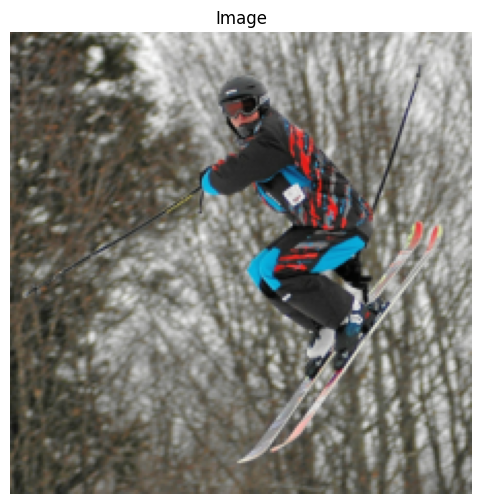

Ground Truth: A skier in colorful clothes midair in a <UNK> scene .
Custom Model Prediction: A person on a bike is jumping over a mountain .
Pretrained Model Prediction: a skier in the air


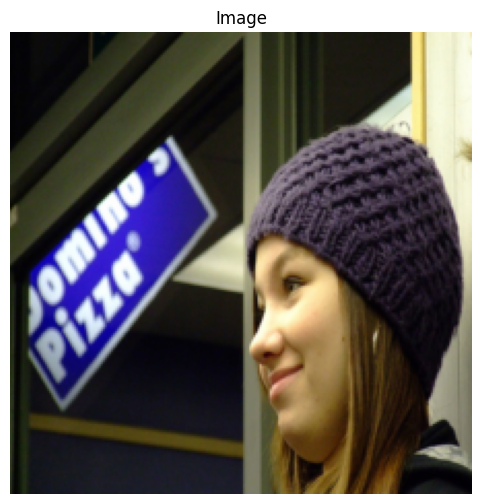

Ground Truth: A young woman with a knit cap stands against the wall of a Domino 's Pizza .
Custom Model Prediction: A woman with a blue shirt and a blue shirt is standing on a <UNK> bench .
Pretrained Model Prediction: a woman wearing a purple hat


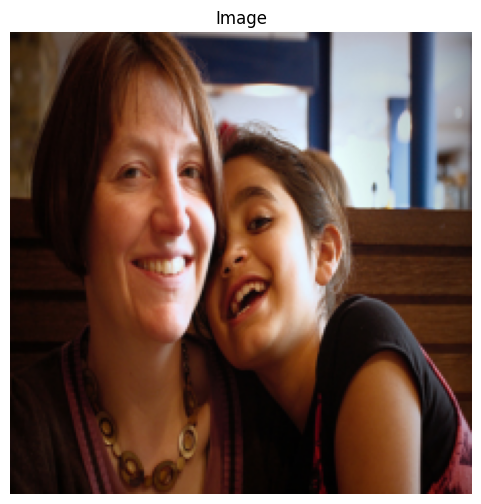

Ground Truth: A girl leaning against a woman 's shoulder while sitting on a bench .
Custom Model Prediction: A young girl with a <UNK> <UNK> and a woman with a baby in a blue shirt .
Pretrained Model Prediction: a woman and a child sitting on a bench


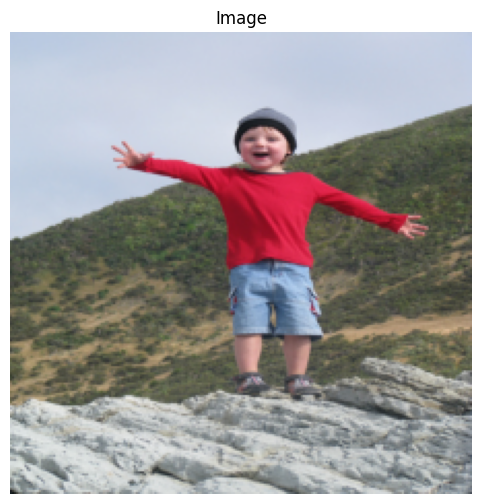

Ground Truth: A little child is wearing a red shirt and a beanie and is standing on some jagged rocks .
Custom Model Prediction: A girl in a pink shirt and a white shirt is running through the snow .
Pretrained Model Prediction: a young boy standing on a rock with his arms outstretched


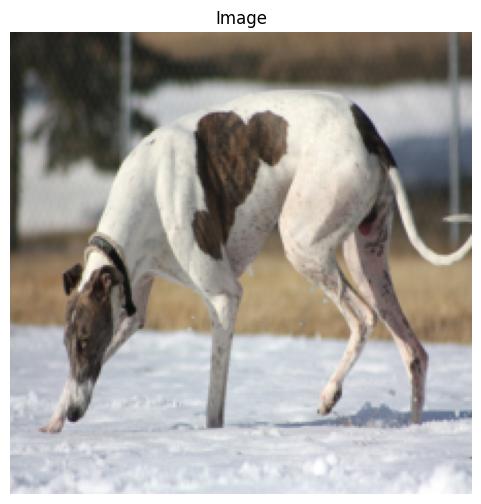

Ground Truth: A brown & white greyhound dog sniffs the snow .
Custom Model Prediction: A dog and a white dog with a stick in the snow .
Pretrained Model Prediction: a dog is walking in the snow


In [ ]:
import matplotlib.pyplot as plt
import torch
from PIL import Image

def tensor_to_image(tensor):
    image = tensor.permute(1, 2, 0).detach().cpu().numpy()
    image = (image * 255).astype("uint8")
    return image

test_images, test_captions = [], []
for batch in test_loader:
    images, captions = batch
    test_images.extend(images) 
    test_captions.extend(captions)
    if len(test_images) >= 10:
        break

def generate_caption_pretrained_model(pre_model, processor, image):
    image_pil = Image.fromarray(tensor_to_image(image))
    inputs = processor(images=image_pil, return_tensors="pt").to(device)
    outputs = pre_model.generate(**inputs)
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption

custom_model_predictions = []
pretrained_model_predictions = []

device = "cuda" if torch.cuda.is_available() else "cpu"

assert hasattr(model, "encoder"), "Ensure `model` is your custom ImageCaptioningModel."

for i, image in enumerate(test_images):
    image = image.to(device)

    custom_caption = generate_caption_custom_model(model, image, dataset.vocab)
    custom_model_predictions.append(" ".join(custom_caption))

    pretrained_caption = generate_caption_pretrained_model(pre_model, processor, image)
    pretrained_model_predictions.append(pretrained_caption)

def show_predictions(image, ground_truth, custom_caption, pretrained_caption):
    plt.figure(figsize=(6, 6))
    plt.imshow(tensor_to_image(image))
    plt.axis("off")
    plt.title("Image")
    plt.show()
    
    print(f"Ground Truth: {' '.join([dataset.vocab.itos[token] for token in ground_truth.tolist() if token not in [dataset.vocab.stoi['<PAD>'], dataset.vocab.stoi['<SOS>'], dataset.vocab.stoi['<EOS>']]])}")
    print(f"Custom Model Prediction: {custom_caption}")
    print(f"Pretrained Model Prediction: {pretrained_caption}")

for i in range(5):
    show_predictions(
        test_images[i],
        test_captions[i],
        custom_model_predictions[i],
        pretrained_model_predictions[i]
    )
